# Miscellaneous Figures

last modified: 26th February 2020 by Daniel Baur

This jupyter notebook is used to generate all kinds of useful plots.
git reset --soft origin/<branch>


0. **[Stuff](#0.-Stuff)**<br>
    0.1 [Imports](#0.1-Imports)<br>
    0.2 [General Stuff](#0.2-General-Stuff)<br>
    0.3 [General Definitions](#0.3-General-Definitions)<br>
    

1. **[Decay Chains](#Decay-Chains)**<br>


2. **[Radon Emanation Chamber Scheme](#Radon-Emanation-Chamber-Scheme)**<br>


3. **[DM Sensitivity Plot](#3.-DM-Sensitivity-Plot)**<br>


4. **[BM, DM and DE Pie Chart](#4.-BM,-DM-and-DE-Pie-Chart)**<br>


5. **[Data Acquisition and Storage Scheme](#5.-Data-Acquisition-and-Storage-Scheme)**<br>


6. **[MonXe Gas System](#MonXe-Gas-System)**<br>


7. **[DARWIN ER Background](#7.-DARWIN-ER-Background)**<br>


8. **[MonXe Setup Scheme](#MonXe-Setup-Scheme)**<br>


9. **[TPC Scheme](#TPC-Scheme)**<br>


10. **[Colored Rectangle](#Colored-Rectangle)**<br>


11. **[Labelled DARWIN TPC](#Labelled-DARWIN-TPC)**<br>


12. **[Exemplary Waveform](#Exemplary-Waveform)**<br>


13. **[Exemplary Spectrum](#Exemplary-Spectrum)**<br>


14. **[ER and NR Detector Signature](#ER-and-NR-Detector-Signature)**<br>


15. **[Secular Equilibrium](#Secular-Equilibrium)**<br>


16. **[PTFE Market Scheme](#PTFE-Market-Scheme)**<br>


17. **[DARWIN Timeline Arrow](#DARWIN-Timeline-Arrow)**<br>


18. **[MonXe Photograph](#MonXe-Photograph)**<br>


19. **[Detection Vessel Collage](#Detection-Vessel-Collage)**<br>


20. **[Charcoal Trap Collage](#Charcoal-Trap-Collage)**<br>


21. **[DAQ Chain Scheme](#DAQ-Chain-Scheme)**<br>


22. **[Frontend Prototypes Collage](#Frontend-Prototypes-Collage)**<br>


23. **[Amplifier Schematic](#Amplifier-Schematic)**<br>


24. **[Amplifier Transfer Function](#Amplifier-Transfer-Function)**<br>


25. **[Exemplary Background Spectrum](#Exemplary-Background-Spectrum)**<br>


26. **[Drift Simulation](#Drift-Simulation)**<br>


XX. **[GeMSE collage](#GeMSE-collage)**<br>





# 0. Stuff

## 0.1 Imports

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import pprint
import os
import random
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as patches
from PIL import Image, ImageDraw, ImageFont
from fpdf import FPDF
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib import rc
import sys
pathstring_miscellaneous_figures = "/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/"
pathstring_monxeana = "/home/daniel/Desktop/arbeitsstuff/monxe/software/monxeana/"
abspath_drift_sim = "/home/daniel/Desktop/arbeitsstuff/monxe/software/20211227__drift_sim_copy/"
abspath_ptfesc = "/home/daniel/Desktop/arbeitsstuff/ptfesc/"
sys.path.append(pathstring_miscellaneous_figures)
sys.path.append(pathstring_monxeana) 
sys.path.append(abspath_drift_sim) 
sys.path.append(abspath_ptfesc) 
import monxeana
import Miscellaneous_Figures as miscfig
import drift_sim
import ptfesc
from scipy.spatial import distance
import scipy.constants
import math
import matplotlib.gridspec as gridspec



## 0.2 General Stuff

In [2]:
# These two lines are used to deploy LaTEX for the fonts within an output figure.
# note1: All the necessary packages for this should already be imported for your AG Schumann Linux machine by default.
# note2: If you installed jupyter notebook on an external machine install the following packages in advance: $ sudo apt-get install font-manager texlive-latex-extra texlive-math-extra dvipng texlive-fonts-recommended
# note3: Should jupyter notebook throw an "OSError: error reading PNG HEADER" error, try reducing the dpi-value of the image.
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [3]:
input_pathstring = "./input/"
output_pathstring = "./output/"

In [4]:
colorstring_darwin_blue = '#004A9B'
standard_figsize = (5.670, 3.189)

image_format_dict = {
    "16_9" : {
        "figsize" : standard_figsize,
        "axes" : (160, 90)
    },
    "talk" : {
        "figsize" : (standard_figsize[0], standard_figsize[1]*(75/90)),
        "axes" : (160, 75)
    },
    "kt" : {
        "figsize" : ((5.670/1217)*1217, (5.670/1217)*635),
        "axes" : (160, 635/1217*160)
    },
}

default_output_abspath_list =  [
    "/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/output/",
    "/home/daniel/Desktop/arbeitsstuff/thesis/images/miscfig/",
]


# Decay Chains

In [5]:

#rc('font',**{'family':"sans-serif"})
fontsizeisotopes = 5 # font size of the isotopes within the sqares, default is 20
fontsizearrows = 7
rn222_cos = '#00FFFF' # hex color string; green: #00FF00, cyan: #00FFFF, red: #FF0000
rn222_cos_wrt = '#02c0d1'
rn220_cos = '#FF0000' # hex color string; green: #00FF00, cyan: #00FFFF, red: #FF0000
greystring = '#cfcfcf'
flag_invisibleaxis = False # flag to set the axis invisible
flag_showtitle = False # flag to set the title invisible
flag_transparent = False
br_212po = 64.07
br_208ti = 35.93



## 222Radon Decay Chain

In [6]:
if [False,True][0]:


    ### plotting
    # plotting: setting up the canvas
    fig, ax1 =plt.subplots(figsize=(5.670, 3.189), dpi=150)
    # plotting: drawing the decayboxes

    # 235u
    miscfig.plot_decaybox(
        dictionary = {
            "namestring" : r"$\boldsymbol{^{238}\mathrm{U}}$",
            "n" : 140, # actually 146 for u238
            "z" : 90, # actually 92 for u238
            "decay" : "",
            "t_h" : ""},
        dbax = ax1,
        dbfs = fontsizeisotopes,
        dbboxcolor = greystring,
        dbnamestring_offset = (0.02,-0.15),
        dbhalflifestringstring_offset = (0.02,0.0),
        flag_plotarrow = False)
    miscfig.plot_arrow_connect_points(
        ax = ax1,
        points_list = [(140-0.5+0.03,90-0.5+0.03), (138+0.5+0.06,88+0.5+0.06)],
        linewidth = 0.7,
        linestyle = "--",
        color = "black",
        tip_width = 0.12,
        tip_length = 0.12,
        flag_single_connections = True,
        input_zorder = 3)
    
    # 226ra
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Ra_226"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=monxeana.isotope_dict["ra226"]["color"], dbnamestring_offset=(-0.09,-0.0), dbhalflifestringstring_offset=(0.02,0.0))
    #miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Ra_226"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.09,-0.0), dbhalflifestringstring_offset=(0.02,0.0))

    # 222rn
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Rn_222"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=monxeana.isotope_dict["rn222"]["color"], dbnamestring_offset=(-0.09,-0.0), dbhalflifestringstring_offset=(0.1,0.0), textcolor="white")
    #miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Rn_222"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.09,-0.0), dbhalflifestringstring_offset=(0.1,0.0), textcolor="black")

    # 218po
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_218"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=monxeana.isotope_dict["po218"]["color"], dbnamestring_offset=(-0.07,-0.0), dbhalflifestringstring_offset=(-0.04,0.0), textcolor="white", arrowcolor=monxeana.isotope_dict["po218"]["color"], labelcolor=monxeana.isotope_dict["po218"]["color"])
    #miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_218"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.07,-0.0), dbhalflifestringstring_offset=(-0.04,0.0), textcolor="black", arrowcolor="black", labelcolor="black")

    # 214pb
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Pb_214"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=monxeana.isotope_dict["pb214"]["color"], dbnamestring_offset=(-0.08,-0.0), dbhalflifestringstring_offset=(-0.1,0), arrowcolor='red', labelcolor='red')#'#7030a0')
    #miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Pb_214"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.08,-0.0), dbhalflifestringstring_offset=(-0.1,0), arrowcolor="black", labelcolor="black")#'#7030a0')

    # 214bi
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Bi_214"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.04,-0.0), dbhalflifestringstring_offset=(-0.1,0))

    # 214po
    #miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_214"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.07,-0.0), dbhalflifestringstring_offset=(-0.07,0.0), textcolor="black", arrowcolor="black", labelcolor="black")
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_214"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=monxeana.isotope_dict["po214"]["color"], dbnamestring_offset=(-0.07,-0.0), dbhalflifestringstring_offset=(-0.07,0.0), textcolor="black", arrowcolor=monxeana.isotope_dict["po214"]["color"], labelcolor=monxeana.isotope_dict["po214"]["color"])

    # 210pb
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Pb_210"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.08,-0.0), dbhalflifestringstring_offset=(0.05,0.0))

    # 210bi
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Bi_210"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.04,-0.0), dbhalflifestringstring_offset=(0.1,0.0))

    # 210po
    #miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_210"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=monxeana.isotope_dict["po214"]["color"], dbnamestring_offset=(-0.07,-0.0), dbhalflifestringstring_offset=(-0.02,0.0), textcolor="white", arrowcolor=monxeana.isotope_dict["po214"]["color"], labelcolor=monxeana.isotope_dict["po214"]["color"])
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_210"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.07,-0.0), dbhalflifestringstring_offset=(-0.02,0.0), textcolor="black", arrowcolor="black", labelcolor="black")

    # 206pb
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Pb_206"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.08,-0.0), dbhalflifestringstring_offset=(0.04,0.0))


    ### axes:
    # axes: limits
    xlim = [124-0.5-0.1,140+0.5+0.1] # x/n axis range
    ylim = [82-0.5-0.1,90+0.5+0.1] # y/z axis range
    # axes: spine offset (the small gap between the n and the z axis)
    ax1.spines['bottom'].set_position(('axes', -0.01))
    ax1.spines['left'].set_position(('axes', -0.005))
    # axes: drawing arrows to the axes spines
    if flag_invisibleaxis == False:
        ax1.annotate('', xy=(-0.005,0.990), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle='<|-', linewidth=0.01, shrinkA=0, shrinkB=0, facecolor='black'))# axes: setting size and scale of axes
        ax1.annotate('', xy=(0.990,-0.01), xycoords='axes fraction', xytext=(5,0), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle='<|-', linewidth=0.01, shrinkA=0, shrinkB=0, facecolor='black'))# axes: setting size and scale of axes
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.tick_params(which='major', top=False, right=False)
    ax1.tick_params(which='minor', bottom=False, top=False, right=False, left=False)
    ax1.set_ylim(ylim)
    ax1.set_xlim(xlim)
    plt.xticks(range(124,139), fontsize=11)
    plt.yticks(range(82,89), fontsize=11)
    # axes: labels
    title_string = '$\\boldsymbol{^{222}\mathrm{Rn}}$ \\textbf{Decay Chain}'
    if flag_showtitle == True:
        plt.title(title_string, fontsize=28, pad=-15)
    ax1.set_xlabel('number of neutrons, $\,N$', fontsize=11)
    ax1.set_ylabel('number of protons, $\,Z$', fontsize=11)
    # axes: removing axes bars and ticks
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    if flag_invisibleaxis == True:
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()


    ### saving
    plt.show()
    save_string = "rn222_decay_chain__step_4"
    abspath_output_folders = [
        #miscfig.abspath_mastertalk_images,
        #"/home/daniel/Desktop/arbeitsstuff/20200420__conferences_workshops_excursions/20210315__virtual_dpg_sprting_meeting_2021/talk/images/",
        output_pathstring,
        "/home/daniel/Desktop/arbeitsstuff/conferences_workshops_excursions_and_meetings/20220301__darwin_collaboration_meeting_2022/my_talks/images/",
    ]
    for abspath in abspath_output_folders:
        fig.savefig(abspath +save_string, transparent=False) #, transparent=True)


## 220Radon Decay Chain

In [7]:
if [False,True][0]:


    ### plotting
    # plotting: setting up the canvas
    fig, ax1 =plt.subplots(figsize=(5.670, 3.189), dpi=150) #21, 10.5
    # plotting: drawing the decayboxes
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Ra_224"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.095,0.0), dbhalflifestringstring_offset=(0.11,0))
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Rn_220"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.12,0.0), dbhalflifestringstring_offset=(0.07,0))
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_216"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=rn220_cos, dbnamestring_offset=(-0.09,0.0), dbhalflifestringstring_offset=(-0.03,0), arrowcolor=rn220_cos, labelcolor=rn220_cos)
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Pb_212"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.11,0.0), dbhalflifestringstring_offset=(0.06,0))
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Bi_212"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=rn220_cos, dbnamestring_offset=(-0.058,0.0), dbhalflifestringstring_offset=(-0.13,0), arrowcolor=rn220_cos, labelcolor=rn220_cos)
    miscfig.plot_betaarrow(ax=ax1, n=129-0.5, z=83-0.5, fs=fontsizeisotopes)
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Po_212"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=rn220_cos, dbnamestring_offset=(-0.085,0.0), dbhalflifestringstring_offset=(0,0), arrowcolor=rn220_cos, labelcolor=rn220_cos)
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Ti_208"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.055,0.0), dbhalflifestringstring_offset=(-0.06,0))
    miscfig.plot_decaybox(dictionary=miscfig.isotopes_dict["Pb_208"], dbax=ax1, dbfs=fontsizeisotopes, dbboxcolor=greystring, dbnamestring_offset=(-0.11,0.0), dbhalflifestringstring_offset=(0.04,0))

    ### axes:
    # axes: limits
    xlim = [124-0.5-0.1,138+0.5+0.1] # x/n axis range
    ylim = [81-0.5-0.1,88+0.5+0.1] # y/z axis range
    # axes: spine offset (the small gap between the n and the z axis)
    ax1.spines['bottom'].set_position(('axes', -0.01))
    ax1.spines['left'].set_position(('axes', -0.005))
    # axes: drawing arrows to the axes spines
    if flag_invisibleaxis == False:
        ax1.annotate('', xy=(-0.005,0.990), xycoords='axes fraction', xytext=(0,5), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle='<|-', linewidth=0.01, shrinkA=0, shrinkB=0, facecolor='black'))# axes: setting size and scale of axes
        ax1.annotate('', xy=(0.990, -0.01), xycoords='axes fraction', xytext=(5,0), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle='<|-', linewidth=0.01, shrinkA=0, shrinkB=0, facecolor='black'))# axes: setting size and scale of axes
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim(ylim)
    ax1.set_xlim(xlim)
    # axes: modifying axes ticks
    # ticks on all spines
    ax1.tick_params(which='major', top=False, right=False)
    ax1.tick_params(which='minor', bottom=False, top=False, right=False, left=False)
    plt.xticks(range(124,139))
    plt.yticks(range(81,89))
    # axes: labels
    title_string = '$\\boldsymbol{^{220}\mathrm{Rn}}$ \\textbf{Decay Chain}'
    if flag_showtitle == True:
        plt.title(title_string, fontsize=28, pad=-15)
    ax1.set_xlabel('Number of Neutrons, $\,N$')
    ax1.set_ylabel('Number of Protons, $\,Z$')
    # axes: removing axes bars and ticks
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    if flag_invisibleaxis == True:
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()

    ### saving
    plt.show()
    save_string = "1_220_radon_decay_chain"
    fig.savefig(output_pathstring +save_string +".png", transparent=flag_transparent)
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/20200519__group_meeting_talk__monxe/images/" +save_string +".png")


# Radon Emanation Chamber Scheme

## drawing nuclei, electrons and holes for the chamber scheme

In [8]:
if [False,True][0]:


    # adjustable input for all isotopes
    greystring = '#cfcfcf'
    circle_color_pn = ['#00fef2','#7800b4']
    circle_color_b = 'black'
    center = (80,45)
    flag_showaxis = False
    circle_radius = 13
    circle_linewidth = 2.6
    radmax = 400


    ###### grey alpha particle
    # setting up the canvas
    fig, ax1 =plt.subplots(figsize=standard_figsize)
    # drawing the nuclei
    #miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(+6.5,-6.5)), circlecolor=circle_color_pn[0], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    #miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(-6.5,+6.5)), circlecolor=circle_color_pn[1], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    #miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(+6.5,+6.5)), circlecolor=circle_color_pn[0], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    #miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(-6.5,-6.5)), circlecolor=circle_color_pn[1], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(+6.5,-6.5)), circlecolor=greystring, bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(-6.5,+6.5)), circlecolor=greystring, bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(+6.5,+6.5)), circlecolor=greystring, bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(-6.5,-6.5)), circlecolor=greystring, bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([-10,100])
    ax1.set_xlim([0,160])
    # hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    ### saving
    plt.show()
    save_string = "scheme_alpha_particle_grey"
    fig.savefig(input_pathstring +save_string +".png", transparent=True)


    ###### colored alpha particle
    # setting up the canvas
    fig, ax1 =plt.subplots(figsize=standard_figsize)
    # drawing the nuclei
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(+6.5,-6.5)), circlecolor=monxeana.isotope_dict["po218"]["color"], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(-6.5,+6.5)), circlecolor=monxeana.isotope_dict["po218"]["color"], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(+6.5,+6.5)), circlecolor=monxeana.isotope_dict["po218"]["color"], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,(-6.5,-6.5)), circlecolor=monxeana.isotope_dict["po218"]["color"], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([-10,100])
    ax1.set_xlim([0,160])
    # hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    ### saving
    plt.show()
    save_string = "scheme_alpha_particle_colored"
    fig.savefig(input_pathstring +save_string +".png", transparent=True)


    ###### 214pb
    # setting up the canvas
    fig, ax1 =plt.subplots(figsize=standard_figsize)
    # drawing the nuclei
    for i in range(214):
        #miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,miscfig.rphitoxy(r=random.randrange(-radmax, +radmax+1, 1)/10,phi=random.randrange(0, 20+1, 1)/10)), circlecolor=circle_color_pn[random.randrange(0,2,1)], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
        #miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,miscfig.rphitoxy(r=random.randrange(-radmax, +radmax+1, 1)/10,phi=random.randrange(0, 20+1, 1)/10)), circlecolor=[monxeana.isotope_dict["po218"]["color"], monxeana.isotope_dict["po210"]["color"], monxeana.isotope_dict["po214"]["color"]][random.randrange(0,3,1)], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
        miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,miscfig.rphitoxy(r=random.randrange(-radmax, +radmax+1, 1)/10,phi=random.randrange(0, 20+1, 1)/10)), circlecolor=monxeana.isotope_dict["pb214"]["color"], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    # aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([-10,100])
    ax1.set_xlim([0,160])
    # axes: hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    ### saving
    plt.show()
    save_string = "scheme_214pb"
    fig.savefig(input_pathstring +save_string +".png", transparent=True)


    ###### 218po
    # setting up the canvas
    fig, ax1 =plt.subplots(figsize=standard_figsize)
    # drawing the nuclei
    for i in range(218):
        miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center,miscfig.rphitoxy(r=random.randrange(-radmax, +radmax+1, 1)/10,phi=random.randrange(0, 20+1, 1)/10)), circlecolor=monxeana.isotope_dict["po218"]["color"], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    # aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([-10,100])
    ax1.set_xlim([0,160])
    # hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    ### saving
    plt.show()
    save_string = "scheme_218po"
    fig.savefig(input_pathstring +save_string +".png", transparent=True)


    ###### 222Rn
    # setting up the canvas
    fig, ax1 =plt.subplots(figsize=standard_figsize)
    # drawing the nuclei
    for i in range(222):
        #miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center, miscfig.rphitoxy(r=random.randrange(-radmax, +radmax+1, 1)/10,phi=random.randrange(0, 20+1, 1)/10)), circlecolor=circle_color_pn[random.randrange(0,2,1)], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
        miscfig.draw_nucleon(ax=ax1, r=miscfig.vs(center, miscfig.rphitoxy(r=random.randrange(-radmax, +radmax+1, 1)/10,phi=random.randrange(0, 20+1, 1)/10)), circlecolor=monxeana.isotope_dict["rn222"]["color"], bordercolor=circle_color_b, lw=circle_linewidth, radius=circle_radius, izorder=24)
    # aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([-10,100])
    ax1.set_xlim([0,160])
    # axes: hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    ### saving
    plt.show()
    save_string = "scheme_222rn"
    fig.savefig(input_pathstring +save_string +".png", transparent=True)


    ###### electrons and holes
    # defining colors and names
    eh_list = [ # fill color, border color, savename
        [monxeana.isotope_dict["rn222"]["color"], monxeana.isotope_dict["rn222"]["color"], "eh_monxe_monxe.png"],
        ["white", "black", "eh_white_black.png"],
        ["black", "black", "eh_black_black.png"],
        ["white", greystring, "eh_white_grey.png"],
        [greystring, greystring, "eh_grey_grey.png"],
        ["white", monxeana.isotope_dict["po218"]["color"], "eh_white_po218.png"],
        ["white", monxeana.isotope_dict["po214"]["color"], "eh_white_po214.png"],
        ["white", monxeana.isotope_dict["po210"]["color"], "eh_white_po210.png"],
        [monxeana.isotope_dict["po218"]["color"], monxeana.isotope_dict["po218"]["color"], "eh_po218_po218.png"],
        [monxeana.isotope_dict["po214"]["color"], monxeana.isotope_dict["po214"]["color"], "eh_po214_po214.png"],
        [monxeana.isotope_dict["po210"]["color"], monxeana.isotope_dict["po210"]["color"], "eh_po210_po210.png"],
    ]
    for i in range(len(eh_list)):
        # setting up the canvas
        fig, ax1 =plt.subplots(figsize=standard_figsize)
        # drawing the nuclei
        miscfig.draw_nucleon(
            ax=ax1,
            r=center,
            circlecolor=eh_list[i][0],
            bordercolor=eh_list[i][1],
            lw=circle_linewidth,
            radius=circle_radius,
            izorder=24)
        # aspect of the axes
        ax1.set_aspect('equal')
        ax1.set_ylim([-10,100])
        ax1.set_xlim([0,160])
        # hiding axes and ticks
        if flag_showaxis == False:
            ax1.spines['right'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            ax1.spines['left'].set_visible(False)
            ax1.spines['bottom'].set_visible(False)
            ax1.set_yticks([])
            ax1.set_xticks([])
            ax1.set_axis_off()
        # saving
        plt.show()
        save_string = eh_list[i][2]
        fig.savefig(input_pathstring +save_string, transparent=True)


## Drawing the Electrical Field and Field Lines

In [9]:
from math import floor, log

def txt_to_sa(file):
    """
    This function takes a comsol electric field file and converts it into
    a structured array. It erases every line with a % in it. it then outputs
    an array of tupels. it assigns each value a designation 
    ("r", "z", "er", "ez"). 
    
    Args: 
        file (textfile): a file that contains electric field data
    
    Returns:
        struc_array (np structured array): an array of the form [("r", "z", "er", "ez"),...]
    
    Example: 
        >>>txt_to_sa("hemisphere.txt")
        array([(0.001132  , 0.00122363,  1.67467868e+00, -113.2275344 ),
               (0.        , 0.00177273, -7.84132656e-03, -114.90858985),
               (0.        , 0.        , -2.58425539e-02, -109.72440572), ...,
               (0.07094793, 0.0862313 ,  1.04995220e+01,   23.64970681),
               (0.07274185, 0.08589922,  1.09808819e+01,   17.07039356),
               (0.07458506, 0.08624701,  9.21222933e+00,   10.86727718)],
              dtype=[('r', '<f16'), ('z', '<f16'), ('er', '<f16'), ('ez', '<f16')])
    
    """
    
    with open(file) as f:
        content = f.readlines()
    content = [line.split() for line in content
              if (not '%' in line) and (not "NaN" in line)]
    content = [tuple(np.float128(y) for y in x) for x in content]

    struc_array = np.array(content, np.dtype([('r',np.float128),('z',np.float128),('er',np.float128),('ez',np.float128)]))
    return struc_array



def hist_calc(file, ax, bins = [40, 40], plot_both_sides = False, input_cmap=plt.cm.viridis):
    """
    This function creates a 2d histogram from a file containing
    electric field data. It does so by laying a grid over the 
    field data. then it calculates the mean strength of the electric
    field points in each cell and uses this value as the weight 
    in each bin of the histogram. It then generates a histogram of
    all the cells with their weights.
    
    Args:
        file (.txt file): A text file that contains electric field data.
        ax (a matplotlib axis): The axis in which the histogram is plotted.
        bins (array): an array containing the amount of x bins and ybins
            of the histogram.
    
    Returns:
        hist (a hist2d object): A histogram of the electric field.
    """
    efield = txt_to_sa(file)
    
    # width/height must be slightly larger than the biggest coordinate
    width = efield["r"][efield["r"].argmax()] + 10**(-6)
    height = efield["z"][efield["z"].argmax()] + 10**(-6)
    
    field_strength = np.sqrt(efield["er"]**2 + efield["ez"]**2)
    field_strength = field_strength.astype(float)
    ex = efield["r"]
    ey = efield["z"]

    hist = []
    for i in range(bins[1]):
        line = []
        for j in range(bins[0]):
            line.append([])
        hist.append(line)

    for i in range(len(ex)):
        x = floor(bins[0] * ex[i] / width) 
        y = floor(bins[1] * ey[i] / height)
        if (x < 0):
            # important for negative x values because floor(0.5) = 0 but floor(-0.5) = -1
            x += 1
        hist[y][x].append(field_strength[i])

    x = []
    y = []
    w = []
    scaling_factor_x = (bins[0] + 1) / bins[0]
    scaling_factor_y = (bins[1] + 1) / bins[1]
    for i in range(bins[1]):
        for j in range(bins[0]):
            if hist[i][j] == []:
                hist[i][j] = 0
            else:
                hist[i][j] = np.sum(hist[i][j])/len(hist[i][j])
            x.append(scaling_factor_x * (j + 0) * width / bins[0])
            y.append(scaling_factor_y * (i + 0) * height / bins[1])
            w.append(hist[i][j])
    bin_scale = 1
    if plot_both_sides:
        neg_x = []
        neg_y = []
        for element in x:
            neg_x.append(-element - width / bins[0])
        for element in y:
            neg_y.append(element)

        x += neg_x
        y += neg_y
        w += w
        bin_scale = 2
    #ax.plot(x,y,".")
    hist = ax.hist2d(x, y, bins = [bins[0] * bin_scale, bins[1]], weights=w,
                            norm=mpl.colors.LogNorm(), cmap=input_cmap) # viridis, hsv
    return hist


# This function is used to retrieve the coordinates of the nearest neighbour within a numpy structured array.
def get_nearest_neighbour_index(
    ndarray,
    coordinates_dict):

    # calculating the distances to each point in the grid
    nnndarray = np.array([[ndarray[i]["r"], ndarray[i]["z"]] for i in range(len(ndarray))])
    refarray = np.array([[coordinates_dict["r"], coordinates_dict["z"]]])
    distarray = distance.cdist(refarray, nnndarray)

    # returning the minimum distance index
    nn_index = distarray.argmin()
    return nn_index


def get_cartesian_coordinates_on_circle(
    center,
    radius,
    phi,
    flag_deg_or_rad = ["deg", "rad"][0]): # phi=0 --> right, phi=90 --> top, phi=180 --> left, phi=270 --> down

    if flag_deg_or_rad == "deg":
        phi_new = math.radians(phi)
    elif flag_deg_or_rad == "rad":
        phi_new = phi
    x = radius *math.cos(phi_new)
    y = radius *math.sin(phi_new)
    cartesian_coordinates_on_circle = miscfig.vs(center, [x,y])
    return cartesian_coordinates_on_circle


if [False,True][0]:

    # adjustable input
    save_string = "rec_e_field"
    flag_showaxis = False

    # chamber design
    top_center = (80,80)
    radius = 70
    cylinder_height = 15
    d_height = 13 # height of the diode
    d_width = 50 # width of the diode

    # figure settings
    fig = plt.figure(figsize=miscfig.standard_figsize, dpi=150, constrained_layout=False)
    ax1 = fig.add_axes([0,0,1,1])

    # electrical field strength
    #hist_calc(
    #    file = miscfig.abspath_miscfig +miscfig.relpath_input +"hemisphere_sketch_-1000V.txt",
    #    ax = ax1,
    #    #bins = [450, 450],
    #    bins = [450, 450],
    #    plot_both_sides = True,
    #    input_cmap=plt.cm.YlGnBu)




    # electrical field lines
    print("calculating electrical field lines")
    sa = txt_to_sa(file=miscfig.abspath_miscfig +miscfig.relpath_input +"hemisphere_sketch_-1000V.txt")
    radius = 70
    #start_points = [[r, radius-miscfig.sphere_height(r, radius)] for r in [20,40,60]]
    start_points = [get_cartesian_coordinates_on_circle(center=[0,radius],radius=radius,phi=phis) for phis in np.linspace(start=270,stop=360,endpoint=True,num=4)][:]
    field_line_lists = []
    step_size = 1
    ctr = 0
    for i in range(len(start_points)):
        print(f"calculating field line for point {start_points[i]}")
        current_point = start_points[i]
        field_line_list = [current_point]
        d_nn = 0
        while d_nn <= step_size and ctr <= 100:
            nn_index = get_nearest_neighbour_index(ndarray=sa, coordinates_dict={"r":current_point[0],"z":current_point[1]})
            nn = sa[nn_index]
            d_nn = np.sqrt((current_point[0]-nn["r"])**2 +(current_point[1]-nn["z"])**2)
            e_field_vec = [nn["er"], nn["ez"]]
            current_point = miscfig.vs(current_point, miscfig.scale_vector(e_field_vec,step_size))
            field_line_list.append(current_point)
            ctr +=1
        field_line_lists.append(field_line_list)
        ctr = 0
        print(f"{field_line_list}")
    field_line_lists_mirrored = [[[-p[0],p[1]] for p in listi] for listi in field_line_lists[1:]]
    field_line_lists = field_line_lists +field_line_lists_mirrored
    field_line_lists = [list(t) for t in field_line_lists]
    field_line_lists = [[list(t) for t in field_line_list] for field_line_list in field_line_lists]
    field_line_lists = [t[:-2] for t in field_line_lists]
    # aligning the arrow tips on y
    average_y_val = 0
    for i in range(len(field_line_lists)):
        average_y_val += field_line_lists[i][-1][1]
    average_y_val = average_y_val/len(field_line_lists)
    for i in range(len(field_line_lists)):
        field_line_lists[i][-1][1] = average_y_val
    
    print("plotting electrical field lines")
    for i in range(len(start_points)*2 -1):
        
        
        miscfig.plot_arrow_connect_points(
            ax =ax1,
            points_list = list(field_line_lists[i][:]),
            linewidth = 0.486,
            color = "#a9a9a9",
            tip_width = 1,
            tip_length = 2,
            linestyle = "-",
            flag_single_connections = False,
            input_zorder = 30)




    # axes aspect
    ax1.set_aspect('equal')
    ax1.set_ylim([-6,88])
    ax1.set_xlim([-80,80])

    # hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()



    ### saving
    plt.show()
    fig.savefig(miscfig.output_pathstring +save_string +".png", transparent=True)
    fig.savefig(miscfig.abspath_mastertalk_images +save_string +".png", transparent=flag_transparent)
    #fig.savefig("/home/daniel/Desktop/arbeitsstuff/20180705__monxe/20201027__talk_monxe/images/" +save_string +".png")



## Drawing the REC Scheme

In [10]:
if [False,True][0]:

    ### adjustable input
    save_string = "radon_emanation_chamber_scheme"
    flag_showaxis = False
    flag_showvessel = True
    flag_showvalves = True
    flag_showfield = [False, "calculated", "simulated"][2]
    flag_showdiode = True
    flag_showhv = True
    flag_transparent = False

    
    
    flag_showradon = True
    flag_showsteps = True
    flag_showstep1 = True
    flag_showstep1sample = True
    flag_showstep2 = True
    flag_showstep3 = True
    flag_showstepname = True

    
    
    
    
    





    
    
    
    

    ### chamber design
    top_center = (80,80)
    radius = 70
    cylinder_height = 15
    chamber_linewidth = 1.6
    chamber_color = 'black'
    chamber_gas_dist = 0.8*radius # distance from top_center to the center of the gas pipes
    chamber_gas_diam = 3.0 # diamter of the gas pipes
    chamber_gas_height = 6.4 # height of the gas pipes
    chamber_valves_height = 0.58*chamber_gas_height # height at which the valves are mounted
    chamber_valve_lw = 1.8# linewidth of the valves
    chamber_valve_height = 3.5 # height of the valves
    chamber_valve_width = 5.9 # width of the valves
    # diode design
    d_height = 13 # height of the diode
    d_width = 50 # width of the diode
    d_ithickness = 9.6 # thickness of the intrinsic layer
    d_color = 'white' # color of the pn diode box
    d_icolor = 'white' # color of the i-layer box
    d_bcolor = 'black' # color of the block the diode sits on
    d_bheight = 1.0
    d_bwidth = 60
    # hv design
    hv_length = 0.5*radius # length from top_center to the right edge at which the hv line is drawn
    hv_size_left = 5 # size/height of the dc sign
    hv_size_right = 10 # size/height of the dc sign
    hv_distance = 2.1 # distance between the two bar of the hv sign
    hv_grounding_length = 10 # length/depth of the grounding line
    hv_grounding_width = 7 # width of the grounding symbol
    hv_grounding_distance = 1.8 # distance between the bars of the grounding symbol
    hv_linewidth = 0.85
    hv_linecolor = '#a9a9a9' #'black'
    # efield design
    ef_color = '#a9a9a9' #'red'
    ef_linewidth = 0.486
    ef_linedistance = 0.5*(0.5*d_width-0.13*0.5*d_width)
    # atoms/steps
    atom_step_color = colorstring_darwin_blue
    atom_zoom = 0.015
    atom_number_offset = (-8.4,-1.8)
    atom_number_offset_1 = (-8.4,+1.8)
    atom_pos_1 = miscfig.vs((+0.395*radius,-0.67*radius),miscfig.vs(top_center, (0,-cylinder_height)))
    atom_pos_2 = miscfig.vs((+0.215*radius,-0.32*radius),miscfig.vs(top_center, (0,-cylinder_height)))
    atom_pos_3 = miscfig.vs((+0.8*ef_linedistance,-0.028*radius),miscfig.vs(top_center, (0,-cylinder_height)))
    atom_labelsize = 11
    atom_pos_2_rel_alpha_pos = (+9.5,+9.0)
    atom_pos_3_rel_alpha_pos_2 = (-4.0,+12.0)
    fact = 0.2
    atom_pos_3_rel_alpha_pos_1 = [fact*atom_pos_3_rel_alpha_pos_2[0], fact*atom_pos_3_rel_alpha_pos_2[1]]
    atom_arrowms = 6.5
    atom_arrowcolor = colorstring_darwin_blue
    fs_stepname = 11
    color_stepname = colorstring_darwin_blue
    atom_number_pos_1 = miscfig.vs(atom_number_offset_1,atom_pos_1)
    atom_number_pos_2 = miscfig.vs(atom_number_offset,atom_pos_2)
    atom_number_pos_3 = miscfig.vs(atom_number_offset,atom_pos_3)
    rc('font',**{'family':"sans-serif"})
    step_offset = (-0.11*fs_stepname, -0.17*fs_stepname)
    step_offset_1 = (-0.22*fs_stepname, +0.17*fs_stepname)


    ### constructing the chamber by defining vertices
    # vessel
    a = miscfig.vs(top_center,(-radius,0)) # upper lefthand corner
    b = miscfig.vs(a,(0,-cylinder_height)) # below upper lefthand corner
    c = miscfig.vs(top_center,(0,-cylinder_height)) # center of the circle
    d = miscfig.vs(top_center,(radius,0)) # upper righthand corner
    e = miscfig.vs(d,(0,-cylinder_height)) # below upper righthand corner
    f = miscfig.vs(top_center,(0,-d_height))
    g1 = miscfig.vs(top_center, (chamber_gas_dist,0))
    g1l = miscfig.vs(g1, (-0.5*chamber_gas_diam,0))
    g1lh = miscfig.vs(g1l, (0,chamber_gas_height))
    g1r = miscfig.vs(g1, (+0.5*chamber_gas_diam,0))
    g1rh = miscfig.vs(g1r, (0,chamber_gas_height))
    g1v = miscfig.vs(g1, (0,chamber_valves_height))
    g2 = miscfig.vs(top_center, (-chamber_gas_dist,0))
    g2l = miscfig.vs(g2, (-0.5*chamber_gas_diam,0))
    g2lh = miscfig.vs(g2l, (0,chamber_gas_height))
    g2r = miscfig.vs(g2, (+0.5*chamber_gas_diam,0))
    g2rh = miscfig.vs(g2r, (0,chamber_gas_height))
    g2v = miscfig.vs(g2, (0,chamber_valves_height))
    # hv: upper lines
    hva = miscfig.vs(top_center,(0.5*d_width,-0.5*d_height))
    hvb = miscfig.vs(hva, ((hv_length/2)-(hv_distance/2),0))
    hvb_lower = miscfig.vs(hvb, (0, -(hv_size_left/2)))
    hvb_upper = miscfig.vs(hvb, (0, (hv_size_left/2)))
    hvc = miscfig.vs(hva, ((hv_length/2)+(hv_distance/2),0)) # hv line: right vertex of the sign
    hvc_lower = miscfig.vs(hvc, (0, -(hv_size_right/2)))
    hvc_upper = miscfig.vs(hvc, (0, (hv_size_right/2)))
    hvd = miscfig.vs(hva, (hv_length,0)) # hv line: upper right vertex of the line
    hve = miscfig.vs(hvd, (0,0.5*d_height)) # hv line: lower right vertex of the line
    # hv: grounding symbol
    hvf = miscfig.vs(hve, (0,-cylinder_height-miscfig.sphere_height(hv_length+0.5*d_width,radius))) # ground line: upper end
    hvg = miscfig.vs(hvf, (0,-hv_grounding_length))

    hvg1 = miscfig.vs(hvg, (-(hv_grounding_width/2),0))
    hvg2 = miscfig.vs(hvg, (+(hv_grounding_width/2),0))
    hvh = miscfig.vs(hvg, (0,-hv_grounding_distance))
    hvh1 = miscfig.vs(hvh, (-(3/5)*(hv_grounding_width/2),0))
    hvh2 = miscfig.vs(hvh, (+(3/5)*(hv_grounding_width/2),0))
    hvi = miscfig.vs(hvh, (0,-hv_grounding_distance))
    hvi1 = miscfig.vs(hvi, (-(1/5)*(hv_grounding_width/2),0))
    hvi2 = miscfig.vs(hvi, (+(1/5)*(hv_grounding_width/2),0))


    ### plotting the chamber
    # setting up the canvas
    #fig =plt.figure(figsize=[0.9*standard_figsize[0], 1.0*standard_figsize[1]], dpi=150, constrained_layout=False)
    #ax1 = fig.add_axes([0,0,1,1])
    
    # figure configuration parameters
    figure_aspect_ratio = 10.5/16 # y/x (!)
    figure_scale_x = 145
    figure_scale_y = figure_scale_x *figure_aspect_ratio
    figure_size_x_inch = miscfig.standard_figsize_x_inch
    fig = plt.figure(figsize=[figure_size_x_inch, figure_size_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    ax1.set_xlim([7.5,figure_scale_x+7.5])
    y_offset = 7
    ax1.set_ylim([0-y_offset,figure_scale_y-y_offset])
    ax1.set_aspect('equal')
    #ax1.set_ylim([-6,88])
    #ax1.set_xlim([0,160])
    
    # drawing the electrical field lines
    if flag_showfield == "calculated":
        # draw curved field lines (from left to right)
        miscfig.draw_field_line(ax=ax1, rsp_x=-2*ef_linedistance, rep_x=-63, x1_length=6, x2_length=8, anchor=top_center, diode_thickness=d_height, sphere_center=c, sphere_radius=radius, efield_linewidth=ef_linewidth, efield_color=ef_color, flag_plothelpingpoints=False, flag_polygon=False)
        miscfig.draw_field_line(ax=ax1, rsp_x=-ef_linedistance, rep_x=-37, x1_length=12, x2_length=18, anchor=top_center, diode_thickness=d_height, sphere_center=c, sphere_radius=radius, efield_linewidth=ef_linewidth, efield_color=ef_color, flag_plothelpingpoints=False, flag_polygon=False)
        miscfig.draw_field_line(ax=ax1, rsp_x=+ef_linedistance, rep_x=+37, x1_length=12, x2_length=18, anchor=top_center, diode_thickness=d_height, sphere_center=c, sphere_radius=radius, efield_linewidth=ef_linewidth, efield_color=ef_color, flag_plothelpingpoints=False, flag_polygon=False)
        miscfig.draw_field_line(ax=ax1, rsp_x=+2*ef_linedistance, rep_x=+63, x1_length=6, x2_length=8, anchor=top_center, diode_thickness=d_height, sphere_center=c, sphere_radius=radius, efield_linewidth=ef_linewidth, efield_color=ef_color, flag_plothelpingpoints=False, flag_polygon=False)
        # draw vertical center field line
        miscfig.plot_line(start_tuple=miscfig.vs(c,(0,-radius)), end_tuple=miscfig.vs(top_center,(0,-d_height)), linewidth=ef_linewidth, linecolor=ef_color)
        arrowhead = patches.Polygon(xy=[[f[0],f[1]], [f[0]+1.2,f[1]-1.8], [f[0]-1.2,f[1]-1.8]], closed=True, facecolor=ef_color, zorder=23)
        ax1.add_patch(arrowhead)
        # label the efield
        plt.text(f[0]-0.87*radius, f[1]-7.7, 'Electrical Drift Field', fontsize=11)
    elif flag_showfield == "simulated":
        miscfig.image_onto_plot(
            filestring = "rec_e_field.png",
            ax = ax1,
            position = [80.2,36],
            pathstring = miscfig.abspath_miscfig +miscfig.relpath_output,
            zoom = 0.1435*1.15,
            zorder = 20)
    elif flag_showfield == "simulated_with_lines":
        miscfig.image_onto_plot(
            filestring = "rec_e_field.png",
            ax = ax1,
            position = [80.5,36],
            pathstring = miscfig.abspath_miscfig +miscfig.relpath_output,
            zoom = 0.1435,
            zorder = 1)
        plot_simulated_field_lines(
            start_points = [],
            linewidth = 1, 
            linecolor = "black")
    # drawing the HV connection
    if flag_showhv == True:
        # hv connection
        miscfig.plot_line(start_tuple=hva, end_tuple=hvb, linewidth=hv_linewidth, linecolor=hv_linecolor)
        miscfig.plot_line(start_tuple=hvc, end_tuple=hvd, linewidth=hv_linewidth, linecolor=hv_linecolor)
        miscfig.plot_line(start_tuple=hvd, end_tuple=hve, linewidth=hv_linewidth, linecolor=hv_linecolor)
        # hv dc sign
        miscfig.plot_line(start_tuple=hvb_lower, end_tuple=hvb_upper, linewidth=hv_linewidth, linecolor=hv_linecolor)
        miscfig.plot_line(start_tuple=hvc_lower, end_tuple=hvc_upper, linewidth=hv_linewidth, linecolor=hv_linecolor)
        # hv grounding
        miscfig.plot_line(start_tuple=hvf, end_tuple=hvg, linewidth=hv_linewidth, linecolor=hv_linecolor)
        miscfig.plot_line(start_tuple=hvg1, end_tuple=hvg2, linewidth=hv_linewidth, linecolor=hv_linecolor)
        miscfig.plot_line(start_tuple=hvh1, end_tuple=hvh2, linewidth=hv_linewidth, linecolor=hv_linecolor)
        miscfig.plot_line(start_tuple=hvi1, end_tuple=hvi2, linewidth=hv_linewidth, linecolor=hv_linecolor)
        # hv string
        plt.text(hve[0]-0.4*hv_length, hve[1]-0.9*d_height, 'HV-', fontsize=11)
    # drawing the vessel
    if flag_showvessel == True:
        #plot_line(start_tuple=a, end_tuple=d, linewidth=chamber_linewidth, linecolor=chamber_color)
        # gas pipes
        miscfig.plot_line(start_tuple=g1l, end_tuple=g2r, linewidth=chamber_linewidth, linecolor=chamber_color)
        miscfig.plot_line(start_tuple=a, end_tuple=g2l, linewidth=chamber_linewidth, linecolor=chamber_color)
        miscfig.plot_line(start_tuple=d, end_tuple=g1r, linewidth=chamber_linewidth, linecolor=chamber_color)
        # valves
        if flag_showvalves == True:
            miscfig.plot_line(start_tuple=g1l, end_tuple=g1lh, linewidth=chamber_linewidth, linecolor=chamber_color)
            miscfig.plot_line(start_tuple=g1r, end_tuple=g1rh, linewidth=chamber_linewidth, linecolor=chamber_color)
            miscfig.plot_line(start_tuple=g2l, end_tuple=g2lh, linewidth=chamber_linewidth, linecolor=chamber_color)
            miscfig.plot_line(start_tuple=g2r, end_tuple=g2rh, linewidth=chamber_linewidth, linecolor=chamber_color)
            miscfig.plot_valve(ax=ax1, r=g1v, lw=chamber_valve_lw, width=chamber_valve_width, height=chamber_valve_height, add_rot=0, zorder=25)
            miscfig.plot_valve(ax=ax1, r=g2v, lw=chamber_valve_lw, width=chamber_valve_width, height=chamber_valve_height, add_rot=0, zorder=25)
        else:
            miscfig.plot_line(start_tuple=g1l, end_tuple=g1r, linewidth=chamber_linewidth, linecolor=chamber_color)
            miscfig.plot_line(start_tuple=g2l, end_tuple=g2r, linewidth=chamber_linewidth, linecolor=chamber_color)
        # orthogonal parts
        miscfig.plot_line(start_tuple=a, end_tuple=b, linewidth=chamber_linewidth, linecolor=chamber_color)
        miscfig.plot_line(start_tuple=d, end_tuple=e, linewidth=chamber_linewidth, linecolor=chamber_color)
        # hemisphere
        miscfig.plot_circle(center=c, radius=radius, phicoverage=(1,2), linewidth=chamber_linewidth, linecolor=chamber_color, numberofpoints=1000, izorder=32, flag_returnpointsinsteadofdrawing=False)
        # label
        plt.text(top_center[0]-0.88*radius, top_center[1]-cylinder_height -0.91*radius, 'sample vessel', fontsize=11)
    # drawing the diode
    if flag_showdiode == True:
        # block
        #block = patches.Rectangle(xy=miscfig.vs(top_center,(-d_bwidth/2,-d_bheight)), width=d_bwidth, height=d_bheight, angle=0.0, linewidth=2, edgecolor='black', facecolor=d_bcolor, zorder=19)
        #ax1.add_patch(block)
        # p- and n-layer
        pnbox = patches.Rectangle(xy=miscfig.vs(top_center,(-d_width/2,-d_height)), width=d_width, height=d_height, angle=0.0, linewidth=0.7, edgecolor='black', facecolor=d_color, zorder=20, hatch='///////') # The keyword 'hatch' has to be in {'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}. Inserting multiple characters (e.g. '///') yields a finer hatching. Multiple characters (e.g. '/.o') are possible as well.
        ax1.add_patch(pnbox)
        # i-layer
        ibox = patches.Rectangle(xy=miscfig.vs(top_center,(-d_width/2,-0.5*d_height-0.5*d_ithickness)), width=d_width, height=d_ithickness, angle=0.0, linewidth=0.7, edgecolor='black', facecolor=d_icolor, zorder=22)
        ax1.add_patch(ibox)
        #plt.text(top_center[0]-1.5*ef_linedistance, top_center[1]-0.5*d_height-1.2, 'i', fontsize=17, zorder=23)
        #plt.text(top_center[0]-1.5*ef_linedistance-0.3, top_center[1]-0.5*d_height -(0.5*d_ithickness+0.25*(d_height-d_ithickness)) -0.6, 'p', fontsize=17, zorder=23)
        #plt.text(top_center[0]-1.5*ef_linedistance-0.6, top_center[1]-0.5*d_height +(0.5*d_ithickness+0.25*(d_height-d_ithickness)) -1, 'n', fontsize=17, zorder=23)
        plt.text(top_center[0]-0.7*d_width, top_center[1]+2, 'PIN diode', fontsize=11)

    # drawing the atoms/steps
    if flag_showsteps == True:
        ### 1: radon emanation
        atom_sample_pos = miscfig.vs(top_center, (-0.2*radius,-1.05*radius))
        if flag_showstep1 == True:
            miscfig.draw_circled_number(ax=ax1, r=atom_number_pos_1, num="1", circlecolor=atom_step_color, num_offset=(+0.46,-0.3))
            miscfig.image_onto_plot(filestring='scheme_222rn.png', ax=ax1, position=atom_pos_1, pathstring=input_pathstring, zoom=atom_zoom, zorder=25)
            #plt.text(atom_pos_1[0]+4.0, atom_pos_1[1]+4.1, '$\\boldsymbol{^{222}\\mathrm{Rn}}$', fontsize=atom_labelsize, color=atom_step_color)
            if flag_showstep1sample == True:
                #miscfig.image_onto_plot(filestring='3001_crop.png', ax=ax1, position=atom_sample_pos, pathstring=input_pathstring, zoom=0.15, zorder=10)        
                miscfig.image_onto_plot(filestring='3001_crop_green.png', ax=ax1, position=atom_sample_pos, pathstring=input_pathstring, zoom=0.15, zorder=10)        
                plt.text(atom_sample_pos[0]+11.0, atom_sample_pos[1]-1.1, 'sample', fontsize=11, color='black')
                #miscfig.rec_arrow(ax=ax1, start=atom_pos_1, direction=miscfig.vs(atom_pos_1,atom_sample_pos,sn=True), ms=atom_arrowms, length=18.5, col=atom_arrowcolor)
            if flag_showstepname == True:
                plt.text(atom_number_pos_1[0] +1.0*step_offset[0], atom_number_pos_1[1] +step_offset[1], r'radon emanation', fontsize=fs_stepname, color=color_stepname, horizontalalignment="right", verticalalignment="top", zorder=21)
        ### 2: electron strip-off and ion drift
        if flag_showstep2 == True:
            miscfig.draw_circled_number(ax=ax1, r=atom_number_pos_2, num="2", circlecolor=atom_step_color, num_offset=(0.1,-0.1))
            miscfig.image_onto_plot(filestring='scheme_218po.png', ax=ax1, position=atom_pos_2, pathstring=input_pathstring, zoom=atom_zoom, zorder=25)
            #plt.text(atom_pos_2[0]+4.1, atom_pos_2[1]-4.7, '$\\boldsymbol{^{218}\\mathrm{Po}^{+}}$', fontsize=atom_labelsize, color=atom_step_color)
            #plt.text(atom_pos_2[0]+12.8, atom_pos_2[1]+9.8, '$\\boldsymbol{\\alpha}$', fontsize=atom_labelsize, color=atom_step_color)
            #miscfig.image_onto_plot(filestring='scheme_alpha_particle_grey.png', ax=ax1, position=miscfig.vs(atom_pos_2_rel_alpha_pos,atom_pos_2), pathstring=input_pathstring, zoom=atom_zoom, zorder=25)
            #miscfig.rec_arrow(ax=ax1, start=atom_pos_2, direction=atom_pos_2_rel_alpha_pos, length=-10, ms=atom_arrowms, col=atom_arrowcolor)
            #miscfig.rec_arrow(ax=ax1, start=miscfig.vs(atom_pos_2,atom_pos_2_rel_alpha_pos), direction=atom_pos_2_rel_alpha_pos, ms=atom_arrowms, col=atom_arrowcolor, length=15)
            miscfig.rec_arrow(ax=ax1, start=atom_pos_2, direction=miscfig.vs(atom_pos_2,[-top_center[0], -top_center[1]]), length=-10, ms=atom_arrowms, col=atom_arrowcolor)
            if flag_showstepname == True:
                plt.text(atom_number_pos_2[0] +step_offset[0], atom_number_pos_2[1] +step_offset[1], 'ion drift', fontsize=fs_stepname, color=color_stepname, horizontalalignment="right", verticalalignment="top", zorder=21)
        ### 3: signal formation
        if flag_showstep3 == True:
            arrow_3_length = 18.5
            #atom_pos_3_rel_alpha_pos
            miscfig.draw_circled_number(ax=ax1, r=atom_number_pos_3, num="3", circlecolor=atom_step_color, num_offset=(0.04,-0.34))
            miscfig.image_onto_plot(filestring='scheme_214pb.png', ax=ax1, position=atom_pos_3, pathstring=input_pathstring, zoom=atom_zoom, zorder=25)
            miscfig.image_onto_plot(
                filestring = 'scheme_alpha_particle_colored.png',
                ax = ax1,
                position = miscfig.vs(atom_pos_3_rel_alpha_pos_2,atom_pos_3),
                pathstring = input_pathstring,
                zoom = atom_zoom,
                zorder = 25)
            #plt.text(atom_pos_3[0]+5.8, atom_pos_3[1]+3.8, '$\\boldsymbol{^{214}\\mathrm{Pb}}$', fontsize=atom_labelsize, color=atom_step_color)
            plt.text(atom_pos_3[0]+atom_pos_3_rel_alpha_pos_2[0]+3.65, atom_pos_3[1]+atom_pos_3_rel_alpha_pos_2[1]+0.6, '$\\boldsymbol{\\alpha}$', fontsize=atom_labelsize, zorder=24, color=atom_step_color)
            #miscfig.rec_arrow(ax=ax1, start=miscfig.vs(atom_pos_3,atom_pos_3_rel_alpha_pos), direction=atom_pos_3_rel_alpha_pos, ms=atom_arrowms, length=arrow_3_length, col=atom_arrowcolor)
            # drawing electrons and holes into the PIN diode
            pos_list = miscfig.gen_position_list(
                track_start = miscfig.vs(atom_pos_3, atom_pos_3_rel_alpha_pos_1),
                track_end = miscfig.vs(atom_pos_3, atom_pos_3_rel_alpha_pos_2),
                y_dist_max = 0.2*d_height,
                num = 20)
#            pos_list = miscfig.gen_position_list(
#                num = 20,
#                arrow_start = miscfig.vs(atom_pos_3,atom_pos_3_rel_alpha_pos_1),
#                arrow_end = miscfig.vs(miscfig.vs(atom_pos_3,atom_pos_3_rel_alpha_pos_1),miscfig.scale_vector(vec=atom_pos_3_rel_alpha_pos_1, length=arrow_3_length)),
#                i_bottom = top_center[1] -0.5*d_height -0.5*d_ithickness,
#                i_top = top_center[1] -0.5*d_height +0.5*d_ithickness)
            for i in pos_list:
                miscfig.image_onto_plot(filestring="eh_black_black.png", ax=ax1, position=(i[0],i[1]), pathstring=input_pathstring, zoom=0.009, zorder=23)
                miscfig.image_onto_plot(filestring="eh_white_black.png", ax=ax1, position=(i[0],i[2]), pathstring=input_pathstring, zoom=0.009, zorder=23)
            if flag_showstepname == True:
                plt.text(atom_number_pos_3[0] +step_offset[0], atom_number_pos_3[1] +step_offset[1], 'signal formation', fontsize=fs_stepname, color=color_stepname, horizontalalignment="right", verticalalignment="top", zorder=21)



    ### aspect
    # aspect of the axes
    #ax1.set_aspect('equal')
    #ax1.set_ylim([-6,88])
    #ax1.set_xlim([0,160])
    # hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        
        
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()


    ### saving
    plt.show()
    if flag_showsteps == True and flag_showstep1 == True and flag_showstep2 == False and flag_showstep3 == False:
        save_string = save_string +"_step1"
    elif flag_showsteps == True and flag_showstep1 == False and flag_showstep2 == True and flag_showstep3 == False:
        save_string = save_string +"_step2"
    elif flag_showsteps == True and flag_showstep1 == False and flag_showstep2 == False and flag_showstep3 == True:
        save_string = save_string +"_step3"
    elif flag_showsteps == True and flag_showstep1 == True and flag_showstep2 == True and flag_showstep3 == False:
        save_string = save_string +"_step12"
    elif flag_showsteps == True and flag_showstep1 == True and flag_showstep2 == True and flag_showstep3 == True:
        save_string = save_string +"_step123"
    for abspath in default_output_abspath_list +["/home/daniel/Desktop/arbeitsstuff/conferences_workshops_excursions_and_meetings/20220301__darwin_collaboration_meeting_2022/my_talks/images/"]:
        fig.savefig(abspath +save_string +".png", transparent=flag_transparent)



In [11]:
#rc('font',**{'family':"serif"})


# 3. DM Sensitivity Plot

In [12]:


if [False,True][0]:


    # adjustable input
    rc('font',**{'family':"sans-serif"}) # setting font style to 'sans-serif'
    #label_fontsize = 7
    #arrow_linewidth = 0.6
    figure_aspect_ratio = 9/16
    figure_aspect_ratio = 7.5/16
    # flags
    flag_showpastexperiments = False
    flag_showcurrentlimits = True
    flag_shownextgenexperiments = True
    flag_showneutrinofloor = True
    # axes

    #color_darwin = colorstring_darwin_blue # dark blue as in the presentation
    #color_darwin_1sigma = '#00CED1' # dark cyan
    #color_darwin_2sigma = 'cyan'
    color_darwin = 'black'
    color_darwin_1sigma = colorstring_darwin_blue
    color_darwin_2sigma = 'cyan'
    color_neutrinofloor = 'orange'
    color_fillneutrinofloor = '#e8e8e8'
    # flags
    flag_plot_color = ["single", "individual", "palette", "xear", "futurepast"][3]
    flag_showarrowannotations = [False,True][1]
    flag_showdarwin = [False,True][0]
    flag_shadeexcludedregion = [False,True][1]
    flag_showneutrinofloor = [False,True][1]
    # plot properties
    fontsize_axis_labels = 11
    fontsize_experiment_label = 11
    plot_linewidth = 0.6
    plot_color_single = "black"
    plot_color_xe = "#06bcd4" # cyan, RGB: 6, 188, 212
    plot_color_ar = "black" #"#c904b2" # magenta, RGB: 201, 4, 178
    plot_color_pallette = ["green", "brown", "blue", "orange"]
    plot_color_past = "grey"
    plot_color_future = "green"
    plot_color_darwin1sigma = miscfig.uni_blue
    plot_color_darwin2sigma = "#06bcd4"
    plot_color_excluded = "#d4d4d4"


    # canvas
    #fig, ax1 = plt.subplots(figsize=[miscfig.standard_figsize_x_inch, miscfig.standard_figsize_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=True)
    fig = plt.figure(figsize=[miscfig.standard_figsize_x_inch, miscfig.standard_figsize_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0.115, 0.124, 0.865, 0.846])


    # axis
    #ax1.set_xlabel(r"WIMP mass, $m_{\chi}$ / $\frac{\mathrm{GeV}}{c^2}$", fontsize=fontsize_axis_labels, labelpad=0, loc="right")
    #ax1.set_ylabel(r"SI WIMP-nucleon cross-section, $\sigma_{\mathrm{SI}}$ / $\mathrm{cm^2}$", fontsize=fontsize_axis_labels, loc="top")
    ax1.set_ylabel(r"SI WIMP-nucleon cross-section / $\mathrm{cm^2}$", fontsize=fontsize_axis_labels, loc="top")
    ax1.set_xlabel(r"unknown WIMP mass / $\sim$proton mass", fontsize=fontsize_axis_labels, labelpad=0, loc="center")
    #ax1.set_ylabel(r"unknown interaction probability \faicon{cube}", fontsize=fontsize_axis_labels, loc="center")
    ax1.tick_params(axis='both', which='major', labelsize=fontsize_axis_labels)
    ax1.tick_params(axis='both', which='minor', labelsize=fontsize_axis_labels)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.set_xlim([6,1000])
    ax1.set_ylim([5*10**(-50),10**(-43)])
    #ax1.set_yticks([])
    #ax1.yaxis.set_ticks_position("left")


    # experiments
    # data extracted with: https://apps.automeris.io/wpd/ (accessed: 12th Feb. 2022)
    experiments_list = [
#       name              gas   time      dataset                                          color      xlabelpos    rotation   offset
        #[r"ZEPLIN-III",   "xe", "past",   "dm_sensitivity_plot_zeplin3_data.csv",         "blue",     200,         9,         [0.00,0.00]],
        #[r"PandaX",       "xe", "past",   "dm_sensitivity_plot_pandax2017_data.csv",      "blue",     200,         9,         [0.00,0.00]],
        #[r"LUX",          "xe", "past",   "dm_sensitivity_plot_lux2017_data.csv",         "blue",     200,         9,         [0.00,0.00]],
        #[r"LUX",          "xe", "past",   "dm_sensitivity_plot_lux_data.csv",             "blue",     200,         9,         [0.00,0.022]],
        #[r"XENON100",     "xe", "past",   "dm_sensitivity_plot_xenon100.csv",             "blue",     150,         9,         [0.00,0.022]],
        [r"XENON100 (2012)",     "xe", "past",   "dm_sensitivity_plot_xenon100.csv",       "blue",     150,         9,         [0.00,0.023]],
        #[r"DEAP-3600",    "ar", "past",   "dm_sensitivity_plot_deap3600_data.csv",        "blue",     230,         7,         [0.00,0.022]],
        #[r"DarkSide-50",  "ar", "past",   "dm_sensitivity_plot_darkside50.csv",           "blue",     600,         9,         [0.00,-0.0350]],
        #[r"PandaX-II",    "xe", "past",   "dm_sensitivity_plot_pandaxii.csv",             "red",      70,          8,         [0.00,0.022]],
        [r"XENON1T (2018)",      "xe", "past",   "dm_sensitivity_plot_xenon1t_data.csv",   "red",      100,          7,        [0.00,0.023]],
        #[r"PandaX-4T",    "xe", "past",   "dm_sensitivity_plot_pandax4t.csv",             "red",      600,         10,        [0.00,-0.0350]],
        #[r"DarkSide-20k", "ar", "future", "dm_sensitivity_plot_darkside20k.csv",          "blue",     17,          -74.0,     [0.013,0.022]],
        [r"XENONnT (running)",      "xe", "future", "dm_sensitivity_plot_xenonnt.csv",     "yellow",   250,         10,        [0.00,0.022]],
        #[r"LZ",           "xe", "future", "dm_sensitivity_plot_lz.csv",                   "yellow",   60,          5,         [0.00,0.025]],
    ]


    # plotting the exclusion curves
    for i, experiment in enumerate(experiments_list):
        # data retrieval
        x_data, y_data = miscfig.wpd_to_lists(filestring=experiment[3])
        # determining color
        if flag_plot_color == "single":
            plot_color = plot_color_single
        elif flag_plot_color == "individual":
            plot_color = experiment[3]
        elif flag_plot_color == "xear":
            plot_color = plot_color_xe if experiment[1]=="xe" else plot_color_ar
        elif flag_plot_color == "palette":
            plot_color = plot_color_palette[i%len(experiments_list_past)]
        elif flag_plot_color == "futurepast":
            plot_color = plot_color_past if experiment[2]=="past" else plot_color_future
        # plotting experiment data
        ax1.plot(
            x_data,
            y_data,
            linewidth = plot_linewidth,
            color = plot_color,
            linestyle = '-' if experiment[2]=="past" else "--")
        # determining experiment label position
        experiment_label_position_data = [experiment[5], 10**(-48)]
        experiment_label_position_data = [experiment[5], np.interp(x=experiment[5], xp=x_data, fp=y_data)]
        experiment_label_position_rel = (ax1.transAxes + ax1.transData.inverted()).inverted().transform(experiment_label_position_data) # for data-axis-conversion see: https://tousu.in/?qa=721300/ (accessed: 12th Feb. 2022)
        # printing experiment label
        ax1.text(
            experiment_label_position_rel[0] +experiment[7][0],
            experiment_label_position_rel[1] +experiment[7][1],
            s = experiment[0],
            fontsize = fontsize_experiment_label,
            color = plot_color,
            rotation = experiment[6],
            transform = ax1.transAxes,
            horizontalalignment = "center",
            verticalalignment = "center")
        # shading the excluded parameter space
        if flag_shadeexcludedregion == True:
            if experiment[2] == "past":
                ax1.fill_between(
                    x_data,
                    y_data,
                    1,
                    interpolate = True,
                    color = plot_color_excluded,
                    zorder = -1,
                    linewidth = 0)


    # drawing the neutrino floor
    if flag_showneutrinofloor == True:
        nf_x_data, nf_y_data = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_neutrino_floor.csv")
        ax1.plot(
            nf_x_data,
            nf_y_data,
            linewidth = 0.4,
            color = "black",
            linestyle = '-',
            zorder = -2)
        ax1.fill_between(
            nf_x_data,
            nf_y_data,
            0,
            interpolate = True,
            color = plot_color_excluded,
            zorder = -2,
            linewidth = 0)
        nf_label_x_position_data = 330
        nf_label_position_data = [nf_label_x_position_data, np.interp(x=nf_label_x_position_data, xp=nf_x_data, fp=nf_y_data)]
        nf_label_position_rel = (ax1.transAxes + ax1.transData.inverted()).inverted().transform(nf_label_position_data)
        ax1.text(
            x = nf_label_position_rel[0],
            #y = nf_label_position_rel[1] -0.03,
            y = nf_label_position_rel[1] -0.05,
            s = r"neutrino fog",
            fontsize = fontsize_experiment_label,
            color = "black",
            rotation = 10,
            transform = ax1.transAxes,
            horizontalalignment = "center",
            verticalalignment = "center")


    # drawing the DARWIN limit
    if flag_showdarwin == True:
        darwin_200ty_median_x_data, darwin_200ty_median_y_data = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_darwin200ty.csv")
        darwin_200ty_1sigmalower_x_data, darwin_200ty_1sigmalower_y_data = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_darwin200ty__1s_lower.csv")
        darwin_200ty_1sigmaupper_x_data, darwin_200ty_1sigmaupper_y_data = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_darwin200ty__1s_upper.csv")
        darwin_200ty_2sigmalower_x_data, darwin_200ty_2sigmalower_y_data = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_darwin200ty__2s_lower.csv")
        darwin_200ty_2sigmaupper_x_data, darwin_200ty_2sigmaupper_y_data = miscfig.wpd_to_lists(filestring="dm_sensitivity_plot_darwin200ty__2s_upper.csv")
        ax1.fill_between(
            darwin_200ty_2sigmalower_x_data,
            darwin_200ty_2sigmalower_y_data,
            [np.interp(x=x, xp=darwin_200ty_2sigmaupper_x_data, fp=darwin_200ty_2sigmaupper_y_data) for x in darwin_200ty_2sigmalower_x_data],
            interpolate = True,
            color = plot_color_darwin2sigma,
            zorder = 5,
            linewidth = 0)
        ax1.fill_between(
            darwin_200ty_1sigmalower_x_data,
            darwin_200ty_1sigmalower_y_data,
            [np.interp(x=x, xp=darwin_200ty_1sigmaupper_x_data, fp=darwin_200ty_1sigmaupper_y_data) for x in darwin_200ty_1sigmalower_x_data],
            interpolate = True,
            color = plot_color_darwin1sigma,
            zorder = 5,
            linewidth = 0)
        ax1.plot(
            darwin_200ty_median_x_data,
            darwin_200ty_median_y_data,
            linewidth = 1,
            color = "white",
            linestyle = '-',
            zorder = 5)
        darwin_label_pos_x_abs = 130
        darwin_label_position_data = [darwin_label_pos_x_abs, np.interp(x=darwin_label_pos_x_abs, xp=darwin_200ty_1sigmaupper_x_data, fp=darwin_200ty_1sigmaupper_y_data)]
        darwin_label_position_rel = (ax1.transAxes + ax1.transData.inverted()).inverted().transform(darwin_label_position_data)
        ax1.text(
            darwin_label_position_rel[0],
            darwin_label_position_rel[1] +0.022,
            #s = r"DARWIN ($200\,\mathrm{ty}$)",
            s = r"DARWIN",
            fontsize = fontsize_experiment_label,
            color = plot_color_darwin1sigma,
            rotation = 9,
            transform = ax1.transAxes,
            horizontalalignment = "center",
            verticalalignment = "center",
            zorder = 5)


    # saving
    plt.show()
    if flag_showdarwin == True:
        save_string = "dm_sensitivity_plot"
    else:
        save_string = "dm_sensitivity_plot_wo_darwin"
    #if flag_arrowannotations != False: save_string = save_string +flag_arrowannotations
    fig.savefig(output_pathstring +save_string +".png")
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/conferences_workshops_excursions_and_meetings/20220511__pint_of_science/talk/images/" +save_string +".png")
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/thesis/images/miscfig/" +save_string +".png")


# 4. BM, DM and DE Pie Chart

In [13]:
if [False,True][0]:


    ### input
    # formatting
    save_string = "4_bm_dm_de_pie_chart"
    # data
    ed_bm = 4
    ed_dm = 26
    ed_de = 70
    # arrays for pie chart plot
    pie_array = [ed_bm, ed_dm, ed_de]
    color_array = ['cyan', colorstring_darwin_blue, 'red']
    explode_array = [0,0.1,0] 
    label_array = ['Baryonic Matter', 'Dark Matter', 'Dark Energy']



    ### plotting
    figure_size_x_inch = miscfig.standard_figsize_x_inch
    figure_aspect_ratio = 9/16
    fig = plt.figure(figsize=[figure_size_x_inch, figure_size_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=False) # setting up the canvas

    plt.pie(
        x = pie_array,
        explode = explode_array,
        colors = color_array,
        labels = label_array,
        autopct = '%1.1f%%',
        #autopct = lambda pct: stringfunc(pct,pie_array),
        pctdistance = 0.6,
        shadow = False,
        textprops = {'size': 12},
        wedgeprops = {'edgecolor': 'black', 'linewidth': 2.2},
        startangle = 144
    )


    ### saving
    plt.show()
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/conferences_workshops_excursions_and_meetings/20220511__pint_of_science/talk/images/" +save_string +".png", transparent=True)


In [14]:
if [False,True][0]:

    rc('font',**{'family':"sans-serif"})
    allcolor = "#bababa"


    pie_plot_dict = {
        "DM" : {
            "label" : r"",
            "absval" : 26,
            "color" : monxeana.color_uni_blue,#"orange",
            "explode" : 0.1,
        },
        "BM" : {
            "label" : r"",
            "absval" : 4,
            "color" : allcolor,
            "explode" : 0.0,
        },
        "DE" : {
            "label" : r"",
            "absval" : 70,
            "color" : allcolor,#"purple",
            "explode" : 0.0,
        },
    }

    ptfesc.gen_custom_pie_plot(
        input_pie_plot_dict = pie_plot_dict,
        abspath_list_output = ["/home/daniel/Desktop/arbeitsstuff/conferences_workshops_excursions_and_meetings/20220511__pint_of_science/talk/images/dm_bm_de_pie_chart"],
        plot_transparent = True,
        plot_dict = {
            "labeldistance" : 0.6,
            "pctdistance" : 0.3,
            "shadow" : False,
            "textprops" : {'size': 10},
            "wedgeprops" : {'edgecolor': 'black', 'linewidth': 0.9},
            "startangle" : -84,
            "autopct" : r'%.0f%%',
        }
    )

# 5. Data Acquisition and Storage Scheme

In [15]:
if [False,True][0]:


    ### adjustable input
    title_string = "Data Acquisition and Storage: Scheme"
    save_string = "5_data_acqusition_and_storage_scheme"
    flag_showaxis = False
    flag_title = False
    x1 = 50
    x2 = 80
    x3 = 110
    y1 = 13
    y2 = 50
    y3 = 80
    lsp = (10,1.7)
    lsm = (-13,1.7)
    p_laptop = (x1,y2)
    p_mca = (x1,y1)
    p_revpi = (x3,y2)
    p_db = (x2,y3)
    p_ops = (x3,y1)

    ### plotting
    # setting up the canvas
    fig, ax1 =plt.subplots(figsize=(21, 10.5), dpi=150)
    # influx db
    image_onto_plot(filestring='influxdb.png', ax=ax1, position=p_db, pathstring=input_pathstring, zoom=0.22, zorder=25)
    label_arrow(a=vs(p_db,(-5,-5)), b=vs(p_laptop,(0,10)), ax=ax1, ts='display', dfa=1.5)
    label_arrow(a=vs(p_revpi,(0,10)), b=vs(p_db,(+5,-5)), ax=ax1, ts='host \& update', dfa=1.5)
    label_das_scheme(r=vs(p_db,(30,0)), name_string="$\\textbf{Influx Database}$", function_string="")
    # laptop and below
    image_onto_plot(filestring='acer_swift3.png', ax=ax1, position=vs(p_laptop,(-4,0)), pathstring=input_pathstring, zoom=0.41, zorder=25)
    label_das_scheme(r=vs(p_laptop,lsm), name_string="$\\textbf{PC}$", function_string="data processing \& analysis", align='right')
    label_arrow(a=vs(p_mca,(0,5)), b=vs(p_laptop,(0,-10)), ax=ax1, ts='data', dfa=1.5)
    label_arrow(a=vs(p_laptop,(+9,0)), b=vs(p_revpi,(-9.5,0)), ax=ax1, ts='data', dfa=1.5)
    image_onto_plot(filestring='mca.jpg', ax=ax1, position=vs(p_mca,(2,0)), pathstring=input_pathstring, zoom=0.14, zorder=25)
    label_das_scheme(r=vs(p_mca,lsm), name_string="$\\textbf{MCA}$", function_string="data acquisition", align='right')
    # revpi and below
    image_onto_plot(filestring='revpi_core_aio.png', ax=ax1, position=p_revpi, pathstring=input_pathstring, zoom=0.26, zorder=25)
    label_das_scheme(r=vs(p_revpi,lsp), name_string="$\\textbf{Revolution Pi}$", function_string="data processing", align='left')
    label_arrow(a=vs(p_ops,(0,5)), b=vs(p_revpi,(0,-10)), ax=ax1, ts='data', dfa=1.5, zorder=30)
    image_onto_plot(filestring='omega_pressure_sensor.jpg', ax=ax1, position=p_ops, pathstring=input_pathstring, zoom=0.22, zorder=25)
    label_das_scheme(r=vs(p_ops,lsp), name_string="$\\textbf{Pressure Sensors}$", function_string="data acquisition", align='left')

    ### aspect
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([0,90])
    ax1.set_xlim([0,160])
    ax1.set_yticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
    ax1.set_xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160])
    # axes: ticks
    ax1.tick_params(axis='both')
    for axis in ['top','bottom','left', 'right']:
        ax1.spines[axis].set_linewidth(1.8)
    ax1.tick_params(which='major', direction='in', labelsize=10, top=False, right=False, width=1.2, length=5)
    # axes: hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    else:
        plt.grid()

    ### adding text
    if flag_title == True:
        plt.title(title_string, fontsize=28, pad=15)

    ### saving
    plt.show()
    fig.savefig(output_pathstring +save_string +".png")


# MonXe Gas System

In [16]:

if [False,True][0]:


    ### flags
    title_string = "The MonXe Gas System"
    flag_format = "16_9"
    flag_showaxis = False
    flag_showtitle = False
    flag_showvessels = True
    flag_showtraps = True
    flag_showvalves = True
    flag_showsensors = True
    flag_showsample = True
    flag_showpoints = True
    flag_mode = [
        "std",
        "evacuate",
        "fillevwithheliumviart1",
        "emanation",
        "collectradoninrt2",
        "filldv"][0]


    ### general format
    lw_6mm = 0.8 # linewidth used to draw 6mm or 1/4" pipes
    lw_thick = 1.2
    c_6mm = 'black' # color used to draw 6mm or 1/4" pipes
    label_fontsize = 11
    color_labels = "black"
    color_components = colorstring_darwin_blue
    if flag_mode != "std":
        color_components = "black"
    #rc('font',**{'family':"sans-serif"})


    ### geometry
    y_ml = 45
    x1_ml = 4 # x1 coordinate of the main gas line
    x2_ml = 156 # x2 coordinate of the main gas line
    stdspacer = 2.0
    stdspacebetweencomponents = (x2_ml-x1_ml)/4.5
    # pipes
    d_pipes = 10 # distance between the pipes leading to radon traps or vessels
    h_pipes = 18 # length of the pipes leading to radon traps or vessels
    # vessels
    lw_vessels = lw_thick
    ev_width = 35
    ev_height = 25
    dv_height = ev_height-0.5*ev_width
    # radon traps
    traps_depth = 43
    traps_rupturediscs = 0.75*h_pipes
    traps_cylinderheight = (traps_depth-h_pipes)*0.87
    traps_flangewidth = 7
    traps_cfwidth = 5
    traps_flangeheight = 3
    traps_linewidth = lw_thick
    # valves
    d_valves = 0.5*h_pipes # y-distance from the main line the valves are plotted at
    valves_lw = lw_thick
    valves_width = 5
    valves_height = 3
    valves_textpos_offset_above = (0, +2.4*stdspacer)
    valves_textpos_offset_below = (0, -2.4*stdspacer)
    valves_textpos_offset_left = (-3.0*stdspacer, 0)
    valves_textpos_offset_right = (+3.0*stdspacer, 0)
    # stuff
    bottle_height = 35
    bottle_width = 6
    bottle_linewidth = lw_thick
    bottle_height = 20
    bottle_capwidth = 2.0
    bottle_capheight = 3
    bottle_ydist =  h_pipes+ev_height-bottle_height-bottle_capheight-0.5*bottle_width
    # sensors
    sensors_lw = lw_thick
    sensors_radius = 2.3
    r_fm = (x2_ml,y_ml-0.5*bottle_ydist)
    sensors_fs = 11


    ### anchor points
    a = (x1_ml, y_ml) # left end of main line
    b = (x1_ml+0.25*stdspacebetweencomponents,y_ml) # v13
    c = (x1_ml+0.5*stdspacebetweencomponents,y_ml) # vertex between v13 and v14
    e = (x1_ml+0.5*stdspacebetweencomponents,y_ml+h_pipes) # pump
    d = miscfig.vs(e, (0,-0.5*h_pipes)) # v14
    w = (x2_ml-0.5*stdspacebetweencomponents, y_ml) # r_rt1
    u = miscfig.vs(w, (-0.5*d_pipes, 0)) # vertex between v1 and v3
    x = miscfig.vs(w, (+0.5*d_pipes, 0)) # vertex between v1 and v2
    y = miscfig.vs(w, (+0.5*d_pipes,+d_valves)) # v2
    v = miscfig.vs(w, (-0.5*d_pipes,+d_valves)) # v3
    r = (x2_ml-1.5*stdspacebetweencomponents,y_ml) # r_ev
    p = miscfig.vs(r, (-0.5*d_pipes, 0)) # vertex between v4 and v6
    s = miscfig.vs(r, (+0.5*d_pipes, 0)) # vertex between v4 and v5
    t = miscfig.vs(r,(+0.5*d_pipes,-d_valves)) # v5
    q = miscfig.vs(r,(-0.5*d_pipes,-d_valves)) # v6
    m = (x2_ml-2.5*stdspacebetweencomponents, y_ml) # r_rt2
    k = miscfig.vs(m, (-0.5*d_pipes, 0)) # vertex between v7 and v9
    n = miscfig.vs(m, (+0.5*d_pipes, 0)) # vertex between v7 and v8
    o = miscfig.vs(m, (+0.5*d_pipes,+d_valves)) # v8
    l = miscfig.vs(m, (-0.5*d_pipes,+d_valves)) # v9
    h = (x2_ml-3.5*stdspacebetweencomponents,y_ml) # dv
    f = miscfig.vs(h, (-0.5*d_pipes, 0)) # vertex between v12 and v10
    i = miscfig.vs(h, (+0.5*d_pipes, 0)) # vertex between v10 and v11
    g = miscfig.vs(h,(-0.5*d_pipes,-d_valves)) #v12
    j = miscfig.vs(h,(+0.5*d_pipes,-d_valves)) #v11
    z = (x2_ml, y_ml) # right end of main line
    aa = (x2_ml,y_ml-bottle_ydist)
    r_p_ct1 = miscfig.vs(w, (-0.5*d_pipes,+0.82*h_pipes))
    r_p_ct2 = miscfig.vs(m, (-0.5*d_pipes,+0.82*h_pipes))
    r_getter = miscfig.vs(r, (-0.5*d_pipes,-0.18*h_pipes))
    r_p_ev = miscfig.vs(r, (+0.5*d_pipes,-0.82*h_pipes))
    r_p_dv = miscfig.vs(h, (+0.5*d_pipes,-0.82*h_pipes))
    r_p_gl = miscfig.vs(m, (-(h[0]-m[0])/2,0))


    ### operation modes
    flag_mode_dict = {
        # the 'standard' parameters
        "std" : {
            "color" : "black",
            "valves" : {
                "v1" : {
                    "rot" : 90,
                    "pos" : w,
                    "name" : r"\texttt{v1}",
                    "textpos" : miscfig.vs(w, valves_textpos_offset_below)
                },
                "v2" : {
                    "rot" : 0,
                    "pos" : y,
                    "name" : r"\texttt{v2}",
                    "textpos" : miscfig.vs(y, valves_textpos_offset_right)
                },
                "v3" : {
                    "rot" : 0,
                    "pos" : v,
                    "name" : r"\texttt{v3}",
                    "textpos" : miscfig.vs(v, valves_textpos_offset_left)
                },
                "v4" : {
                    "rot" : 90,
                    "pos" : r,
                    "name" : r"\texttt{v4}",
                    "textpos" : miscfig.vs(r, valves_textpos_offset_above)
                },
                "v5" : {
                    "rot" : 0,
                    "pos" : t,
                    "name" : r"\texttt{v5}",
                    "textpos" : miscfig.vs(t, valves_textpos_offset_right)
                },
                "v6" : {
                    "rot" : 0,
                    "pos" : q,
                    "name" : r"\texttt{v6}",
                    "textpos" : miscfig.vs(q, valves_textpos_offset_left)
                },
                "v7" : {
                    "rot" : 90,
                    "pos" : m,
                    "name" : r"\texttt{v7}",
                    "textpos" : miscfig.vs(m, valves_textpos_offset_below)
                },
                "v8" : {
                    "rot" : 0,
                    "pos" : o,
                    "name" : r"\texttt{v8}",
                    "textpos" : miscfig.vs(o, valves_textpos_offset_right)
                },
                "v9" : {
                    "rot" : 90,
                    "pos" : l,
                    "name" : r"\texttt{v9}",
                    "textpos" : miscfig.vs(l, valves_textpos_offset_left)
                },
                "v10" : {
                    "rot" : 90,
                    "pos" : h,
                    "name" : r"\texttt{v10}",
                    "textpos" : miscfig.vs(h, valves_textpos_offset_above)
                },
                "v11" : {
                    "rot" : 90,
                    "pos" : j,
                    "name" : r"\texttt{v11}",
                    "textpos" : miscfig.vs(j, valves_textpos_offset_right)
                },
                "v12" : {
                    "rot" : 0,
                    "pos" : g,
                    "name" : r"\texttt{v12}",
                    "textpos" : miscfig.vs(g, valves_textpos_offset_left)
                },
                "v13" : {
                    "rot" : 90,
                    "pos" : b,
                    "name" : r"\texttt{v13}",
                    "textpos" : miscfig.vs(b, valves_textpos_offset_below)
                },
                "v14" : {
                    "rot" : 0,
                    "pos" : d,
                    "name" : r"\texttt{v14}",
                    "textpos" : miscfig.vs(d, valves_textpos_offset_right)
                },
            },
        },
        # evacuation
        "evacuate" : {
            "color" : "#db1a44", # red
            "valves" : {
                "v1" : 0,
                "v2" : 90,
                "v3" : 90,
                "v4" : 0,
                "v5" : 90,
                "v6" : 90,
                "v7" : 0,
                "v8" : 90,
                "v9" : 90,
                "v10" : 0,
                "v11" : 90,
                "v12" : 90,
                "v14" : 90,
            },
            "connections" : [
                [b,z],
                [c,e],
                [z,aa],
            ],
            "components" : [
                "rt1",
                "rt2",
                "ev",
                "dv",
            ],
        },
        # filling 'ev' with helium via rt1
        "fillevwithheliumviart1" : {
            "color" : "#05b331", # green
            "valves" : {
                "v2" : 90,
                "v3" : 90,
                "v5" : 90,
            },
            "connections" : [
                [r,z],
                [z,aa],
            ],
            "excluded_connections" : [
                [p,q],
            ],
            "components" : [
                "rt1",
                "ev",
            ],
        },
        # emanation within 'ev'
        "emanation" : {
            "color" : "#f5a207",
            "valves" : {
            },
            "connections" : [
            ],
            "excluded_connections" : [
                [p,q],
                [s,t],
            ],
            "components" : [
                "ev",
            ],
        },
        # collecting radon within rt2
        "collectradoninrt2" : {
            "color" : "#3c12e3", # blue
            "valves" : {
                "v6" : 90,
                "v8" : 90,
            },
            "connections" : [
                [m,r],
            ],
            "excluded_connections" : [
                [k,l],
                [s,t],
                [i,m],
            ],
            "components" : [
                "ev",
                "rt2",
            ],
        },
        # fill dv from 'rt2' with and flush with helium
        "filldv" : {
            "color" : "#0dcfd9", # cyan
            "valves" : {
                "v11" : 90,
                "v8" : 90,
                "v9" : 90,
                "v4" : 90,
                "v2" : 90,
                "v3" : 90,
            },
            "connections" : [
                [h,z],
                [z,aa],
                [s,t],
                [p,q],
            ],
            "excluded_connections" : [
                [f,g],
            ],
            "components" : [
                "rt1",
                "rt2",
                "dv",
            ],
        },
    }


    ### plotting
    fig = plt.figure(figsize=image_format_dict[flag_format]["figsize"], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])


    ### main line
    miscfig.plot_line(start_tuple=(x1_ml,y_ml), end_tuple=(x2_ml,y_ml), linewidth=lw_6mm)


    ### helium bottle
    miscfig.plot_gas_bottle(ax=ax1, r=aa, diameter=bottle_width, height=bottle_height, cap_width=bottle_capwidth, cap_height=bottle_capheight, linewidth=bottle_linewidth)
    plt.text(x=aa[0], y=aa[1]-0.65*bottle_height, s='He', fontsize=sensors_fs, rotation=0, verticalalignment='center', horizontalalignment='center')
    miscfig.plot_line(start_tuple=z, end_tuple=aa, linewidth=lw_6mm)


    ### sensors and other components
    # pump
    miscfig.plot_line(start_tuple=c, end_tuple=e, linewidth=lw_6mm)
    miscfig.plot_pump(ax=ax1, r=a, orientation="right", radius=sensors_radius*1.4, linewidth=sensors_lw, izorder=24, triangle_offset=(0,0))
    plt.text(x=x1_ml-1.0*stdspacer, y=y_ml+1.50*stdspacer+0.5*valves_width, s='turbo pump', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='left')
    # gas out
    plt.text(x=e[0], y=e[1]+0.8*stdspacer, s=r'gas outlet', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center')
    # getter
    miscfig.draw_circled_number(ax=ax1, r=r_getter, num="G", radius=sensors_radius, circlecolor='white', textcolor='black', textsize=sensors_fs, izorder=24, num_offset=(+0.33,-0.48))
    miscfig.draw_circled_number(ax=ax1, r=r_p_ct1, num="P", radius=sensors_radius, circlecolor='white', textcolor='black', textsize=sensors_fs, izorder=24, num_offset=(+0.33,-0.48))
    miscfig.draw_circled_number(ax=ax1, r=r_p_ct2, num="P", radius=sensors_radius, circlecolor='white', textcolor='black', textsize=sensors_fs, izorder=24, num_offset=(+0.33,-0.48))
    miscfig.draw_circled_number(ax=ax1, r=r_p_ev, num="P", radius=sensors_radius, circlecolor='white', textcolor='black', textsize=sensors_fs, izorder=24, num_offset=(+0.33,-0.48))
    miscfig.draw_circled_number(ax=ax1, r=r_p_dv, num="P", radius=sensors_radius, circlecolor='white', textcolor='black', textsize=sensors_fs, izorder=24, num_offset=(+0.33,-0.48))
    miscfig.draw_circled_number(ax=ax1, r=r_p_gl, num="P", radius=sensors_radius, circlecolor='white', textcolor='black', textsize=sensors_fs, izorder=24, num_offset=(+0.33,-0.48))
    #miscfig.draw_circled_number(ax=ax1, r=r_fm, num="F", radius=sensors_radius, circlecolor='white', textcolor='black', textsize=sensors_fs, izorder=24, num_offset=(+0.33,-0.48))
    #plt.text(x=r_p_ev[0]+3.5*stdspacer, y=r_p_ev[1], s=r'\texttt{p\_1}', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color=color_components)
    #plt.text(x=r_p_gl[0]+2.7*stdspacer, y=r_p_gl[1]+2.0*stdspacer, s=r'\texttt{p\_2}', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color=color_components)
    #plt.text(x=r_p_dv[0]+3.5*stdspacer, y=r_p_dv[1], s=r'\texttt{p\_3}', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color=color_components)


    ### radon traps
    if flag_showtraps == True:
        # defining the poslists for the charcoal spheres (otherwise they are created randomly with every run of the program)
        poslist_1 = [(133.48111111111112, 72.35249999999999), (134.39111111111112, 72.35249999999999), (135.44111111111113, 70.6125), (132.01111111111112, 64.0875), (133.41111111111113, 68.8725), (131.2411111111111, 64.0875), (132.0811111111111, 82.14), (135.6511111111111, 82.3575), (136.2811111111111, 68.655), (131.5211111111111, 80.1825), (133.97111111111113, 64.305), (137.26111111111112, 71.0475), (132.4311111111111, 66.045), (132.4311111111111, 68.8725), (133.20111111111112, 70.1775), (137.26111111111112, 81.705), (132.36111111111111, 82.3575), (132.5011111111111, 65.3925), (136.14111111111112, 83.6625), (132.29111111111112, 68.8725), (131.10111111111112, 83.01), (136.42111111111112, 74.5275), (133.97111111111113, 78.225), (137.19111111111113, 67.1325), (137.3311111111111, 66.045), (132.64111111111112, 69.09), (133.69111111111113, 78.4425), (135.5811111111111, 79.7475), (134.67111111111112, 79.095), (135.16111111111113, 72.7875), (131.17111111111112, 79.095), (132.0811111111111, 73.005), (133.3411111111111, 71.7), (131.10111111111112, 65.8275), (132.7811111111111, 80.4)]
        poslist_2 = [(67.04555555555555, 79.965), (64.87555555555555, 78.0075), (63.61555555555556, 81.9225), (64.80555555555556, 71.4825), (64.73555555555556, 81.9225), (67.25555555555556, 80.6175), (69.14555555555556, 69.96), (68.51555555555555, 69.7425), (64.24555555555555, 66.48), (64.45555555555556, 75.18), (63.82555555555556, 83.2275), (63.75555555555556, 76.485), (64.24555555555555, 73.2225), (65.78555555555556, 70.6125), (64.10555555555555, 77.1375), (65.29555555555555, 66.6975), (69.28555555555556, 68.22), (68.72555555555556, 71.9175), (69.49555555555555, 64.5225), (64.03555555555556, 68.0025), (66.90555555555555, 76.7025), (64.45555555555556, 75.8325), (65.08555555555556, 78.66), (68.44555555555556, 71.9175), (65.64555555555556, 76.7025), (63.68555555555556, 79.095), (67.74555555555555, 77.79), (66.34555555555556, 70.6125), (66.83555555555556, 71.0475), (68.65555555555555, 66.6975), (69.00555555555556, 67.1325), (68.44555555555556, 72.135), (65.71555555555555, 77.79), (69.42555555555556, 83.2275), (67.11555555555556, 82.3575)]
        # rt
        miscfig.plot_radon_trap(
            ax = ax1,
            r = w,
            orientation = 'above',
            lw = lw_6mm,
            w = d_pipes,
            depth = traps_depth,
            h_f = h_pipes,
            d_f = traps_cylinderheight,
            d_r = traps_rupturediscs,
            do_f = traps_flangewidth,
            di_f = traps_cfwidth,
            t_f = traps_flangeheight,
            lw_f = traps_linewidth,
            charcoal_poslist = poslist_1,
            color_trap_line = "black",
            color_trap_fill = "white",
            charcoal_file = "eh_black_black.png") # "eh_monxe_monxe.png"
        #plt.text(x=w[0]-0.5*d_pipes-0.5*traps_cfwidth-stdspacer, y=w[1]+h_pipes+0.5*traps_cylinderheight, s=r'\texttt{rt1}', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='right', color=color_components)
        plt.text(x=w[0]-0.5*d_pipes-0.5*traps_cfwidth-stdspacer, y=w[1]+h_pipes+0.5*traps_cylinderheight, s=r'charcoal trap 1', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='right', color="black")
        # rt2
        miscfig.plot_radon_trap(
            ax = ax1,
            r = m,
            orientation = 'above',
            lw = lw_6mm,
            w = d_pipes,
            depth = traps_depth,
            h_f = h_pipes,
            d_f = traps_cylinderheight,
            d_r = traps_rupturediscs,
            do_f = traps_flangewidth,
            di_f = traps_cfwidth,
            t_f = traps_flangeheight,
            lw_f = traps_linewidth,
            charcoal_poslist = poslist_2,
            color_trap_line = "black",#"black",
            color_trap_fill = "white", #monxeana.color_monxe_cyan, monxeana.isotope_dict["rn222"]["color"]
            charcoal_file = "eh_black_black.png") # eh_monxe_monxe.png
        #plt.text(x=m[0]-0.5*d_pipes-0.5*traps_cfwidth-stdspacer, y=m[1]+h_pipes+0.5*traps_cylinderheight, s=r'\texttt{rt2}', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='right', color=color_components)
        plt.text(x=m[0]-0.5*d_pipes-0.5*traps_cfwidth-stdspacer, y=m[1]+h_pipes+0.5*traps_cylinderheight, s=r'charcoal trap 2', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='right', color="black")


    ### emanation and detection vessel
    if flag_showvessels == True:
        # ev
        #plt.text(x=r[0]-0.5*ev_width-0.5*stdspacer, y=r[1]-h_pipes-ev_height+1, s=r'\texttt{ev}', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='right', color=color_components)
        plt.text(x=r[0]-0.5*ev_width-0.5*stdspacer, y=r[1]-h_pipes-ev_height+1, s=r'emanation vessel', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='right', color="black")
        miscfig.plot_vessel(
            ax = ax1,
            r = r,
            orientation = 'below',
            shape = 'rectangle',
            pipes_lw = lw_6mm,
            pipes_w = d_pipes,
            pipes_h = h_pipes,
            vessel_height = ev_height,
            vessel_width = ev_width,
            vessel_lw = lw_vessels,
            color_vessel_fill = "white",#monxeana.isotope_dict["rn222"]["color"], #monxeana.color_monxe_cyan,
            color_vessel_line = "black")
        # dv
        #plt.text(x=h[0]-0.37*ev_width-0.5*stdspacer, y=h[1]-h_pipes-ev_height+1, s=r'\texttt{dv}', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color=color_components)
        plt.text(x=h[0]-0.37*ev_width-1.8*stdspacer, y=h[1]-h_pipes-ev_height+1, s=r'detection vessel', fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color="black", zorder=50)
        miscfig.plot_vessel(
            ax = ax1,
            r = h,
            orientation = 'below',
            shape = 'hemisphere',
            pipes_lw = lw_6mm,
            pipes_w = d_pipes,
            pipes_h = h_pipes,
            vessel_height = dv_height,
            vessel_width = ev_width,
            vessel_lw = lw_vessels,
            color_vessel_fill = "white",#monxeana.color_monxe_cyan, monxeana.isotope_dict["rn222"]["color"]
            color_vessel_line = "black")


    ### valves
    if flag_showvalves == True:
        if flag_mode == "std":
            for key, val in flag_mode_dict["std"]["valves"].items():
                miscfig.plot_valve(ax=ax1, r=flag_mode_dict["std"]["valves"][key]["pos"], lw=valves_lw, add_rot=flag_mode_dict["std"]["valves"][key]["rot"], lc='black', width=valves_width, height=valves_height, facecolor='white', edgecolor=flag_mode_dict["std"]["color"], zorder=25)
                #plt.text(x=flag_mode_dict["std"]["valves"][key]["textpos"][0], y=flag_mode_dict["std"]["valves"][key]["textpos"][1], s=flag_mode_dict["std"]["valves"][key]["name"], fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color=color_components)
        elif flag_mode != "std" and flag_mode in flag_mode_list:
            for key, val in flag_mode_dict["std"]["valves"].items():
                if key not in [*flag_mode_dict[flag_mode]["valves"]]:
                    miscfig.plot_valve(ax=ax1, r=flag_mode_dict["std"]["valves"][key]["pos"], lw=valves_lw, add_rot=flag_mode_dict["std"]["valves"][key]["rot"], lc='black', width=valves_width, height=valves_height, facecolor='white', edgecolor=flag_mode_dict["std"]["color"], zorder=25)
                    plt.text(x=flag_mode_dict["std"]["valves"][key]["textpos"][0], y=flag_mode_dict["std"]["valves"][key]["textpos"][1], s=flag_mode_dict["std"]["valves"][key]["name"], fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color=color_components)
                else:
                    miscfig.plot_valve(ax=ax1, r=flag_mode_dict["std"]["valves"][key]["pos"], lw=valves_lw, add_rot=flag_mode_dict[flag_mode]["valves"][key], lc='black', width=valves_width, height=valves_height, facecolor='white', edgecolor=flag_mode_dict[flag_mode]["color"], zorder=25)
                    plt.text(x=flag_mode_dict["std"]["valves"][key]["textpos"][0], y=flag_mode_dict["std"]["valves"][key]["textpos"][1], s=flag_mode_dict["std"]["valves"][key]["name"], fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='center', color=color_components)


    ### sample
    if flag_showsample == True:
        #miscfig.image_onto_plot(filestring='3001_crop_green.png', ax=ax1, position=(0.66*image_format_dict[flag_format]["axes"][0],0.10*image_format_dict[flag_format]["axes"][1]), pathstring=input_pathstring, zoom=0.12, zorder=52)
        miscfig.image_onto_plot(filestring='3001_crop.png', ax=ax1, position=(0.66*image_format_dict[flag_format]["axes"][0],0.10*image_format_dict[flag_format]["axes"][1]), pathstring=input_pathstring, zoom=0.12, zorder=52)
        plt.text(s='Sample', x=0.68*image_format_dict[flag_format]["axes"][0], y=0.17*image_format_dict[flag_format]["axes"][1], fontsize=label_fontsize, rotation=0, verticalalignment='center', horizontalalignment='left', color=color_labels)
        

    ### adapting the figure to the flag mode
    if flag_mode != "std":
        # gas lines
        for i in range(len(flag_mode_dict[flag_mode]["connections"])):
            miscfig.plot_line(start_tuple=flag_mode_dict[flag_mode]["connections"][i][0], end_tuple=flag_mode_dict[flag_mode]["connections"][i][1], linewidth=lw_6mm, linecolor=flag_mode_dict[flag_mode]["color"])
        # components
        for i in flag_mode_dict[flag_mode]["components"]:
            # ev
            if i == "ev":
                miscfig.plot_vessel(ax=ax1, r=r, orientation='below', shape='rectangle', pipes_lw=lw_6mm, pipes_w=d_pipes, pipes_h=h_pipes, vessel_height=ev_height, vessel_width=ev_width, vessel_lw=lw_vessels, input_linecolor=flag_mode_dict[flag_mode]["color"])
            # dv
            if i == "dv":
                miscfig.plot_vessel(ax=ax1, r=h, orientation='below', shape='hemisphere', pipes_lw=lw_6mm, pipes_w=d_pipes, pipes_h=h_pipes, vessel_height=dv_height, vessel_width=ev_width, vessel_lw=lw_vessels, input_linecolor=flag_mode_dict[flag_mode]["color"])
            # rt1
            if i == "rt1":
                miscfig.plot_radon_trap(ax=ax1, r=w, orientation='above', lw=lw_6mm, w=d_pipes, depth=traps_depth, h_f=h_pipes, d_f=traps_cylinderheight, d_r=traps_rupturediscs, do_f=traps_flangewidth, di_f=traps_cfwidth, t_f=traps_flangeheight, lw_f=traps_linewidth, input_linecolor=flag_mode_dict[flag_mode]["color"])
            # rt2
            if i == "rt2":
                miscfig.plot_radon_trap(ax=ax1, r=m, orientation='above', lw=lw_6mm, w=d_pipes, depth=traps_depth, h_f=h_pipes, d_f=traps_cylinderheight, d_r=traps_rupturediscs, do_f=traps_flangewidth, di_f=traps_cfwidth, t_f=traps_flangeheight, lw_f=traps_linewidth, input_linecolor=flag_mode_dict[flag_mode]["color"])
        # excluded (i.e. black) gas lines
        if "excluded_connections" in [*flag_mode_dict[flag_mode]]:
            for i in range(len(flag_mode_dict[flag_mode]["excluded_connections"])):
                miscfig.plot_line(start_tuple=flag_mode_dict[flag_mode]["excluded_connections"][i][0], end_tuple=flag_mode_dict[flag_mode]["excluded_connections"][i][1], linewidth=lw_6mm, linecolor=flag_mode_dict["std"]["color"])


    ### drawing the point names
    if flag_showpoints == True:
        plt.text(x=a[0], y=a[1], s=r'a', fontsize=10, verticalalignment='center', horizontalalignment='center', color="red")


    ### aspect
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([0,image_format_dict[flag_format]["axes"][1]])
    ax1.set_xlim([0,image_format_dict[flag_format]["axes"][0]])
    ax1.set_yticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90])
    ax1.set_xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160])
    # axes: ticks
    ax1.tick_params(axis='both')
    for axis in ['top','bottom','left', 'right']:
        ax1.spines[axis].set_linewidth(1.8)
    ax1.tick_params(which='major', direction='in', labelsize=10, top=False, right=False, width=1.2, length=5)
    # axes: hiding axes and ticks
    if flag_showaxis == False:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    else:
        plt.grid()


    ### adding text
    if flag_showtitle == True:
        plt.title(title_string, fontsize=28, pad=15)
        
    ### coloring gas lines
    # for '__step_2' for group meeting talk on 8th Feb. 2022
    if [False,True][0]:
        line_list = [
            [r,m],
            [p, miscfig.vs(p,[0,-h_pipes])],
            [n, miscfig.vs(n,[0,+traps_depth])],
            [miscfig.vs(n,[0,+traps_depth]), miscfig.vs(n,[-d_pipes,+traps_depth])],
            [miscfig.vs(n,[-d_pipes,+traps_depth]), miscfig.vs(n,[-d_pipes,+(traps_cylinderheight+h_pipes)])],
        ]
        for conn in line_list:
            ax1.plot(
                [conn[0][0], conn[1][0]],
                [conn[0][1], conn[1][1]],
                linewidth = 2,
                color = monxeana.isotope_dict["rn222"]["color"],
                zorder = 6)
    # for '__step_4' for group meeting talk on 8th Feb. 2022
    if [False,True][0]:
        line_list = [
            [k, miscfig.vs(k, [0, +h_pipes])],
            [m, h],
            [i, miscfig.vs(i, [0, -h_pipes])],
        ]
        for conn in line_list:
            ax1.plot(
                [conn[0][0], conn[1][0]],
                [conn[0][1], conn[1][1]],
                linewidth = 2,
                color = monxeana.isotope_dict["rn222"]["color"],
                zorder = 6)
    


    ### saving
    plt.show()
    save_string = "monxe_gas_system"
    abspath_output_folders = default_output_abspath_list +["/home/daniel/Desktop/arbeitsstuff/conferences_workshops_excursions_and_meetings/20220208__monxe_group_meeting_talk/images/"]
    for i in range(len(abspath_output_folders)):
        fig.savefig(abspath_output_folders[i] +save_string, transparent=True)


# 7. DARWIN ER Background

In [17]:
if [False,True][0]:


    ### adjustable input
    rc('font',**{'family':"sans-serif"})
    x_lim = [0,15]
    greystring = '#757575' #'#a8a8a8'
    flag_mode = ["ist", "soll"][0]
    std_y_spacing_rel = 0.035


    # canvas
    aspect_ratio = 9/16
    fig, ax1 = plt.subplots(
        figsize=[miscfig.standard_figsize_x_inch,miscfig.standard_figsize_x_inch*aspect_ratio],
        dpi=150,
        constrained_layout=True)


    # axes
    ax1.set_ylim([0.03,10.0])
    ax1.set_xlim(x_lim)
    ax1.set_yscale('log')
    ax1.set_xlabel(r"ER energy / $\mathrm{keV_{ee}}$")
    ax1.set_ylabel(r"rate / $\mathrm{\frac{1}{t\times y\times keV_{ee}}}$")


    # listing the various ER background contributions
    er_contribution_list = [
        # pp +7Be
        [r'$pp$ and $^{7}\mathrm{Be}$ neutrinos (irreducible)', "green", 3.25, 0.5, ["soll", "ist"], [0,-std_y_spacing_rel]],
        # Kr85
        [r"$^{85}\mathrm{Kr}$ (goal: $0.03\,\mathrm{ppt}$ $^{\mathrm{nat}}\mathrm{Kr}$)", monxeana.isotope_dict["pb214"]["color"], 1.44*(0.026/0.100), 8.3, ["soll"], [0,+std_y_spacing_rel]],
        [r"$^{85}\mathrm{Kr}$ (goal: $0.03\,\mathrm{ppt}$ $^{\mathrm{nat}}\mathrm{Kr}$)", greystring, 1.44*(0.026/0.100), 8.3, ["ist"], [0,+std_y_spacing_rel]],
        [r"$^{85}\mathrm{Kr}$ (XENON1T: $0.3\,\mathrm{ppt}$ $^{\mathrm{nat}}\mathrm{Kr}$)", monxeana.isotope_dict["pb214"]["color"], 1.44*(0.026/0.100)*10, 8.3, ["ist"], [0,+std_y_spacing_rel]],
        # materials
        [r"materials", "black", 0.054, 5, ["soll", "ist"], [0,+std_y_spacing_rel]],
        # 2nubetabeta
        [r"$2\nu\beta\beta$ of $^{136}\mathrm{Xe}$ (abundance: $8.9\,\%$)", "black", [(0,0),(15,1.83)], 3.4, ["soll", "ist"], [0,+4.3*std_y_spacing_rel]],
        # Rn222
        [r"$^{222}\mathrm{Rn}$ (goal: $0.1\,\mathrm{\frac{\mu Bq}{kg}}$)", monxeana.isotope_dict["pb214"]["color"], 0.35, 8.3, ["soll"], [0,-1.6*std_y_spacing_rel]],
        [r"$^{222}\mathrm{Rn}$ (goal: $0.1\,\mathrm{\frac{\mu Bq}{kg}}$)", greystring, 0.35, 8.3, ["ist"], [0,-1.6*std_y_spacing_rel]],
        #[r"$^{222}\mathrm{Rn}$ (XENON1T: $6\,\mathrm{\frac{\mu Bq}{kg}}$)", monxeana.isotope_dict["pb214"]["color"], 60*0.35, 5, ["soll"], [0,0]],
        [r"$^{222}\mathrm{Rn}$ (XENONnT: $1\,\mathrm{\frac{\mu Bq}{kg}}$)", monxeana.isotope_dict["pb214"]["color"], 10*0.35, 8.3, ["ist"], [0,-1.55*std_y_spacing_rel]],
    ]


    # plotting the above ER contributions
    for i, er_contribution in enumerate(er_contribution_list):
        if flag_mode in er_contribution[4]:

            # data
            x_data = list(np.linspace(start=x_lim[0], stop=x_lim[1], num=250, endpoint=True))
            if type(er_contribution[2]) in [int, float]:
                y_data = [er_contribution[2] for x_val in x_data]
            elif type(er_contribution[2]) == list and len(er_contribution[2])==2:
                y_data = [np.interp(x=x_val, xp=[er_contribution[2][0][0],er_contribution[2][1][0]], fp=[er_contribution[2][0][1],er_contribution[2][1][1]]) for x_val in x_data]
                x_data = x_data[1:]
                y_data = y_data[1:] # removing the zero entry to avoid complications with logarithmic axis scaling
            else:
                y_data = []
            ax1.plot(
                x_data,
                y_data,
                linestyle = "-",
                color = er_contribution[1])

            # text
            label_pos_abs = [er_contribution[3], np.interp(x=er_contribution[3], xp=x_data, fp=y_data)]
            label_pos_rel = (ax1.transAxes + ax1.transData.inverted()).inverted().transform(label_pos_abs) # for data-axis-conversion see: https://tousu.in/?qa=721300/ (accessed: 12th Feb. 2022)
            ax1.text(
                x = label_pos_rel[0] +er_contribution[5][0],
                y = label_pos_rel[1] +er_contribution[5][1],
                s = er_contribution[0],
                transform = ax1.transAxes,
                fontsize = 11,
                color = er_contribution[1],
                horizontalalignment = "left",
                verticalalignment = "center",
                rotation = 9.7 if i==5 else 0)


    # saving the image
    plt.show()
    abspath_output_folders = [
        "/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/output/",
        output_pathstring,
        "/home/daniel/Desktop/arbeitsstuff/thesis/images/miscfig/",
        "/home/daniel/Desktop/arbeitsstuff/conferences_workshops_excursions_and_meetings/20220220__lake_luise_winter_institute/talk/images/miscfig/",
    ]
    for abspath in abspath_output_folders:
        fig.savefig(abspath +"darwin_er_background__" +flag_mode +".png", transparent=False)



# MonXe Setup Scheme

In [18]:
if [False,True][0]:


    ### flags
    save_string = "monxe_setup_scheme"
    flag_uzhfrmeeting = False
    rc('font',**{'family':"sans-serif"})


    ### general formatting
    # figure
    fig_size = (160, 75)
    mss_figsize = (standard_figsize[0], standard_figsize[1]*(fig_size[1]/90))# = (5.670, 3.189)
    fig =plt.figure(figsize=mss_figsize, dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    # icons
    linewidth_icons = 1.1
    color_icons = "black"
    y_dist = fig_size[1]/2
    x_dist = fig_size[0]/4
    center_dv = (0.5*x_dist, 0.4*y_dist)
    center_fee = (1.5*x_dist, 0.4*y_dist)
    center_bee = (2.5*x_dist, 0.4*y_dist)
    center_dp = (3.5*x_dist, 1.0*y_dist)
    center_sc = (2.0*x_dist, 1.6*y_dist)
    center_gs = (0.5*x_dist, 1.6*y_dist)
    fontsize_1 = 11
    fontsize_2 = 7
    color_1 = "black"
    color_2 = "black"
    offset_1 = (0, 2)
    offset_2 = (0, -2)
    height_comp = 0.5*y_dist
    width_comp = 33/40 *x_dist
    # arrows
    arrow_tip_length = 1.4
    arrow_tip_width = 1.2
    arrow_linewidth = 0.5
    arrow_color = "black"
    arrow_dist_x = 3 # x distance between to arrows originating from one icon
    arrow_dist_y = 0.2*y_dist # y distance (most of) the arrows go up (or down respectively) from the origin icon
    arrow_text_color = "black"
    arrow_text_fontsize = 7
    arrow_text_offset_1 = (0, +0.16*arrow_dist_y) # lower row
    arrow_text_offset_2 = (0, +0.16*arrow_dist_y) # upper row


    ### gas system
    a_gs = miscfig.vs(center_gs, (-0.5*width_comp, +0.5*height_comp))
    b_gs = miscfig.vs(a_gs, (width_comp, 0))
    c_gs = miscfig.vs(b_gs, (0, -height_comp))
    d_gs = miscfig.vs(c_gs, (-width_comp, 0))
    gs_string_1 = "Gas System"
    gs_string_2 = "sample preparation"
    gs_string_3 = "gas sample"
    gs_string_4 = "ambient parameters"
    # gas system: pasta pot
    gs_pp_h1 = 0.07*height_comp
    gs_pp_h2 = 0.5*gs_pp_h1
    gs_pp_w1 = 0.37*width_comp
    gs_pp_w2 = 0.31*width_comp
    b1_gs = miscfig.vs(b_gs, (-gs_pp_w2, 0))
    b2_gs = miscfig.vs(b1_gs, (0, gs_pp_h2))
    b3_gs = miscfig.vs(b2_gs, (-0.5*(gs_pp_w1-gs_pp_w2), 0))
    b4_gs = miscfig.vs(b3_gs, (0, gs_pp_h1-gs_pp_h2))
    b5_gs = miscfig.vs(b4_gs, (gs_pp_w1, 0))
    b6_gs = miscfig.vs(b5_gs, (0, -(gs_pp_h1-gs_pp_h2)))
    b7_gs = miscfig.vs(b6_gs, (-0.5*(gs_pp_w1-gs_pp_w2), 0))
    c1_gs = miscfig.vs(b7_gs, (0, -(height_comp +2*(gs_pp_h1-gs_pp_h2))))
    c2_gs = miscfig.vs(b6_gs, (0, -(height_comp +2*(gs_pp_h1-gs_pp_h2))))
    c3_gs = miscfig.vs(b5_gs, (0, -(height_comp +2*(gs_pp_h1))))
    c4_gs = miscfig.vs(b4_gs, (0, -(height_comp +2*(gs_pp_h1))))
    c5_gs = miscfig.vs(b3_gs, (0, -(height_comp +2*(gs_pp_h1-gs_pp_h2))))
    c6_gs = miscfig.vs(b2_gs, (0, -(height_comp +2*(gs_pp_h1-gs_pp_h2))))
    c7_gs = miscfig.vs(b1_gs, (0, -(height_comp)))
    # gas system: gas bottle
    gs_b_w = 0.26*width_comp # bottle width
    gs_b_hb = 0.05*height_comp # height bottom
    gs_b_ch = 0.05*height_comp # cap height
    gs_b_cw = 0.05*height_comp # cap width
    d1_gs = miscfig.vs(d_gs, (gs_b_w, 0))
    d2_gs = miscfig.vs(d1_gs, (0, -gs_b_hb))
    d3_gs = miscfig.vs(d2_gs, (-gs_b_w, 0))
    a1_gs = miscfig.vs(a_gs, (0.5*gs_b_w -0.5*gs_b_cw, miscfig.sphere_height(distance_from_center=0.5*gs_b_cw, radius=0.5*gs_b_w)))
    a2_gs = miscfig.vs(a1_gs, (0, gs_b_ch))
    a4_gs = miscfig.vs(a_gs, (0.5*gs_b_w +0.5*gs_b_cw, miscfig.sphere_height(distance_from_center=0.5*gs_b_cw, radius=0.5*gs_b_w)))
    a3_gs = miscfig.vs(a4_gs, (0, gs_b_ch))
    a5_gs = miscfig.vs(a_gs, (gs_b_w, 0))
    cap_list_1 = miscfig.plot_circle(center=miscfig.vs(a_gs, (0.5*gs_b_w, 0)), radius=0.5*gs_b_w, numberofpoints=1000, x1x2=[a1_gs, a_gs], izorder=2, flag_return_points_list=True, flag_plot_circle=False)[::-1]
    cap_list_2 = miscfig.plot_circle(center=miscfig.vs(a_gs, (0.5*gs_b_w, 0)), radius=0.5*gs_b_w, numberofpoints=1000, x1x2=[a4_gs, a5_gs], izorder=2, flag_return_points_list=True, flag_plot_circle=False)
    points_list_gs = [b1_gs, b2_gs, b3_gs, b4_gs, b5_gs, b6_gs, b7_gs, b_gs, c_gs, c1_gs, c2_gs, c3_gs, c4_gs, c5_gs, c6_gs, c7_gs, d1_gs, d2_gs, d3_gs, d_gs, a_gs] +cap_list_1 +[a1_gs, a2_gs, a3_gs, a4_gs] +cap_list_2 +[a5_gs]
    # arrows
    gs_arrow_a = miscfig.vs(center_gs, (-arrow_dist_x,-0.5*height_comp))
    gs_arrow_b = miscfig.vs(center_dv, (-arrow_dist_x, +0.5*height_comp))
    gs_arrow_points_1 = [gs_arrow_a, gs_arrow_b]
    gs_arrow_c = miscfig.vs(center_gs, (arrow_dist_x, -0.5*height_comp))
    gs_arrow_d = miscfig.vs(gs_arrow_c, (0, -arrow_dist_y))
    gs_arrow_e = miscfig.vs(gs_arrow_d, ((center_sc[0] -center_gs[0] -2*arrow_dist_x), 0))
    gs_arrow_f = miscfig.vs(gs_arrow_e, (0, arrow_dist_y))
    gs_arrow_points_2 = [gs_arrow_c, gs_arrow_d, gs_arrow_e, gs_arrow_f]
    # plotting
    miscfig.plot_line_connect_points(points_list=points_list_gs, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=True, flag_single_connections=True)
    plt.text(x=center_gs[0] +offset_1[0], y=center_gs[1] +offset_1[1], s=gs_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_gs[0] +offset_2[0], y=center_gs[1] +offset_2[1], s=gs_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_2)
    #---------------------------------------------------------------------------
    # modifications for the talk at the remote 7th UZH-FR Meeting
    if flag_uzhfrmeeting == True:
        gs_patch = patches.Polygon(points_list_gs, facecolor=colorstring_darwin_blue, closed=True)
        ax1.add_patch(gs_patch)
        plt.text(x=center_gs[0] +offset_1[0], y=center_gs[1] +offset_1[1], s=gs_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color="white")
        plt.text(x=center_gs[0] +offset_2[0], y=center_gs[1] +offset_2[1], s=gs_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color="white")
        miscfig.plot_line_connect_points(points_list=points_list_gs, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=True, flag_single_connections=True)
    #---------------------------------------------------------------------------
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=gs_arrow_points_1, linewidth=arrow_linewidth, color=arrow_color, tip_width=arrow_tip_width, tip_length=arrow_tip_length, flag_single_connections=True)
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=gs_arrow_points_2, linewidth=arrow_linewidth, color=arrow_color, tip_width=arrow_tip_width, tip_length=arrow_tip_length, flag_single_connections=True)
    plt.text(x=center_gs[0] -arrow_dist_x, y=center_gs[1] -0.5*height_comp -0.5*(gs_arrow_a[1]-gs_arrow_b[1]), s=gs_string_3, color=arrow_text_color, fontsize=arrow_text_fontsize, verticalalignment='center', horizontalalignment='center')
    plt.text(x=center_gs[0] +0.5*(center_sc[0] -center_gs[0]), y=gs_arrow_e[1] +arrow_text_offset_2[1], s=gs_string_4, color=arrow_text_color, fontsize=arrow_text_fontsize, verticalalignment='center', horizontalalignment='center')


    # slow control
    sc_string_1 = "Slow Control"
    sc_string_2 = "system monitoring"
    sc_string_3 = "slow control data"
    sc_h = 0.8*height_comp
    sc_w = 0.8*width_comp
    h_hutschiene = 0.25*height_comp
    d_hutschiene = 0.25*width_comp
    y_hutschiene = 0.5*sc_h
    sc_diagonal_y = height_comp -sc_h
    sc_diagonal_x = width_comp -sc_w
    a_sc = miscfig.vs(center_sc, (0, 0.5*(sc_h +sc_diagonal_y)))
    c_sc = miscfig.vs(a_sc, (0.5*sc_w +0.5*sc_diagonal_x, 0))
    d_sc = miscfig.vs(c_sc, (0, -sc_h))
    e_sc = miscfig.vs(d_sc, (-sc_diagonal_x, -sc_diagonal_y))
    f_sc = miscfig.vs(e_sc, (-sc_w, 0))
    g_sc = miscfig.vs(f_sc, (0, sc_h))
    h_sc = miscfig.vs(g_sc, (sc_diagonal_x, sc_diagonal_y))
    # slow control: hutschiene
    c1_sc = miscfig.vs(c_sc, (0, -y_hutschiene +0.5*h_hutschiene))
    c2_sc = miscfig.vs(c1_sc, (+d_hutschiene, 0))
    c3_sc = miscfig.vs(c2_sc, (0, -h_hutschiene))
    c4_sc = miscfig.vs(c3_sc, (-d_hutschiene, 0))
    f1_sc = miscfig.vs(f_sc, (0, +y_hutschiene -0.5*h_hutschiene +sc_diagonal_y))
    f2_sc = miscfig.vs(f1_sc, (-(d_hutschiene-sc_diagonal_x), 0))
    f3_sc = miscfig.vs(f2_sc, (0, h_hutschiene))
    f4_sc = miscfig.vs(f3_sc, (+(d_hutschiene-sc_diagonal_x), 0))
    points_list_sc = [a_sc, c_sc, c1_sc, c2_sc, c3_sc, c4_sc, d_sc, e_sc, f_sc, f1_sc, f2_sc, f3_sc, f4_sc, g_sc, h_sc]
    # arrows
    sc_arrow_a = miscfig.vs(center_sc, (arrow_dist_x, -0.5*height_comp))
    sc_arrow_b = miscfig.vs(sc_arrow_a, (0, -arrow_dist_y))
    sc_arrow_c = miscfig.vs(sc_arrow_b, ((center_dp[0] -center_sc[0] -1*arrow_dist_x -0.5*width_comp), 0))
    sc_arrow_points = [sc_arrow_a, sc_arrow_b, sc_arrow_c]
    # plotting
    miscfig.plot_line_connect_points(points_list=points_list_sc, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=True, flag_single_connections=True)
    plt.text(x=center_sc[0] +offset_1[0], y=center_sc[1] +offset_1[1], s=sc_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_sc[0] +offset_2[0], y=center_sc[1] +offset_2[1], s=sc_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_2)
    #---------------------------------------------------------------------------
    # modifications for the talk at the remote 7th UZH-FR Meeting
    if flag_uzhfrmeeting == True:
        sc_patch = patches.Polygon(points_list_sc, facecolor=colorstring_darwin_blue, closed=True)
        ax1.add_patch(sc_patch)
        plt.text(x=center_sc[0] +offset_1[0], y=center_sc[1] +offset_1[1], s=sc_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color="white")
        plt.text(x=center_sc[0] +offset_2[0], y=center_sc[1] +offset_2[1], s=sc_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color="white")
        miscfig.plot_line_connect_points(points_list=points_list_sc, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=True, flag_single_connections=True)
    #---------------------------------------------------------------------------
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=sc_arrow_points, linewidth=arrow_linewidth, color=arrow_color, tip_width=arrow_tip_width, tip_length=arrow_tip_length, flag_single_connections=True)
    plt.text(x=center_sc[0] +arrow_dist_x +0.5*(sc_arrow_c[0]-sc_arrow_b[0]), y=sc_arrow_c[1] +arrow_text_offset_2[1], s=sc_string_3, color=arrow_text_color, fontsize=arrow_text_fontsize, verticalalignment='center', horizontalalignment='center')


    ### detection vessel icon
    dv_string_1 = "Detector"
    dv_string_2 = "alpha spectroscopy"
    dv_string_3 = "current signal"
    # geometry
    dv_h_top_flange = 3
    dv_r = height_comp -dv_h_top_flange
    dv_d_top_flange = 2*dv_r +2
    m_dv = miscfig.vs(center_dv, (0, +0.5*height_comp -(height_comp -dv_r)))
    a_dv = miscfig.vs(m_dv,(-dv_r, 0))
    b_dv = miscfig.vs(a_dv, (-(0.5*dv_d_top_flange -dv_r),0))
    c_dv = miscfig.vs(b_dv, (0, dv_h_top_flange))
    d_dv = miscfig.vs(c_dv, (dv_d_top_flange, 0))
    e_dv = miscfig.vs(d_dv, (0, -dv_h_top_flange))
    f_dv = miscfig.vs(e_dv, (-(0.5*dv_d_top_flange-dv_r), 0))
    points_list_dv = [a_dv, b_dv, c_dv, d_dv, e_dv, f_dv]
    # arrow
    dv_arrow_a = miscfig.vs(center_dv, (arrow_dist_x, 0.5*height_comp))
    dv_arrow_b = miscfig.vs(dv_arrow_a, (0, arrow_dist_y))
    dv_arrow_c = miscfig.vs(dv_arrow_b, ((center_fee[0] -center_dv[0] -2*arrow_dist_x), 0))
    dv_arrow_d = miscfig.vs(dv_arrow_c, (0, -arrow_dist_y))
    dv_arrow_points = [dv_arrow_a, dv_arrow_b, dv_arrow_c, dv_arrow_d]
    # plotting
    miscfig.plot_line_connect_points(points_list=points_list_dv, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=False, flag_single_connections=True)
    miscfig.plot_circle(center=m_dv, radius=dv_r, phicoverage=(2,1), linewidth=linewidth_icons, linecolor=color_icons, numberofpoints=1000, x1x2=[(0,0),(0,0)], izorder=2, flag_return_points_list=False, flag_plot_circle=True)
    plt.text(x=center_dv[0] +offset_1[0], y=center_dv[1] +offset_1[1], s=dv_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_dv[0] +offset_2[0], y=center_dv[1] +offset_2[1], s=dv_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_2)
    #---------------------------------------------------------------------------
    # modifications for the talk at the remote 7th UZH-FR Meeting
    if flag_uzhfrmeeting == True:
        circle_points_list = miscfig.plot_circle(center=m_dv, radius=dv_r, phicoverage=(2,1), linewidth=linewidth_icons, linecolor=color_icons, numberofpoints=1000, x1x2=[(0,0),(0,0)], izorder=2, flag_return_points_list=True, flag_plot_circle=False)
        points_list_dv_new = [a_dv, b_dv, c_dv, d_dv, e_dv, f_dv] + circle_points_list
        dv_patch = patches.Polygon(points_list_dv_new, facecolor=colorstring_darwin_blue, closed=True)
        ax1.add_patch(dv_patch)
        miscfig.plot_line_connect_points(points_list=points_list_dv, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=False, flag_single_connections=True)
        miscfig.plot_circle(center=m_dv, radius=dv_r, phicoverage=(2,1), linewidth=linewidth_icons, linecolor=color_icons, numberofpoints=1000, x1x2=[(0,0),(0,0)], izorder=2, flag_return_points_list=False, flag_plot_circle=True)        
        plt.text(x=center_dv[0] +offset_1[0], y=center_dv[1] +offset_1[1], s=dv_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color="white")
        plt.text(x=center_dv[0] +offset_2[0], y=center_dv[1] +offset_2[1], s=dv_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color="white")
        miscfig.plot_line_connect_points(points_list=points_list_dv, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=False, flag_single_connections=True)
    #---------------------------------------------------------------------------
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=dv_arrow_points, linewidth=arrow_linewidth, color=arrow_color, tip_width=arrow_tip_width, tip_length=arrow_tip_length, flag_single_connections=True)
    plt.text(x=dv_arrow_b[0] +0.5*(dv_arrow_c[0] -dv_arrow_b[0]), y=dv_arrow_b[1] +arrow_text_offset_1[1], s=dv_string_3, color=arrow_text_color, fontsize=arrow_text_fontsize, verticalalignment='center', horizontalalignment='center')


    ### front end electronics
    fee_string_1 = "Front End"
    fee_string_12 = "Electronics"
    fee_string_2 = "signal shaping"
    fee_string_3 = "shaped pulses"
    # geometry
    fee_w = width_comp
    fee_h = height_comp
    fee_distance_between_plugs = 5
    fee_plug_length = 3
    fee_plug_thickness = 2
    a_fee = miscfig.vs(center_fee, (-0.5*fee_w, 0.5*fee_h))
    b_fee = miscfig.vs(a_fee, (fee_w, 0))
    c_fee = miscfig.vs(b_fee, (0, -fee_h))
    d_fee = miscfig.vs(c_fee, (-0.5*(fee_w -fee_distance_between_plugs -fee_plug_length), 0))
    e_fee = miscfig.vs(d_fee, (0, -fee_plug_length))
    f_fee = miscfig.vs(e_fee, (-fee_plug_thickness, 0))
    g_fee = miscfig.vs(f_fee, (0, +fee_plug_length))
    h_fee = miscfig.vs(g_fee, (-0.5*(fee_distance_between_plugs +fee_plug_thickness), 0))
    i_fee = miscfig.vs(h_fee, (0, -fee_plug_length))
    j_fee = miscfig.vs(i_fee, (-fee_plug_thickness, 0))
    k_fee = miscfig.vs(j_fee, (0, +fee_plug_length))
    l_fee = miscfig.vs(k_fee, (-0.5*(fee_w -fee_distance_between_plugs -fee_plug_length), 0))
    points_list_fee = [a_fee, b_fee, c_fee, d_fee, e_fee, f_fee, g_fee, h_fee, i_fee, j_fee, k_fee, l_fee]
    # arrow
    fee_arrow_a = miscfig.vs(center_fee, (arrow_dist_x, 0.5*height_comp))
    fee_arrow_b = miscfig.vs(fee_arrow_a, (0, arrow_dist_y))
    fee_arrow_c = miscfig.vs(fee_arrow_b, ((center_bee[0] -center_fee[0] -2*arrow_dist_x), 0))
    fee_arrow_d = miscfig.vs(fee_arrow_c, (0, -arrow_dist_y))
    fee_arrow_points = [fee_arrow_a, fee_arrow_b, fee_arrow_c, fee_arrow_d]
    # plotting
    miscfig.plot_line_connect_points(points_list=points_list_fee, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=True, flag_single_connections=True)
    plt.text(x=center_fee[0] +offset_1[0], y=center_fee[1] +2*offset_1[1], s=fee_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_fee[0] +offset_1[0], y=center_fee[1], s=fee_string_12, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_fee[0] +offset_2[0], y=center_fee[1] +2*offset_2[1], s=fee_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_2)
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=fee_arrow_points, linewidth=arrow_linewidth, color=arrow_color, tip_width=arrow_tip_width, tip_length=arrow_tip_length, flag_single_connections=True)
    plt.text(x=fee_arrow_b[0] +0.5*(fee_arrow_c[0] -fee_arrow_b[0]), y=fee_arrow_b[1] +arrow_text_offset_1[1], s=fee_string_3, color=arrow_text_color, fontsize=arrow_text_fontsize, verticalalignment='center', horizontalalignment='center')


    # back end electronics
    bee_string_1 = "Back End"
    bee_string_12 = "Electronics"
    bee_string_2 = "signal digitization"
    bee_string_3 = "digital signal"
    bee_h = 13
    bee_w = 22
    bee_diagonal_y = height_comp -bee_h
    bee_diagonal_x = width_comp -bee_w
    a_bee = miscfig.vs(center_bee, (0, 0.5*(bee_h +bee_diagonal_y))) # there is no 'b_bee' as the points were restructured
    c_bee = miscfig.vs(a_bee, (0.5*bee_w +0.5*bee_diagonal_x, 0))
    d_bee = miscfig.vs(c_bee, (0, -bee_h))
    e_bee = miscfig.vs(d_bee, (-bee_diagonal_x, -bee_diagonal_y))
    f_bee = miscfig.vs(e_bee, (-bee_w, 0))
    g_bee = miscfig.vs(f_bee, (0, bee_h))
    h_bee = miscfig.vs(g_bee, (bee_diagonal_x, bee_diagonal_y))
    points_list_bee = [a_bee, c_bee, d_bee, e_bee, f_bee, g_bee, h_bee]
    # arrows
    bee_arrow_a = miscfig.vs(center_bee, (arrow_dist_x, +0.5*height_comp))
    bee_arrow_b = miscfig.vs(bee_arrow_a, (0, +arrow_dist_y))
    bee_arrow_c = miscfig.vs(bee_arrow_b, ((center_dp[0] -center_bee[0] -1*arrow_dist_x -0.5*width_comp), 0))
    bee_arrow_points = [bee_arrow_a, bee_arrow_b, bee_arrow_c]
    # plotting
    miscfig.plot_line_connect_points(points_list=points_list_bee, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=True, flag_single_connections=True)
    plt.text(x=center_bee[0] +offset_1[0], y=center_bee[1] +2*offset_1[1], s=bee_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_bee[0] +offset_1[0], y=center_bee[1], s=bee_string_12, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_bee[0] +offset_2[0], y=center_bee[1] +2*offset_2[1], s=bee_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_2)
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=bee_arrow_points, linewidth=arrow_linewidth, color=arrow_color, tip_width=arrow_tip_width, tip_length=arrow_tip_length, flag_single_connections=True)
    plt.text(x=center_bee[0] +arrow_dist_x +0.5*(bee_arrow_c[0]-bee_arrow_b[0]), y=bee_arrow_c[1] +arrow_text_offset_1[1], s=bee_string_3, color=arrow_text_color, fontsize=arrow_text_fontsize, verticalalignment='center', horizontalalignment='center')


    # data processing
    dp_string_1 = "Data Processing"
    dp_string_2 = "analysis"
    dp_w = width_comp
    dp_h = height_comp
    dp_dx = 0.07*width_comp # x of the monitor edge
    dp_dy = 0.07*height_comp # y of the monitor edge
    dp_diagonal_x = 0.14*width_comp
    dp_diagonal_y = 0.16*height_comp
    a_dp = miscfig.vs(center_dp, (-0.5*dp_w, +0.5*dp_h))
    b_dp = miscfig.vs(a_dp, (dp_w, 0))
    c_dp = miscfig.vs(b_dp, (0, -(dp_h -dp_dy)))
    d_dp = miscfig.vs(c_dp, (-dp_dx, 0))
    e_dp = miscfig.vs(d_dp, (0, -dp_dy))
    f_dp = miscfig.vs(e_dp, (dp_dx, 0))
    g_dp = miscfig.vs(f_dp, (-dp_diagonal_x, -dp_diagonal_y))
    h_dp = miscfig.vs(g_dp, (-dp_w, 0))
    i_dp = miscfig.vs(h_dp, (+dp_diagonal_x, dp_diagonal_y))
    j_dp = miscfig.vs(i_dp, (dp_dx, 0))
    k_dp = miscfig.vs(j_dp, (0, dp_dy))
    l_dp = miscfig.vs(k_dp, (-dp_dx, 0))
    points_list_dp = [a_dp, b_dp, c_dp, d_dp, e_dp, f_dp, g_dp, h_dp, i_dp, j_dp, k_dp, l_dp]
    # plotting
    miscfig.plot_line_connect_points(points_list=points_list_dp, linewidth=linewidth_icons, linecolor=color_icons, flag_connect_last_with_first=True, flag_single_connections=True)
    plt.text(x=center_dp[0] +offset_1[0], y=center_dp[1] +offset_1[1], s=dp_string_1, fontsize=fontsize_1, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_1)
    plt.text(x=center_dp[0] +offset_2[0], y=center_dp[1] +offset_2[1], s=dp_string_2, fontsize=fontsize_2, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_2)


    ### aspect
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([0,fig_size[1]])
    ax1.set_xlim([0,fig_size[0]])
    # axes: hiding axes and ticks
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_axis_off()


    ### saving
    plt.show()
    #---------------------------------------------------------------------------
    # modifications for the talk at the remote 7th UZH-FR Meeting
    if flag_uzhfrmeeting == True:
        save_string = save_string +"_uzhfrmod"
    #---------------------------------------------------------------------------
    fig.savefig(output_pathstring +save_string +".png")
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/20200519__group_meeting_talk__monxe/images/" +save_string +".png")
    

# TPC Scheme

In [19]:
if [False,True][0]:


    # adjustable input: modify this, the rest will mostly depend on these
    flag_textside = "right"
    cryostat_height_width_ratio = 2/1
    ax_width_cryostat = 0.45 # relative x width of the cryostat subplot
    ax_width_plots = 0.45 # relative x width of the waveform and S1S2 plots
    figsize = 543/765 *29.7 *0.393701 # size of the figure in inch, determined from physical DIN A4 page measurements (29.7: page height in cm; 0.393701: convertin 1cm to inch)
    aspect_ratio = 7.5/16 # aspect ratio of the output figure
    rc('font',**{'family':"sans-serif"}) # will set the font style to sans-serif
    fontsize = 11
    textcolor = "black"
    s1_color = "#008f0e"
    s2_color = "#e39700"
    color_ers = miscfig.uni_red
    color_nrs = miscfig.uni_blue
    flag_show_ax1 = [False,True][1] # show tpc axis
    flag_show_insax = [False,True][0] # show zoom axis
    flag_show_ax2 = [False,True][0] # show wfm axis
    flag_show_ax3 = [False,True][0] # show s1s2scatter axis
    flag_show_s1 = [False,True][0]# show incident particle track and S1 flash
    flag_show_s2 = [False,True][0] # show incident particle track and S2 flash
    flag_show_annotations = [False,True][0] # show TPC annotations (photosensors, electrodes, ...)


    # TPC geometry
    cryostat_ax_height = 102
    cryostat_height = 100
    cryostat_width = 70
    cryostat_offset = [1,1]
    cryostat_center = (0.5*cryostat_width+cryostat_offset[0], 0.5*cryostat_ax_height*cryostat_offset[1])
    rel_ax_width_remaning = 1-(ax_width_cryostat+ax_width_plots)
    if rel_ax_width_remaning < 0:
        raise Exception(f"'rel_ax_width_remaning' negative: {rel_ax_width_remaning:.3f}")
    else:
        print(f"rel_ax_width_remaning={rel_ax_width_remaning:.3f}")

    
    # setting up the canvas
    fig = plt.figure(
        figsize = [figsize, figsize*aspect_ratio],
        constrained_layout = False,
        dpi = 150)
    spec = gridspec.GridSpec(
        ncols = 3,
        nrows = 4,
        figure = fig,
        top = 0.995,
        bottom = 0.005,
        left = 0.0025,
        right = 0.9975,
        wspace = 0.0,
        hspace = 0.0,
        height_ratios = [0.4, 0.14, 0.4, 0.06],
        width_ratios = [
            ax_width_cryostat,
            rel_ax_width_remaning,
            ax_width_plots,
        ],
    )

    
    # ax1: TPC scheme
    if flag_show_ax1 == True:
    
        # ax1: axis
        ax1 = fig.add_subplot(spec[0:, 0])
        ax1.set_aspect('equal')
        ax1.set_ylim([0,cryostat_ax_height])
        ax1.set_xlim([0,cryostat_ax_height *(1/aspect_ratio) *ax_width_cryostat])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()

        # ax1: drawing the cryostat
        a = miscfig.vs(cryostat_center, (-0.5*cryostat_width, +0.5*cryostat_height))
        b = miscfig.vs(a, (+cryostat_width, 0))
        c = miscfig.vs(b, (0, -cryostat_height))
        d = miscfig.vs(c, (-cryostat_width, 0))
        cryostat_points = [a, b, c, d]
        cryostat_linewidth = 1.5
        cryostat_linecolor = "black"
        miscfig.plot_line_connect_points(input_ax=ax1, points_list=cryostat_points, linewidth=cryostat_linewidth, linecolor=cryostat_linecolor, flag_connect_last_with_first=True, flag_single_connections=True, input_zorder=-11)
        std_text_offset = (0.02*cryostat_width, 0.0*cryostat_height)
        # ax1: xenon volume
        xv_liquidheight = 0.65*cryostat_height
        a_1 = miscfig.vs(d, (0, +xv_liquidheight))
        b_1 = miscfig.vs(c, (0, +xv_liquidheight))
        xv_gas_color = "#b1e8f0"
        xv_liquid_color = "#06bcd4" #"#32d7ed"
        xv_gas_patch = patches.Polygon([a, b, b_1, a_1], facecolor=xv_gas_color, closed=True, zorder=-11)
        xv_liquid_patch = patches.Polygon([a_1, b_1, c, d], facecolor=xv_liquid_color, closed=True, zorder=-11)
        ax1.add_patch(xv_gas_patch)
        ax1.add_patch(xv_liquid_patch)
        xv_textpos_xoffset = 0.05*cryostat_width
        xv_textpos_yoffset = 0.09*cryostat_height
        xv_gas_textpos = miscfig.vs(a_1, (xv_textpos_xoffset, xv_textpos_yoffset))
        xv_liquid_textpos = miscfig.vs(a_1, (xv_textpos_xoffset, -xv_textpos_yoffset))
        plt.text(x=xv_gas_textpos[0], y=xv_gas_textpos[1], s=r"gaseous xenon", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="left", color=textcolor)
        plt.text(x=xv_liquid_textpos[0], y=xv_liquid_textpos[1], s=r"liquid xenon", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="left", color=textcolor)

        # ax1: photomultipliers
        pmts_n_per_row = 10
        pmts_dy = 0.04*cryostat_height
        pmts_width = cryostat_width/pmts_n_per_row
        pmts_dx = 0.1*pmts_width
        pmts_width = pmts_width -2*pmts_dx
        pmts_height = 0.09*cryostat_height
        pmts_top_y = a[1] -pmts_dy -0.5*pmts_height
        pmts_bot_y = d[1] +pmts_dy +0.5*pmts_height
        pmts_top_x = [a[0] +pmts_dx +0.5*pmts_width]
        pmts_bot_x = [d[0] +pmts_dx +0.5*pmts_width]
        pmts_linewidth = 1.0
        pmts_linecolor = "black"
        for i in range(pmts_n_per_row -1):
            pmts_top_x.append(pmts_top_x[i] +2*pmts_dx +pmts_width)
            pmts_bot_x.append(pmts_bot_x[i] +2*pmts_dx +pmts_width)
        for i in range(len(pmts_top_x)):
            pmt_a = (pmts_top_x[i] -0.5*pmts_width, pmts_top_y +0.5*pmts_height)
            pmt_b = miscfig.vs(pmt_a, (+pmts_width, 0))
            pmt_c = miscfig.vs(pmt_b, (0, -pmts_height))
            pmt_d = miscfig.vs(pmt_c, (-pmts_width, 0))
            pmts_patch = patches.Polygon([pmt_a, pmt_b, pmt_c, pmt_d], facecolor="white", closed=True, zorder=12)
            ax1.add_patch(pmts_patch)
            miscfig.plot_line_connect_points(input_ax=ax1,points_list=[pmt_a, pmt_b, pmt_c, pmt_d], linewidth=pmts_linewidth, linecolor=pmts_linecolor, flag_connect_last_with_first=True, flag_single_connections=True)
            pmt_a = (pmts_bot_x[i] -0.5*pmts_width, pmts_bot_y +0.5*pmts_height)
            pmt_b = miscfig.vs(pmt_a, (+pmts_width, 0))
            pmt_c = miscfig.vs(pmt_b, (0, -pmts_height))
            pmt_d = miscfig.vs(pmt_c, (-pmts_width, 0))
            pmts_patch = patches.Polygon([pmt_a, pmt_b, pmt_c, pmt_d], facecolor="white", closed=True, zorder=12)
            ax1.add_patch(pmts_patch)
            miscfig.plot_line_connect_points(input_ax=ax1,points_list=[pmt_a, pmt_b, pmt_c, pmt_d], linewidth=pmts_linewidth, linecolor=pmts_linecolor, flag_connect_last_with_first=True, flag_single_connections=True)
        # text
        pmts_text_offset = (0.5*pmts_width +pmts_dx +std_text_offset[0],std_text_offset[1] -0.035*cryostat_height)
        pmts_text_offset = (0.5*pmts_width +pmts_dx +std_text_offset[0],0)
        if flag_textside == "right" and flag_show_annotations==True:
            plt.text(x=pmts_top_x[len(pmts_top_x)-1] +pmts_text_offset[0], y=pmts_top_y +pmts_text_offset[1], s=r"photosensors", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="left", color=textcolor)
            plt.text(x=pmts_bot_x[len(pmts_bot_x)-1] +pmts_text_offset[0], y=pmts_bot_y +pmts_text_offset[1], s=r"photosensors", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="left", color=textcolor)
        elif flag_textside == "left" and flag_show_annotations==True:
            plt.text(x=pmts_top_x[0] -pmts_text_offset[0], y=pmts_top_y +pmts_text_offset[1], s=r"photosensors", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="right", color=textcolor)
            plt.text(x=pmts_bot_x[0] -pmts_text_offset[0], y=pmts_bot_y +pmts_text_offset[1], s=r"photosensors", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="right", color=textcolor)

        # ax1: drawing the electrodes
        # grids
        gate_and_anode_distancey = 0.05*cryostat_height
        a_2 = miscfig.vs(a_1, (0, gate_and_anode_distancey))
        a_3 = miscfig.vs(a_1, (0, -gate_and_anode_distancey))
        a_4 = miscfig.vs(d, (0, +2*pmts_dy +pmts_height))
        b_2 = miscfig.vs(b_1, (0, gate_and_anode_distancey))
        b_3 = miscfig.vs(b_1, (0, -gate_and_anode_distancey))
        b_4 = miscfig.vs(c, (0, +2*pmts_dy +pmts_height))
        electrodes_linecolor = "black"
        electrodes_linewidth = 1.0
        electrodes_linestyle = "--"
        miscfig.plot_line(a_2, b_2, linewidth=electrodes_linewidth, linecolor=electrodes_linecolor, linestyle=electrodes_linestyle)
        miscfig.plot_line(a_3, b_3, linewidth=electrodes_linewidth, linecolor=electrodes_linecolor, linestyle=electrodes_linestyle)
        miscfig.plot_line(a_4, b_4, linewidth=electrodes_linewidth, linecolor=electrodes_linecolor, linestyle=electrodes_linestyle)
        # jumpers
        electrodes_jumper_length = 0.06*cryostat_width
        electrodes_jumper_height = 0.03*cryostat_height
        electrodes_jumper_width = 0.07*cryostat_width
        electrodes_jumper_linewidth = electrodes_linewidth
        electrodes_jumper_gnddist = 0.3*electrodes_jumper_height
        if flag_textside == "right":
            j_2_a = b_2
            j_2_b = miscfig.vs(j_2_a, (+electrodes_jumper_length, 0))
        elif flag_textside == "left":
            j_2_a = a_2
            j_2_b = miscfig.vs(j_2_a, (-electrodes_jumper_length, 0))
        j_2_c = miscfig.vs(j_2_b, (0, -electrodes_jumper_height))
        j_2_c1 = miscfig.vs(j_2_c, (-0.5*electrodes_jumper_width, 0))
        j_2_c2 = miscfig.vs(j_2_c, (+0.5*electrodes_jumper_width, 0))
        miscfig.plot_line(j_2_a, j_2_b, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
        miscfig.plot_line(j_2_b, j_2_c, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
        miscfig.plot_line(j_2_c1, j_2_c2, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
        if flag_textside == "right":
            j_3_a = b_3
            j_3_b = miscfig.vs(j_3_a, (+electrodes_jumper_length, 0))
        elif flag_textside == "left":
            j_3_a = a_3
            j_3_b = miscfig.vs(j_3_a, (-electrodes_jumper_length, 0))
        j_3_c = miscfig.vs(j_3_b, (0, -electrodes_jumper_height))
        j_3_c1 = miscfig.vs(j_3_c, (-0.5*electrodes_jumper_width, 0))
        j_3_c2 = miscfig.vs(j_3_c, (+0.5*electrodes_jumper_width, 0))
        j_3_d1 = miscfig.vs(j_3_c1, (0.2*electrodes_jumper_width, -electrodes_jumper_gnddist))
        j_3_d2 = miscfig.vs(j_3_d1, (0.6*electrodes_jumper_width, 0))
        j_3_e1 = miscfig.vs(j_3_d1, (0.2*electrodes_jumper_width, -electrodes_jumper_gnddist))
        j_3_e2 = miscfig.vs(j_3_e1, (0.2*electrodes_jumper_width, 0))
        miscfig.plot_line(j_3_a, j_3_b, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
        miscfig.plot_line(j_3_b, j_3_c, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
        miscfig.plot_line(j_3_c1, j_3_c2, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
        miscfig.plot_line(j_3_d1, j_3_d2, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
        miscfig.plot_line(j_3_e1, j_3_e2, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
        if flag_textside == "right":
            j_4_a = b_4
            j_4_b = miscfig.vs(j_4_a, (+electrodes_jumper_length, 0))
        elif flag_textside == "left":
            j_4_a = a_4
            j_4_b = miscfig.vs(j_4_a, (-electrodes_jumper_length, 0))
        j_4_c = miscfig.vs(j_4_b, (0, -electrodes_jumper_height))
        j_4_c1 = miscfig.vs(j_4_c, (-0.5*electrodes_jumper_width, 0))
        j_4_c2 = miscfig.vs(j_4_c, (+0.5*electrodes_jumper_width, 0))
        miscfig.plot_line(j_4_a, j_4_b, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
        miscfig.plot_line(j_4_b, j_4_c, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
        miscfig.plot_line(j_4_c1, j_4_c2, linewidth=electrodes_jumper_linewidth, linecolor=electrodes_linecolor, linestyle="-")
        # text
        electrodes_txt_offset = (std_text_offset[0] +electrodes_jumper_length, std_text_offset[1])
        if flag_textside == "right" and flag_show_annotations==True:
            plt.text(x=b_2[0]+electrodes_txt_offset[0], y=b_2[1]+electrodes_txt_offset[1], s=r"anode (HV+)", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="left", color=textcolor)
            plt.text(x=b_3[0]+electrodes_txt_offset[0], y=b_3[1]+electrodes_txt_offset[1], s=r"gate", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="left", color=textcolor)
            plt.text(x=b_4[0]+electrodes_txt_offset[0], y=b_4[1]+electrodes_txt_offset[1], s=r"cathode (HV-)", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="left", color=textcolor)
        elif flag_textside == "left" and flag_show_annotations==True:
            plt.text(x=a_2[0]-electrodes_txt_offset[0], y=b_2[1]+electrodes_txt_offset[1], s=r"anode (HV+)", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="right", color=textcolor)
            plt.text(x=a_3[0]-electrodes_txt_offset[0], y=b_3[1]+electrodes_txt_offset[1], s=r"gate", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="right", color=textcolor)
            plt.text(x=a_4[0]-electrodes_txt_offset[0], y=b_4[1]+electrodes_txt_offset[1], s=r"cathode (HV-)", fontsize=fontsize, rotation=0, verticalalignment="center", horizontalalignment="right", color=textcolor)


        # incident particle
        particle_vertex_reltocryostat = [0.5, 0.35] # interaction vertex of the incident particle, relative to cryostat width and height
        particle_vertex_abs = [particle_vertex_reltocryostat[0]*cryostat_width+cryostat_offset[0], particle_vertex_reltocryostat[1]*cryostat_height+cryostat_offset[1]]
        particle_s2_abs = [particle_vertex_abs[0], xv_liquidheight +0.75*gate_and_anode_distancey]
        particle_i_abs = [0, 0.46*cryostat_height]
        particle_f_abs = [1.13*cryostat_width, 0.84*cryostat_height]
        particle_angle_in = 0 # angle of incidence in degrees, measured from horizontal line upwards
        particle_angle_out = 45 # see 'particle_angle_in'
        particle_color = "black"#miscfig.uni_blue
        nr_color = miscfig.uni_blue
        er_color = miscfig.uni_red
        if flag_show_s1 == True: 
            ax1.text(
                x = 0.07,
                y = 0.455,
                s = r"incident particle",
                fontsize = fontsize,
                rotation = 0,
                verticalalignment = "center",
                horizontalalignment = "left",
                color = textcolor,
                transform = ax1.transAxes)


        # light signals
        light_signal_pos_list = []
        if flag_show_s1 == True: light_signal_pos_list.append("s1")
        if flag_show_s2 == True: light_signal_pos_list.append("s2")
        for pos in light_signal_pos_list:
            ax1.plot(
                [particle_vertex_abs[0]] if pos=="s1" else [particle_s2_abs[0]],
                [particle_vertex_abs[1]] if pos=="s1" else [particle_s2_abs[1]],
                marker = (15,1),
                markerfacecolor = s1_color if pos=="s1" else s2_color,
                markersize = 31.0,
                markeredgewidth = 0.5,
                markeredgecolor = "black",
                zorder = 50,)
            ax1.text(
                particle_vertex_abs[0] -0.15*cryostat_width if pos=="s1" else particle_s2_abs[0] +0.15*cryostat_width,
                particle_vertex_abs[1] if pos=="s1" else particle_s2_abs[1] -0.007*cryostat_height,
                r"S1" if pos=="s1" else r"S2",
                horizontalalignment = "center",
                verticalalignment = "center",
                color = s1_color if pos=="s1" else s2_color,
                fontsize = fontsize,
                zorder = 12,)

        # particle track
        if flag_show_s1 == True:
            for track in [[particle_i_abs, particle_vertex_abs], [particle_vertex_abs, particle_f_abs]]:
                miscfig.plot_arrow_connect_points(
                    ax = ax1,
                    points_list = track,
                    linewidth = 1,
                    color = particle_color,
                    tip_width = 3,
                    tip_length = 3,
                    linestyle = "-",
                    flag_single_connections = True,
                    input_zorder = 5)

        # electron drift
        if flag_show_s2 == True:
            electron_drift_spreadupper_reltocryostatwidth = 0.07
            electron_drift_spreadlower_reltocryostatwidth = 0.05
            electron_drift_n_tracks = 7
            electron_drift_start_positions = [[particle_vertex_abs[0]-0.5*electron_drift_spreadlower_reltocryostatwidth*cryostat_width +i*(electron_drift_spreadlower_reltocryostatwidth*cryostat_width/(electron_drift_n_tracks-1)),particle_vertex_abs[1]] for i in range(electron_drift_n_tracks)]
            electron_drift_end_positions = [[particle_s2_abs[0]-0.5*electron_drift_spreadupper_reltocryostatwidth*cryostat_width +i*(electron_drift_spreadupper_reltocryostatwidth*cryostat_width/(electron_drift_n_tracks-1)),particle_s2_abs[1]] for i in range(electron_drift_n_tracks)]
            electron_drift_tracks = []
            for i in range(electron_drift_n_tracks):
                track = [electron_drift_start_positions[i]]
                n = 50
                spread_x = 0.0035*cryostat_width
                spread_y = 0.0035*cryostat_height
                track_add_x = list(np.linspace(start=electron_drift_start_positions[i][0], stop=electron_drift_end_positions[i][0], num=n, endpoint=True))[1:-1]
                track_add_y = list(np.linspace(start=electron_drift_start_positions[i][1], stop=electron_drift_end_positions[i][1], num=n, endpoint=True))[1:-1]
                track_add = [[track_add_x[j], track_add_y[j]] for j in range(n-2)]
                rng = np.random.default_rng(seed=42*i)
                track_add = [miscfig.vs(track_add_point,[rng.normal(0, spread_x, 1)[0], rng.normal(0, spread_y, 1)[0]]) for track_add_point in track_add]
                track += track_add
                track.append(electron_drift_end_positions[i])
                electron_drift_tracks.append(track)
            for electron_track in electron_drift_tracks:
                miscfig.plot_line_connect_points(
                    points_list = electron_track,
                    input_ax = ax1,
                    linewidth = 0.4,
                    linestyle = "-",
                    linecolor = "black",
                    flag_connect_last_with_first = False,
                    flag_single_connections = True,
                    input_zorder=5)
            ax1.text(
                x = particle_vertex_abs[0] +0.5*(particle_s2_abs[0]-particle_vertex_abs[0] +1.1*electron_drift_spreadupper_reltocryostatwidth*cryostat_width),
                y = particle_vertex_abs[1] +0.5*(particle_s2_abs[1]-particle_vertex_abs[1]),
                s = r"$\text{e}^{-}$",
                fontsize = fontsize,
                rotation = 0,
                verticalalignment = "center",
                horizontalalignment = "left",
                color = textcolor)


        if flag_show_insax == True:

            # close-up view
            insax_width_rel_to_cryostat = 0.53 # width of the close-up window, relative to cryostat
            aspect_ratio_insax = 1.8/2 # x/y
            # define helping values
            ax_width_cryostat_abs = (cryostat_ax_height*(1/aspect_ratio)*ax_width_cryostat)
            cryostat_width_rel = cryostat_width/ax_width_cryostat_abs
            insax_height_rel_to_ax1 = (insax_width_rel_to_cryostat*cryostat_width*aspect_ratio_insax)/cryostat_ax_height
            # axis
            insax = ax1.inset_axes([0.60,0.21,insax_width_rel_to_cryostat*cryostat_width_rel,insax_height_rel_to_ax1])
            insax.set_aspect('equal')
            xlim_insax =[0,100] 
            #insax.axvspan(xlim_insax[0], xlim_insax[1], facecolor='white', alpha=1, zorder=100)
            insax.set_facecolor('white')
            insax.set_yticks([])
            insax.set_xticks([])
            # zoomwindow: definitions
            zoomwindow_width_reltocryostat = 0.18
            zoomwindow_height_reltocryostat = 0.13
            zoomwindow_a = miscfig.vs(particle_vertex_abs, [-zoomwindow_width_reltocryostat*cryostat_width*0.5, +zoomwindow_height_reltocryostat*cryostat_height*0.5])
            zoomwindow_b = miscfig.vs(particle_vertex_abs, [+zoomwindow_width_reltocryostat*cryostat_width*0.5, +zoomwindow_height_reltocryostat*cryostat_height*0.5])
            zoomwindow_c = miscfig.vs(particle_vertex_abs, [+zoomwindow_width_reltocryostat*cryostat_width*0.5, -zoomwindow_height_reltocryostat*cryostat_height*0.5])
            zoomwindow_d = miscfig.vs(particle_vertex_abs, [-zoomwindow_width_reltocryostat*cryostat_width*0.5, -zoomwindow_height_reltocryostat*cryostat_height*0.5])
            zoomwindow_color = "black"
            zoomwindow_linewidth_inner = 1
            zoomwindow_linewidth_outer = 1.5
            # zoomwindow: drawing
            miscfig.plot_line_connect_points(
                input_ax = ax1,
                points_list = [zoomwindow_a, zoomwindow_b, zoomwindow_c,zoomwindow_d],
                linewidth = zoomwindow_linewidth_outer,
                linecolor = zoomwindow_color,
                flag_connect_last_with_first = True,
                flag_single_connections = True,
                input_zorder = 2)
            insax.spines['top'].set_color(zoomwindow_color)
            insax.spines['left'].set_color(zoomwindow_color)
            insax.spines['right'].set_color(zoomwindow_color)
            insax.spines['bottom'].set_color(zoomwindow_color)
            insax.spines['top'].set_linewidth(zoomwindow_linewidth_outer)
            insax.spines['left'].set_linewidth(zoomwindow_linewidth_outer)
            insax.spines['right'].set_linewidth(zoomwindow_linewidth_outer)
            insax.spines['bottom'].set_linewidth(zoomwindow_linewidth_outer)
            for conn in ["upper", "lower"]:
                conn_line = patches.ConnectionPatch(
                    xyA = zoomwindow_b if conn=="upper" else zoomwindow_c,
                    xyB = [0,1] if conn=="upper" else [0,0],
                    coordsA = "data",
                    coordsB = "axes fraction",
                    axesA = ax1,
                    axesB = insax,
                    linewidth = zoomwindow_linewidth_inner,
                    color = zoomwindow_color,
                    zorder = 10)
                insax.add_artist(conn_line)
            # xenon atom close-up
            atom_color = miscfig.uni_blue
            atom_r = [0.25*xlim_insax[1], 0.40*xlim_insax[1]*aspect_ratio_insax]
            electron_color = miscfig.uni_red
            nucleon_radius = 3.5
            electron_radius = 2.5
            insax.set_xlim(xlim_insax)
            insax.set_ylim([0.00, xlim_insax[1]*aspect_ratio_insax])
            vertex_nr = miscfig.vs(atom_r, miscfig.rphitoxy(r=3.3*nucleon_radius,phi=0.65))
            vertex_er = miscfig.vs(atom_r, miscfig.rphitoxy(r=7.0*nucleon_radius,phi=0.28))
            electron_r = miscfig.vs(vertex_er, [+0.52*electron_radius,-0.54*electron_radius])
            #insax.plot([vertex_nr[0], vertex_er[0]], [vertex_nr[1], vertex_er[1]], linewidth=2, color="red", zorder=60)
            for vertex in [vertex_nr, vertex_er]:
                miscfig.plot_line_connect_points(
                    input_ax = insax,
                    points_list = [miscfig.vs(vertex, [100*(particle_i_abs[0]-particle_vertex_abs[0]), 100*(particle_i_abs[1]-particle_vertex_abs[1])]), vertex, miscfig.vs(vertex, [100*(particle_f_abs[0]-particle_vertex_abs[0]), 100*(particle_f_abs[1]-particle_vertex_abs[1])])],
                    linewidth = 1.7,
                    linecolor = particle_color,
                    flag_connect_last_with_first = False,
                    flag_single_connections = False,
                    input_zorder = 2)
            rng = np.random.default_rng(seed=42)
            for i in range(200):
                miscfig.draw_nucleon(
                    ax = insax,
                    r = miscfig.vs(
                        atom_r,
                        miscfig.rphitoxy(
                            r = rng.uniform(0, 3*nucleon_radius, 1)[0],
                            phi = rng.uniform(0, 2, 1)[0])),
                    circlecolor = atom_color,
                    bordercolor = "black",
                    lw = 0.5,
                    radius = nucleon_radius,
                    izorder = 3)
            miscfig.draw_nucleon(
                ax = insax,
                r = electron_r,
                circlecolor = electron_color,
                bordercolor = "black",
                lw = 0.5,
                radius = electron_radius,
                izorder = 3)
            for vertex, interaction_type in zip([atom_r, electron_r], ["nr", "er"]):
                arrow_tip = miscfig.vs(vertex, miscfig.rphitoxy(r=35,phi=1.65)) if interaction_type=="nr" else miscfig.vs(vertex, miscfig.rphitoxy(r=52,phi=1.87))
                miscfig.plot_arrow_connect_points(
                    ax = insax,
                    points_list = [vertex, arrow_tip],
                    linewidth = 3,
                    color = atom_color if interaction_type=="nr" else electron_color,
                    tip_width = 5,
                    tip_length = 5,
                    linestyle = "-",
                    flag_single_connections = True,
                    input_zorder = 1)
                insax.text(
                    vertex[0]+0.5*(arrow_tip[0]-vertex[0]) +5,
                    vertex[1]+0.5*(arrow_tip[1]-vertex[1]) +3,
                    r'NR' if interaction_type=="nr" else r"ER",
                    fontsize = fontsize,
                    color = atom_color if interaction_type=="nr" else electron_color,
                    verticalalignment = "center",
                    horizontalalignment = "left")
            miscfig.plot_circle(
                center = atom_r,
                radius = np.sqrt((atom_r[0]-electron_r[0])**2 +(atom_r[1]-electron_r[1])**2),
                phicoverage = (0,2),
                linewidth = 0.3,
                linecolor = 'black',
                numberofpoints = 500,
                izorder = 1,
                ax = insax,
                flag_returnpointsinsteadofdrawing = False)





    # ax2: ER and NR waveforms
    
    # ax2: axis
    if flag_show_ax2 == True:
        ax2 = fig.add_subplot(spec[0, 2])
        ax2.set_xlabel(r"time")
        ax2.set_ylabel(r"signal pulse height")
        ax2.set_xlim([0.00,1.00])
        ax2.set_ylim([0.00, 1.00])
        ax2.set_yticks([])
        ax2.set_xticks([])
        
        # data generation
        noise = 0.025
        baseline = 0.1
        s1_pos = 0.2
        s1_height = 0.0075
        s1_width = 0.015
        s2_pos = 0.80
        s2_height = 0.135
        s2_width = 0.065
        x_data = np.linspace(start=0.0, stop=1.0, num=301, endpoint=True)
        rng = np.random.default_rng(seed=42)
        y_data = [
            +s1_height* (1/np.sqrt(2*math.pi*s1_width**2)) *np.exp(-((s1_pos-x)**2/(2*s1_width**2)))
            +s2_height* (1/np.sqrt(2*math.pi*s2_width**2)) *np.exp(-((s2_pos-x)**2/(2*s2_width**2)))
            +rng.normal(0, noise)
            +baseline 
            for x in x_data]
        
        # plotting
        ax2.plot(
            x_data,
            y_data,
            color = "black",
            linewidth = 1.3,)
        
        # annotation
        ax2.axvspan(s2_pos -2*s2_width, s2_pos +2*s2_width, alpha=0.25, color=s2_color, zorder=-1, linewidth=0)
        ax2.axvspan(s1_pos -2*s1_width, s1_pos +2*s1_width, alpha=0.25, color=s1_color, zorder=-1, linewidth=0)
        wfm_labelfontsize = 11
        ax2.text(
            s = f"S2",
            x = 0.72,
            y = 0.75,
            horizontalalignment = "center",
            verticalalignment = "center",
            fontsize = wfm_labelfontsize,
            color = s2_color,)
        ax2.text(
            s = f"S1",
            x = 0.22,
            y = 0.36,
            horizontalalignment = "center",
            verticalalignment = "center",
            fontsize = wfm_labelfontsize,
            color = s1_color,)





    # ax3: ER and NR signatures in S1-S2 plane
    
    # ax3: axis
    if flag_show_ax3 == True:
        ax3 = fig.add_subplot(spec[2, 2])
        ax3.set_xlabel(r"prompt light signal, S1", color=s1_color)
        ax3.set_ylabel(r"delayed charge signal, S2", color=s2_color)
        bkg_color = "grey"
        
        # axes
        ax3.set_xlim([0,100])
        #ax3.set_ylim([300,60000])
        ax3.set_ylim([800,35000])
        ax3.set_yscale("log")
        ax3.set_yticks([])
        ax3.set_xticks([])
        ax3.get_yaxis().set_tick_params(which='minor', size=0)
        ax3.get_yaxis().set_tick_params(which='major', size=0)

        # plotting data
        er_data = np.load(input_pathstring+"simdata__erbkg_edrift_200__eLife_us_1000_g1_0_18__g2_76_6725.npy")
        nr_data = np.load(input_pathstring+"simdata__wimps_edrift_200__eLife_us_1000_g1_0_18__g2_76_6725.npy")
        er_data_cut = er_data[(er_data["s1_phe"] >= 0) & (er_data["s2_phe"] >= 0)]
        nr_data_cut = nr_data[(nr_data["s1_phe"] >= 0) & (nr_data["s2_phe"] >= 0)]
        import numpy.ma as ma
        pos_bkg_data = ma.masked_array(nr_data_cut, mask=[0 if i%1000==0 else 1 for i in range(len(nr_data_cut))])
        pos_sig_data = ma.masked_array(nr_data_cut, mask=[0 if i%40000==0 else 1 for i in range(len(nr_data_cut))])
        #ax3.scatter(
        #    x = er_data_cut["s1_phe"],
        #    y = er_data_cut["s2_phe"],
        #    s = 4,
        #    facecolor = color_ers,
        #    marker = ".",
        #    alpha = 0.05,
        #    linewidths = 0,
        #    edgecolors = None)
        #ax3.scatter(
        #    x = nr_data_cut["s1_phe"],
        #    y = nr_data_cut["s2_phe"],
        #    s = 4,
        #    facecolor = color_nrs,
        #    marker = ".",
        #    alpha = 0.05,
        #    linewidths = 0,
        #    edgecolors = None)
        ax3.scatter(
            x = pos_bkg_data["s1_phe"],
            y = pos_bkg_data["s2_phe"],
            s = 50,
            facecolor = bkg_color,
            marker = ".",
            alpha = 0.40,
            linewidths = 0,
            edgecolors = None)

        # printing annotations
        #ax3.text( # er signature
        #    x = 0.08,
        #    y = 0.87,
        #    transform = ax3.transAxes,
        #    s = r"electronic recoils (background) \faicon{cube}",
        #    color = color_ers,
        #    fontsize = 11,
        #    verticalalignment = 'center',
        #    horizontalalignment='left')
        #ax3.text( # wimp signature
        #    x = 0.32,
        #    y = 0.45,
        #    transform = ax3.transAxes,
        #    s = r"nuclear recoils (signal-like)",
        #    color = color_nrs,
        #    fontsize = 11,
        #    verticalalignment = 'center',
        #    horizontalalignment = 'left')
        if [False,True][0]:
            ax3.scatter(
                x = pos_sig_data["s1_phe"],
                y = pos_sig_data["s2_phe"],
                s = 50,
                facecolor = color_nrs,
                marker = ".",
                alpha = 1.0,
                linewidths = 0,
                edgecolors = None)
            ax3.text( # POS: background
                x = 0.32,
                y = 0.80,
                transform = ax3.transAxes,
                s = r"background (radioactivity, muons, ...)",
                color = bkg_color,
                fontsize = 11,
                verticalalignment = 'center',
                horizontalalignment = 'left')
            ax3.text( # POS: WIMP signals
                x = 0.32,
                y = 0.45,
                transform = ax3.transAxes,
                s = r"WIMPs",
                color = color_nrs,
                fontsize = 11,
                verticalalignment = 'center',
                horizontalalignment = 'left')

        



    # saving
    plt.show()
    save_string = "tpc_scheme"
    fig.savefig(output_pathstring +save_string +".png")
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/thesis/images/miscfig/" +save_string +".png")
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/conferences_workshops_excursions_and_meetings/20220511__pint_of_science/talk/images/" +save_string +".png", transparent=True)


The cell below is used to generate overlay arrows for the DARWIN talk at LLWI22 conference. I unfortunately did not know of a better way to annotate the size of the DARWIN demonstrators in Latex...

In [20]:
if [False,True][0]:

    arrow_list = [
        [r"$\text{2.6}\,\text{m}$", "pancake_arrow.png", [0.48,0.475], [12,30], [80,30]],
        [r"$\text{2.6}\,\text{m}$", "xenoscope_arrow.png", [0.58,0.62], [48,12], [48,70]],
    ]
    
    for arrow in arrow_list:

        aspect_ratio = 1/1.432 # aspect ratio of the output figure
        rc('font',**{'family':"sans-serif"}) # will set the font style to sans-serif
        color = miscfig.uni_red
        fizsize_inch = 7.0
        fig = plt.figure(
            figsize = [fizsize_inch, fizsize_inch*aspect_ratio],
            constrained_layout = False,
            dpi = 150)
        #ax1 = fig.add_subplot([0,0,1,1])
        ax1 = fig.add_axes([0,0,1,1])
        ax1.set_aspect('equal')
        ax1.set_xlim([0,100])
        ax1.set_ylim([0,100*aspect_ratio])
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)

        ax1.text(
            x = arrow[2][0],
            y = arrow[2][1],
            s = arrow[0],
            horizontalalignment = "center",
            verticalalignment = "center",
            fontsize = 33,
            transform = ax1.transAxes,
            color = color,
        )
        miscfig.two_tip_arrow(
            input_ax = ax1,
            input_points_list = [arrow[3], arrow[4]],
            input_linewidth = 4,
            input_color = color,
            input_tip_width = 4,
            input_tip_length = 4,
            zorder = 30,
            flag_text = "",
            text_offset = (0,0),
            text_fontsize = 11,
            text_rotation = 0,
            text_horizontalalignment = "center",
            text_verticalalignment = "center",

        )
        
        plt.show()
        fig.savefig("/home/daniel/Desktop/arbeitsstuff/conferences_workshops_excursions_and_meetings/20220220__lake_luise_winter_institute/talk/images/other_works/" +arrow[1], transparent=True)


# ER/NR Discrimination Scheme

In [21]:
if [False,True][0]:


    ### general definitions
    save_string = "ernrdiscr_scheme"
    image_format = "16_9"
    y_axis_scale_factor = 0.47
    image_format_mod = [image_format_dict[image_format]["figsize"][0], y_axis_scale_factor*image_format_dict[image_format]["figsize"][1]]
    image_axes_mod = [image_format_dict[image_format]["axes"][0], y_axis_scale_factor*image_format_dict[image_format]["axes"][1]]
    # labels and boxes
    width_label = 0.2*image_axes_mod[0]
    margin_x = 0.05*image_axes_mod[0]
    height_label = 0.35*image_axes_mod[1]
    height_label_input = 0.2*image_axes_mod[1]
    anchor_label_1 = [0.5*width_label +margin_x, 0.5*image_axes_mod[1]]
    anchor_label_2 = [0.5*image_axes_mod[0], 0.5*image_axes_mod[1]]
    anchor_label_3 = [image_axes_mod[0] -0.5*width_label -margin_x, 0.5*image_axes_mod[1]]
    width_arrows = (image_axes_mod[0] -3*width_label -2*margin_x)/2
    parskip_label = 0.115*image_axes_mod[1]
    parskip_labels_input = 0.28*image_axes_mod[1]
    color_label = "black"
    fontsize_label = 11
    linewidth_label = 2.4
    color_label_frame = "black"
    color_label_erspectrum = miscfig.uni_red
    color_label_nrspectrum = miscfig.uni_blue
    color_label_detector = "grey"
    # arrows
    

    ### plot formatting
    # figure
    fig =plt.figure(figsize=image_format_mod, dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([0,y_axis_scale_factor*image_format_dict[image_format]["axes"][1]])
    ax1.set_xlim([0,image_format_dict[image_format]["axes"][0]])
    # axes: hiding axes and ticks
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_axis_off()
    
    ### arrows
    # definitions
    linewidth_arrows = 1.3
    color_arrows = "black"
    width_arrowhead = 1.8
    length_arrowhead = 2.4
    arrow_margin_x = 0.018*image_axes_mod[0]
    arrow_margin_y = 0.045*image_axes_mod[1]
    # definint the arrow points
    arrow_er_spectrum_a = miscfig.vs(miscfig.vs(anchor_label_1, (0, +parskip_labels_input)), (+0.5*width_label, 0))
    arrow_er_spectrum_b = miscfig.vs(arrow_er_spectrum_a, (arrow_margin_x,0))
    arrow_er_spectrum_c = miscfig.vs(arrow_er_spectrum_b, (0,-parskip_labels_input +arrow_margin_y))
    arrow_er_spectrum_d = miscfig.vs(arrow_er_spectrum_c, (+width_arrows-arrow_margin_x,0))
    arrow_nr_spectrum_a = miscfig.vs(anchor_label_1, (+0.5*width_label, 0))
    arrow_nr_spectrum_b = miscfig.vs(arrow_nr_spectrum_a, (+width_arrows,0))
    arrow_detector_a = miscfig.vs(miscfig.vs(anchor_label_1, (0, -parskip_labels_input)), (+0.5*width_label, 0))
    arrow_detector_b = miscfig.vs(arrow_detector_a, (arrow_margin_x,0))
    arrow_detector_c = miscfig.vs(arrow_detector_b, (0,+parskip_labels_input -arrow_margin_y))
    arrow_detector_d = miscfig.vs(arrow_detector_c, (+width_arrows-arrow_margin_x,0))
    arrow_signature_data_a = miscfig.vs(anchor_label_2, (+0.5*width_label, 0))
    arrow_signature_data_b = miscfig.vs(arrow_signature_data_a, (+width_arrows, 0))
    # drawing the arrows
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=[arrow_er_spectrum_a, arrow_er_spectrum_b, arrow_er_spectrum_c, arrow_er_spectrum_d], linewidth=linewidth_arrows, color=color_arrows, tip_width=width_arrowhead, tip_length=length_arrowhead, flag_single_connections=True)
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=[arrow_nr_spectrum_a, arrow_nr_spectrum_b], linewidth=linewidth_arrows, color=color_arrows, tip_width=width_arrowhead, tip_length=length_arrowhead, flag_single_connections=True)
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=[arrow_detector_a, arrow_detector_b, arrow_detector_c, arrow_detector_d], linewidth=linewidth_arrows, color=color_arrows, tip_width=width_arrowhead, tip_length=length_arrowhead, flag_single_connections=True)
    miscfig.plot_arrow_connect_points(ax=ax1, points_list=[arrow_signature_data_a, arrow_signature_data_b], linewidth=linewidth_arrows, color=color_arrows, tip_width=width_arrowhead, tip_length=length_arrowhead, flag_single_connections=True)
    # arrow annotations
    fontsize_arrow_labels = 11
    color_arrow_labels = "black"
    margin_arrow_labels_y = 0.012*image_axes_mod[1]
    plt.text(x=miscfig.vs(anchor_label_2, (-0.5*(width_arrows-arrow_margin_x+width_label),0))[0], y=anchor_label_2[1] +arrow_margin_y +margin_arrow_labels_y, s=r"NEST", fontsize=fontsize_arrow_labels, rotation=0, verticalalignment="bottom", horizontalalignment="center", color=color_arrow_labels)
    plt.text(x=miscfig.vs(anchor_label_3, (-0.5*(width_arrows+width_label),0))[0], y=anchor_label_3[1] +margin_arrow_labels_y, s=r"Analysis", fontsize=fontsize_arrow_labels, rotation=0, verticalalignment="bottom", horizontalalignment="center", color=color_arrow_labels)

    ### input boxes
    # Detector
    plt.text(x=anchor_label_1[0], y=anchor_label_1[1]+parskip_labels_input, s=r"Detector", fontsize=fontsize_label, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_label_detector)
    box_1_erspectrum_a = miscfig.vs(miscfig.vs(anchor_label_1, (0, +parskip_labels_input)), (-0.5*width_label, +0.5*height_label_input))
    box_1_erspectrum_b = miscfig.vs(box_1_erspectrum_a, (+1.0*width_label, 0))
    box_1_erspectrum_c = miscfig.vs(box_1_erspectrum_b, (0, -1.0*height_label_input))
    box_1_erspectrum_d = miscfig.vs(box_1_erspectrum_c, (-1.0*width_label, 0))
    miscfig.plot_line_connect_points(points_list=[box_1_erspectrum_a, box_1_erspectrum_b, box_1_erspectrum_c, box_1_erspectrum_d], linewidth=linewidth_label, linecolor=color_label_detector, flag_connect_last_with_first=True, flag_single_connections=True)
    # ER spectrum
    plt.text(x=anchor_label_1[0], y=anchor_label_1[1], s=r"ER Spectrum", fontsize=fontsize_label, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_label_erspectrum)
    box_1_nrspectrum_a = miscfig.vs(anchor_label_1, (-0.5*width_label, +0.5*height_label_input))
    box_1_nrspectrum_b = miscfig.vs(box_1_nrspectrum_a, (+1.0*width_label, 0))
    box_1_nrspectrum_c = miscfig.vs(box_1_nrspectrum_b, (0, -1.0*height_label_input))
    box_1_nrspectrum_d = miscfig.vs(box_1_nrspectrum_c, (-1.0*width_label, 0))
    miscfig.plot_line_connect_points(points_list=[box_1_nrspectrum_a, box_1_nrspectrum_b, box_1_nrspectrum_c, box_1_nrspectrum_d], linewidth=linewidth_label, linecolor=color_label_erspectrum, flag_connect_last_with_first=True, flag_single_connections=True)
    # NR spectrum
    plt.text(x=anchor_label_1[0], y=anchor_label_1[1]-parskip_labels_input, s=r"NR Spectrum", fontsize=fontsize_label, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_label_nrspectrum)
    box_1_detector_a = miscfig.vs(miscfig.vs(anchor_label_1, (0, -parskip_labels_input)), (-0.5*width_label, +0.5*height_label_input))
    box_1_detector_b = miscfig.vs(box_1_detector_a, (+1.0*width_label, 0))
    box_1_detector_c = miscfig.vs(box_1_detector_b, (0, -1.0*height_label_input))
    box_1_detector_d = miscfig.vs(box_1_detector_c, (-1.0*width_label, 0))
    miscfig.plot_line_connect_points(points_list=[box_1_detector_a, box_1_detector_b, box_1_detector_c, box_1_detector_d], linewidth=linewidth_label, linecolor=color_label_nrspectrum, flag_connect_last_with_first=True, flag_single_connections=True)
    # Signature Data
    plt.text(x=anchor_label_2[0], y=anchor_label_2[1]+0.5*parskip_label, s=r"Detector", fontsize=fontsize_label, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_label)
    plt.text(x=anchor_label_2[0], y=anchor_label_2[1]-0.5*parskip_label, s=r"Response", fontsize=fontsize_label, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_label)
    box_2_a = miscfig.vs(anchor_label_2, (-0.5*width_label, +0.5*height_label))
    box_2_b = miscfig.vs(box_2_a, (+1.0*width_label, 0))
    box_2_c = miscfig.vs(box_2_b, (0, -1.0*height_label))
    box_2_d = miscfig.vs(box_2_c, (-1.0*width_label, 0))
    miscfig.plot_line_connect_points(points_list=[box_2_a, box_2_b, box_2_c, box_2_d], linewidth=linewidth_label, linecolor=color_label_frame, flag_connect_last_with_first=True, flag_single_connections=True)
    # Leakage Data
    plt.text(x=anchor_label_3[0], y=anchor_label_3[1]+0.5*parskip_label, s=r"ER Rejection/", fontsize=fontsize_label, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_label)
    plt.text(x=anchor_label_3[0], y=anchor_label_3[1]-0.5*parskip_label, s=r"NR Acceptance", fontsize=fontsize_label, rotation=0, verticalalignment="center", horizontalalignment="center", color=color_label)
    box_3_a = miscfig.vs(anchor_label_3, (-0.5*width_label, +0.5*height_label))
    box_3_b = miscfig.vs(box_3_a, (+1.0*width_label, 0))
    box_3_c = miscfig.vs(box_3_b, (0, -1.0*height_label))
    box_3_d = miscfig.vs(box_3_c, (-1.0*width_label, 0))
    miscfig.plot_line_connect_points(points_list=[box_3_a, box_3_b, box_3_c, box_3_d], linewidth=linewidth_label, linecolor=color_label_frame, flag_connect_last_with_first=True, flag_single_connections=True)


    ### saving
    plt.show()
    fig.savefig(output_pathstring +save_string +".png")
    #fig.savefig("/home/daniel/Desktop/arbeitsstuff/20200420__conferences_workshops_excursions/20200909__darwin_collaboration_meeting_2020/talk_sfs/images/" +save_string +".png")


# Colored Rectangle

In [22]:
if [False,True][0]:


    ### general definitions
    img_filename = "colored_rectangle"
    image_format = "16_9"
    

    ### plot formatting
    # figure
    fig =plt.figure(figsize=image_format_dict[image_format]["figsize"], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    # axes: aspect of the axes
    ax1.set_aspect('equal')
    ax1.set_ylim([0,image_format_dict[image_format]["axes"][1]])
    ax1.set_xlim([0,image_format_dict[image_format]["axes"][0]])
    # axes: hiding axes and ticks
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_axis_off()
    recangle_color = miscfig.uni_blue
    vertex_list = [
        [0,0],
        [0,image_format_dict[image_format]["axes"][1]],
        [image_format_dict[image_format]["axes"][0],image_format_dict[image_format]["axes"][1]],
        [image_format_dict[image_format]["axes"][0],0]
    ]
    p = patches.Polygon(vertex_list, facecolor=recangle_color, alpha=1.0, closed=True)
    ax1.add_patch(p)

    ### saving
    plt.show()
    for abspath in default_output_abspath_list:
        fig.savefig(abspath +img_filename)



# Labelled DARWIN TPC

In [23]:

if [False,True][0]:


    # adjustible input
    flag_arrowannotations = [False, "__arrows"][0] #  if set to 'False', arrow labels won't be printed
    flag_measureannotations = [False, "__measures"][1] #  if set to 'False', measure labels (target mass, dimensions) won't be printed
    flag_silhouette = [False, "__silhouette"][1] #  if set to 'False', the silhouette won't be printed
    rc('font',**{'family':"sans-serif"}) # setting font style to 'sans-serif'
    label_fontsize = 7
    arrow_linewidth = 0.6

    # canvas
    figure_aspect_ratio = 9/16
    fig = plt.figure(figsize=[miscfig.standard_figsize_x_inch, miscfig.standard_figsize_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=False)
    
    # axes
    ax1 = fig.add_axes([0,0,1,1])
    ax1.set_aspect('equal')
    figure_scale_x = 160
    figure_scale_y = figure_scale_x*figure_aspect_ratio
    ax1.set_xlim([0,figure_scale_x])
    ax1.set_ylim([0,figure_scale_y])
    if [False,True][1]: # printing grilines if set to 'False'
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()
    else:
        ax1.grid(visible=True, which='major', axis='both', linewidth=0.5, color="black", zorder=300)
        ax1.grid(visible=True, which='minor', axis='both', linewidth=0.2, color="black")
    
    # arrow annotations
    arrow_foot_x = 99.5
    annotation_list = [
        #[ [136.0, 73.0], r"$\qquad$ top photosensor array ($\times$955, 3-inch PMTs) $\qquad$"],
        [ [136.0, 73.0], r"$\qquad$ top photosensor array ($\sim$1000 PMTs) $\qquad$"],
        #[ [154.0, 70.0], r"$\qquad$ top electrode frames (titanium) $\qquad$"],
        [ [107.5, 57.0], r"$\qquad$ double-wall cryostat $\qquad$"],
        #[ [107.5, 57.0], r"$\qquad$ outer cryostat (titanium) $\qquad$"],
        #[ [113.5, 50.0], r"$\qquad$ inner cryostat (titanium) $\qquad$"],
        #[ [120.0, 43.0], r"$\qquad$ field shaping rings ($\times$92, copper, $\times$24) $\qquad$"],
        [ [120.0, 43.0], r"$\qquad$ field shaping rings $\qquad$"],
        #[ [122.0, 36.0], r"$\qquad$ support structure ($\times$24, PTFE, $\sim 150\,\mathrm{kg}$) $\qquad$"],
        [ [145.0, 29.0], r"$\qquad$ reflector panels ($\times$24, PTFE, $\sim 150\,\mathrm{kg}, \ge 50\,\mathrm{m}^2$) $\qquad$"],
        #[ [154.0, 23.0], r"$\qquad$ bottom electrode frames (titanium) $\qquad$"],
        #[ [135.0, 19.0], r"$\qquad$ bottom photosensor array ($\times$955, 3-inch PMTs) $\qquad$"],
    ]
    if flag_arrowannotations != False:
        for i, annotation in enumerate(annotation_list):
            miscfig.annotate_image_with_arrow(
                input_ax = ax1,
                input_annotatestring = annotation[1],
                input_arrowvertices = [[arrow_foot_x, annotation[0][1]], annotation[0]],
                input_xdist = 20,
                # arrow properties
                input_arrow_linewidth = arrow_linewidth,
                input_arrow_color = "black",
                input_arrow_tipwidth = 1.1,
                input_arrow_tiplength = 2.5,
                # text properties
                input_fontsize = label_fontsize,
                input_rotation = 0,
                input_verticalalignment = "center",
                input_horizontalalignment = "right",
                input_textcolor = "black")

    # measure annotations
    # LXe target
    plt.text(
        x = 139.5,
        y = 62,
        s = r"active LXe target: $40\,\mathrm{t}$",
        fontsize = label_fontsize,
        rotation = 0,
        verticalalignment = "center",
        horizontalalignment = "center",
        color = "black")
    # height
    miscfig.two_tip_arrow(
        input_ax = ax1,
        input_points_list = [[148, 21],[148,70.5]],
        input_linewidth = arrow_linewidth,
        input_color = "black",
        input_tip_width = 1.1,
        input_tip_length = 2.5,
        zorder = 30,
        flag_text = "$2.6\,\mathrm{m}$",
        text_offset = (-1.2,0),
        text_fontsize = label_fontsize,
        text_rotation = 90,
        text_horizontalalignment = "center",
        text_verticalalignment = "center")
    # diameter
    miscfig.two_tip_arrow(
        input_ax = ax1,
        input_points_list = [[107.0, 54.0], [154.0, 54.0]],
        input_linewidth = arrow_linewidth,
        input_color = "black",
        input_tip_width = 1.1,
        input_tip_length = 2.5,
        zorder = 30,
        flag_text = "$2.6\,\mathrm{m}$",
        text_offset = (0, 1.2),
        text_fontsize = label_fontsize,
        text_rotation = 0,
        text_horizontalalignment = "center",
        text_verticalalignment = "center")

    # TPC render
    miscfig.image_onto_plot(
        filestring = "darwin_tpc_in_cryostat.png",
        ax = ax1,
        position = (130,45),
        pathstring = input_pathstring,
        zoom = 0.045,
        zorder = 1)

    # inserting the silhoutte
    if flag_silhouette != False:
        miscfig.image_onto_plot(
            filestring = "male_silhoutte.png",
            ax = ax1,
            position = (139,38),
            pathstring = input_pathstring,
            zoom = 0.0495,
            zorder = 4)

    ### saving
    plt.show()
    save_string = "labelled_darwin_tpc"
    if flag_arrowannotations != False: save_string = save_string +flag_arrowannotations
    if flag_measureannotations != False: save_string = save_string +flag_measureannotations
    if flag_silhouette != False: save_string = save_string +flag_silhouette
    fig.savefig(output_pathstring +save_string +".png")
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/conferences_workshops_excursions_and_meetings/20220220__lake_luise_winter_institute/talk/images/miscfig/" +save_string +".png")


# Exemplary Waveform

In [24]:

if [False,True][0]:


    # general
    filename_img = "exemplary_monxe_wfm.png"
    
    # data selection
    sample_id = r"zeolite\_powder"
    abspath_list_file = "/home/daniel/Desktop/arbeitsstuff/gemse/studies/20211027__from_mc2_to_compass/raw_data/DataR_CH0@DT5781A_793_run_21.csv"
    abspath_list_file = "/home/daniel/Desktop/arbeitsstuff/monxe/measurements/20211123__38__zeolite_powder/DAQ/run/RAW/DataR_CH0@DT5781A_840_run.csv"
    event_index = 0


    # raw data retrieval
    raw_data = monxeana.get_raw_data_ndarray_from_mca_list_file(
        abspath_list_file = abspath_list_file,
        flag_abspath_output_ndarray = [],
        flag_ctr = 10**10,
        flag_multiple_list_files = [False, True][0],
        flag_get_waveform_data = [False, True, [78785430000]][1],
        flag_ignored_list_files = [])


    # event selection
    event = raw_data[raw_data["pulse_height_adc"]>12000][0]


    # waveform plotting
    monxeana.plot_mca_waveform(
        wfm_x_data = [10*(1/1000)*i for i in range(len(event["wfm_data"]))],
        wfm_y_data = event["wfm_data"],
        plot_linewidth = 0.5,
        plot_linecolor = monxeana.isotope_dict["po214"]["color"], #miscfig.uni_blue,
        plot_x_lim = [0, 200, "abs"], # x-axis boundaries, relative to 'wfm_x_data' min and max
        #plot_y_lim = [-0.1, 1.1, "rel"], # y-axis boundaries, relative to wfm_y_data[0] and wfm_y_data[1]
        plot_y_lim = [0, 16383, "abs"], # y-axis boundaries, relative to wfm_y_data[0] and wfm_y_data[1]
        plot_labelfontsize = 12,
        plot_aspect_ratio = 9/16,
        plot_figsize_x_inch = miscfig.standard_figsize_x_inch,
        flag_output_abspath_list = [abspath +filename_img for abspath in default_output_abspath_list],
        flag_show_voltage_axis = [False,True][1],
        flag_show = True,
        #flag_comments_list = [
        #    r"sample: \texttt{" +sample_id +r"}",
        #    r"filename: \texttt{" +abspath_list_file.split('/')[-1].replace('_','\_') +r"}",
        #    r"timestamp: " +f"{event['timestamp_ps']/10000:.0f}" +r"$\times 10\,\mathrm{ns}$",
        #    r"pulse height: " +f"{event['pulse_height_adc']}" +r"$\,\mathrm{adc\,\,channels}$",
        #    r"flag: " +event['flag_mca'],
        #],
        comments_textcolor = "black",
        comments_fontsize = 12,
        comments_linesep = 0.08,
        comments_textpos = [0.025, 0.9],
        )



# Exemplary Spectrum

In [25]:

if [False,True][0]:


    # general
    filename_img = "exemplary_monxe_spectrum.png"
    
    # data selection
    abspath_measurement = "/home/daniel/Desktop/arbeitsstuff/monxe/measurements/20210304__19__expansion_measurement_small_hot_ct2/"
    


    monxeana.plot_mca_spectrum(
        raw_data_ndarray = np.load(abspath_measurement +"raw_data.npy"),
        measurement_data_dict = monxeana.get_dict_from_json(abspath_measurement +"measurement_data.json"),
        # plot stuff
        plot_aspect_ratio = 9/16,
        plot_figsize_x_inch = miscfig.standard_figsize_x_inch,
        plot_xlabel = ["", "jfk"][0],
        plot_ylabel = ["", "jfk"][0], # y-axis label, if "" then automatically derived from binwidth and axis scale
        plot_x_lim = [0.2, 0.9, "rel"],
        plot_y_lim = [0.0, 1.1, "rel"],
        plot_linewidth = 0.5,
        plot_linecolor = "black",
        plot_labelfontsize = 11,
        # flags
        flag_x_axis_units = ["adc_channels", "mev"][1],
        flag_plot_histogram_data_from = ["raw_data_ndarray", "spectrum_data"][1],
        flag_setylogscale = False,
        flag_output_abspath_list = [abspath +filename_img for abspath in default_output_abspath_list],
        flag_show = True,
        flag_errors = [False, "poissonian"][0],
        flag_plot_fits = [1,2], # list of fits to be plotted, given in peak numbers
        flag_preliminary = [False, True][0],
    )



# ER and NR Detector Signature

In [26]:
if [False,True][0]:


    uni_blue = '#004A9B'
    uni_red = '#C1002A'
    color_ers = uni_red
    color_nrs = uni_blue

    # loading the signature data and cutting the events with negative S1 and S2 values
    er_data = np.load(input_pathstring+"simdata__erbkg_edrift_200__eLife_us_1000_g1_0_18__g2_76_6725.npy")
    nr_data = np.load(input_pathstring+"simdata__wimps_edrift_200__eLife_us_1000_g1_0_18__g2_76_6725.npy")
    er_data_cut = er_data[(er_data["s1_phe"] >= 0) & (er_data["s2_phe"] >= 0)]
    nr_data_cut = nr_data[(nr_data["s1_phe"] >= 0) & (nr_data["s2_phe"] >= 0)]

    # canvas
    aspect_ratio = 10.4/16
    fig, ax1 = plt.subplots(
        figsize=[miscfig.standard_figsize_x_inch,miscfig.standard_figsize_x_inch*aspect_ratio],
        dpi=150,
        constrained_layout=True)

    ax1.set_xlim([0,100])
    ax1.set_ylim([300,60000])
    plt.yscale("log")
    #plt.xlabel(r"Light Signal, S1 / $\mathrm{a.u.}$", color="#008f0e", fontsize=15)
    #plt.ylabel(r"Charge Signal, S2 / $\mathrm{a.u.}$", color="#e39700", fontsize=15)
    plt.xlabel(r"Light Signal, S1 / $\mathrm{a.u.}$", color="black", fontsize=15)
    plt.ylabel(r"Charge Signal, S2 / $\mathrm{a.u.}$", color="black", fontsize=15)

    # plotting excluded data
    plt.scatter(
        x = er_data_cut["s1_phe"],
        y = er_data_cut["s2_phe"],
        s = 4,
        facecolor = color_ers,
        marker = ".",
        alpha = 0.05,
        linewidths = 0,
        edgecolors = None)
    plt.scatter(
        x = nr_data_cut["s1_phe"],
        y = nr_data_cut["s2_phe"],
        s = 4,
        facecolor = color_nrs,
        marker = ".",
        alpha = 0.05,
        linewidths = 0,
        edgecolors = None)

    # printing annotations
    plt.text( # er signature
        x = 0.08,
        y = 0.87,
        transform = ax1.transAxes,
        s = r"Electronic Recoils (background)",
        color = color_ers,
        fontsize = 11,
        verticalalignment = 'center',
        horizontalalignment='left')
    plt.text( # wimp signature
        x = 0.32,
        y = 0.45,
        transform = ax1.transAxes,
        s = r"Nuclear Recoils (signal-like)",
        color = color_nrs,
        fontsize = 11,
        verticalalignment = 'center',
        horizontalalignment = 'left')
    #plt.text( # mc data
    #    x = 0.32,
    #    y = 0.45,
    #    transform = ax1.transAxes,
    #    s = r"(MC data, )",
    #    color = color_nrs,
    #    fontsize = 11,
    #    verticalalignment = 'center',
    #    horizontalalignment = 'left')

    ### saving
    plt.show()
    save_string = "exemplary_er_nr_signature_2"
    #fig.savefig(output_pathstring +save_string +".png")
    #fig.savefig("/home/daniel/Desktop/arbeitsstuff/conferences_workshops_excursions_and_meetings/20220321__dpg_fruehjahrstagung_in_heidelberg/talk/images/" +save_string +".png", transparent=True)




# Secular Equilibrium

In [27]:
# calculating the decay constants from the half lives
def calc_lambda(t_half):
    return np.log(2)/t_half

# abbreviation: lambda factors
def lf(lambda1, lambda2, lambda3):
    return lambda1/(lambda2-lambda3)

# abbreviation: exponential decay with time function
def exf(time, lambd):
    return np.exp(-lambd*time)

# initializing the decay constants of the various nuclei
l1 = calc_lambda(3.8*24*60*60)          # 222 Rn -> 3.8d
l2 = calc_lambda(3.1*60)             # 218 Po -> 3.1 min
l3 = calc_lambda(27.0*60)            # 214 Pb -> 27.0 min
l4 = calc_lambda(19.8*60)            # 214 Bi -> 19.8 min
l5 = calc_lambda(162.3*(10**(-6)))   # 214 Po -> 162.3 µs

# function: number of 222 Rn nuclei
def N_1_ana(t, l1, N_1_0):
    sum_1 = exf(t, l1) *(1*N_1_0)
    return sum_1

# function: number of 218 Po nuclei
def N_2_ana(t, l1, l2, N_1_0, N_2_0):
    sum_1 = exf(t, l1) *( +N_1_0*lf(l1, l2, l1) )
    sum_2 = exf(t, l2) *( -N_1_0*lf(l1, l2, l1) +N_2_0)
    return sum_1 +sum_2

# function: number of 214 Pb nuclei
def N_3_ana(t, l1, l2, l3, N_1_0, N_2_0, N_3_0):
    sum_1 = exf(t, l1) *( +N_1_0*lf(l2,l3,l1)*lf(l1,l2,l1) )
    sum_2 = exf(t, l2) *( -N_1_0*lf(l2,l3,l2)*lf(l1,l2,l1) +N_2_0*lf(l2,l3,l1) )
    sum_3 = exf(t, l3) *( +N_1_0*lf(l2,l3,l2)*lf(l1,l3,l1) -N_2_0*lf(l2,l3,l1) +N_3_0 )
    return sum_1 +sum_2 +sum_3

# function: number of 214 Bi nuclei
def N_4_ana(t, l1, l2, l3, l4, N_1_0, N_2_0, N_3_0, N_4_0):
    sum_1 = exf(t, l1) *( +N_1_0*lf(l3,l4,l1)*lf(l2,l3,l1)*lf(l1,l2,l1) )
    sum_2 = exf(t, l2) *( -N_1_0*lf(l3,l4,l2)*lf(l2,l3,l2)*lf(l1,l2,l1) +N_2_0*lf(l3,l4,l2)*lf(l2,l3,l1) )
    sum_3 = exf(t, l3) *( +N_1_0*lf(l3,l4,l3)*lf(l2,l3,l2)*lf(l1,l3,l1) -N_2_0*lf(l3,l4,l3)*lf(l2,l3,l1) +N_3_0*lf(l3,l4,l3) )
    sum_4 = exf(t, l4) *( -N_1_0*lf(l3,l4,l3)*lf(l2,l4,l2)*lf(l1,l4,l1) +N_2_0*lf(l3,l4,l3)*lf(l2,l4,l2) -N_3_0*lf(l3,l4,l3) + N_4_0 )
    return sum_1 +sum_2 +sum_3 +sum_4

# function: number of 214 Po nuclei
def N_5_ana(t, l1, l2, l3, l4, l5, N_1_0, N_2_0, N_3_0, N_4_0, N_5_0):
    sum_1 = exf(t, l1) *( +N_1_0*lf(l4,l5,l1)*lf(l3,l4,l1)*lf(l2,l3,l1)*lf(l1,l2,l1) )
    sum_2 = exf(t, l2) *( -N_1_0*lf(l4,l5,l2)*lf(l3,l4,l2)*lf(l2,l3,l2)*lf(l1,l2,l1) +N_2_0*lf(l4,l5,l2)*lf(l3,l4,l2)*lf(l2,l3,l1) )
    sum_3 = exf(t, l3) *( +N_1_0*lf(l4,l5,l3)*lf(l3,l4,l3)*lf(l2,l3,l2)*lf(l1,l3,l1) -N_2_0*lf(l4,l5,l3)*lf(l3,l4,l3)*lf(l2,l3,l1) +N_3_0*lf(l4,l5,l3)*lf(l3,l4,l3) )
    sum_4 = exf(t, l4) *( -N_1_0*lf(l4,l5,l4)*lf(l3,l4,l3)*lf(l2,l4,l2)*lf(l1,l4,l1) +N_2_0*lf(l4,l5,l4)*lf(l3,l4,l3)*lf(l2,l4,l2) -N_3_0*lf(l4,l5,l4)*lf(l3,l4,l3) +N_4_0*lf(l4,l5,l4) )
    sum_5 = exf(t, l5) *( +N_1_0*lf(l4,l5,l4)*lf(l3,l5,l3)*lf(l2,l5,l2)*lf(l1,l5,l1) -N_2_0*lf(l4,l5,l4)*lf(l3,l5,l3)*lf(l2,l5,l2) +N_3_0*lf(l4,l5,l4)*lf(l3,l5,l3) -N_4_0*lf(l4,l5,l4) +N_5_0)
    return sum_1 +sum_2 +sum_3 +sum_4 +sum_5

# function: number of 222 Rn nuclei
def A_1_ana(t, l1, N_1_0):
    return l1 *N_1_ana(t, l1, N_1_0)

# function: number of 218 Po nuclei
def A_2_ana(t, N_1_0, l1=l1, l2=l2, N_2_0=0):
    return l2 *N_2_ana(t, l1, l2, N_1_0, N_2_0)

# function: number of 214 Pb nuclei
def A_3_ana(t, l1, l2, l3, N_1_0, N_2_0, N_3_0):
    return l3 *N_3_ana(t, l1, l2, l3, N_1_0, N_2_0, N_3_0)

# function: number of 214 Bi nuclei
def A_4_ana(t, l1, l2, l3, l4, N_1_0, N_2_0, N_3_0, N_4_0):
    return l4 *N_4_ana(t, l1, l2, l3, l4, N_1_0, N_2_0, N_3_0, N_4_0)

# function: number of 214 Po nuclei
def A_5_ana(t, N_1_0, l1=l1, l2=l2, l3=l3, l4=l4, l5=l5, N_2_0=0, N_3_0=0, N_4_0=0, N_5_0=0):
    return l5 *N_5_ana(t, l1, l2, l3, l4, l5, N_1_0, N_2_0, N_3_0, N_4_0, N_5_0)

In [28]:
if [False,True][0]:


    import matplotlib.gridspec as gridspec
    ### adjustable input
    #rc('font',**{'family':"sans-serif"})
    # time information
    t_0 = 0 # start of the emanation
    t_1 = 3 # t_trans_i, end of the emanation/ start of transfer
    t_2 = 3.04 # t_meas_i, end of transfer/ start of measurement
    t_3 = 10 # end of measurement
    t_4 =12 # end of data display
    # formatting
    x_range = [0,6]
    x_range_zoom = [-5,9] # in hours, measured around t_2
    y_range = [0,1.08]
    flag_plot = ["two_separate_plots", "subplots_with_zoom_in"][1]
    color_zoomwindow = miscfig.uni_blue
    rel_heigth_upperzoombox = 0.0 # relative height (in percent of the upper zoombox height) at which the connection to the lower zoombox is attached to the upper zoombox, measured from the bottom of the upper zoombox
    rel_width_lowerzoombox = 0.0 # relative width (in percent of the upper zoombox height) at which the connection to the upper zoombox is attached to the lower zoombox, measured from the left of the lower zoombox
    linewidth_upperzoombox = 0.8
    linewidth_zoomwindow = 2.3
    #zoomwindow_upperleft = [x_range[0]+0.4*(x_range[1]-x_range[0]), y_range[0]+1.0*(y_range[1]-y_range[0])]
    #zoomwindow_lowerright = [x_range[0]+0.6*(x_range[1]-x_range[0]), y_range[0]+0.0*(y_range[1]-y_range[0])]
    zoomwindow_upperleft = [
        t_2-(-x_range_zoom[0]*60*60)/monxeana.isotope_dict["rn222"]["half_life_s"],
        y_range[0]+1.0*(y_range[1]-y_range[0])]
    zoomwindow_lowerright = [
        t_2+(x_range_zoom[1]*60*60)/monxeana.isotope_dict["rn222"]["half_life_s"],
        y_range[0]+0.0*(y_range[1]-y_range[0])]



    ### generating data
    t_halflife_222rn = 3.8232 *24*60*60
    t_halflife_222rn_hours = 3.8232 *24
    lambda_222rn = np.log(2)/t_halflife_222rn
    emanation_rate = 2 # in nuclei/s
    number_of_data_samples = 15000
    # 222Rn: emanation section
    data_x_emanation = np.linspace(start=t_0, stop=t_1, num=number_of_data_samples, endpoint=True)
    data_y_emanation = [(1/emanation_rate)*emanation_rate*(1-np.exp(-lambda_222rn*i)) for i in data_x_emanation*t_halflife_222rn]
    data_x_emanation_whole = np.linspace(start=t_0, stop=t_4, num=number_of_data_samples, endpoint=True)
    data_y_emanation_whole = [(1/emanation_rate)*emanation_rate*(1-np.exp(-lambda_222rn*i)) for i in data_x_emanation_whole*t_halflife_222rn]
    # 222Rn: transfer section
    data_x_transfer = np.linspace(start=t_1, stop=t_2, num=number_of_data_samples, endpoint=True)
    data_x_transfer_shift = [i-t_1 for i in data_x_transfer]
    data_x_transfer_zoomhours = [(-1)*j for j in [i*t_halflife_222rn_hours for i in data_x_transfer_shift][::-1]]
    data_y_transfer = [data_y_emanation[len(data_y_emanation)-1]*np.exp(-l1*i*t_halflife_222rn) for i in data_x_transfer_shift]
    data_x_emanation_zoomhours = [(-1)*j+data_x_transfer_zoomhours[0] for j in [i*t_halflife_222rn_hours for i in data_x_emanation][::-1]]
    data_x_emanation_whole_zoomhours = [j-(t_2-t_0)*t_halflife_222rn_hours for j in [i*t_halflife_222rn_hours for i in data_x_emanation_whole]]
    # 222Rn: measurement section
    data_x_measurement = np.linspace(start=t_2, stop=t_4, num=number_of_data_samples, endpoint=True)
    data_x_measurement_shift = [i-t_2 for i in data_x_measurement]
    data_x_measurement_zoomhours = [i*t_halflife_222rn_hours for i in data_x_measurement_shift]
    data_y_measurement = [data_y_transfer[len(data_y_transfer)-1]*np.exp(-l1*i*t_halflife_222rn) for i in data_x_measurement_shift]
    # 218Po
    data_y_218po = [A_2_ana(t=i*t_halflife_222rn, N_1_0=data_y_measurement[0]/l1) for i in data_x_measurement_shift]
    # 214Po
    data_y_214po = [A_5_ana(t=i*t_halflife_222rn, N_1_0=data_y_measurement[0]/l1) for i in data_x_measurement_shift]


    #ax1 = fig.add_axes([0,0,1,1])
    #ax1.set_xlim([0,figure_scale_x])
    #ax1.set_ylim([0,figure_scale_x*figure_aspect_ratio])
    #if flag_axes_visible == True:
    #    ax1.set_aspect('equal')
    #    ax1.spines['right'].set_visible(False)
    #    ax1.spines['top'].set_visible(False)
    #    ax1.spines['left'].set_visible(False)
    #    ax1.spines['bottom'].set_visible(False)
    #    ax1.set_yticks([])
    #    ax1.set_xticks([])
    #    ax1.set_axis_off()


    ### setting up the canvas
    figure_aspect_ratio = 9/16
    figure_scale_x = miscfig.standard_miscfig_scale
    figure_size_x_inch = miscfig.standard_figsize_x_inch
    # deciding whether to generate two seperate plots or one plot with zoom in function
    if flag_plot == "two_separate_plots":
        fig1, ax1 = plt.subplots(figsize=[figure_size_x_inch, figure_size_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=True)
        fig2, ax2 = plt.subplots(figsize=[figure_size_x_inch, figure_size_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=True)
    elif flag_plot == "subplots_with_zoom_in":
        #fig, (ax1,ax2) = plt.subplots(
        #    2,
        #    1,
        #    figsize = [figure_size_x_inch, 2*figure_size_x_inch*figure_aspect_ratio],
        #    #tight_layout=True,
        #    gridspec_kw = {'width_ratios': [[1,2]], "wspace" : 0.03, "right" : 0.98},
        #    dpi = 150)
        #    #sharey = True,
        #    #tight_layout=True,
        fig = plt.figure(
            figsize = [figure_size_x_inch, 2*figure_size_x_inch*figure_aspect_ratio],
            constrained_layout = False,
            dpi = 150)
        spec = gridspec.GridSpec(
            ncols = 1,
            nrows = 2,
            figure = fig,
            top = 0.99,
            bottom = 0.08,
            left = 0.08,
            right = 0.98,
            wspace = 0.02)
        ax1 = fig.add_subplot(spec[0, 0])
        ax2 = fig.add_subplot(spec[1, 0])


    ### first plot (overview)
    # plotting 222Rn over all time windows (dotted)
    ax1.plot(
        data_x_emanation_whole,
        data_y_emanation_whole,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '--',
        zorder = 1)
    # plotting 222Rn in emanation section
    ax1.plot(
        data_x_emanation,
        data_y_emanation,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '-',
        zorder = 1)
    # plotting 222Rn in transfer section
    ax1.plot(
        data_x_transfer,
        data_y_transfer,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '-',
        zorder = 1)
    # plotting 222Rn in measurement section
    ax1.plot(
        data_x_measurement,
        data_y_measurement,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '-',
        label = r"$A_{^{222}\mathrm{Rn}}(t)$",
        zorder = 1)
    # plotting 218Po
    ax1.plot(
        data_x_measurement,
        data_y_218po,
        linewidth = 1,
        color = monxeana.isotope_dict["po218"]["color"],
        linestyle = '-',
        label = r"$A_{^{218}\mathrm{Po}}(t)$",
        zorder = 1)
    # plotting 214Po
    ax1.plot(
        data_x_measurement,
        data_y_214po,
        linewidth = 1,
        color = monxeana.isotope_dict["po214"]["color"],
        linestyle = '-',
        label = r"$A_{^{214}\mathrm{Po}}(t)$",
        zorder = 1)


    # plotting line: vertical indication of t^f_ema
    ax1.axvline(x=t_1, linewidth=0.4, linestyle="-", color="black")
    ax1.axvline(x=t_2, linewidth=0.4, linestyle="-", color="black")
    # plotting line: asymptotic activity determined by emanation rate
    ax1.plot(
        x_range,
        [1,1],
        linewidth = 1,
        color = "grey",
        linestyle = '--',
        zorder = 1)
    # plotting line: activity after one half-life
    #plt.plot(
    #    [0,1],
    #    [0.5,0.5],
    #    linewidth = 1,
    #    color = "grey",
    #    linestyle = '--',
    #    zorder = 1)
    #plt.plot(
    #    [1,1],
    #    [0,0.5],
    #    linewidth = 1,
    #    color = "grey",
    #    linestyle = '--',
    #    zorder = 1)
    # annotations
    ax1.text(
        x = t_2 +0.01*(x_range[1]-x_range[0]),
        y = 0.92,
        s = r'$t^{\mathrm{i}}_{\mathrm{meas}}$',
        horizontalalignment = "left",
        verticalalignment = "center")
        #transform = ax1.transAxes,
        #fontsize=11
    ax1.text(
        x = t_1 -0.01*(x_range[1]-x_range[0]),
        y = 0.92,
        s = r'$t^{\mathrm{i}}_{\mathrm{trans}}$',
        horizontalalignment = "right",
        verticalalignment = "center")
        #transform = ax1.transAxes,
        #fontsize=11
    #plt.text(
    #    x = 1.1,
    #    y = 0.4,
    #    s = r'$A(T_{\frac{1}{2},\,^{222}\mathrm{Rn}})=0.5\,R^{\mathrm{emanation}}_{^{222}\mathrm{Rn}}$',
    #    #s = r'kjkfda',
    #    #fontsize=11
    #)
    # axes
    ax1.set_xlim(x_range)
    ax1.set_ylim(y_range)
    ax1.set_xlabel(r"time since $t^{\mathrm{i}}_{\mathrm{ema}}$, $\quad t$ / $T_{^{222}\mathrm{Rn}}^{\mathrm{half}}$")
    ax1.set_ylabel(r"isotope activity, $\quad A(t)$ / $R^{\mathrm{ema}}_{^{222}\mathrm{Rn}}$")
    ax1.axvspan(t_1, t_2, alpha=0.25, color='grey',zorder=-1)
    #plt.title(title_string, fontsize=32, pad=18)
    # legend
    ax1.legend()
    # arrows
    miscfig.two_tip_arrow(
        input_ax = ax1,
        input_points_list = [(x_range[0],0.2), (t_1,0.2)],
        input_linewidth = 1,
        input_color = "black",
        input_tip_width = 0.04*(y_range[1]-y_range[0]),
        input_tip_length = 0.04*(y_range[1]-y_range[0]),
        zorder=30,
        flag_text = r"$\Delta t_{\mathrm{ema}}$",
        text_offset = (0,0.035*(y_range[1]-y_range[0])))
    miscfig.two_tip_arrow(
        input_ax = ax1,
        input_points_list = [(t_2,0.2), (x_range[1],0.2)],
        input_linewidth = 1,
        input_color = "black",
        input_tip_width = 0.04*(y_range[1]-y_range[0]),
        input_tip_length = 0.04*(y_range[1]-y_range[0]),
        zorder=30,
        flag_text = r"$\Delta t_{\mathrm{meas}}$",
        text_offset = (0,0.035*(y_range[1]-y_range[0])))


    ### second plot (zoom in)
    # plotting 222Rn over all time windows (dotted)
    ax2.plot(
        data_x_emanation_whole_zoomhours,
        data_y_emanation_whole,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '--',
        zorder = 1)
    # plotting 222Rn in emanation section
    ax2.plot(
        data_x_emanation_zoomhours,
        data_y_emanation,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '-',
        zorder = 1)
    # plotting 222Rn in transfer section
    ax2.plot(
        data_x_transfer_zoomhours,
        data_y_transfer,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '-',
        zorder = 1)
    # plotting 222Rn in measurement section
    ax2.plot(
        data_x_measurement_zoomhours,
        data_y_measurement,
        linewidth = 1,
        color = monxeana.isotope_dict["rn222"]["color"],
        linestyle = '-',
        label = r"$^{222}\mathrm{Rn}$",
        zorder = 1)
    # plotting 218Po
    ax2.plot(
        data_x_measurement_zoomhours,
        data_y_218po,
        linewidth = 1,
        color = monxeana.isotope_dict["po218"]["color"],
        linestyle = '-',
        label = r"$^{218}\mathrm{Po}$",
        zorder = 1)
    # plotting 214Po
    ax2.plot(
        data_x_measurement_zoomhours,
        data_y_214po,
        linewidth = 1,
        color = monxeana.isotope_dict["po214"]["color"],
        linestyle = '-',
        label = r"$^{214}\mathrm{Po}$",
        zorder = 1)
    # plotting line: vertical indication of t^f_ema
    ax2.axhline(y=1, linewidth=1, linestyle="--", color="grey")
    ax2.axvline(x=-(t_2-t_1)*t_halflife_222rn_hours, linewidth=0.4, linestyle="-", color="black")
    ax2.axvline(x=0, linewidth=0.4, linestyle="-", color="black")
    ax2.text(
        x = 0.2,
        y = 0.92,
        s = r'$t^{\mathrm{i}}_{\mathrm{meas}}$',
        horizontalalignment = "left",
        verticalalignment = "center")
        #transform = ax1.transAxes,
        #fontsize=11
    ax2.text(
        x = (-(t_2-t_1)*t_halflife_222rn_hours) -0.01*(x_range_zoom[1]-x_range_zoom[0]),
        y = 0.92,
        s = r'$t^{\mathrm{i}}_{\mathrm{trans}}$',
        horizontalalignment = "right",
        verticalalignment = "center")
        #transform = ax1.transAxes,
        #fontsize=11
    # axes
    ax2.set_xlim(x_range_zoom)
    ax2.set_ylim(y_range)
    ax2.set_xlabel(r"time since $t^{\mathrm{i}}_{\mathrm{meas}}$, $\quad t$ / $\mathrm{h}$")
    ax2.set_ylabel(r"isotope activity, $\quad A(t)$ / $R^{\mathrm{ema}}_{^{222}\mathrm{Rn}}$")
    ax2.axvspan(-(t_2-t_1)*t_halflife_222rn_hours, 0, alpha=0.25, color='grey',zorder=-1)
    # legend
    #ax2.legend(loc = 'center right')
    # arrows
    miscfig.two_tip_arrow(
        input_ax = ax2,
        input_points_list = [(-(t_2-t_1)*t_halflife_222rn_hours,0.2), (0,0.2)],
        input_linewidth = 1,
        input_color = "black",
        input_tip_width = 0.04*(y_range[1]-y_range[0]),
        input_tip_length = 0.04*(y_range[1]-y_range[0])*((x_range_zoom[1]-x_range_zoom[0])/(x_range[1]-x_range[0])),
        zorder=30,
        flag_text = r"$\Delta t_{\mathrm{trans}}$",
        text_offset = (0,0.035*(y_range[1]-y_range[0])))


    ### generating the zoombox
    if flag_plot == "subplots_with_zoom_in":
        # plotting the zoombox into the upper plot
        # NOTE: the following 'ax1.plot' was commented out because I wanted the zoombox to be layouted atop the axes spines; so I had to pfush around
        #ax1.plot(
        #    [zoomwindow_upperleft[0], zoomwindow_upperleft[0], zoomwindow_lowerright[0], zoomwindow_lowerright[0], zoomwindow_upperleft[0]],
        #    [zoomwindow_upperleft[1], zoomwindow_lowerright[1], zoomwindow_lowerright[1], zoomwindow_upperleft[1], zoomwindow_upperleft[1]],
        #    color = color_zoomwindow,
        #    linestyle = '-',
        #    linewidth = linewidth_upperzoombox,
        #    zorder = 0)
        conn_uppertop = patches.ConnectionPatch(
            xyA = zoomwindow_upperleft,
            xyB = [zoomwindow_lowerright[0], zoomwindow_upperleft[1]],
            coordsA = "data",
            coordsB = "data",
            axesA = ax1,
            axesB = ax1,
            linewidth = linewidth_upperzoombox,
            color = color_zoomwindow,
            zorder = 10)
        conn_upperbottom = patches.ConnectionPatch(
            xyA = [zoomwindow_upperleft[0], zoomwindow_lowerright[1]],
            xyB = zoomwindow_lowerright,
            coordsA = "data",
            coordsB = "data",
            axesA = ax1,
            axesB = ax1,
            linewidth = linewidth_upperzoombox,
            color = color_zoomwindow,
            zorder = 10)
        ax2.add_artist(conn_uppertop)
        ax2.add_artist(conn_upperbottom)
        ax1.plot(
            [zoomwindow_lowerright[0], zoomwindow_lowerright[0]],
            [zoomwindow_lowerright[1], zoomwindow_upperleft[1]],
            color = color_zoomwindow,
            linestyle = '-',
            linewidth = linewidth_upperzoombox,
            zorder = 0)
        ax1.plot(
            [zoomwindow_upperleft[0], zoomwindow_upperleft[0]],
            [zoomwindow_upperleft[1], zoomwindow_lowerright[1]],
            color = color_zoomwindow,
            linestyle = '-',
            linewidth = linewidth_upperzoombox,
            zorder = 0)
        # coloring the spines of the lower plot
        ax2.spines['top'].set_color(color_zoomwindow)
        ax2.spines['left'].set_color(color_zoomwindow)
        ax2.spines['right'].set_color(color_zoomwindow)
        ax2.spines['bottom'].set_color(color_zoomwindow)
        ax2.spines['top'].set_linewidth(linewidth_zoomwindow)
        ax2.spines['left'].set_linewidth(linewidth_zoomwindow)
        ax2.spines['right'].set_linewidth(linewidth_zoomwindow)
        ax2.spines['bottom'].set_linewidth(linewidth_zoomwindow)
        # connecting the upper zoombox with the lower spines
        conn_left = patches.ConnectionPatch(
            xyA = [zoomwindow_upperleft[0], zoomwindow_lowerright[1] +rel_heigth_upperzoombox*(zoomwindow_upperleft[1]-zoomwindow_lowerright[1])],
            xyB = [x_range_zoom[0] +rel_width_lowerzoombox*0.5*(x_range_zoom[1]-x_range_zoom[0]), y_range[1]],
            coordsA = "data",
            coordsB = "data",
            axesA = ax1,
            axesB = ax2,
            linewidth = linewidth_upperzoombox,
            color = color_zoomwindow,
            zorder = 10)
        conn_right = patches.ConnectionPatch(
            xyA = [zoomwindow_lowerright[0], zoomwindow_lowerright[1] +rel_heigth_upperzoombox*(zoomwindow_upperleft[1]-zoomwindow_lowerright[1])],
            xyB = [x_range_zoom[1] -rel_width_lowerzoombox*0.5*(x_range_zoom[1]-x_range_zoom[0]), y_range[1]],
            coordsA = "data",
            coordsB = "data",
            axesA = ax1,
            axesB = ax2,
            linewidth = linewidth_upperzoombox,
            color = color_zoomwindow,
            zorder = 10)
        ax2.add_artist(conn_left)
        ax2.add_artist(conn_right)


    ### saving
    plt.show()
    save_string = "secular_equilibrium"
    if flag_plot == "two_separate_plots":
        for abspath in default_output_abspath_list:# +["/home/daniel/Desktop/arbeitsstuff/conferences_workshops_excursions_and_meetings/20220208__monxe_group_meeting_talk/images/"]:
            fig1.savefig(abspath +save_string +"__overview.png", transparent=False)
            fig2.savefig(abspath +save_string +"__zoom.png", transparent=False)
    elif flag_plot == "subplots_with_zoom_in":
        for abspath in default_output_abspath_list:# +["/home/daniel/Desktop/arbeitsstuff/conferences_workshops_excursions_and_meetings/20220208__monxe_group_meeting_talk/images/"]:
            fig.savefig(abspath +save_string +"__" +flag_plot, transparent=False)




<br>
<br>
<br>
<br>
<br>

# PTFE Market Scheme

if [False,True][0]:


    # scheme formatting and definitions
    rc('font',**{'family':"sans-serif"})
    fig_size = (160, 45) # default for non-page-covering images: (160, 75)
    n_cols = 3
    n_rows = 2
    coldist = fig_size[0]/n_cols
    rowdist = fig_size[1]/n_rows
    x1 = [0.5*coldist, fig_size[1]-0.5*rowdist]
    height = 0.8*rowdist
    width = 0.85*coldist
    # boxes
    box_list = [
        b1 := {
            "text" : ["raw material", "producers"],
            "center" : x1,
            "boxedgecolor_uncolored" : "black",
            "boxfillcolor_uncolored" : "white",
            "textcolor_uncolored" : "black",
            "boxedgecolor_colored" : "black",
            "boxfillcolor_colored" : miscfig.uni_blue,
            "textcolor_colored" : "white",
        },
        b2 := {
            "text" : ["wrought material", "manufacturers"],
            "center" : miscfig.vs(x1, (coldist,0)),
            "boxedgecolor_uncolored" : "black",
            "boxfillcolor_uncolored" : "white",
            "textcolor_uncolored" : "black",
            "boxedgecolor_colored" : "black",
            "boxfillcolor_colored" : miscfig.uni_blue,
            "textcolor_colored" : "white",
        },
        b3 := {
            "text" : ["specialized application", "manufacturers"],
            "center" : miscfig.vs(x1, (coldist,-rowdist)),
            "boxedgecolor_uncolored" : "black",
            "boxfillcolor_uncolored" : "white",
            "textcolor_uncolored" : "black",
            "boxedgecolor_colored" : "black",
            "boxfillcolor_colored" : "white",
            "textcolor_colored" : "black",
        },
        b4 := {
            "text" : ["wrought material", "traders"],
            "center" : miscfig.vs(x1, (+2*coldist,0)),
            "boxedgecolor_uncolored" : "black",
            "boxfillcolor_uncolored" : "white",
            "textcolor_uncolored" : "black",
            "boxedgecolor_colored" : "black",
            "boxfillcolor_colored" : "white",
            "textcolor_colored" : "black",
        },
        b5 := {
            "text" : ["wrought material", "machiners"],
            "center" : miscfig.vs(x1, (+2*coldist,-1*rowdist)),
            "boxedgecolor_uncolored" : "black",
            "boxfillcolor_uncolored" : "white",
            "textcolor_uncolored" : "black",
            "boxedgecolor_colored" : "black",
            "boxfillcolor_colored" : "white",
            "textcolor_colored" : "black",
        },
    ]
    # arrows
    arrow_y_spacing = 0.5*(rowdist-height)
    arrow_y_spacing_between_rows1 = rowdist -1*arrow_y_spacing
    arrow_y_spacing_between_rows2 = rowdist -2*arrow_y_spacing
    arrow_x_spacing = 0.5*(coldist-width)
    arrow_list = [
        a1 := [miscfig.vs(b1["center"],(+0.5*width,+arrow_y_spacing)), miscfig.vs(b2["center"],(-0.5*width,+arrow_y_spacing))],
        a2 := [a21 := miscfig.vs(b1["center"],(+0.5*width,-arrow_y_spacing)), a22 := miscfig.vs(a21,(arrow_x_spacing,0)), a23 := miscfig.vs(a22,(0,-arrow_y_spacing_between_rows1)), miscfig.vs(b3["center"],(-0.5*width,0))],
        a3 := [miscfig.vs(b2["center"],(+0.5*width,+arrow_y_spacing)), miscfig.vs(b4["center"],(-0.5*width,+arrow_y_spacing))],
        a4 := [a41 := miscfig.vs(b2["center"],(+0.5*width,-arrow_y_spacing)), a42 := miscfig.vs(a41,(arrow_x_spacing,0)), a43 := miscfig.vs(a42,(0,-arrow_y_spacing_between_rows1)), miscfig.vs(b5["center"],(-0.5*width,0))],
        a5 := [miscfig.vs(b4["center"],(0,-0.5*height)), miscfig.vs(b5["center"],(0,+0.5*height))],
    ]


    # generating variants of the diagram
    for variant in ["uncolored", "colored"]:


        # setting up the canvas
        fig =plt.figure(figsize=(standard_figsize[0], standard_figsize[1]*(fig_size[1]/90)), dpi=150, constrained_layout=False) # setting up the canvas
        ax1 = fig.add_axes([0,0,1,1])
        ax1.set_aspect('equal')
        ax1.set_ylim([0,fig_size[1]])
        ax1.set_xlim([0,fig_size[0]])
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()


        # plotting the boxes
        for i in box_list:
            miscfig.plot_box_with_multiline_text(
                ax = ax1,
                box_center = i["center"],
                box_height = height,
                box_width = width,
                box_edgecolor = i["boxedgecolor" +"_" +variant],
                box_fillcolor = i["boxfillcolor" +"_" +variant],
                box_linewidth = 1,
                box_zorder = 20,
                text_stringlist = i["text"],
                text_color = i["textcolor" +"_" +variant],
                text_fontsize = 11,
                text_verticalspacing = 5,
                text_horizontalalignment = "center",
                text_verticalalignment = "center")


        # plotting the arrows
        for i in arrow_list:
            miscfig.plot_arrow_connect_points(
                ax = ax1,
                points_list = i,
                linewidth = 1,
                color = "black",
                tip_width = 2.0,
                tip_length = 2.5,
                flag_single_connections = True,
                input_zorder = 3)


        # saving the image
        plt.show()
        save_string = "ptfe_market_scheme" +"__" +variant
        fig.savefig(output_pathstring +save_string +".png")
        fig.savefig("/home/daniel/Desktop/arbeitsstuff/20180705__monxe/20201027__talk_monxe/images/" +save_string +".png")




<br>
<br>
<br>
<br>
<br>

# DARWIN Timeline Arrow

In [29]:
if [False,True][0]:


    # variable input
    rc('font',**{'family':"sans-serif"})
    arrow_geometry = {
        "foot_x" : 0,
        "tip_x" : 160,
        "y" : 45,
        "body_width" : 10,
        "head_width" : 24,
        "head_length" : 20
    }
    arrow_year_range = [15, 125]
    milestones_list = [
        [2022, "CDR"],
        [2024, "TDR"],
        [2025, "Construction"],
        [2026, "Commissioning"],
        [2027, "Data Taking"],
    ]
    milestones_list = [
        [2023, "Conceptual Desgin"],
        [2025, "Technical Design"],
        [2026, "Construction"],
        [2027, "Commissioning"],
        [2028, "Data Taking"],
    ]
    milestones_y_offset = 8
    color_arrow = miscfig.uni_blue
    color_years = "white"
    color_milestones = "black"
    fontsize_years = 10
    fontsize_milestones = 10
    abspath_output_folders = [
        "/home/daniel/Desktop/arbeitsstuff/conferences_workshops_excursions_and_meetings/20220511__pint_of_science/talk/images/",
    ]

    # setting up the canvas
    fig = plt.figure(figsize=miscfig.image_format_dict["16_9"]["figsize"], dpi=150, constrained_layout=False) # setting up the canvas
    #fig, ax1 = plt.subplots(figsize=miscfig.image_format_dict["16_9"]["figsize"], dpi=150)
    ax1 = fig.add_axes([0,0,1,1])
    ax1.set_aspect('equal')
    ax1.set_xlim([0,miscfig.image_format_dict["16_9"]["axes"][0]])
    ax1.set_ylim([0,miscfig.image_format_dict["16_9"]["axes"][1]])
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.set_yticks([])
    ax1.set_xticks([])
    ax1.set_axis_off()

    # plotting the arrow
    arrow_coordinates = [ # beginning with top left-hand vertex
        [arrow_geometry["foot_x"],                               arrow_geometry["y"] +0.5*arrow_geometry["body_width"]],
        [arrow_geometry["tip_x"]-arrow_geometry["head_length"],  arrow_geometry["y"] +0.5*arrow_geometry["body_width"]],
        [arrow_geometry["tip_x"]-arrow_geometry["head_length"],  arrow_geometry["y"] +0.5*arrow_geometry["head_width"]],
        [arrow_geometry["tip_x"],                                arrow_geometry["y"]],
        [arrow_geometry["tip_x"]-arrow_geometry["head_length"],  arrow_geometry["y"] -0.5*arrow_geometry["head_width"]],
        [arrow_geometry["tip_x"]-arrow_geometry["head_length"],  arrow_geometry["y"] -0.5*arrow_geometry["body_width"]],
        [arrow_geometry["foot_x"],                               arrow_geometry["y"] -0.5*arrow_geometry["body_width"]]
    ]
    arrow_patch = patches.Polygon(
        arrow_coordinates,
        facecolor = color_arrow,
        closed = True,
        zorder = 5)
    ax1.add_patch(arrow_patch)
    
    # annotating the milestones
    orientation_factor = -1
    x_pos_list_years = [entry[0] for entry in milestones_list]
    years_range = x_pos_list_years[-1] -x_pos_list_years[0]
    abs_range = arrow_year_range[-1] -arrow_year_range[0]
    x_pos_list_abs = [(arrow_year_range[0]+((year -x_pos_list_years[0])/years_range)*abs_range) for year in x_pos_list_years]
    for i in range(len(milestones_list)):
        # milestones
        plt.text(
            x = x_pos_list_abs[i],
            y = arrow_geometry["y"] +(orientation_factor *milestones_y_offset),
            s = milestones_list[i][1],
            color = color_milestones,
            fontsize = fontsize_milestones,
            verticalalignment = 'center',
            horizontalalignment = 'center',
            zorder = 10)
        # years
        plt.text(
            x = x_pos_list_abs[i],
            y = arrow_geometry["y"],
            s = milestones_list[i][0],
            color = color_years,
            fontsize = fontsize_years,
            verticalalignment = 'center',
            horizontalalignment = 'center',
            zorder = 10)
        orientation_factor = orientation_factor*(-1)


    # saving the image
    plt.show()
    save_string = "darwin_timeline.png"
    for i in range(len(abspath_output_folders)):
        fig.savefig(abspath_output_folders[i] +save_string, transparent=True)




<br>
<br>
<br>
<br>
<br>

# MonXe Photograph

In [30]:
if [False,True][0]:


    ### adjustable input
    #rc('font',**{'family':"sans-serif"})
    monxe_img_filename = "annotated_monxe_photograph.png"
    monxe_photograph_filename = "monxe_front_view__mod_crop.jpg"
    flag_axes_visible = True


    # image adding approach
    #monxe_phtograph_unscaled = Image.open(monxe_photograph_string, 'r')
    #monxe_img_size = monxe_phtograph_unscaled.size
    #print(monxe_img_size)
    #monxe_img = Image.new('RGBA', monxe_img_size, (0,0,0,0))
    #monxe_phtograph_scaled = monxe_phtograph_unscaled.resize(monxe_img_size)
    #monxe_img.paste(im=monxe_phtograph_scaled, box=[0,0])
    #monxe_img.save(abspath +monxe_img_filename, format='png')


    # setting up the canvas
    figure_scale_x = miscfig.standard_miscfig_scale
    figure_size_x_inch = miscfig.standard_figsize_x_inch
    figure_aspect_ratio = 20.6/16
    fig = plt.figure(figsize=[figure_size_x_inch, figure_size_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    ax1.set_xlim([0,figure_scale_x])
    ax1.set_ylim([0,figure_scale_x*figure_aspect_ratio])
    if flag_axes_visible == True:
        ax1.set_aspect('equal')
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()


    # adding the MonXe photograph
    miscfig.image_onto_plot(
        filestring = monxe_photograph_filename,
        ax = ax1,
        position = [0.53*figure_scale_x,1.0*0.5*figure_scale_x*figure_aspect_ratio],
        pathstring = "./input/",
        zoom = 0.265,
        zorder = 20)


    ### annotations
    # detector chamber
    miscfig.draw_circled_number(
        ax = ax1,
        r = [0.53*figure_scale_x,0.40*figure_scale_x*figure_aspect_ratio],
        radius = 4.0,
        num = "1.1",
        textsize = 12,
        circlecolor = miscfig.colorstring_darwin_blue, #"black",
        edgecolor = "white",
        num_offset = [0.0025*figure_scale_x,-0.001*figure_scale_x*figure_aspect_ratio])
    # emanation vessel
    miscfig.draw_circled_number(
        ax = ax1,
        r = [0.81*figure_scale_x,0.30*figure_scale_x*figure_aspect_ratio],
        radius = 4.0,
        num = "1.2",
        textsize = 12,
        circlecolor = miscfig.colorstring_darwin_blue, #"black",
        edgecolor = "white",
        num_offset = [0.0025*figure_scale_x,-0.001*figure_scale_x*figure_aspect_ratio])
    # pipes
    miscfig.draw_circled_number(
        ax = ax1,
        r = [0.85*figure_scale_x,0.84*figure_scale_x*figure_aspect_ratio],
        radius = 4.0,
        num = "1.3",
        textsize = 12,
        circlecolor = miscfig.colorstring_darwin_blue, #"black",
        edgecolor = "white",
        num_offset = [0.0025*figure_scale_x,-0.001*figure_scale_x*figure_aspect_ratio])
    # turbo pump
    miscfig.draw_circled_number(
        ax = ax1,
        r = [0.25*figure_scale_x,0.21*figure_scale_x*figure_aspect_ratio],
        radius = 4.0,
        num = "1.4",
        textsize = 12,
        circlecolor = miscfig.colorstring_darwin_blue, #"black",
        edgecolor = "white",
        num_offset = [0.0025*figure_scale_x,-0.001*figure_scale_x*figure_aspect_ratio])
    # preamplifier
    miscfig.draw_circled_number(
        ax = ax1,
        r = [0.56*figure_scale_x,0.53*figure_scale_x*figure_aspect_ratio],
        radius = 4.0,
        num = "2.1",
        textsize = 12,
        circlecolor = miscfig.colorstring_darwin_blue, #"black",
        edgecolor = "white",
        num_offset = [0.0025*figure_scale_x,-0.001*figure_scale_x*figure_aspect_ratio])
    # hv supply
    miscfig.draw_circled_number(
        ax = ax1,
        r = [0.17*figure_scale_x,0.44*figure_scale_x*figure_aspect_ratio],
        radius = 4.0,
        num = "2.2",
        textsize = 12,
        circlecolor = miscfig.colorstring_darwin_blue, #"black",
        edgecolor = "white",
        num_offset = [0.0025*figure_scale_x,-0.001*figure_scale_x*figure_aspect_ratio])
    # mca
    miscfig.draw_circled_number(
        ax = ax1,
        r = [0.31*figure_scale_x,0.41*figure_scale_x*figure_aspect_ratio],
        radius = 4.0,
        num = "2.3",
        textsize = 12,
        circlecolor = miscfig.colorstring_darwin_blue, #"black",
        edgecolor = "white",
        num_offset = [0.0025*figure_scale_x,-0.001*figure_scale_x*figure_aspect_ratio])
    # readout laptop
    miscfig.draw_circled_number(
        ax = ax1,
        r = [0.16*figure_scale_x,0.69*figure_scale_x*figure_aspect_ratio],
        radius = 4.0,
        num = "3.1",
        textsize = 12,
        circlecolor = miscfig.colorstring_darwin_blue, #"black",
        edgecolor = "white",
        num_offset = [0.0025*figure_scale_x,-0.001*figure_scale_x*figure_aspect_ratio])
    # slow control computer
    miscfig.draw_circled_number(
        ax = ax1,
        r = [0.21*figure_scale_x,0.91*figure_scale_x*figure_aspect_ratio],
        radius = 4.0,
        num = "3.2",
        textsize = 12,
        circlecolor = miscfig.colorstring_darwin_blue, #"black",
        edgecolor = "white",
        num_offset = [0.0025*figure_scale_x,-0.001*figure_scale_x*figure_aspect_ratio])
    # slow control sensors
    miscfig.draw_circled_number(
        ax = ax1,
        r = [0.94*figure_scale_x,0.50*figure_scale_x*figure_aspect_ratio],
        radius = 4.0,
        num = "3.3",
        textsize = 12,
        circlecolor = miscfig.colorstring_darwin_blue, #"black",
        edgecolor = "white",
        num_offset = [0.0025*figure_scale_x,-0.001*figure_scale_x*figure_aspect_ratio])


    ### saving
    for abspath in default_output_abspath_list:
        fig.savefig(abspath +monxe_img_filename)



<br>
<br>
<br>
<br>
<br>

# Detection Vessel Collage

In [31]:


# Note: This cell was initially conceptualized to generate a detection vessel collage manually.
# However, this was dismissed after I discovered https://www.befunky.com/de/erstellen/collagen/
# But as a one-month subscription costs ~10€, I decided to gather photographs and edit them only once I am happy with the final result.
# (Especially considering that Marc might not like the design idea...)
if [False,True][0]:


    # adjustable input
    filename_img = "annotated_detection_vessel_photographs.png"
    figure_aspect_ratio = 16/16
    annotations_edgecolor = "white"
    annotations_radius = 4
    annotations_textsize = 12
    annotations_circlecolor = miscfig.uni_blue
    flag_axes_visible = False
    photographs_dict = {
        "detection_vessel_photographs_collage" : { # identifier, not used in code belwo
            "filename" : "detection_vessel_photographs.png", # filename of the photograph, without abspath
            "zoom" : 0.13, # size of the photograph, unknown unit
            "x" : 0.50, # x-coordinate of photograph center, relative in x-axis scale
            "y" : 0.50, # y-coordinate of photograph center, relative in y-axis scale
        },
    }
    annotations_dict = {
        "dv_in_wagon" : { # identifier, not used in code below
            "num" : "1", # annotation to be printed onto the canvas
            "x" : 0.09, # x-coordinate of photograph center, relative in x-axis scale
            "y" : 0.76, # y-coordinate of photograph center, relative in y-axis scale
            "num_offset_x" : 0, # x offset of the number within its circle, relative in x-axis scale
            "num_offset_y" : 0, # y offset of the number within its circle, relative in y-axis scale
        },
        "dv_bottom" : {
            "num" : "2",
            "x" : 0.48,
            "y" : 0.86,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "chimney" : {
            "num" : "3",
            "x" : 0.87,
            "y" : 0.95,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "dv_top_1" : {
            "num" : "4",
            "x" : 0.92,
            "y" : 0.87,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "dv_top_2" : {
            "num" : "4",
            "x" : 0.82,
            "y" : 0.56,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "si_pin_diode_1" : {
            "num" : "5",
            "x" : 0.075,
            "y" : 0.062,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "si_pin_diode_2" : {
            "num" : "5",
            "x" : 0.71,
            "y" : 0.38,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "shv_feedthrough" : {
            "num" : "6",
            "x" : 0.22,
            "y" : 0.28,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "ptfe_holder_1" : {
            "num" : "7",
            "x" : 0.17,
            "y" : 0.51,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "ptfe_holder_2" : {
            "num" : "7",
            "x" : 0.17,
            "y" : 0.090,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "ptfe_holder_3" : {
            "num" : "7",
            "x" : 0.65,
            "y" : 0.42,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "preamplifier_case" : {
            "num" : "8",
            "x" : 0.15,
            "y" : 0.95,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
    }


    # setting up the canvas
    figure_scale_x = miscfig.standard_miscfig_scale
    figure_size_x_inch = miscfig.standard_figsize_x_inch
    fig = plt.figure(figsize=[figure_size_x_inch, figure_size_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    ax1.set_xlim([0,figure_scale_x])
    ax1.set_ylim([0,figure_scale_x*figure_aspect_ratio])
    if flag_axes_visible == False:
        ax1.set_aspect('equal')
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()


    # adding the photographs
    for photograph in [*photographs_dict]:
        miscfig.image_onto_plot(
            filestring = photographs_dict[photograph]["filename"],
            ax = ax1,
            position = [photographs_dict[photograph]["x"]*figure_scale_x,photographs_dict[photograph]["y"]*figure_scale_x*figure_aspect_ratio],
            pathstring = "./input/",
            zoom = photographs_dict[photograph]["zoom"],
            zorder = 20)


    # adding the annotations
    for annotation in [*annotations_dict]:
        miscfig.draw_circled_number(
            ax = ax1,
            r = [annotations_dict[annotation]["x"]*figure_scale_x, annotations_dict[annotation]["y"]*figure_scale_x*figure_aspect_ratio],
            radius = annotations_radius,
            num = annotations_dict[annotation]["num"],
            textsize = annotations_textsize,
            circlecolor = annotations_circlecolor,
            edgecolor = annotations_edgecolor,
            num_offset = [annotations_dict[annotation]["num_offset_x"]*figure_scale_x,annotations_dict[annotation]["num_offset_y"]*figure_scale_x*figure_aspect_ratio])


    ### saving
    #plt.show()
    for abspath in default_output_abspath_list:
        fig.savefig(abspath +filename_img)



<br>
<br>
<br>
<br>
<br>

# Charcoal Trap Collage

In [32]:


# Note: This cell was initially conceptualized to generate a detection vessel collage manually.
# However, this was dismissed after I discovered https://www.befunky.com/de/erstellen/collagen/
# But as a one-month subscription costs ~10€, I decided to gather photographs and edit them only once I am happy with the final result.
# (Especially considering that Marc might not like the design idea...)
if [False,True][0]:


    # adjustable input
    filename_img = "annotated_charcoal_trap_collage.png"
    figure_aspect_ratio = 1089/3264
    annotations_edgecolor = "white"
    annotations_radius = 4
    annotations_textsize = 12
    annotations_circlecolor = miscfig.uni_blue
    flag_axes_visible = False
    photographs_dict = {
        "detection_vessel_photographs_collage" : { # identifier, not used in code belwo
            "filename" : "collage_charcoal_traps.png", # filename of the photograph, without abspath
            "zoom" : 0.13, # size of the photograph, unknown unit
            "x" : 0.50, # x-coordinate of photograph center, relative in x-axis scale
            "y" : 0.50, # y-coordinate of photograph center, relative in y-axis scale
        },
    }
    annotations_dict = {
        "charcoal_spheroids" : { # identifier, not used in code below
            "num" : "1", # annotation to be printed onto the canvas
            "x" : 0.05, # x-coordinate of photograph center, relative in x-axis scale
            "y" : 0.12, # y-coordinate of photograph center, relative in y-axis scale
            "num_offset_x" : 0, # x offset of the number within its circle, relative in x-axis scale
            "num_offset_y" : 0, # y offset of the number within its circle, relative in y-axis scale
        },
        "cf35_full_nipple_1" : {
            "num" : "2",
            "x" : 0.19,
            "y" : 0.72,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "cf35_full_nipple_2" : {
            "num" : "2",
            "x" : 0.89,
            "y" : 0.08,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "gas_routings" : {
            "num" : "3",
            "x" : 0.415,
            "y" : 0.33,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "slot_nuts" : {
            "num" : "4",
            "x" : 0.61,
            "y" : 0.84,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "open_mouth_dewar" : {
            "num" : "5",
            "x" : 0.75,
            "y" : 0.30,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "ct1" : {
            "num" : "7",
            "x" : 0.95,
            "y" : 0.88,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "ct2" : {
            "num" : "8",
            "x" : 0.76,
            "y" : 0.88,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
    }


    # setting up the canvas
    figure_scale_x = miscfig.standard_miscfig_scale
    figure_size_x_inch = miscfig.standard_figsize_x_inch
    fig = plt.figure(figsize=[figure_size_x_inch, figure_size_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    ax1.set_xlim([0,figure_scale_x])
    ax1.set_ylim([0,figure_scale_x*figure_aspect_ratio])
    if flag_axes_visible == False:
        ax1.set_aspect('equal')
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()


    # adding the photographs
    for photograph in [*photographs_dict]:
        miscfig.image_onto_plot(
            filestring = photographs_dict[photograph]["filename"],
            ax = ax1,
            position = [photographs_dict[photograph]["x"]*figure_scale_x,photographs_dict[photograph]["y"]*figure_scale_x*figure_aspect_ratio],
            pathstring = "./input/",
            zoom = photographs_dict[photograph]["zoom"],
            zorder = 20)


    # adding the annotations
    for annotation in [*annotations_dict]:
        miscfig.draw_circled_number(
            ax = ax1,
            r = [annotations_dict[annotation]["x"]*figure_scale_x, annotations_dict[annotation]["y"]*figure_scale_x*figure_aspect_ratio],
            radius = annotations_radius,
            num = annotations_dict[annotation]["num"],
            textsize = annotations_textsize,
            circlecolor = annotations_circlecolor,
            edgecolor = annotations_edgecolor,
            num_offset = [annotations_dict[annotation]["num_offset_x"]*figure_scale_x,annotations_dict[annotation]["num_offset_y"]*figure_scale_x*figure_aspect_ratio])


    ### saving
    plt.show()
    for abspath in default_output_abspath_list:
        fig.savefig(abspath +filename_img)



<br>
<br>
<br>
<br>
<br>

# DAQ Chain Scheme

In [33]:


# By executing this cell you generate a schematic depiction of the MonXe data acquisition chain.
# 
if [False,True][0]:


    # figure configuration parameters
    filename_img = "daq_chain_scheme.png"
    figure_aspect_ratio = 9/16 # y/x (!)
    flag_axes_visible = [False, True][0]
    flag_show_vertices = [False, True][1]


    # setting up the canvas
    figure_scale_x = miscfig.standard_miscfig_scale
    figure_scale_y = miscfig.standard_miscfig_scale *figure_aspect_ratio
    figure_size_x_inch = miscfig.standard_figsize_x_inch
    fig = plt.figure(figsize=[figure_size_x_inch, figure_size_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    ax1.set_xlim([0,figure_scale_x])
    ax1.set_ylim([0,figure_scale_y])
    if flag_axes_visible == False:
        ax1.set_aspect('equal')
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()


    # scheme parameters
    frontend_subcomponent_x = 0.16*figure_scale_x
    frontend_subcomponent_y = 0.13*figure_scale_x
    hv_circuit_color = "red"
    signal_circuit_color = "green"
    frontend_subcomponent_linewidth = 1
    frontend_subcomponent_linecolor = "black"
    frontend_subcomponent_fillcolor = "#cccccc"
    frontend_subcomponent_labelfontsize = 11
    frontend_subcomponent_labelfontsize_small = 8
    frontend_subcomponent_labelcolor = "black"
    frontend_subcomponent_pinx = 0.10*frontend_subcomponent_x
    frontend_subcomponent_piny = 0.08*frontend_subcomponent_y
    frontend_subcomponent_pindx = 0.45# <0.5, recess of the pin triangle
    frontend_subcomponent_pinlinewidth = 0.5
    frontend_subcomponent_pinlinecolor = "black"
    frontend_subcomponent_pinfillcolor = "white"
    frontend_subcomponent_pinlabelfontsize = 10
    frontend_subcomponent_pinlabelcolor = "black"
    frontend_subcomponent_pinconlinewidth = 0.5
    frontend_subcomponent_pinconlinecolor = "black"
    box_poly_linewidth = 2
    box_poly_linecolor = miscfig.uni_blue
    box_poly_fillcolor = "white"
    y1_frontend_subcomponents = 0.66*figure_scale_y
    y0_frontend_subcomponents = 0.22*figure_scale_y

    # frontend subcomponents
    frontend_subcomponents_dict = {
        "hv_filter" : {
            "label" : r"HV filter",
            "pins" : [
                ["hv", "inout", "bottom"], # [port label, in/out/inout, position]
                ["hv_ret", "inout", "bottom"],
                ["hvf_bias", "out", "right"],
                ["hvf", "out", "right"],
            ],
            "pos" : [0.5*figure_scale_x/4, y1_frontend_subcomponents]
        },
        "bias_tee" : {
            "label" : r"bias tee",
            "pins" : [
                ["hvf_bias", "in", "left"],
                ["hvf", "in", "left"],
                ["c", "out", "bottom"],
                ["a", "out", "bottom"],
                ["s", "out", "right"],
                ["sgnd", "out", "right"],
            ],
            "pos" : [0.5*figure_scale_x/4 +1*figure_scale_x/4, y1_frontend_subcomponents]
        },
        "preamplifier" : {
            "label" : r"preamplifier",
            "pins" : [
                ["s", "in", "left"],
                ["sgnd", "in", "left"],
                ["amp_s", "out", "right"],
                ["amp_sgnd", "inout", "right"],
                ["vcc", "in", "bottom"],
                ["gnd", "inout", "bottom"],
                ["vee", "out", "bottom"],
            ],
            "pos" : [0.5*figure_scale_x/4 +2*figure_scale_x/4, y1_frontend_subcomponents]
        },
        "signal_filter" : {
            "label" : r"signal filter",
            "pins" : [
                ["amp_s", "in", "left"],
                ["amp_sgnd", "inout", "left"],
                ["ampf_s", "out", "bottom"],
                ["ampf_sgnd", "out", "bottom"],
            ],
            "pos" : [0.5*figure_scale_x/4 +3*figure_scale_x/4, y1_frontend_subcomponents]
        },
        "high_voltage_supply" : {
            "label" : r"HV supply",
            "pins" : [
                ["hv", "out", "top"],
                ["hv_ret", "out", "top"],
            ],
            "pos" : [0.5*figure_scale_x/4 +0*figure_scale_x/4, y0_frontend_subcomponents]
        },
        "detection_vessel" : {
            "label" : r"detection vessel",
            "pins" : [
                ["c", "out", "top"],
                ["a", "out", "top"],
            ],
            "pos" : [0.5*figure_scale_x/4 +1*figure_scale_x/4, y0_frontend_subcomponents]
        },
        "dc_supply" : {
            "label" : r"DC supply",
            "pins" : [
                ["vcc", "out", "top"],
                ["gnd", "out", "top"],
                ["vee", "out", "top"],
            ],
            "pos" : [0.5*figure_scale_x/4 +2*figure_scale_x/4, y0_frontend_subcomponents]
        },
        "mca" : {
            "label" : r"MCA",
            "pins" : [
                ["ampf_s", "in", "top"],
                ["ampf_sgnd", "in", "top"],
            ],
            "pos" : [0.5*figure_scale_x/4 +3*figure_scale_x/4, y0_frontend_subcomponents]
        },
    }


    ### adding the frontend module components
    for fsc in [*frontend_subcomponents_dict]:
        # draw subcomponent body as rectangle
        if fsc not in ["detection_vessel"]:
            rect = patches.Rectangle(
                xy = [frontend_subcomponents_dict[fsc]["pos"][0]-0.5*frontend_subcomponent_x, frontend_subcomponents_dict[fsc]["pos"][1]-0.5*frontend_subcomponent_y],
                width = frontend_subcomponent_x,
                height = frontend_subcomponent_y,
                angle = 0.0,
                linewidth = frontend_subcomponent_linewidth,
                edgecolor = frontend_subcomponent_linecolor,
                facecolor = frontend_subcomponent_fillcolor,
                zorder = 1)
            ax1.add_patch(rect)
        # determining the numbers of pins on each side of the component
        n_pins_left = 0
        n_pins_right = 0
        n_pins_top = 0
        n_pins_bottom = 0
        for i in range(len(frontend_subcomponents_dict[fsc]["pins"])):
            pin_pos = frontend_subcomponents_dict[fsc]["pins"][i][2]
            if pin_pos == "top":
                n_pins_top += 1
                frontend_subcomponents_dict[fsc]["pins"][i].append(n_pins_top)
            elif pin_pos == "right":
                n_pins_right += 1
                frontend_subcomponents_dict[fsc]["pins"][i].append(n_pins_right)
            elif pin_pos == "bottom":
                n_pins_bottom += 1
                frontend_subcomponents_dict[fsc]["pins"][i].append(n_pins_bottom)
            elif pin_pos == "left":
                n_pins_left += 1
                frontend_subcomponents_dict[fsc]["pins"][i].append(n_pins_left)
        # adding the pin position to the 'frontend_subcomponents_dict'
        for i in range(len(frontend_subcomponents_dict[fsc]["pins"])):
            pin_pos = frontend_subcomponents_dict[fsc]["pins"][i][2]
            if pin_pos == "top":
                pin_pos_y = frontend_subcomponents_dict[fsc]["pos"][1] +0.5*frontend_subcomponent_y
                pin_pos_x = frontend_subcomponents_dict[fsc]["pos"][0] -0.5*frontend_subcomponent_x +0.5*(frontend_subcomponent_x/n_pins_top) +(frontend_subcomponents_dict[fsc]["pins"][i][3]-1)*(frontend_subcomponent_x/n_pins_top)
                frontend_subcomponents_dict[fsc]["pins"][i][3] = [pin_pos_x, pin_pos_y]
            elif pin_pos == "bottom":
                pin_pos_y = frontend_subcomponents_dict[fsc]["pos"][1] -0.5*frontend_subcomponent_y
                pin_pos_x = frontend_subcomponents_dict[fsc]["pos"][0] -0.5*frontend_subcomponent_x +0.5*(frontend_subcomponent_x/n_pins_bottom) +(frontend_subcomponents_dict[fsc]["pins"][i][3]-1)*(frontend_subcomponent_x/n_pins_bottom)
                frontend_subcomponents_dict[fsc]["pins"][i][3] = [pin_pos_x, pin_pos_y]
            elif pin_pos == "right":
                pin_pos_y = frontend_subcomponents_dict[fsc]["pos"][1] -0.5*frontend_subcomponent_y +0.5*(frontend_subcomponent_y/n_pins_right) +(frontend_subcomponents_dict[fsc]["pins"][i][3]-1)*(frontend_subcomponent_y/n_pins_right)
                pin_pos_x = frontend_subcomponents_dict[fsc]["pos"][0] +0.5*frontend_subcomponent_x
                frontend_subcomponents_dict[fsc]["pins"][i][3] = [pin_pos_x, pin_pos_y]
            elif pin_pos == "left":
                pin_pos_y = frontend_subcomponents_dict[fsc]["pos"][1] -0.5*frontend_subcomponent_y +0.5*(frontend_subcomponent_y/n_pins_left) +(frontend_subcomponents_dict[fsc]["pins"][i][3]-1)*(frontend_subcomponent_y/n_pins_left)
                pin_pos_x = frontend_subcomponents_dict[fsc]["pos"][0] -0.5*frontend_subcomponent_x
                frontend_subcomponents_dict[fsc]["pins"][i][3] = [pin_pos_x, pin_pos_y]
        # drawing pins into the subcomponent rectangle
        for i in range(len(frontend_subcomponents_dict[fsc]["pins"])):
            pin_pos = frontend_subcomponents_dict[fsc]["pins"][i][2]
            va = frontend_subcomponents_dict[fsc]["pins"][i][3]
            flag_print_pin = False # This flag was introduced to prevent the lower right-hand pin from being drawn. The right-hand  hv supply pin is connected directly to the frontend electronics module case - not to the hv filter.
            if fsc == "hv_filter":
                if i == 1: 
                    flag_print_pin = False
                else:
                    flag_print_pin = True
            else:
                flag_print_pin = True
            if flag_print_pin == True:
                if pin_pos == "left":
                    vb = miscfig.vs(va, [0, 0.5*frontend_subcomponent_piny])
                    vc = miscfig.vs(vb, [frontend_subcomponent_pindx, 0])
                    vd = miscfig.vs(vc, [frontend_subcomponent_pinx-2*frontend_subcomponent_pindx, 0])
                    ve = miscfig.vs(vd, [frontend_subcomponent_pindx, 0])
                    vf = miscfig.vs(ve, [0, -0.5*frontend_subcomponent_piny])
                    vg = miscfig.vs(vf, [0, -0.5*frontend_subcomponent_piny])
                    vh = miscfig.vs(vg, [-frontend_subcomponent_pindx, 0])
                    vi = miscfig.vs(vh, [-frontend_subcomponent_pinx +2*frontend_subcomponent_pindx, 0])
                    vj = miscfig.vs(vi, [-frontend_subcomponent_pindx, 0])
                elif pin_pos == "right":
                    vb = miscfig.vs(va, [0, -0.5*frontend_subcomponent_piny])
                    vc = miscfig.vs(vb, [-frontend_subcomponent_pindx, 0])
                    vd = miscfig.vs(vc, [-frontend_subcomponent_pinx+2*frontend_subcomponent_pindx, 0])
                    ve = miscfig.vs(vd, [-frontend_subcomponent_pindx, 0])
                    vf = miscfig.vs(ve, [0, +0.5*frontend_subcomponent_piny])
                    vg = miscfig.vs(vf, [0, +0.5*frontend_subcomponent_piny])
                    vh = miscfig.vs(vg, [+frontend_subcomponent_pindx, 0])
                    vi = miscfig.vs(vh, [+frontend_subcomponent_pinx -2*frontend_subcomponent_pindx, 0])
                    vj = miscfig.vs(vi, [+frontend_subcomponent_pindx, 0])
                elif pin_pos == "top":
                    vb = miscfig.vs(va, [0.5*frontend_subcomponent_piny, 0])
                    vc = miscfig.vs(vb, [0, -frontend_subcomponent_pindx])
                    vd = miscfig.vs(vc, [0, -frontend_subcomponent_pinx+2*frontend_subcomponent_pindx])
                    ve = miscfig.vs(vd, [0, -frontend_subcomponent_pindx])
                    vf = miscfig.vs(ve, [-0.5*frontend_subcomponent_piny, 0])
                    vg = miscfig.vs(vf, [-0.5*frontend_subcomponent_piny, 0])
                    vh = miscfig.vs(vg, [0, +frontend_subcomponent_pindx])
                    vi = miscfig.vs(vh, [0, +frontend_subcomponent_pinx -2*frontend_subcomponent_pindx])
                    vj = miscfig.vs(vi, [0, +frontend_subcomponent_pindx])
                elif pin_pos == "bottom":
                    vb = miscfig.vs(va, [-0.5*frontend_subcomponent_piny, 0])
                    vc = miscfig.vs(vb, [0, +frontend_subcomponent_pindx])
                    vd = miscfig.vs(vc, [0, +frontend_subcomponent_pinx-2*frontend_subcomponent_pindx])
                    ve = miscfig.vs(vd, [0, +frontend_subcomponent_pindx])
                    vf = miscfig.vs(ve, [+0.5*frontend_subcomponent_piny, 0])
                    vg = miscfig.vs(vf, [+0.5*frontend_subcomponent_piny, 0])
                    vh = miscfig.vs(vg, [0, -frontend_subcomponent_pindx])
                    vi = miscfig.vs(vh, [0, -frontend_subcomponent_pinx +2*frontend_subcomponent_pindx])
                    vj = miscfig.vs(vi, [0, -frontend_subcomponent_pindx])
                if frontend_subcomponents_dict[fsc]["pins"][i][1] == "inout":
                    polygon_array = [va, vc, vd, vf, vh, vi]
                elif frontend_subcomponents_dict[fsc]["pins"][i][1] == "in":
                    polygon_array = [va, vb, vd, vf, vh, vj]
                elif frontend_subcomponents_dict[fsc]["pins"][i][1] == "out":
                    polygon_array = [va, vc, ve, vg, vi]
                pin_poly = patches.Polygon(
                    xy = polygon_array,
                    linewidth = frontend_subcomponent_pinlinewidth,
                    edgecolor = frontend_subcomponent_pinlinecolor,
                    facecolor = frontend_subcomponent_pinfillcolor,
                    zorder = 3,
                    closed = True)
                ax1.add_patch(pin_poly)


    ### adding the frontend module, i.e., the common grounding
    # polygon box
    x_overlap = 1.3
    y_overlap_top = 2.05
    y_overlap_bottom = 1.55
    bpa = miscfig.vs(frontend_subcomponents_dict["hv_filter"]["pos"], [-0.5*frontend_subcomponent_x*x_overlap, +0.5*frontend_subcomponent_y*y_overlap_top]) # beginning clock-wise from top left corner
    bpb = miscfig.vs(frontend_subcomponents_dict["signal_filter"]["pos"], [+0.5*frontend_subcomponent_x*x_overlap, +0.5*frontend_subcomponent_y*y_overlap_top])
    bpc = miscfig.vs(frontend_subcomponents_dict["signal_filter"]["pos"], [+0.5*frontend_subcomponent_x*x_overlap, -0.5*frontend_subcomponent_y*y_overlap_bottom])
    bpd = miscfig.vs(frontend_subcomponents_dict["hv_filter"]["pos"], [-0.5*frontend_subcomponent_x*x_overlap, -0.5*frontend_subcomponent_y*y_overlap_bottom])
    box_poly_array = [bpa, bpb, bpc, bpd]
    box_poly = patches.Polygon(
        xy = box_poly_array,
        linewidth = box_poly_linewidth,
        edgecolor = box_poly_linecolor,
        facecolor = box_poly_fillcolor,
        zorder = -2,
        closed = True)
    ax1.add_patch(box_poly)
    # detection vessel
    dv_scaling = 1.1
    miscfig.plot_vessel(
        ax = ax1,
        r = miscfig.vs(frontend_subcomponents_dict["detection_vessel"]["pos"], [0,+0.5*frontend_subcomponent_y]),
        orientation = 'below',
        shape = 'hemisphere',
        pipes_lw = 0,
        pipes_w = 0,
        pipes_h = 0,
        vessel_height = 15/70*frontend_subcomponent_x *dv_scaling,
        vessel_width = frontend_subcomponent_x *dv_scaling,
        vessel_lw = box_poly_linewidth,
        color_vessel_fill = box_poly_fillcolor,
        color_vessel_line = box_poly_linecolor,
        input_zorder = -2)
    miscfig.image_onto_plot(
        filestring = "rec_e_field.png",
        ax = ax1,
        position = miscfig.vs(frontend_subcomponents_dict["detection_vessel"]["pos"], [0,-0.38*15/70*frontend_subcomponent_x *dv_scaling]),
        pathstring = miscfig.abspath_miscfig +miscfig.relpath_output,
        zoom = 0.0296,
        zorder = -1)
    ### coaxial cable shields
    coaxial_connection_width = 0.012*figure_scale_x
    coaxial_connections_list = ["c", "a"]
    coaxial_connections_dict = {}
    # determining the location of the relevant pins
    for connection in coaxial_connections_list:
        coaxial_connections_dict.update({connection : {}})
        for sfc in [*frontend_subcomponents_dict]:
            for pin in frontend_subcomponents_dict[sfc]["pins"]:
                if pin[0] == connection:
                    coaxial_connections_dict[connection].update({sfc : pin[3]})
    # drawing the shield lines
    for connection in [*coaxial_connections_dict]:
        for sfc in [*coaxial_connections_dict[connection]]:
            y_val = coaxial_connections_dict[connection][sfc][1] +0.5*frontend_subcomponent_y -0.5*frontend_subcomponent_y*y_overlap_bottom if sfc in ["hv_filter", "bias_tee", "preamplifier", "signal_filter"] else coaxial_connections_dict[connection][sfc][1]
            ax1.plot(
                [coaxial_connections_dict[connection][sfc][0] -coaxial_connection_width, coaxial_connections_dict[connection][sfc][0] +coaxial_connection_width],
                [y_val, y_val],
                color = "white",
                linestyle = "-",
                linewidth = box_poly_linewidth,
                zorder = -1)
        for sgn in [-1, +1]:
            x_vals = []
            y_vals = []
            for sfc in [*coaxial_connections_dict[connection]]:
                x_vals.append(coaxial_connections_dict[connection][sfc][0] +sgn*coaxial_connection_width)
                y_app_val = coaxial_connections_dict[connection][sfc][1] +0.5*frontend_subcomponent_y -0.5*frontend_subcomponent_y*y_overlap_bottom if sfc in ["hv_filter", "bias_tee", "preamplifier", "signal_filter"] else coaxial_connections_dict[connection][sfc][1]
                y_vals.append(y_app_val)
            ax1.plot(
                x_vals,
                y_vals,
                color = box_poly_linecolor,
                linestyle = "-",
                linewidth = box_poly_linewidth,
                zorder = 0)
    # connection dots
    dot_coordinates_list = [
        miscfig.vs(frontend_subcomponents_dict["hv_filter"]["pins"][1][3], [0,+0.5*frontend_subcomponent_y -0.5*frontend_subcomponent_y*y_overlap_bottom]),
        miscfig.vs(frontend_subcomponents_dict["signal_filter"]["pins"][2][3], [0,+0.5*frontend_subcomponent_y -0.5*frontend_subcomponent_y*y_overlap_bottom]),
        miscfig.vs(frontend_subcomponents_dict["preamplifier"]["pins"][5][3], [0,+0.5*frontend_subcomponent_y -0.5*frontend_subcomponent_y*y_overlap_bottom]),
    ]
    for dot_coordinates in dot_coordinates_list:
        rect = patches.Circle(
            xy = dot_coordinates,
            radius = 0.6*box_poly_linewidth,
            linewidth = 0.001,
            edgecolor = box_poly_linecolor,
            facecolor = box_poly_linecolor,
            zorder = 4)
        ax1.add_patch(rect)
    



    ##### schematics
    ### connecting frontend subcomponents
    connections_coordinate_list = []
    # inferring all pins that occurr more than once in 'frontend_subcomponents_dict'
    connections_helper_list_1 = []
    connections_helper_list_2 = []
    for fsc in [*frontend_subcomponents_dict]:
        for i in range(len(frontend_subcomponents_dict[fsc]["pins"])):
            if frontend_subcomponents_dict[fsc]["pins"][i][0] not in connections_helper_list_1:
                connections_helper_list_1.append(frontend_subcomponents_dict[fsc]["pins"][i][0])
            elif frontend_subcomponents_dict[fsc]["pins"][i][0] in connections_helper_list_1:
                connections_helper_list_2.append(frontend_subcomponents_dict[fsc]["pins"][i][0])
    connections_helper_list_2 = [conn for conn in connections_helper_list_2 if conn != "hv_ret"]
    # inferring the coordinates of all pins that occurr more than once in 'frontend_subcomponents_dict'
    for pin_connection in connections_helper_list_2:
        connection_coordinates = []
        for fsc in [*frontend_subcomponents_dict]:
            for i in range(len(frontend_subcomponents_dict[fsc]["pins"])):
                if frontend_subcomponents_dict[fsc]["pins"][i][0] == pin_connection:
                    connection_coordinates.append(frontend_subcomponents_dict[fsc]["pins"][i][3])
        connections_coordinate_list.append(connection_coordinates)
    # drawing the connections between all pins that occurr more than once in 'frontend_subcomponents_dict'
    for pin_connection in connections_coordinate_list:
        ax1.plot(
            [pin_connection[0][0], pin_connection[1][0]],
            [pin_connection[0][1], pin_connection[1][1]],
            linewidth = frontend_subcomponent_pinconlinewidth,
            color = frontend_subcomponent_pinconlinecolor,
            zorder = 2)
    conn_pos_hv_filter = miscfig.vs(frontend_subcomponents_dict["hv_filter"]["pins"][1][3], [0,+0.5*frontend_subcomponent_y -0.5*frontend_subcomponent_y*y_overlap_bottom])
    ax1.plot( # The right-hand hv supply pin needs to be connected to the frontend module box case manually
        #[pin_connection[0][0], pin_connection[1][0]],
        #[pin_connection[0][1], pin_connection[1][1]],
        [conn_pos_hv_filter[0], frontend_subcomponents_dict["high_voltage_supply"]["pins"][1][3][0]],
        [conn_pos_hv_filter[1], frontend_subcomponents_dict["high_voltage_supply"]["pins"][1][3][1]],
        linewidth = frontend_subcomponent_pinconlinewidth,
        color = frontend_subcomponent_pinconlinecolor,
        zorder = 2)
    ### adding schematic symbols
    schematic_symbol_depth = 0.3*frontend_subcomponent_y
    schematic_symbol_sep = 0.08*frontend_subcomponent_x
    schematic_symbol_pspos = 0.15*frontend_subcomponent_y
    schematic_symbol_psneg = 0.10*frontend_subcomponent_y
    schematic_symbol_radius = 0.08*frontend_subcomponent_x
    schematic_symbol_linewidth = 1.1
    for fsc in [["high_voltage_supply", [0,1]], ["detection_vessel", [0,1]], ["dc_supply", [0,1]], ["dc_supply", [1,2]], ["mca", [0,1]]]:
        ssa = [frontend_subcomponents_dict[fsc[0]]["pins"][fsc[1][0]][3][0], frontend_subcomponents_dict[fsc[0]]["pins"][fsc[1][0]][3][1]]
        ssf = [frontend_subcomponents_dict[fsc[0]]["pins"][fsc[1][1]][3][0], frontend_subcomponents_dict[fsc[0]]["pins"][fsc[1][1]][3][1]]
        afsep = ssf[0]-ssa[0]
        ssb = miscfig.vs(ssa, [0,-schematic_symbol_depth])
        ssc = miscfig.vs(ssb, [+0.5*(afsep-schematic_symbol_sep),0])
        sse = miscfig.vs(ssf, [0,-schematic_symbol_depth])
        ssd = miscfig.vs(sse, [-0.5*(afsep-schematic_symbol_sep),0])
        sscd = miscfig.vs(ssb, [+0.5*afsep,0])
        ax1.plot(
            [ssa[0], ssb[0], ssc[0]],
            [ssa[1], ssb[1], ssc[1]],
            linewidth = frontend_subcomponent_pinconlinewidth,
            color = frontend_subcomponent_pinconlinecolor,
            zorder = 2)
        ax1.plot(
            [ssd[0], sse[0], ssf[0]],
            [ssd[1], sse[1], ssf[1]],
            linewidth = frontend_subcomponent_pinconlinewidth,
            color = frontend_subcomponent_pinconlinecolor,
            zorder = 2)
        if fsc[0] in ["high_voltage_supply", "dc_supply", "dc_supply"]:
            lowerrowtext = r"$U_{\mathrm{coll}}$"
            lowerrowtext = r"$U_{\mathrm{cc}}$" if fsc[0] == "dc_supply" and fsc[1][0] == 0 else lowerrowtext
            lowerrowtext = r"$U_{\mathrm{ee}}$" if fsc[0] == "dc_supply" and fsc[1][0] == 1 else lowerrowtext
            ssc_upper = miscfig.vs(ssc, [0, +0.5*schematic_symbol_pspos])
            ssc_lower = miscfig.vs(ssc, [0, -0.5*schematic_symbol_pspos])
            ssd_upper = miscfig.vs(ssd, [0, +0.5*schematic_symbol_psneg])
            ssd_lower = miscfig.vs(ssd, [0, -0.5*schematic_symbol_psneg])
            ax1.plot(
                [ssc_upper[0], ssc_lower[0]],
                [ssc_upper[1], ssc_lower[1]],
                linewidth = schematic_symbol_linewidth,
                color = frontend_subcomponent_pinconlinecolor,
                zorder = 2)
            ax1.plot(
                [ssd_upper[0], ssd_lower[0]],
                [ssd_upper[1], ssd_lower[1]],
                linewidth = schematic_symbol_linewidth,
                color = frontend_subcomponent_pinconlinecolor,
                zorder = 2)
        elif fsc[0] in ["mca"]:
            lowerrowtext = r"ADC"
            miscfig.draw_circled_number(
                ax = ax1,
                r = sscd,
                radius = schematic_symbol_radius,
                num = r"V",
                textsize = frontend_subcomponent_labelfontsize_small,
                circlecolor = "white",
                textcolor = "black",
                edgecolor = "black",
                linewidth = schematic_symbol_linewidth,
                num_offset = [0,-0.02*frontend_subcomponent_y])
        elif fsc[0] in ["detection_vessel"]:
            lowerrowtext = r"PIN diode"
            schematic_symbol_diodewidth = 1.8*schematic_symbol_radius
            diodea = miscfig.vs(sscd, [+0.5*schematic_symbol_diodewidth,0])
            diodeb = miscfig.vs(diodea, [-schematic_symbol_diodewidth, -0.5*schematic_symbol_diodewidth])
            diodec = miscfig.vs(diodea, [-schematic_symbol_diodewidth, +0.5*schematic_symbol_diodewidth])
            dioded = miscfig.vs(diodea, [0,+0.5*schematic_symbol_diodewidth])
            diodee = miscfig.vs(diodea, [0,-0.5*schematic_symbol_diodewidth])
            box_poly = patches.Polygon(
                xy = [diodea, diodeb, diodec],
                linewidth = schematic_symbol_linewidth,
                edgecolor = "black",
                facecolor = "white",
                zorder = 4,
                closed = True)
            ax1.add_patch(box_poly)
            ax1.plot(
                [dioded[0], diodee[0]],
                [dioded[1], diodee[1]],
                linewidth = schematic_symbol_linewidth,
                color = frontend_subcomponent_pinconlinecolor,
                zorder = 2)
            diodef = miscfig.vs(sscd, [0,+0.35*schematic_symbol_diodewidth])
            diodeg = miscfig.vs(diodef, [+0.75*schematic_symbol_diodewidth,+0.75*schematic_symbol_diodewidth])
            arrow_shift_scalar = 0.037*frontend_subcomponent_y
            arrow_shift_vector = [-arrow_shift_scalar, +0.5*arrow_shift_scalar]
            diodeh = miscfig.vs(diodef, arrow_shift_vector)
            diodei = miscfig.vs(diodeg, arrow_shift_vector)
            miscfig.plot_arrow_connect_points(
                ax = ax1,
                points_list = [diodeg, diodef],
                linewidth = 0.5*schematic_symbol_linewidth,
                color = "black",
                tip_width = 0.7,
                tip_length = 0.7,
                linestyle = "-",
                flag_single_connections = True,
                input_zorder = 2)
            miscfig.plot_arrow_connect_points(
                ax = ax1,
                points_list = [diodei, diodeh],
                linewidth = 0.5*schematic_symbol_linewidth,
                color = "black",
                tip_width = 0.7,
                tip_length = 0.7,
                linestyle = "-",
                flag_single_connections = True,
                input_zorder = 2)
        ax1.text(
            s = lowerrowtext,
            x = sscd[0],
            y = sscd[1] -0.21*frontend_subcomponent_y,
            fontsize = frontend_subcomponent_labelfontsize_small,
            color = "black",
            horizontalalignment = "center",
            verticalalignment = "center")
    # drawing grounding symbol into DV supply
    gnd_depth = 0.63*frontend_subcomponent_y
    gnd_anchor = miscfig.vs(frontend_subcomponents_dict["dc_supply"]["pins"][1][3], [0,-gnd_depth])
    ax1.plot(
        [frontend_subcomponents_dict["dc_supply"]["pins"][1][3][0], gnd_anchor[0]],
        [frontend_subcomponents_dict["dc_supply"]["pins"][1][3][1], gnd_anchor[1]],
        linewidth = frontend_subcomponent_pinconlinewidth,
        color = "black",
        zorder = 2)
    miscfig.draw_gnd_symbol(
        ax = ax1,
        anchor = gnd_anchor,
        width = 0.25*frontend_subcomponent_x,
        depth = 0.15*frontend_subcomponent_y,
        linewidth = schematic_symbol_linewidth,
        color = "black",
        zorder = 2)
    ax1.text(
        s = r"cGND",
        x = gnd_anchor[0],
        y = gnd_anchor[1] -0.20*frontend_subcomponent_y,
        fontsize = frontend_subcomponent_labelfontsize_small,
        color = "black",
        horizontalalignment = "center",
        verticalalignment = "top")


    ### inscribing simplified schematics into the frontend subcomponents
    inscribed_schematic_linewidth = frontend_subcomponent_pinconlinewidth
    inscribed_schematic_dotradius = 0.4
    inscribed_schematic_componentlinewidth = schematic_symbol_linewidth
    inscribed_schematic_capacitorwidth = 1
    inscribed_schematic_capacitorheight = 3
    inscribed_schematic_inductorwidth = 4
    inscribed_schematic_inductorheight = 1
    inscribed_schematic_batterywidth = 4
    inscribed_schematic_batteryheight = 1.5


    # bias tee
    bias_tee_vertex_list = [
        bias_tee_lower_left := miscfig.vs(frontend_subcomponents_dict["bias_tee"]["pins"][0][3], [(frontend_subcomponents_dict["bias_tee"]["pins"][2][3][0]-frontend_subcomponents_dict["bias_tee"]["pins"][1][3][0]), 0]),
        bias_tee_upper_right := miscfig.vs(frontend_subcomponents_dict["bias_tee"]["pins"][5][3], [-(frontend_subcomponents_dict["bias_tee"]["pins"][2][3][0]-frontend_subcomponents_dict["bias_tee"]["pins"][1][3][0]), 0]),
        bias_tee_cappos_upper := miscfig.vs(bias_tee_upper_right, [+0.5*(-frontend_subcomponent_pinx +frontend_subcomponents_dict["bias_tee"]["pins"][2][3][0]-frontend_subcomponents_dict["bias_tee"]["pins"][1][3][0]), 0]),
        bias_tee_cappos_lower := miscfig.vs(bias_tee_cappos_upper, [0, -(bias_tee_upper_right[1]-bias_tee_lower_left[1])]),
    ]
    #"bias_tee" : {
    #"label" : r"bias tee",
    #"pins" : [
    #    ["hvf_bias", "in", "left"],
    #    ["hvf", "in", "left"],
    #    ["c", "out", "bottom"],
    #    ["a", "out", "bottom"],
    #    ["s", "out", "right"],
    #    ["sgnd", "out", "right"],
    #],
    #"pos" : [0.5*figure_scale_x/4 +1*figure_scale_x/4, y1_frontend_subcomponents]
    for connection_line in [
        [frontend_subcomponents_dict["bias_tee"]["pins"][0][3], frontend_subcomponents_dict["bias_tee"]["pins"][4][3]],
        [frontend_subcomponents_dict["bias_tee"]["pins"][1][3], frontend_subcomponents_dict["bias_tee"]["pins"][5][3]],
        [bias_tee_lower_left, frontend_subcomponents_dict["bias_tee"]["pins"][2][3]],
        [bias_tee_upper_right, frontend_subcomponents_dict["bias_tee"]["pins"][3][3]]]:
        ax1.plot(
            [connection_line[0][0], connection_line[1][0]],
            [connection_line[0][1], connection_line[1][1]],
            linewidth = inscribed_schematic_linewidth,
            color = frontend_subcomponent_pinconlinecolor,
            zorder = 2)
    for connection_dot in [bias_tee_lower_left, bias_tee_upper_right]:
        conn_dot = patches.Circle(
            xy = connection_dot,
            radius = inscribed_schematic_dotradius,
            linewidth = 0.001,
            edgecolor = "black",
            facecolor = "black",
            zorder = 4)
        ax1.add_patch(conn_dot)
    for capacitor_position in [bias_tee_cappos_upper, bias_tee_cappos_lower]:
        miscfig.draw_capacitor(
            ax = ax1,
            position = capacitor_position,
            width = inscribed_schematic_capacitorwidth,
            height = inscribed_schematic_capacitorheight,
            linewidth = inscribed_schematic_componentlinewidth,
            rotation = 0,
            linecolor = "black",
            fillcolor = frontend_subcomponent_fillcolor,
            zorder = 3)
    # preamplifier    
    #miscfig.draw_amplifier(
    #    ax = ax1,
    #    pos = ,
    #    width,
    #    height,
    #    inoutpindist,
    #    linewidth = 1,
    #    linecolor = "black",
    #    fillcolor = "white",
    #    pin_linewidth = 1,
    #    pin_in_upper_pos = [],
    #    pin_in_lower_pos = [],
    #    pin_out_pos = [],
    #    pin_vin_upper_pos = [],
    #    pin_vin_lower_pos = [],
    #    zorder = 1, 
    #    label_xoffset_rel = 0.2,
    #    width_vsupply_rel = 0.3,
    #    label_yoffset_rel_vsupply = 0.06,
    #    label_fontsize = 11)
    # signal filter
    signal_filter_vertex_list = [
        signal_filter_upper_right := miscfig.vs(
            frontend_subcomponents_dict["signal_filter"]["pins"][1][3],
            [+(frontend_subcomponents_dict["signal_filter"]["pins"][3][3][0]-frontend_subcomponents_dict["signal_filter"]["pins"][1][3][0]), 0]),
        signal_filter_lower_left := miscfig.vs(
            frontend_subcomponents_dict["signal_filter"]["pins"][0][3],
            [(frontend_subcomponents_dict["signal_filter"]["pins"][2][3][0]-frontend_subcomponents_dict["signal_filter"]["pins"][0][3][0]), 0]),
        signal_filter_lower_right := miscfig.vs(
            signal_filter_lower_left, 
            [signal_filter_upper_right[0] -signal_filter_lower_left[0], 0]),
        signal_filter_lower_center := miscfig.vs(
            signal_filter_lower_left, 
            [+0.5*(signal_filter_upper_right[0] -signal_filter_lower_left[0]), 0]),
        signal_filter_upper_center := miscfig.vs(
            signal_filter_upper_right, 
            [-0.5*(signal_filter_upper_right[0] -signal_filter_lower_left[0]), 0]),
        #bias_tee_cappos_upper := miscfig.vs(bias_tee_upper_right, [+0.5*(-frontend_subcomponent_pinx +frontend_subcomponents_dict["bias_tee"]["pins"][2][3][0]-frontend_subcomponents_dict["bias_tee"]["pins"][1][3][0]), 0]),
        #bias_tee_cappos_lower := miscfig.vs(bias_tee_cappos_upper, [0, -(bias_tee_upper_right[1]-bias_tee_lower_left[1])]),
    ]
    #"signal_filter" : {
    #    "label" : r"signal filter",
    #    "pins" : [
    #        ["amp_s", "in", "left"],
    #        ["amp_sgnd", "inout", "left"],
    #        ["ampf_s", "out", "bottom"],
    #        ["ampf_sgnd", "out", "bottom"],
    #    ],
    #    "pos" : [0.5*figure_scale_x/4 +3*figure_scale_x/4, y1_frontend_subcomponents]
    #},
    for connection_line in [
        #[frontend_subcomponents_dict["bias_tee"]["pins"][0][3], frontend_subcomponents_dict["bias_tee"]["pins"][4][3]],
        #[frontend_subcomponents_dict["bias_tee"]["pins"][1][3], frontend_subcomponents_dict["bias_tee"]["pins"][5][3]],
        [signal_filter_lower_left, frontend_subcomponents_dict["signal_filter"]["pins"][2][3]],
        [signal_filter_upper_right, frontend_subcomponents_dict["signal_filter"]["pins"][3][3]],
        [signal_filter_upper_right, frontend_subcomponents_dict["signal_filter"]["pins"][1][3]],
        [signal_filter_lower_left, frontend_subcomponents_dict["signal_filter"]["pins"][0][3]],
        [signal_filter_lower_left, signal_filter_lower_right]]:
        ax1.plot(
            [connection_line[0][0], connection_line[1][0]],
            [connection_line[0][1], connection_line[1][1]],
            linewidth = inscribed_schematic_linewidth,
            color = frontend_subcomponent_pinconlinecolor,
            zorder = 2)
    for capacitor_position in [signal_filter_lower_center]:
        miscfig.draw_capacitor(
            ax = ax1,
            position = capacitor_position,
            width = inscribed_schematic_capacitorwidth,
            height = inscribed_schematic_capacitorheight,
            linewidth = inscribed_schematic_componentlinewidth,
            rotation = 0,
            linecolor = "black",
            fillcolor = frontend_subcomponent_fillcolor,
            zorder = 3)
    for inductor_position in [signal_filter_upper_center]:
        miscfig.draw_inductor(
            ax = ax1,
            position = inductor_position,
            width = inscribed_schematic_inductorwidth,
            height = inscribed_schematic_inductorheight,
            linewidth = inscribed_schematic_componentlinewidth,
            rotation = 0,
            linecolor = "black",
            fillcolor = frontend_subcomponent_fillcolor,
            zorder = 3)
    for connection_dot in [signal_filter_lower_left, signal_filter_lower_right]:
        conn_dot = patches.Circle(
            xy = connection_dot,
            radius = inscribed_schematic_dotradius,
            linewidth = 0.001,
            edgecolor = "black",
            facecolor = "black",
            zorder = 4)
        ax1.add_patch(conn_dot)
    # hv filter
    hv_filter_vertex_list = [
        hv_filter_upper_left := [
            frontend_subcomponents_dict["hv_filter"]["pins"][0][3][0],
            frontend_subcomponents_dict["hv_filter"]["pins"][2][3][1]],
        hv_filter_lower_left := [
            frontend_subcomponents_dict["hv_filter"]["pins"][0][3][0],
            frontend_subcomponents_dict["hv_filter"]["pins"][3][3][1]],
        hv_filter_upper_center := [
            hv_filter_lower_left[0] +0.5*(signal_filter_lower_right[0] -signal_filter_lower_left[0]),
            hv_filter_lower_left[1]],
    ]
    #"hv_filter" : {
    #    "label" : r"HV filter",
    #    "pins" : [
    #        ["hv", "inout", "bottom"], # [port label, in/out/inout, position]
    #        ["hv_ret", "inout", "bottom"],
    #        ["hvf_bias", "out", "right"],
    #        ["hvf", "out", "right"],
    #    ],
    #    "pos" : [0.5*figure_scale_x/4, y1_frontend_subcomponents]
    #},
    for connection_line in [
        [hv_filter_upper_left, frontend_subcomponents_dict["hv_filter"]["pins"][2][3]],
        [hv_filter_lower_left, frontend_subcomponents_dict["hv_filter"]["pins"][3][3]],
        [hv_filter_lower_left, frontend_subcomponents_dict["hv_filter"]["pins"][0][3]]]:
        ax1.plot(
            [connection_line[0][0], connection_line[1][0]],
            [connection_line[0][1], connection_line[1][1]],
            linewidth = inscribed_schematic_linewidth,
            color = frontend_subcomponent_pinconlinecolor,
            zorder = 2)
    for connection_dot in [hv_filter_upper_left]:
        conn_dot = patches.Circle(
            xy = connection_dot,
            radius = inscribed_schematic_dotradius,
            linewidth = 0.001,
            edgecolor = "black",
            facecolor = "black",
            zorder = 4)
        ax1.add_patch(conn_dot)
    for battery_pos in [hv_filter_upper_center]:
        miscfig.draw_battery(
            ax = ax1,
            position = battery_pos,
            width = inscribed_schematic_batterywidth,
            height = inscribed_schematic_batteryheight,
            nubsiwidth_rel = 0.18,
            nubsiheigth_rel = 0.6,
            linewidth = inscribed_schematic_componentlinewidth,
            linecolor = "black",
            fillcolor = frontend_subcomponent_fillcolor,
            zorder = 3)


    ### component labels
    # subcomponent labels
    for fsc in [*frontend_subcomponents_dict]:
        ax1.text(
            s = frontend_subcomponents_dict[fsc]["label"],
            x = frontend_subcomponents_dict[fsc]["pos"][0],
            y = frontend_subcomponents_dict[fsc]["pos"][1] +0.62*frontend_subcomponent_y if frontend_subcomponents_dict[fsc]["pos"][1] > 0.5*figure_scale_y else frontend_subcomponents_dict[fsc]["pos"][1] -0.66*frontend_subcomponent_y,
            fontsize = frontend_subcomponent_labelfontsize,
            color = frontend_subcomponent_labelcolor,
            horizontalalignment = "center",
            verticalalignment = "center")
    # frontend module box
    ax1.text(
        s = r"frontend module",
        x = bpb[0],
        y = bpb[1],
        fontsize = frontend_subcomponent_labelfontsize,
        color = box_poly_linecolor,
        horizontalalignment = "right",
        verticalalignment = "bottom")


    ### potential labels
    # inferring relevant distances
    d_vertical_1 = np.sqrt((frontend_subcomponents_dict["hv_filter"]["pins"][2][3][1] -frontend_subcomponents_dict["hv_filter"]["pins"][3][3][1])**2)
    d_vertical_0 = np.sqrt((frontend_subcomponents_dict["hv_filter"]["pos"][1] -bpc[1] -0.5*d_vertical_1)**2)
    d_horizontal = (frontend_subcomponents_dict["bias_tee"]["pos"][0] -frontend_subcomponents_dict["hv_filter"]["pos"][0]) -frontend_subcomponent_x
    d_horizontal1 = np.sqrt((frontend_subcomponents_dict["bias_tee"]["pins"][2][3][0]-frontend_subcomponents_dict["bias_tee"]["pins"][3][3][0])**2)
    horizontal_switch = 0.5*frontend_subcomponent_x +0.5*d_horizontal
    vertical_switch = 0.5*d_vertical_1 +0.5*d_vertical_0
    # defining the potential label vertices
    r_ubias = miscfig.vs(frontend_subcomponents_dict["hv_filter"]["pos"], [horizontal_switch,0])
    r_ubias = miscfig.vs(r_ubias, [-0.0*d_horizontal,0])
    r_ucoll = miscfig.vs(frontend_subcomponents_dict["hv_filter"]["pos"], [horizontal_switch,-vertical_switch])
    r_usig = miscfig.vs(frontend_subcomponents_dict["bias_tee"]["pos"], [horizontal_switch,0])
    r_usig_amp = miscfig.vs(frontend_subcomponents_dict["preamplifier"]["pos"], [horizontal_switch,0])
    r_usig_mca = miscfig.vs(frontend_subcomponents_dict["mca"]["pos"], [0, +0.5*frontend_subcomponent_y+0.5*((frontend_subcomponents_dict["signal_filter"]["pos"][1]-0.5*d_vertical_1 -d_vertical_0)-(frontend_subcomponents_dict["mca"]["pos"][1]+0.5*frontend_subcomponent_y))])
    d_mca_horizontal = np.sqrt((frontend_subcomponents_dict["mca"]["pins"][1][3][0] -frontend_subcomponents_dict["mca"]["pins"][0][3][0])**2)
    r_isig_upper = miscfig.vs(r_usig, [0,+0.75*d_vertical_1])
    r_isig_lower = miscfig.vs(r_usig, [0,-0.80*d_vertical_1])
    # defining the arrow properties
    arrow_length_vertical1 = 0.78*d_vertical_1
    arrow_xshift1 = 0.32*d_horizontal
    arrow_yshift1 = 0.37*d_vertical_1
    arrow_yshift2 = 0.5*(r_usig_mca[1] -frontend_subcomponents_dict["mca"]["pos"][1] +0.5*frontend_subcomponent_y)
    arrow_yshift2 = 0.29*d_vertical_0
    arrow_length_horizontal1 = 0.83*d_horizontal
    arrow_length_hoirzontal2 = 0.83*d_horizontal1
    # defining the arrow vertices
    r_ubias_upper = miscfig.vs(r_ubias, [-arrow_xshift1, +0.48*arrow_length_vertical1])
    r_ubias_lower = miscfig.vs(r_ubias, [-arrow_xshift1, -0.5*arrow_length_vertical1])
    r_usig_amp_upper = miscfig.vs(r_usig_amp, [-arrow_xshift1, +0.48*arrow_length_vertical1])
    r_usig_amp_lower = miscfig.vs(r_usig_amp, [-arrow_xshift1, -0.5*arrow_length_vertical1])
    r_usig_mca_left = miscfig.vs(r_usig_mca, [-0.5*arrow_length_hoirzontal2, -arrow_yshift2])
    r_usig_mca_right = miscfig.vs(r_usig_mca, [+0.5*arrow_length_hoirzontal2, -arrow_yshift2])
    label_arrows = [
        [r_ubias_upper, r_ubias_lower], # U_bias
        [r_usig_amp_upper, r_usig_amp_lower], # U_sig_amp
        [miscfig.vs(r_usig, [-0.5*arrow_length_horizontal1, +arrow_yshift1]), miscfig.vs(r_usig, [+0.5*arrow_length_horizontal1, +arrow_yshift1])], # I_sig_PIN (upper)
        [miscfig.vs(r_usig, [+0.5*arrow_length_horizontal1, -arrow_yshift1]), miscfig.vs(r_usig, [-0.5*arrow_length_horizontal1, -arrow_yshift1])], # I_sig_PIN (lower)
        [r_usig_mca_right, r_usig_mca_left],
    ]
    # drawing the arrows
    for arrow in label_arrows:
        miscfig.plot_arrow_connect_points(
            ax = ax1,
            points_list = arrow,
            linewidth = 1,
            color = "black",
            tip_width = 1,
            tip_length = 1,
            flag_single_connections = True,
            input_zorder = 4)
    # drawing the labels
    label_list = [
        [r"$U_{\mathrm{bias}}$", r_ubias],
        [r"$I_{\mathrm{sig}}^{\mathrm{PIN}}$", r_isig_upper],
        [r"$I_{\mathrm{sig}}^{\mathrm{PIN}}$", r_isig_lower],
        [r"$U_{\mathrm{sig}}^{\mathrm{amp}}$", r_usig_amp],
        [r"$U_{\mathrm{sig}}^{\mathrm{MCA}}$", r_usig_mca],
    ]
    for label in label_list:
        ax1.text(
            s = label[0],
            x = label[1][0],
            y = label[1][1],
            fontsize = frontend_subcomponent_labelfontsize_small,
            color = "black",
            horizontalalignment = "center",
            verticalalignment = "center")
    # drawing the potential labels
    #for arrow_label in arrow_label_list:
    #    miscfig.draw_label_at_foot_of_arrows(
    #        text_r = arrow_label[1],
    #        text_label = arrow_label[0],
    #        text_fontsize = frontend_subcomponent_labelfontsize_small,
    #        text_color = "black",
    #        arrow_tips = arrow_label[2],
    #        arrow_gap = 2.2 if arrow_label_list.index(arrow_label) != 4 else 3.7,
    #        arrow_linewidth = 1,
    #        arrow_linecolor = "black",
    #        arrow_tipwidth = 1,
    #        arrow_tiplength = 1,
    #        zorder = 5,
    #        ax = ax1)



    ### saving
    #plt.show()
    for abspath in default_output_abspath_list:
        fig.savefig(abspath +filename_img)

        
# to do:
# - add simplified schematics to preamplifier
# (- differentiate between high-voltage and signal circuit)




<br>
<br>
<br>
<br>
<br>

# Frontend Prototypes Collage

In [34]:

if [False,True][0]:


    # adjustable input
    filename_img = "frontend_prototypes_collage.png"
    figure_aspect_ratio = 1089/3264
    annotations_edgecolor = "white"
    annotations_radius = 4
    annotations_textsize = 12
    annotations_circlecolor = miscfig.uni_blue
    flag_axes_visible = False
    photographs_dict = {
        "frontend_prototypes_collage" : { # identifier, not used in code belwo
            "filename" : "collage_frontend_prototypes.png", # filename of the photograph, without abspath
            "zoom" : 0.13, # size of the photograph, unknown unit
            "x" : 0.50, # x-coordinate of photograph center, relative in x-axis scale
            "y" : 0.50, # y-coordinate of photograph center, relative in y-axis scale
        },
    }
    annotations_dict = {
        "charcoal_spheroids" : { # identifier, not used in code below
            "num" : "1", # annotation to be printed onto the canvas
            "x" : 0.05, # x-coordinate of photograph center, relative in x-axis scale
            "y" : 0.12, # y-coordinate of photograph center, relative in y-axis scale
            "num_offset_x" : 0, # x offset of the number within its circle, relative in x-axis scale
            "num_offset_y" : 0, # y offset of the number within its circle, relative in y-axis scale
        },
        "cf35_full_nipple_1" : {
            "num" : "2",
            "x" : 0.19,
            "y" : 0.72,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "cf35_full_nipple_2" : {
            "num" : "2",
            "x" : 0.75,
            "y" : 0.81,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "gas_routings" : {
            "num" : "3",
            "x" : 0.415,
            "y" : 0.33,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "slot_nuts" : {
            "num" : "4",
            "x" : 0.61,
            "y" : 0.84,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "open_mouth_dewar" : {
            "num" : "5",
            "x" : 0.75,
            "y" : 0.30,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "experiment_backside" : {
            "num" : "6",
            "x" : 0.75,
            "y" : 0.45,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "ct1" : {
            "num" : "7",
            "x" : 0.75,
            "y" : 0.60,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
        "ct2" : {
            "num" : "8",
            "x" : 0.75,
            "y" : 0.75,
            "num_offset_x" : 0,
            "num_offset_y" : 0,
        },
    }


    # setting up the canvas
    figure_scale_x = miscfig.standard_miscfig_scale
    figure_size_x_inch = miscfig.standard_figsize_x_inch
    fig = plt.figure(figsize=[figure_size_x_inch, figure_size_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    ax1.set_xlim([0,figure_scale_x])
    ax1.set_ylim([0,figure_scale_x*figure_aspect_ratio])
    if flag_axes_visible == False:
        ax1.set_aspect('equal')
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()


    # adding the photographs
    for photograph in [*photographs_dict]:
        miscfig.image_onto_plot(
            filestring = photographs_dict[photograph]["filename"],
            ax = ax1,
            position = [photographs_dict[photograph]["x"]*figure_scale_x,photographs_dict[photograph]["y"]*figure_scale_x*figure_aspect_ratio],
            pathstring = "./input/",
            zoom = photographs_dict[photograph]["zoom"],
            zorder = 20)


    # adding the annotations
    #for annotation in [*annotations_dict]:
    #    miscfig.draw_circled_number(
    #        ax = ax1,
    #        r = [annotations_dict[annotation]["x"]*figure_scale_x, annotations_dict[annotation]["y"]*figure_scale_x*figure_aspect_ratio],
    #        radius = annotations_radius,
    #        num = annotations_dict[annotation]["num"],
    #        textsize = annotations_textsize,
    #        circlecolor = annotations_circlecolor,
    #        edgecolor = annotations_edgecolor,
    #        num_offset = [annotations_dict[annotation]["num_offset_x"]*figure_scale_x,annotations_dict[annotation]["num_offset_y"]*figure_scale_x*figure_aspect_ratio])


    ### saving
    plt.show()
    for abspath in default_output_abspath_list:
        fig.savefig(abspath +filename_img)



<br>
<br>
<br>
<br>
<br>

# Amplifier Schematic

In [35]:

if [False,True][0]:


    # figure configuration parameters
    filename_img = "amplifier_schematic.png"
    figure_aspect_ratio = 9/16 # y/x (!)
    flag_axes_visible = [False, True][0]
    flag_show_vertices = [False, True][0] # set to True in order to display the vertex names


    # setting up the canvas
    figure_scale_x = miscfig.standard_miscfig_scale
    figure_scale_y = miscfig.standard_miscfig_scale *figure_aspect_ratio
    figure_size_x_inch = miscfig.standard_figsize_x_inch
    fig = plt.figure(figsize=[figure_size_x_inch, figure_size_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    ax1.set_xlim([0,figure_scale_x])
    ax1.set_ylim([0,figure_scale_y])
    if flag_axes_visible == False:
        ax1.set_aspect('equal')
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()


    # global style definitions
    line_linecolor = "black"
    line_linewidth = 0.7
    line_zorder = 1
    component_linewidth = 1.3
    component_zorder = 2
    component_labelfontsize = 8
    
    
    # global geometry definitions
    y_mainline = 0.5*figure_scale_y # height at which the circuit mainline, i.e., the amplifiers, are drawn
    xwidth_pins_to_first_component = 0.04*figure_scale_x
    xwidth_figure_scale_eff = figure_scale_x -2*xwidth_pins_to_first_component
    xwidthfac_xwidth_opamp_arcs_is_how_many_xstdspacings = 2
    xwidth_xstdspacing = xwidth_figure_scale_eff/(4 +2*xwidthfac_xwidth_opamp_arcs_is_how_many_xstdspacings)
    xwidth_opamp_arcs = xwidth_xstdspacing *xwidthfac_xwidth_opamp_arcs_is_how_many_xstdspacings
    ywidth_pindist = 0.21*figure_scale_y
    ywidth_opamp_arcs_upper = ywidth_pindist
    ywidth_opamp_arcs_lower = ywidth_pindist
    ywidth_amppindist = ywidth_pindist
    xwidth_amp_width = 0.17*figure_scale_x
    ywidth_amp_height = 0.38*figure_scale_y
    y_width_grounding = ywidth_opamp_arcs_upper
    x_width_grounding = 0.13*figure_scale_x
    ywidth_vcc = 0.16*figure_scale_y


    # defining the schematic vertices
    vertices_list = [
        # first amplifier
        amp_a := [[xwidth_pins_to_first_component +0.5*xwidth_opamp_arcs +xwidth_xstdspacing, y_mainline], "amp_a"],
        amp_a_low := [miscfig.vs(amp_a[0], [0, -0.5*ywidth_amppindist]), "amp_a_low"],
        amp_a_pos := [amp_a_low[0], "amp_a_pos"],
        amp_a_pin_in_upper_pos := [miscfig.vs(amp_a_pos[0], [-0.5*xwidth_opamp_arcs, +0.5*ywidth_amppindist]), "amp_a_pin_in_upper_pos"],
        amp_a_pin_in_lower_pos := [miscfig.vs(amp_a_pos[0], [-0.5*xwidth_opamp_arcs, -0.5*ywidth_amppindist]), "amp_a_pin_in_lower_pos"],
        amp_a_pin_out_pos := [miscfig.vs(amp_a_pos[0], [+0.5*xwidth_opamp_arcs, 0]), "amp_a_pin_out_pos"],
        amp_a_vcc_upper_pos := [miscfig.vs(amp_a_pos[0], [0, +ywidth_vcc]), "amp_a_vcc_upper_pos"],
        amp_a_vcc_lower_pos := [miscfig.vs(amp_a_pos[0], [0, -ywidth_vcc]), "amp_a_vcc_lower_pos"],
        amp_a_1 := [miscfig.vs(amp_a[0], [-0.5*xwidth_opamp_arcs, 0]), "amp_a_1"],
        amp_a_1_low := [miscfig.vs(amp_a_1[0], [0, -1.0*ywidth_amppindist]), "amp_a_1_low"],
        amp_a_2 := [miscfig.vs(amp_a_1[0], [0, +ywidth_opamp_arcs_lower]), "amp_a_2"],
        amp_a_3 := [miscfig.vs(amp_a_2[0], [0, +ywidth_opamp_arcs_upper]), "amp_a_3"],
        amp_a_4 := [miscfig.vs(amp_a[0], [+0.5*xwidth_opamp_arcs, 0]), "amp_a_4"],
        amp_a_5 := [miscfig.vs(amp_a_4[0], [0, +ywidth_opamp_arcs_lower]), "amp_a_5"],
        amp_a_6 := [miscfig.vs(amp_a_5[0], [0, +ywidth_opamp_arcs_upper]), "amp_a_6"],
        amp_a_7 := [miscfig.vs(amp_a_2[0], [+0.5*xwidth_opamp_arcs, 0]), "amp_a_7"],
        amp_a_8 := [miscfig.vs(amp_a_3[0], [+0.5*xwidth_opamp_arcs, 0]), "amp_a_8"],
        amp_a_9 := [miscfig.vs(amp_a_4[0], [0, -ywidth_pindist]), "amp_a_9"],
        # second amplifier
        amp_b := [miscfig.vs(amp_a[0], [+1*xwidth_opamp_arcs+2*xwidth_xstdspacing, 0]), "amp_b"],
        amp_b_low := [miscfig.vs(amp_b[0], [0, -0.5*ywidth_amppindist]), "amp_b_low"],
        amp_b_pos := [amp_b_low[0], "amp_b_pos"],
        amp_b_pin_in_upper_pos := [miscfig.vs(amp_b_pos[0], [-0.5*xwidth_opamp_arcs, +0.5*ywidth_amppindist]), "amp_b_pin_in_upper_pos"],
        amp_b_pin_in_lower_pos := [miscfig.vs(amp_b_pos[0], [-0.5*xwidth_opamp_arcs, -0.5*ywidth_amppindist]), "amp_b_pin_in_lower_pos"],
        amp_b_pin_out_pos := [miscfig.vs(amp_b_pos[0], [+0.5*xwidth_opamp_arcs, 0]), "amp_b_pin_out_pos"],
        amp_b_vcc_upper_pos := [miscfig.vs(amp_b_pos[0], [0, +ywidth_vcc]), "amp_b_vcc_upper_pos"],
        amp_b_vcc_lower_pos := [miscfig.vs(amp_b_pos[0], [0, -ywidth_vcc]), "amp_b_vcc_lower_pos"],
        amp_b_1 := [miscfig.vs(amp_b[0], [-0.5*xwidth_opamp_arcs, 0]), "amp_b_1"],
        amp_b_1_low := [miscfig.vs(amp_b_1[0], [0, -1.0*ywidth_amppindist]), "amp_b_1_low"],
        amp_b_2 := [miscfig.vs(amp_b_1[0], [0, +ywidth_opamp_arcs_lower]), "amp_b_2"],
        amp_b_3 := [miscfig.vs(amp_b_2[0], [0, +ywidth_opamp_arcs_upper]), "amp_b_3"],
        amp_b_4 := [miscfig.vs(amp_b[0], [+0.5*xwidth_opamp_arcs, 0]), "amp_b_4"],
        amp_b_5 := [miscfig.vs(amp_b_4[0], [0, +ywidth_opamp_arcs_lower]), "amp_b_5"],
        amp_b_6 := [miscfig.vs(amp_b_5[0], [0, +ywidth_opamp_arcs_upper]), "amp_b_6"],
        amp_b_7 := [miscfig.vs(amp_b_2[0], [+0.5*xwidth_opamp_arcs, 0]), "amp_b_7"],
        amp_b_8 := [miscfig.vs(amp_b_3[0], [+0.5*xwidth_opamp_arcs, 0]), "amp_b_8"],
        amp_b_9 := [miscfig.vs(amp_b_2[0], [-0.5*xwidth_xstdspacing, 0]), "amp_b_9"],
        amp_b_10 := [miscfig.vs(amp_b_9[0], [-0.5*xwidth_xstdspacing, 0]), "amp_b_10"],
        amp_b_11 := [miscfig.vs(amp_b_10[0], [0, -y_width_grounding]), "amp_b_11"],
        # generic
        b := [miscfig.vs(amp_a_9[0], [0.5*xwidth_xstdspacing, 0]), "b"],
        c := [miscfig.vs(b[0], [1*xwidth_xstdspacing, 0]), "c"],
        cr := [miscfig.vs(c[0], [0.5*xwidth_xstdspacing, 0]), "c"],
        d := [miscfig.vs(amp_a_1[0], [-0.5*xwidth_xstdspacing, 0]), "d"],
        e := [miscfig.vs(amp_b_4[0], [+0.5*xwidth_xstdspacing, 0]), "e"],
        f := [miscfig.vs(cr[0], [0, -0.5*y_width_grounding]), "e"],
        gnd_b_low := [miscfig.vs(amp_a_pin_in_lower_pos[0], [0, -y_width_grounding]), "gnd_b_low"],
        gnd_a_up := [miscfig.vs(amp_a_1[0], [-xwidth_xstdspacing, -ywidth_pindist]), "gnd_a_up"],
        gnd_a_low := [miscfig.vs(gnd_a_up[0], [0, -y_width_grounding, 0]), "gnd_a_low"],
        gnd_c_up := [miscfig.vs(amp_b_4[0], [+xwidth_xstdspacing, -ywidth_pindist]), "gnd_c_up"],
        gnd_c_low := [miscfig.vs(gnd_c_up[0], [0, -y_width_grounding, 0]), "gnd_c_low"],
        gnd_d_low := [miscfig.vs(cr[0], [0, -y_width_grounding, 0]), "gnd_c_low"],
        alpha := [miscfig.vs(gnd_a_up[0], [-xwidth_pins_to_first_component, +ywidth_pindist]), "alpha"],
        pingnd := [miscfig.vs(alpha[0], [0, -1.0*ywidth_pindist]), "pingnd"],
        omega := [miscfig.vs(amp_b_4[0], [+xwidth_pins_to_first_component +xwidth_xstdspacing,0]), "omega"],
        poutgnd := [miscfig.vs(omega[0], [0, -1.0*ywidth_pindist]), "poutgnd"],
    ]

    # routing
    routing_list = [
        [alpha,amp_a_1],
        [amp_a_1, amp_a_2],
        [amp_a_2, amp_a_3],
        [amp_a_4, amp_a_5],
        [amp_a_5, amp_a_6],
        [amp_a_3, amp_a_6],
        [amp_a_2, amp_a_5],
        [amp_b_pin_in_upper_pos, amp_b_2],
        [amp_b_2, amp_b_3],
        [amp_b_4, amp_b_5],
        [amp_b_5, amp_b_6],
        [amp_b_3, amp_b_6],
        [amp_b_2, amp_b_5],
        [amp_b_4, omega],
        [amp_b_2, amp_b_10],
        [amp_b_10, amp_b_11],
        [amp_a_9, amp_b_pin_in_lower_pos],
        [amp_a_pin_out_pos, amp_a_4],
        [amp_b_pin_out_pos, amp_b_4],
        #[cr_low, amp_b_pin_in_lower_pos],
        [pingnd, gnd_a_up],
        [gnd_a_up, gnd_a_low],
        [amp_a_pin_in_lower_pos, gnd_b_low],
        [poutgnd, gnd_c_up],
        [gnd_c_up, gnd_c_low],
        [amp_a_9, amp_a_pin_out_pos],
        #[amp_a_9, cl_low],
        [cr, gnd_d_low],
    ]
    for routing in routing_list:
        ax1.plot(
            [routing[0][0][0], routing[1][0][0]],
            [routing[0][0][1], routing[1][0][1]],
            color = line_linecolor,
            linewidth = line_linewidth,
            zorder = line_zorder)
    
    # resistors
    resistor_width = 0.038*figure_scale_x
    resistor_height = 0.021*figure_scale_y
    std_resistor_labeloffset = [0.000*figure_scale_x, 0.030*figure_scale_y]
    std_resistor_labeloffset_rot = [-0.03*figure_scale_x, 0.000*figure_scale_y]
    resistor_dict = {
        "Rf" : {
            "pos" : amp_a_7,
            "label" : r"$10\,\mathrm{M\Omega}$",
            "labeloffset" : std_resistor_labeloffset,
        },
        "R2" : {
            "pos" : amp_b_7,
            "label" : r"$1\,\mathrm{k\Omega}$",
            "labeloffset" : std_resistor_labeloffset,
        },
        "R1" : {
            "pos" : amp_b_9,
            "label" : r"$20\,\mathrm{\Omega}$",
            "labeloffset" : std_resistor_labeloffset,
        },
        "Rs1" : {
            "pos" : b,
            "label" : r"$10\,\mathrm{k\Omega}$",
            "labeloffset" : std_resistor_labeloffset,
        },
        #"Rdec1" : {
        #    "pos" : c,
        #    "label" : r"$\mathrm{inf}$",
        #    "labeloffset" : std_resistor_labeloffset,
        #},
        "Rout" : {
            "pos" : e,
            "label" : r"$50\mathrm{k\Omega}$",
            "labeloffset" : std_resistor_labeloffset,
        },
       # "Rdec" : {
       #     "pos" : e,
       #     "label" : r"$100\mathrm{k\Omega}$",
       #     "labeloffset" : std_resistor_labeloffset,
       # },
        "Rdec2" : {
            "pos" : f,
            "label" : r"$100\mathrm{\Omega}$",
            "labeloffset" : std_resistor_labeloffset_rot,
        },
    }
    for resistor in [*resistor_dict]:
        miscfig.draw_resistor(
            ax = ax1,
            position = resistor_dict[resistor]["pos"][0],
            width = resistor_width,
            height = resistor_height,
            rot = 0 if resistor not in ["Rdec2"] else 90,
            linewidth = component_linewidth,
            linecolor = line_linecolor,
            fillcolor = "white",
            zorder = component_zorder)
        ax1.text(
            s = resistor_dict[resistor]["label"],
            x = resistor_dict[resistor]["pos"][0][0] +resistor_dict[resistor]["labeloffset"][0],
            y = resistor_dict[resistor]["pos"][0][1] +resistor_dict[resistor]["labeloffset"][1],
            fontsize = component_labelfontsize,
            color = "black",
            horizontalalignment = "center",
            verticalalignment = "center")


    # capacitors
    capacitor_width = 0.009*figure_scale_x
    capacitor_height = 0.042*figure_scale_y
    std_capacitor_labeloffset = [0.000*figure_scale_x, 0.040*figure_scale_y]
    capacitor_dict = {
        #"Cin" : {
        #    "pos" : d,
        #    "label" : r"$10\,\mathrm{nF}$",
        #    "labeloffset" : std_capacitor_labeloffset,
        #},
        "Cf" : {
            "pos" : amp_a_8,
            "label" : r"$15\,\mathrm{pF}$",
            "labeloffset" : std_capacitor_labeloffset,
        },
        "C2" : {
            "pos" : amp_b_8,
            "label" : r"$1\,\mathrm{nF}$",
            "labeloffset" : std_capacitor_labeloffset,
        },
        "Cdec1" : {
            "pos" : c,
            "label" : r"$1\,\mathrm{\mu F}$",
            "labeloffset" : std_capacitor_labeloffset,
        },
        #"Cdec2" : {
        #    "pos" : c_low,
        #    "label" : r"$0\,\mathrm{F}$",
        #    "labeloffset" : std_capacitor_labeloffset,
        #},
    }
    for capacitor in [*capacitor_dict]:
        miscfig.draw_capacitor(
            ax = ax1,
            position = capacitor_dict[capacitor]["pos"][0],
            width = capacitor_width,
            height = capacitor_height,
            linewidth = component_linewidth,
            linecolor = line_linecolor,
            fillcolor = "white",
            zorder = component_zorder)
        ax1.text(
            s = capacitor_dict[capacitor]["label"],
            x = capacitor_dict[capacitor]["pos"][0][0] +capacitor_dict[capacitor]["labeloffset"][0],
            y = capacitor_dict[capacitor]["pos"][0][1] +capacitor_dict[capacitor]["labeloffset"][1],
            fontsize = component_labelfontsize,
            color = "black",
            horizontalalignment = "center",
            verticalalignment = "center")


    # grounding
    for gnd_pos in [amp_b_11, gnd_a_low, gnd_b_low, gnd_c_low, gnd_d_low]:
        miscfig.draw_gnd_symbol(
            ax = ax1,
            anchor = gnd_pos[0],
            width = 0.038*figure_scale_x,
            depth = 0.021*figure_scale_y,
            linewidth = component_linewidth,
            color = "black",
            zorder = component_zorder)
        #ax1.text(
        #    s = r"GND",
        #    x = gnd_pos[0][0] +0.000*figure_scale_x,
        #    y = gnd_pos[0][1] -0.050*figure_scale_y,
        #    fontsize = component_labelfontsize,
        #    color = "black",
        #    horizontalalignment = "center",
        #    verticalalignment = "center")


    # connection dots
    connection_radius = 0.0045*figure_scale_x
    for connect_pos in [amp_a_2, amp_a_5, amp_b_2, amp_b_5, amp_b_4, amp_a_pin_in_upper_pos, amp_a_pin_out_pos, amp_b_pin_in_lower_pos]:
        connect = patches.Circle(
            xy = connect_pos[0],
            radius = connection_radius,
            linewidth = 0.001,
            edgecolor = "black",
            facecolor = "black",
            zorder = component_zorder)
        ax1.add_patch(connect)


    # external pins
    pin_dict = {
        "Pin" : {
            "pos" : alpha,
            "label" : "jfk",
            "orientation" : "in",
        },
        "Pin_gnd" : {
            "pos" : pingnd,
            "label" : "jfk",
            "orientation" : "in",
        },
        "Pout" : {
            "pos" : omega,
            "label" : "jfk",
            "orientation" : "out",
        },
        "Pout_gnd" : {
            "pos" : poutgnd,
            "label" : "jfk",
            "orientation" : "out",
        },
    }
    pin_width = 0.0082*figure_scale_x
    pin_height = 0.018*figure_scale_y
    for pin in [*pin_dict]:
        miscfig.draw_pin(
            ax = ax1,
            pos = miscfig.vs(pin_dict[pin]["pos"][0], [+0.5*pin_width, 0]) if pin in ["Pin", "Pin_gnd"] else miscfig.vs(pin_dict[pin]["pos"][0], [-0.5*pin_width, 0]),
            width = pin_width,
            height = pin_height,
            diagonal_width_rel = 0.8,
            linewidth = component_linewidth,
            linecolor = "black",
            fillcolor = "white",
            zorder = component_zorder,
            layout = pin_dict[pin]["orientation"])

    # amplifiers
    amp_dict = {
        "amp_a" : {
            "pos" : amp_a_pos[0],
            "width" : xwidth_amp_width,
            "height" : ywidth_amp_height,
            "pin_pos_in_upper" : amp_a_pin_in_upper_pos[0],
            "pin_pos_in_lower" : amp_a_pin_in_lower_pos[0],
            "pin_pos_vin_upper" : amp_a_vcc_upper_pos[0],
            "pin_pos_vin_lower" : amp_a_vcc_lower_pos[0],
            "pin_pos_out" : amp_a_pin_out_pos[0],
            "pindist" : ywidth_amppindist
        },
        "amp_b" : {
            "pos" : amp_b_pos[0],
            "width" : xwidth_amp_width,
            "height" : ywidth_amp_height,
            "pin_pos_in_upper" : amp_b_pin_in_upper_pos[0],
            "pin_pos_in_lower" : amp_b_pin_in_lower_pos[0],
            "pin_pos_vin_upper" : amp_b_vcc_upper_pos[0],
            "pin_pos_vin_lower" : amp_b_vcc_lower_pos[0],
            "pin_pos_out" : amp_b_pin_out_pos[0],
            "pindist" : ywidth_amppindist
        },
    }
    for amp in [*amp_dict]:
        miscfig.draw_amplifier(
            ax = ax1,
            pos = amp_dict[amp]["pos"],
            width = amp_dict[amp]["width"],
            height = amp_dict[amp]["height"],
            inoutpindist = amp_dict[amp]["pindist"],
            linewidth = component_linewidth,
            linecolor = "black",
            fillcolor = "white",
            pin_linewidth = line_linewidth,
            pin_in_upper_pos = amp_dict[amp]["pin_pos_in_upper"],
            pin_in_lower_pos = amp_dict[amp]["pin_pos_in_lower"],
            pin_out_pos = amp_dict[amp]["pin_pos_out"],
            pin_vin_upper_pos = amp_dict[amp]["pin_pos_vin_upper"],
            pin_vin_lower_pos = amp_dict[amp]["pin_pos_vin_lower"],
            label_fontsize = component_labelfontsize,
            zorder = 1)


    # debugging
    if flag_show_vertices == True:
        for vertex in vertices_list:
            ax1.text(
                s = vertex[1].replace("_","\_"),
                x = vertex[0][0],
                y = vertex[0][1],
                fontsize = 5,
                color = "red",
                horizontalalignment = "center",
                verticalalignment = "center")


    ### saving
    plt.show()
    for abspath in default_output_abspath_list:
        fig.savefig(abspath +filename_img)



<br>
<br>
<br>
<br>
<br>

# Amplifier Transfer Function

In [36]:
if [False,True][0]:


    # plot definitions
    filename_img_1 = "amplifier_gain.png"
    filename_img_2 = "amplifier_gain_decibels.png"
    filename_img_3 = "amplifier_phase_shift.png"
    figsize_modfac = 0.49
    figsize = figsize_modfac*miscfig.standard_figsize_x_inch
    aspect_ratio = 9/16*(1/figsize_modfac)


    # amplifier data
    Cdet = 90*10**(-12)
    Cin = 10*10**(-9)
    Cf = 15*10**(-12) # F
    Rf = 10*10**(6) # Ohm
    Rs1 = 10
    Cdec1 = 1*10**(-6)
    Rdec2 = 100
    R1 = 20
    R2 = 1*10**(3)
    C2 = 1*10**(-9)
    Rout = 50


    # genral definitions
    mathematica_output_raw = """
(R2^2*Rdec2*Rf)/(C2*Cdec1*Cf^2*omega^4*
    R1*(1/(C2^2*omega^2) + R2^2)*(1/(Cf^2*omega^2) +
      Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) +
   (Rdec2^2*Rf)/(Cf^2*
    omega^2*(1/(Cf^2*omega^2) +
      Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) +
   (R2*Rdec2^2*Rf)/(C2^2*Cf^2*omega^4*
    R1*(1/(C2^2*omega^2) + R2^2)*(1/(Cf^2*omega^2) +
      Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) +
   (Rdec2*Rf^2)/(Cdec1*Cf*
    omega^2*(1/(Cf^2*omega^2) +
      Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) +
   (R2*Rdec2*Rf^2)/(C2^2*Cdec1*Cf*omega^4*
    R1*(1/(C2^2*omega^2) + R2^2)*(1/(Cf^2*omega^2) +
      Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) -
   (R2^2*Rdec2^2*Rf^2)/(C2*Cf*omega^2*
    R1*(1/(C2^2*omega^2) + R2^2)*(1/(Cf^2*omega^2) +
      Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) +
   (Rdec2*Rf*Rs1)/(Cf^2*
    omega^2*(1/(Cf^2*omega^2) +
      Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) +
   (R2*Rdec2*Rf*Rs1)/(C2^2*Cf^2*omega^4*
    R1*(1/(C2^2*omega^2) + R2^2)*(1/(Cf^2*omega^2) +
      Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) -
   (R2^2*Rdec2*Rf^2*Rs1)/(C2*Cf*omega^2*
    R1*(1/(C2^2*omega^2) + R2^2)*(1/(Cf^2*omega^2) +
      Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) +
   I*((Rdec2*Rf)/(Cdec1*Cf^2*
       omega^3*(1/(Cf^2*omega^2) +
         Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) +
        (R2*Rdec2*Rf)/(C2^2*Cdec1*Cf^2*omega^5*
       R1*(1/(C2^2*omega^2) + R2^2)*(1/(Cf^2*omega^2) +
         Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) -
        (R2^2*Rdec2^2*Rf)/(C2*Cf^2*omega^3*
       R1*(1/(C2^2*omega^2) + R2^2)*(1/(Cf^2*omega^2) +
         Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) -
        (R2^2*Rdec2*Rf^2)/(C2*Cdec1*Cf*omega^3*
       R1*(1/(C2^2*omega^2) + R2^2)*(1/(Cf^2*omega^2) +
         Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) -
        (Rdec2^2*Rf^2)/(Cf*
       omega*(1/(Cf^2*omega^2) +
         Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) -
        (R2*Rdec2^2*Rf^2)/(C2^2*Cf*omega^3*
       R1*(1/(C2^2*omega^2) + R2^2)*(1/(Cf^2*omega^2) +
         Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) -
        (R2^2*Rdec2*Rf*Rs1)/(C2*Cf^2*omega^3*
       R1*(1/(C2^2*omega^2) + R2^2)*(1/(Cf^2*omega^2) +
         Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) -
        (Rdec2*Rf^2*Rs1)/(Cf*
       omega*(1/(Cf^2*omega^2) +
         Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)) -
        (R2*Rdec2*Rf^2*Rs1)/(C2^2*Cf*omega^3*
       R1*(1/(C2^2*omega^2) + R2^2)*(1/(Cf^2*omega^2) +
         Rf^2)*(1/(Cdec1^2*omega^2) + (Rdec2 + Rs1)^2)))"""
    mathematica_output_asterisks_replaced = """
(R2**2*Rdec2*Rf)/(C2*Cdec1*Cf**2*omega**4*
    R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +
      Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +
   (Rdec2**2*Rf)/(Cf**2*
    omega**2*(1/(Cf**2*omega**2) +
      Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +
   (R2*Rdec2**2*Rf)/(C2**2*Cf**2*omega**4*
    R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +
      Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +
   (Rdec2*Rf**2)/(Cdec1*Cf*
    omega**2*(1/(Cf**2*omega**2) +
      Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +
   (R2*Rdec2*Rf**2)/(C2**2*Cdec1*Cf*omega**4*
    R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +
      Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -
   (R2**2*Rdec2**2*Rf**2)/(C2*Cf*omega**2*
    R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +
      Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +
   (Rdec2*Rf*Rs1)/(Cf**2*
    omega**2*(1/(Cf**2*omega**2) +
      Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +
   (R2*Rdec2*Rf*Rs1)/(C2**2*Cf**2*omega**4*
    R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +
      Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -
   (R2**2*Rdec2*Rf**2*Rs1)/(C2*Cf*omega**2*
    R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +
      Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +
   I*((Rdec2*Rf)/(Cdec1*Cf**2*
       omega**3*(1/(Cf**2*omega**2) +
         Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +
        (R2*Rdec2*Rf)/(C2**2*Cdec1*Cf**2*omega**5*
       R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +
         Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -
        (R2**2*Rdec2**2*Rf)/(C2*Cf**2*omega**3*
       R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +
         Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -
        (R2**2*Rdec2*Rf**2)/(C2*Cdec1*Cf*omega**3*
       R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +
         Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -
        (Rdec2**2*Rf**2)/(Cf*
       omega*(1/(Cf**2*omega**2) +
         Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -
        (R2*Rdec2**2*Rf**2)/(C2**2*Cf*omega**3*
       R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +
         Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -
        (R2**2*Rdec2*Rf*Rs1)/(C2*Cf**2*omega**3*
       R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +
         Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -
        (Rdec2*Rf**2*Rs1)/(Cf*
       omega*(1/(Cf**2*omega**2) +
         Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -
        (R2*Rdec2*Rf**2*Rs1)/(C2**2*Cf*omega**3*
       R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +
         Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)))"""
    
    def transfer_function_real_part(omega):
        return (R2**2*Rdec2*Rf)/(C2*Cdec1*Cf**2*omega**4*R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +(Rdec2**2*Rf)/(Cf**2*omega**2*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +(R2*Rdec2**2*Rf)/(C2**2*Cf**2*omega**4*R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +(Rdec2*Rf**2)/(Cdec1*Cf*omega**2*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +(R2*Rdec2*Rf**2)/(C2**2*Cdec1*Cf*omega**4*R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -(R2**2*Rdec2**2*Rf**2)/(C2*Cf*omega**2*R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +(Rdec2*Rf*Rs1)/(Cf**2*omega**2*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +(R2*Rdec2*Rf*Rs1)/(C2**2*Cf**2*omega**4*R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -(R2**2*Rdec2*Rf**2*Rs1)/(C2*Cf*omega**2*R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2))

    def transfer_function_imaginary_part(omega):
        return (Rdec2*Rf)/(Cdec1*Cf**2*omega**3*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) +(R2*Rdec2*Rf)/(C2**2*Cdec1*Cf**2*omega**5*R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -(R2**2*Rdec2**2*Rf)/(C2*Cf**2*omega**3*R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -(R2**2*Rdec2*Rf**2)/(C2*Cdec1*Cf*omega**3*R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -(Rdec2**2*Rf**2)/(Cf*omega*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -(R2*Rdec2**2*Rf**2)/(C2**2*Cf*omega**3*R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -(R2**2*Rdec2*Rf*Rs1)/(C2*Cf**2*omega**3*R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -(Rdec2*Rf**2*Rs1)/(Cf*omega*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2)) -(R2*Rdec2*Rf**2*Rs1)/(C2**2*Cf*omega**3*R1*(1/(C2**2*omega**2) + R2**2)*(1/(Cf**2*omega**2) +Rf**2)*(1/(Cdec1**2*omega**2) + (Rdec2 + Rs1)**2))


    # data generation: omega
    omega_array = np.logspace(start=-1, stop=7, num=500, endpoint=True)


    # data generation: absolute value
    absval_array = np.zeros_like(omega_array)
    def transfer_function_absolute_value(omega):
        return np.sqrt(transfer_function_real_part(omega)**2 +transfer_function_imaginary_part(omega)**2)
    for i, omega in enumerate(omega_array):
        absval_array[i] = transfer_function_absolute_value(omega)


    # data generation: absolute value (in decibels)
    absval_array_decibels = np.zeros_like(omega_array)
    def transfer_function_absolute_value_decibels(omega):
        return 20*np.log(transfer_function_absolute_value(omega))
    for i, omega in enumerate(omega_array):
        absval_array_decibels[i] = transfer_function_absolute_value_decibels(omega)


    # data generation: phase shift
    phase_shift_array = np.zeros_like(omega_array)
    def transfer_function_phase_shift_radians(omega):
        return math.atan2(transfer_function_imaginary_part(omega), transfer_function_real_part(omega))
    for i, omega in enumerate(omega_array):
        phase_shift_array[i] = transfer_function_phase_shift_radians(omega)


    # gain plot
    fig, ax1 = plt.subplots(figsize=[figsize,figsize*aspect_ratio], dpi=150, constrained_layout=True)
    ax1.set_xlim(omega_array[0], omega_array[-1])
    #ax1.set_ylim(0, 1.1*np.max(absval_array))
    ax1.set_xscale('log')
    ax1.set_xlabel(r"$\omega_{\delta}$ / $\mathrm{Hz}$")
    ax1.set_ylabel(r"transimpedance gain,\,\,\,$\vert\mathcal{T}_{\mathrm{amp}}^{Z}(\omega_{\delta})\vert$")
    plt.plot(
        omega_array,
        absval_array,
        linewidth = 0.5,
        color = miscfig.uni_blue,
        linestyle = '-')
    plt.show()
    for abspath in default_output_abspath_list:
        fig.savefig(abspath +filename_img_1)


    # gain plot (decibels)
    fig, ax1 = plt.subplots(figsize=[figsize,figsize*aspect_ratio], dpi=150, constrained_layout=True)
    ax1.set_xlim(omega_array[0], omega_array[-1])
    ax1.set_xscale('log')
    ax1.set_xlabel(r"$\omega_{\delta}$ / $\mathrm{Hz}$")
    #ax1.set_ylabel(r"transimpedance gain,\,\,$G_{\mathrm{amp}}^{Z}(\omega_{\delta}) =20\,\mathrm{log}_{10}\left(\vert\mathcal{T}_{\mathrm{amp}}^{Z}(\omega_{\delta})\vert\right)\,/\,\mathrm{dB}$")
    ax1.set_ylabel(r"transimpedance gain,\,\,$G_{\mathrm{amp}}^{Z}(\omega_{\delta})$ / $\mathrm{dB}$")
    plt.plot(
        omega_array,
        absval_array_decibels,
        linewidth = 0.5,
        color = miscfig.uni_blue,
        linestyle = '-')
    plt.show()
    for abspath in default_output_abspath_list:
        fig.savefig(abspath +filename_img_2)


    # phase shift plot
    fig, ax1 = plt.subplots(figsize=[figsize,figsize*aspect_ratio], dpi=150, constrained_layout=True)
    ax1.set_xlim(omega_array[0], omega_array[-1])
    ax1.set_xscale('log')
    ax1.set_xlabel(r"$\omega_{\delta}$ / $\mathrm{Hz}$")
    ax1.set_ylabel(r"$\text{phase shift,}\,\,\,\mathrm{atan2}\left(\mathcal{T}_{\mathrm{amp}}^{Z}(\omega_{\delta})\right)\,/\,\mathrm{rad}$")
    plt.plot(
        omega_array,
        phase_shift_array,
        linewidth = 0.5,
        color = miscfig.uni_blue,
        linestyle = '-')
    plt.show()
    for abspath in default_output_abspath_list:
        fig.savefig(abspath +filename_img_3)


<br>
<br>
<br>
<br>
<br>

# Exemplary Background Spectrum

In [37]:

if [False,True][0]:


    # general
    filename_img = "exemplary_monxe_bkg_spectrum.png"
    abspath_bkg_data = "/home/daniel/Desktop/arbeitsstuff/monxe/measurements/20210430__25__dv_background_measurement/"
    #abspath_bkg_data = "/home/daniel/Desktop/arbeitsstuff/monxe/measurements/20210703__28__dv_background/"


    # load background data
    bkg_data = np.load(abspath_bkg_data +"raw_data.npy")
    
    
    # coarse calculations
    po218_bkg_data = bkg_data[(bkg_data["pulse_height_adc"] > 9000) & (bkg_data["pulse_height_adc"] < 10000)]
    po214_bkg_data = bkg_data[(bkg_data["pulse_height_adc"] > 11500) & (bkg_data["pulse_height_adc"] < 12500)]
    print(f"len(po218_bkg_data)={len(po218_bkg_data)}")
    print(f"len(po214_bkg_data)={len(po214_bkg_data)}")
    po218_bkg_data = bkg_data[
        (bkg_data["pulse_height_adc"] > 9000) & 
        (bkg_data["pulse_height_adc"] < 10000) &
        (bkg_data["timestamp_ps"] < 10**12*60*60*24*8)]
    po214_bkg_data = bkg_data[
        (bkg_data["pulse_height_adc"] > 11500) & 
        (bkg_data["pulse_height_adc"] < 12500) &
        (bkg_data["timestamp_ps"] < 10**12*60*60*24*8)]
    print(f"len(po218_bkg_data)={len(po218_bkg_data)}")
    print(f"len(po214_bkg_data)={len(po214_bkg_data)}")


    # plotting
    monxeana.plot_mca_spectrum(
        raw_data_ndarray = bkg_data,
        flag_output_abspath_list = [abspath_output +filename_img for abspath_output in default_output_abspath_list],
        flag_show = [False, True][1],
        measurement_data_dict = monxeana.get_dict_from_json(abspath_bkg_data +"measurement_data.json"),
    )



    # saving
    #for abspath in default_output_abspath_list:
    #    fig.savefig(abspath +filename_img_3)


<br>
<br>
<br>
<br>
<br>


# Drift Simulation


<br>


The following cell is meant to produce plots that summarize Luisa's and Wolfgang's work on the drift simulations, which I'd like to use in my thesis. Furthermore they serve as examples for the documentation of the code.


<br>
<br>


In [38]:

# generating the simulation data for the bottom left plot


if [False,True][0]: # NOTE: only set to True if you'd like to re-calculate the simulation data
    abspath_collection_eff_sim_data = "/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/input/coll_eff_over_coll_volt.npy"
    eff_sim_data_tuple_list = []
    t_i = datetime.datetime.now()


    #for i in np.linspace(start=100, stop=1200, num=11, endpoint=True):
    #    eff_sim_data_tuple_list.append((i, i/1400, i/1200))

    # looping over collection voltages
    for u_coll in np.linspace(start=50, stop=1200, num=30, endpoint=True):
    #for u_coll in [50]:

        # collection efficiency simulation for every collection voltage value
        particle_sim_tuple_list = []
        n_sim = 5000
        for j in range(n_sim):
            p = drift_sim.simulate_1p(
                file = "/home/daniel/Desktop/arbeitsstuff/monxe/software/20211227__drift_sim_copy/hemisphere_1000V.txt" if u_coll==1000 else "/home/daniel/Desktop/arbeitsstuff/monxe/software/20211227__drift_sim_copy/hemisphere_1000V.txt",
                modfac = u_coll/1000,
                sensor_pos = [0.005, 0.0888],
                neutral_halflife = 1,
                neutral = True,
                diff = True,
            )
            particle_sim_tuple_list.append((
                p.flag,
                p.time,
                p.nucleus
            ))
            if j%100==0: print(f"{j}/{n_sim}")
            #print(f"sim res #{j} @{u_coll}V: flag='{p.flag}', nucleus='{p.nucleus}', drift_time={p.time}")

        # evaluating the outcome of a collection voltage simulation
        particle_sim_array = np.array(particle_sim_tuple_list, np.dtype([("flag", np.float16),("drift_time", np.float64),("nucleus", np.unicode_, 16)]))
        print(f"U_coll={u_coll}V:")
        print(f"\tflag: n0={len(particle_sim_array[(particle_sim_array['flag']==0)])} (in flight), n1={len(particle_sim_array[(particle_sim_array['flag']==1)])} (arrived), n2={len(particle_sim_array[(particle_sim_array['flag']==2)])} (decayed), n3={len(particle_sim_array[(particle_sim_array['flag']==3)])} (wall hit), n4={len(particle_sim_array[(particle_sim_array['flag']==4)])} (neutralized)")
        drift_time_data = particle_sim_array["drift_time"][(particle_sim_array["flag"]==1)]
        n_bins = 100
        bin_range = [np.min(drift_time_data),np.max(drift_time_data)]
        cts, bin_edges, patches = plt.hist(drift_time_data, bins=n_bins, range=bin_range)
        cts = [int(c) for c in cts]
        bin_width = bin_edges[1]-bin_edges[0]
        bin_centers = [be+0.5*bin_width for be in bin_edges[:-1]]
        #drift_time_mean, drift_time_lower, drift_time_upper = np.mean(drift_time_data), 0.2*np.mean(drift_time_data), 0.2*np.mean(drift_time_data)
        drift_time_mean, drift_time_lower, drift_time_upper = monxeana.get_asymmetric_intervals_around_center_val_for_interpolated_discrete_distribution(
            distribution_bin_centers = bin_centers,
            distribution_counts = cts,
            #flag_verbose = True,
            ctr_max = 300)
        print(f"\tdrift_time: mean={drift_time_mean}, lower={drift_time_lower}, upper={drift_time_upper}")
        print(f"\tnucleus: po218={len(particle_sim_array[(particle_sim_array['nucleus']=='po218') & (particle_sim_array['flag']==1)])}, pb214={len(particle_sim_array[(particle_sim_array['nucleus']=='pb214')])}, bi214={len(particle_sim_array[(particle_sim_array['nucleus']=='bi214')])}, po214={len(particle_sim_array[(particle_sim_array['nucleus']=='po214') & (particle_sim_array['flag']==1)])}")
        n_sim_corr = n_sim -len(particle_sim_array[(particle_sim_array["flag"]==3) | (particle_sim_array["flag"]==4)])
        n_sim_corr = n_sim -len(particle_sim_array[(particle_sim_array["flag"]==4)])
        n_po218_on_sensor = len(particle_sim_array[
            (particle_sim_array["flag"]==1) 
            & (particle_sim_array["nucleus"]=="po218")
        ])
        n_po214_on_sensor = len(particle_sim_array[
            (particle_sim_array["flag"]==1) 
        ])
        eff_coll_po218 = n_po218_on_sensor/n_sim_corr
        eff_coll_po214 = n_po214_on_sensor/n_sim_corr
        eff_sim_data_tuple_list.append((u_coll, eff_coll_po218, eff_coll_po214, drift_time_mean, drift_time_lower, drift_time_upper))
        print(f"\tcollection efficiencies: eff_po218={eff_coll_po218}, eff_po214={eff_coll_po214}")

    # writing efficiency simulation outcome to disk
    eff_sim_data_array = np.array(eff_sim_data_tuple_list, np.dtype([("u_coll_v", np.float64),("coll_eff_po218", np.float64),("coll_eff_po214", np.float64),("drift_time_mean", np.float64),("drift_time_lower", np.float64),("drift_time_upper", np.float64)]))
    np.save(abspath_collection_eff_sim_data, eff_sim_data_array)
    t_f = datetime.datetime.now()
    print(t_f-t_i)


In [39]:

# This cell is used to generate the convergence simulation data

if [False,True][0]: # NOTE: only set to True if you'd like to re-generate the simulation data
    convergence_array = drift_sim.convergence(
        file = abspath_drift_sim +"hemisphere_1000V.txt",
        sensor_pos = [0.005, 0.0888],
        start = conv_start,
        stepcount = 10,
        stop = conv_stop,
        #output_abspath_list = [abspath +"convergence_plot.png" for abspath in default_output_abspath_list],
        output_abspath_list = [],
        specific = "all")
    np.save("/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/input/convergence_array.npy", convergence_array)


In [40]:

if [False,True][0]:


    # general
    filename_img = "drift_sim.png"
    abspath_drift_sim = "/home/daniel/Desktop/arbeitsstuff/monxe/software/20211227__drift_sim_copy/"


    ### plotting
    # setting up the canvas
    import matplotlib.gridspec as gridspec
    figsize = miscfig.standard_figsize_x_inch
    aspect_ratio = 18/16
    fig = plt.figure(
        figsize = [figsize, figsize*aspect_ratio],
        constrained_layout = False,
        dpi = 150)
    spec = gridspec.GridSpec( # NOTE: For this plot the added colorbar totally fucks up the GridSpec parameters. The values below are simply hard-coded
        ncols = 8,
        nrows = 8,
        figure = fig,
        top = 0.98,
        bottom = -0.05,
        left = 0.09,
        right = 1.00,
        wspace = 0.12,
        hspace = -0.10)





    ### electrical drift field plot
    if [False,True][1]:


        # general definitions
        r_mm = 77
        z_mm = 9.5
        ax1 = fig.add_subplot(spec[0:3, 0:7])
        ax1.set_xlabel(r"$r$-coordinate / $\mathrm{cm}$")
        ax1.set_ylabel(r"$z$-coordinate / $\mathrm{cm}$")
        ax1.axis("square")


        # electrical drift field heat map
        drift_sim_hist = drift_sim.hist_calc(
            file = abspath_drift_sim +"hemisphere_1000V.txt",
            ax = ax1,
            bins = [60, 60],
            plot_both_sides = True)
        cbar = fig.colorbar(drift_sim_hist[-1], ax=ax1, pad=0.03, fraction=0.02915)
        cbar.set_label(
            r"collection field strength, $\vert \vec{E}(r,z) \vert$ / $\mathrm{\frac{V}{cm}}$",
            labelpad = 10,
            rotation = 90)
        xlim = [1.015*(-r_mm/1000),1.015*(+r_mm/1000)]
        ylim = [-0.012*(+z_mm/1000 +r_mm/1000),1.038*(+z_mm/1000 +r_mm/1000)]
        ax1.set_xlim(xlim)
        ax1.set_ylim(ylim)
        # pfusching to adjust the axis scales without modifying Wolfgang's 'hist_calc()' function
        ax1.set_xticks([-0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06])
        ax1.set_xticklabels([r"$-6.0$", r"$-4.0$", r"$-2.0$", r"$0.0$", r"$2.0$", r"$4.0$", r"$6.0$"]) # pfusching
        ax1.set_yticks([0, 0.02, 0.04, 0.06, 0.08])
        ax1.set_yticklabels([r"$0.0$", r"$2.0$", r"$4.0$", r"$6.0$", r"$8.0$"]) # pfusching


        # smoothing the lower edge of the detection vessel
        circle_points_array = miscfig.plot_circle(
            center = (0,r_mm/1000),
            radius = r_mm/1000,
            phicoverage = (1,2),
            linewidth = 2,
            linecolor = 'cyan',
            numberofpoints = 200,
            x1x2 = [(0,0),(0,0)],
            izorder = 2,
            flag_returnpointsinsteadofdrawing = True)
        x_array = [xy[0] for xy in circle_points_array]
        y_array = [xy[1] for xy in circle_points_array]
        x_array = [xlim[0]] +list(x_array) +[xlim[-1]]
        y_array = [ylim[-1]] +list(y_array) +[ylim[-1]]
        ax1.fill_between(
            x_array,
            y_array,
            list(np.zeros_like(x_array)),
            color = "white",
            alpha = 1.0,
            zorder = 1)


        # drawing the vessel and PIN diode
        miscfig.plot_line_connect_points(
            points_list = list(circle_points_array) +[(circle_points_array[-1][0],1.027*(z_mm/1000 +r_mm/1000))] +[(circle_points_array[0][0],1.027*(z_mm/1000 +r_mm/1000))],
            input_ax = ax1,
            linewidth = 1,
            linestyle = "-",
            linecolor = "black",
            flag_connect_last_with_first = True,
            flag_single_connections = False,
            input_zorder = 4)
        diode_height_adjustment = 1.023
        ax1.plot(
            [-0.005,+0.005],
            [diode_height_adjustment*(z_mm/1000 +r_mm/1000), diode_height_adjustment*(z_mm/1000 +r_mm/1000)],
            linewidth = 1.5,
            color = "white",
            linestyle = '-',
            zorder = 4)
        ax1.text(
            s = r"PIN photodiode",
            x = -0.005 +0.0010,
            y = +z_mm/1000 +r_mm/1000 -0.0010,
            color = "white",
            horizontalalignment = "right",
            verticalalignment = "center")


        ### drawing the electrical field lines
        # This function is used to retrieve the coordinates of the nearest neighbour within a numpy structured array.
        def get_nearest_neighbour_index(
            ndarray,
            coordinates_dict):
            # calculating the distances to each point in the grid
            nnndarray = np.array([[ndarray[i]["r"], ndarray[i]["z"]] for i in range(len(ndarray))])
            refarray = np.array([[coordinates_dict["r"], coordinates_dict["z"]]])
            distarray = distance.cdist(refarray, nnndarray)
            # returning the minimum distance index
            nn_index = distarray.argmin()
            return nn_index
        def get_cartesian_coordinates_on_circle(
            center,
            radius,
            phi,
            flag_deg_or_rad = ["deg", "rad"][0]): # phi=0 --> right, phi=90 --> top, phi=180 --> left, phi=270 --> down

            if flag_deg_or_rad == "deg":
                phi_new = math.radians(phi)
            elif flag_deg_or_rad == "rad":
                phi_new = phi
            x = radius *math.cos(phi_new)
            y = radius *math.sin(phi_new)
            cartesian_coordinates_on_circle = miscfig.vs(center, [x,y])
            return cartesian_coordinates_on_circle
        # determining the start points
        sa = drift_sim.txt_to_sa(file=abspath_drift_sim +"hemisphere_1000V.txt")
        start_points = [get_cartesian_coordinates_on_circle(
            center = [0,r_mm/1000],
            radius = r_mm/1000,
            phi = phis) for phis in np.linspace(start=270,stop=340,endpoint=True,num=4)][:]
        start_points = list(start_points) +[(r_mm/1000, r_mm/1000 +0.5*z_mm/1000)] +[(0.57*r_mm/1000, +1.025*(z_mm/1000+r_mm/1000))]
        field_line_lists = []
        step_size = 0.002
        ctr = 0
        # calculating the field line lists for each start point
        for i in list(range(len(start_points))):
            current_point = start_points[i]
            field_line_list = [current_point]
            d_nn = 0
            while d_nn <= step_size and ctr <= 100:
                nn_index = get_nearest_neighbour_index(ndarray=sa, coordinates_dict={"r":current_point[0],"z":current_point[1]})
                nn = sa[nn_index]
                d_nn = np.sqrt((current_point[0]-nn["r"])**2 +(current_point[1]-nn["z"])**2)
                e_field_vec = [-nn["er"], -nn["ez"]]
                current_point = miscfig.vs(current_point, miscfig.scale_vector(e_field_vec,step_size))
                field_line_list.append(current_point)
                ctr +=1
            field_line_lists.append(field_line_list)
            ctr = 0
        field_line_lists_mirrored = [[[-p[0],p[1]] for p in listi] for listi in field_line_lists[1:]]
        field_line_lists = field_line_lists +field_line_lists_mirrored
        field_line_lists = [list(t) for t in field_line_lists]
        field_line_lists = [[list(t) for t in field_line_list] for field_line_list in field_line_lists]
        field_line_lists = [t[:-3] for t in field_line_lists]
        # aligning the arrow tips to terminate at the same y, i.e., z, value
        average_y_val = 0
        for i in range(len(field_line_lists)):
            average_y_val += field_line_lists[i][-1][1]
        average_y_val = average_y_val/len(field_line_lists) +0.00020
        for i in range(len(field_line_lists)):
            field_line_lists[i][-1][1] = average_y_val
        # plotting the electrical field lines
        for i in range(len(start_points)*2 -1):
        #for i in range(len(field_line_lists)):
            miscfig.plot_arrow_connect_points(
                ax = ax1,
                points_list = list(field_line_lists[i][:]),
                linewidth = 0.386,
                color = "black", # #a9a9a9
                tip_width = 0.002,
                tip_length = 0.0008,
                linestyle = "-",
                flag_single_connections = False,
                input_zorder = 3)


        ### drawing particle trajectories


        # simulating polonium particles that decayed before they are collected
        flag_sim_decaying_particle = False
        decaying_particles_spawn_locations = [
            [0.72*r_mm/1000, 0.73*r_mm/1000],
            [0.35*r_mm/1000, 0.22*r_mm/1000]]
        trajectory_diff_mod = 5.2
        decaying_particles_array_abspath = "/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/input/decaying_particles_path.npy"
        if [False,True][0]: # NOTE: only set to True if you'd like to re-generate the simulation data
            for i, spawnpos in enumerate(decaying_particles_spawn_locations):
                decayed_particle_params = {
                    "textfile" : abspath_drift_sim +"hemisphere_1000V.txt", # electrical field map computed with COMSOL
                    "sensor_pos" : [0.005, 0.0888], # r and z coordinates or the diode position
                    "start_pos" : spawnpos,
                    "mobility" : 0.0016, # mobility of the particle
                    "ds" : 0.001, # step size in meters, according to the convergence calculation a value of 0.001 m is sufficient for an interpolation value of "both"
                    "mean_dist" : trajectory_diff_mod*2.15*10**(-3), # diffusion distance within one second, empirically calculated default value is 2.15*10**(-3) by Wolfgang
                    "neutral_halflife" : 1,
                    "bins" : None,
                    "nucleus" : "po218",
                    "interpolation" : "both",
                    "diff" : True,
                    "decay" : True,
                    "neutral" : False,
                    "sim_chain" : True}
                single_particle_sim = drift_sim.Particle(**decayed_particle_params)
                while single_particle_sim.nucleus == "po218" or len(single_particle_sim.path) < 35:
                    single_particle_sim.reset()
                    single_particle_sim.position = (decayed_particle_params["start_pos"][0], decayed_particle_params["start_pos"][1])
                    single_particle_sim.path = [(decayed_particle_params["start_pos"][0], decayed_particle_params["start_pos"][1])]
                    while single_particle_sim.flag == 0 and single_particle_sim.nucleus == "po218":
                        single_particle_sim.iterate()
                        if single_particle_sim.flag == 4: print("neutralized")
                        if single_particle_sim.flag == 2: print("decayed")
                    if single_particle_sim.nucleus == "pb214": print(f"simulated: with flag {single_particle_sim.flag}, nucleus {single_particle_sim.nucleus}, and path length {len(single_particle_sim.path)}")
                print(f"\nsingle particle simulation results:")
                print(f"\tflag:{single_particle_sim.flag}")
                print(f"\tnucleus:{single_particle_sim.nucleus}")
                print(f"\tlen(path):{len(single_particle_sim.path)}")
                rz_tuple_list = [(rz_tuple[0], rz_tuple[1]) for rz_tuple in single_particle_sim.path]
                rz_array = np.array(rz_tuple_list, np.dtype([("r", np.float64),("z", np.float64)]))
                np.save(decaying_particles_array_abspath[:-4] +f"_{i}.npy", rz_array)


        # drawing the decaying particle trajectories
        collected_pb_spawn_locations = []
        for i,spawnpos in enumerate(decaying_particles_spawn_locations):
            rz_array = np.load(decaying_particles_array_abspath[:-4] +f"_{i}.npy")
            collected_pb_spawn_locations.append([rz_array["r"][-1],rz_array["z"][-1]])
            ax1.plot(
                rz_array["r"],
                rz_array["z"],
                linewidth = 1.5,
                #marker = "x",
                color = monxeana.isotope_dict["po214"]["color"] if i==1 else monxeana.isotope_dict["pb214"]["color"],
                linestyle = '-',
                zorder = 3)


        # simulating collected Po218 and Pb214 particle trajectories
        collected_po_spawn_locations = [
            [-0.75*r_mm/1000, 1.00*r_mm/1000 +0.6*z_mm/1000],
            [-0.32*r_mm/1000, 0.43*r_mm/1000],
            [-0.05*r_mm/1000, 0.03*r_mm/1000]]
        collected_po218_array_abspath = "/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/input/collected_po218_particles_path.npy"
        collected_pb214_array_abspath = "/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/input/collected_pb214_particles_path.npy"
        if [False,True][0]: # NOTE: only set to True if you'd like to re-generate the simulation data
            for i, spawnpos in enumerate(collected_po_spawn_locations +collected_pb_spawn_locations):
                collected_particle_params = {
                    "textfile" : abspath_drift_sim +"hemisphere_1000V.txt", # electrical field map computed with COMSOL
                    "sensor_pos" : [0.005, 0.0888], # r and z coordinates or the diode position
                    "start_pos" : spawnpos,
                    "mobility" : 0.0016, # mobility of the particle
                    "ds" : 0.001, # step size in meters, according to the convergence calculation a value of 0.001 m is sufficient for an interpolation value of "both"
                    "mean_dist" : trajectory_diff_mod*2.15*10**(-3), # diffusion distance within one second, empirically calculated default value is 2.15*10**(-3) by Wolfgang
                    "neutral_halflife" : 1,
                    "bins" : None,
                    "nucleus" : "po218" if i < len(collected_po_spawn_locations) else "pb214",
                    "interpolation" : "both",
                    "diff" : True,
                    "decay" : True,
                    "neutral" : False,
                    "sim_chain" : True}
                single_particle_sim = drift_sim.Particle(**collected_particle_params)
                #while single_particle_sim.nucleus != collected_particle_params["nucleus"] and single_particle_sim.flag != 1:
                while not (single_particle_sim.nucleus == collected_particle_params["nucleus"] and single_particle_sim.flag == 1):
                    single_particle_sim.reset()
                    single_particle_sim.position = (collected_particle_params["start_pos"][0], collected_particle_params["start_pos"][1])
                    single_particle_sim.path = [(collected_particle_params["start_pos"][0], collected_particle_params["start_pos"][1])]
                    while single_particle_sim.flag == 0: # iterate until particle reached sensor or vessel
                        single_particle_sim.iterate()
                        print(f"simulated: with flag {single_particle_sim.flag}, nucleus {single_particle_sim.nucleus}, and path length {len(single_particle_sim.path)}")
                print(f"\nsingle particle simulation results:")
                print(f"\tflag:{single_particle_sim.flag}")
                print(f"\tnucleus:{single_particle_sim.nucleus}")
                print(f"\tlen(path):{len(single_particle_sim.path)}")
                rz_tuple_list = [(rz_tuple[0], rz_tuple[1]) for rz_tuple in single_particle_sim.path]
                rz_tuple_list = [rz_tuple for rz_tuple in rz_tuple_list if rz_tuple[1]<diode_height_adjustment*(z_mm/1000 +r_mm/1000)]
                rz_array = np.array(rz_tuple_list, np.dtype([("r", np.float64),("z", np.float64)]))
                arraystring = collected_po218_array_abspath[:-4] +f"_{i}.npy" if i<len(collected_po_spawn_locations) else collected_pb214_array_abspath[:-4] +f"_{i}.npy"
                np.save(arraystring, rz_array)


        # drawing the collected particle trajectories
        for i,spawnpos in enumerate(collected_po_spawn_locations +collected_pb_spawn_locations):
            arraystring = collected_po218_array_abspath[:-4] +f"_{i}.npy" if i<len(collected_po_spawn_locations) else collected_pb214_array_abspath[:-4] +f"_{i}.npy"
            rz_array = np.load(arraystring)
            if i != len(collected_po_spawn_locations +collected_pb_spawn_locations)-1:
                ax1.plot(
                    rz_array["r"],
                    rz_array["z"],
                    linewidth = 1.5,
                    color = monxeana.isotope_dict["po214"]["color"] if i<len(collected_po_spawn_locations) else monxeana.isotope_dict["pb214"]["color"],
                    linestyle = '-',
                    zorder = 3)


        # drawing the collected particle spawn positions
        for i,spawnpos in enumerate(collected_po_spawn_locations +decaying_particles_spawn_locations):
            arraystring = collected_po218_array_abspath[:-4] +f"_{i}.npy" if i<len(collected_po_spawn_locations) else decaying_particles_array_abspath[:-4] +f"_{i-len(collected_po_spawn_locations)}.npy"
            rz_array = np.load(arraystring)
            if i != len(collected_po_spawn_locations +decaying_particles_spawn_locations)-2:
                ax1.plot(
                    [rz_array["r"][0]],
                    [rz_array["z"][0]],
                    #linewidth = 1.5,
                    marker = "o",
                    color = monxeana.isotope_dict["rn222"]["color"],
                    #linestyle = '-',
                    zorder = 2)


        # drawing the dashed line connecting the end and start of the decayed lines to visualize diffusion
        start_rz_a = np.load(decaying_particles_array_abspath[:-4] +"_0.npy")[0]
        end_rz_b = np.load(decaying_particles_array_abspath[:-4] +"_1.npy")[-1]
        ax1.plot(
            [start_rz_a[0], end_rz_b[0]],
            [start_rz_a[1], end_rz_b[1]],
            linewidth = 1.0,
            color = monxeana.isotope_dict["po214"]["color"],
            linestyle = '--',
            zorder = 3)


        # trajectory labels
        rn_pos = miscfig.vs(collected_po_spawn_locations[1], [-0.01*r_mm/1000,-0.03*r_mm/1000])
        ax1.text(
            s = r"$^{222}\mathrm{Rn}$",
            x = rn_pos[0],
            y = rn_pos[1],
            color = monxeana.isotope_dict["rn222"]["color"],
            horizontalalignment = "right",
            verticalalignment = "top")
        ax1.text(
            s = r"$^{218}\mathrm{Po}^{+}$",
            x = -0.02*r_mm/1000,
            y = +0.0*z_mm/1000 +0.25*r_mm/1000,
            color = monxeana.isotope_dict["po214"]["color"],
            horizontalalignment = "right",
            verticalalignment = "center")
        ax1.text(
            s = r"$^{214}\mathrm{Pb}^{+}$",
            x = +0.18*r_mm/1000,
            y = +0.0*z_mm/1000 +0.92*r_mm/1000,
            color = monxeana.isotope_dict["pb214"]["color"],
            horizontalalignment = "left",
            verticalalignment = "bottom")





    ### generating the convergence plot
    if [False,True][1]:
        conv_start = -2
        conv_stop = -5
        convergence_array = np.load("/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/input/convergence_array.npy")
        array_stepsize = []
        array_no = []
        array_both = []
        array_jump = []
        array_point = []
        for i, tup in enumerate(convergence_array):
            print(tup)
            array_stepsize.append(tup[0])
            array_no.append(tup[1])
            array_point.append(tup[2])
            array_jump.append(tup[3])
            array_both.append(tup[4])
        ax2 = fig.add_subplot(spec[4:7, 0:3])
        ax2.set_xlabel(r"step size, $\Delta s$ / $\mathrm{m}$")
        ax2.set_ylabel(r"relative drift time, $\frac{a}{b}$")
        ax2.set_xscale('log')
        ax2.set_xlim([10**(conv_stop), 10**(conv_start)])
        ax2.set_xticks([10**(exp) for exp in range(conv_stop,conv_start+1,1)])
        ax2.set_ylim([0.98, 1.05])
        ax2.plot(
            array_stepsize,
            array_no,
            linewidth = 1.0,
            color = "black",
            linestyle = '-',
            zorder = 1)
        ax2.plot(
            array_stepsize,
            array_both,
            linewidth = 1.0,
            color = miscfig.uni_blue,
            linestyle = '-',
            zorder = 1)
        ax2.text(
            s = r"electrical field interpolation",
            x = 5*10**(-3),
            y = 0.99,
            color = miscfig.uni_blue,
            fontsize = 10,
            horizontalalignment = "right",
            verticalalignment = "center")
        ax2.text(
            s = r"without interpolation",
            x = 1.4*10**(-3),
            y = 1.040,
            color = "black",
            fontsize = 10,
            horizontalalignment = "right",
            verticalalignment = "center")





    ### generating the collection efficiency over collection voltage 
    if [False,True][1]:


        # plotting
        sim_data = np.load(abspath_collection_eff_sim_data)
        ax3 = fig.add_subplot(spec[4:7, 4:7])
        ax3.set_xlabel(r"collection voltage, $U_{\mathrm{coll}}$ / $\mathrm{V}$")
        ax3.set_ylabel(r"collection efficiency, $\varepsilon^{\mathrm{coll}}$", color=monxeana.isotope_dict["po214"]["color"])
        #ax3.set_xscale('log')
        #ax3.set_xlim([100,1200])
        ax3.set_xlim([50,1200])
        #ax3.set_xticks([10**(exp) for exp in range(conv_stop,conv_start+1,1)])
        ax3.set_ylim([0.00, 1.00])
        ax3.plot(
            sim_data["u_coll_v"],
            sim_data["coll_eff_po218"],
            linewidth = 1.0,
            color = monxeana.isotope_dict["po214"]["color"],
            linestyle = '--',
            zorder = 1)
        #ax32.spines["right"].set_color(color_r)
        #ax32.tick_params(axis='y', colors=color_r)
        ax3.plot(
            sim_data["u_coll_v"],
            sim_data["coll_eff_po214"],
            linewidth = 1.0,
            color = monxeana.isotope_dict["po214"]["color"],
            linestyle = '-',
            zorder = 1)
        ax3.text(
            s = r"$\varepsilon^{\mathrm{coll}}_{^{214}\mathrm{Po}}$",
            x = 300,
            y = 0.88,
            color = monxeana.isotope_dict["po214"]["color"],
            horizontalalignment = "center",
            verticalalignment = "bottom",
            zorder = 1)
        ax3.text(
            s = r"$\varepsilon^{\mathrm{coll}}_{^{218}\mathrm{Po}}$",
            x = 400,
            y = 0.65,
            color = monxeana.isotope_dict["po214"]["color"],
            horizontalalignment = "center",
            verticalalignment = "top",
            zorder = 1)
        ax32 = ax3.twinx()
        ax32.set_ylim([0.0, 2.5])
        ax32.set_ylabel("drift time, $t^{\mathrm{drift}}$ / $\mathrm{s}$")
        ax32.spines["left"].set_color(monxeana.isotope_dict["po214"]["color"])
        ax3.tick_params(axis='y', which="minor", colors=monxeana.isotope_dict["po214"]["color"])
        ax3.tick_params(axis='y', which="major", colors=monxeana.isotope_dict["po214"]["color"])
        ax32.fill_between(
            sim_data["u_coll_v"],
            [sim_data["drift_time_mean"][i] -sim_data["drift_time_lower"][i] for i in range(len(sim_data["drift_time_mean"]))],
            [sim_data["drift_time_mean"][i] +sim_data["drift_time_upper"][i] for i in range(len(sim_data["drift_time_mean"]))],
            color = "black", # monxeana.isotope_dict["po214"]["color"],
            alpha = 0.3)
        ax32.plot(
            sim_data["u_coll_v"],
            sim_data["drift_time_mean"],
            linewidth = 1.0,
            color = "black", # monxeana.isotope_dict["po214"]["color"],
            linestyle = '-',
            zorder = 1)
        # pfusching to adjust the axis scales without modifying Wolfgang's 'hist_calc()' function
        x_tick_list = np.linspace(start=200, stop=1000, endpoint=True, num=3)
        ax3.set_xticks(x_tick_list)
        ax3.set_xticklabels([r"$-" +f"{int(xtick)}" +r"$" for xtick in x_tick_list]) # pfusching








    # saving
    plt.show()
    for abspath in default_output_abspath_list:
        fig.savefig(abspath +filename_img)


In [41]:
# This cell I used to check whether the electrical drift field strength scales linearly with collection voltage.
# I.e., is the r- and z-component of the electrical field of the U_coll=500V case always half as big as that of the U_coll=1000V scenario?
# Intuitively I'd say yes, but I cannot think of a fundamental reason for that. Maybe the reasoning behind Ramo's theorem is sufficient? (because the weighting fields are the same in both scenarios)
# From this quick test I conclude that this is in fact the case.
# Note: I therefore introduced the 'modfac' keyword to the 'drift_sim.txt_to_sa()' function.

array_500v = drift_sim.txt_to_sa("/home/daniel/Desktop/arbeitsstuff/monxe/software/20211227__drift_sim_copy/hemisphere_500V.txt", modfac=2)
array_1000v = drift_sim.txt_to_sa("/home/daniel/Desktop/arbeitsstuff/monxe/software/20211227__drift_sim_copy/hemisphere_1000V.txt", modfac=1)


for i in range(len(array_500v)):
    er_1000 = array_1000v[i][2]
    er_500 = array_500v[i][2]
    er_diff = np.sqrt((er_1000 -er_500)**2)
    ez_1000 = array_1000v[i][3]
    ez_500 = array_500v[i][3]
    ez_diff = np.sqrt((ez_1000 -ez_500)**2)
    if er_diff > 10**(-9): print(f"er_diff != 0 for i={i}: er_diff={er_diff}")
    if ez_diff > 10**(-9): print(f"ez_diff != 0 for i={i}: ez_diff={ez_diff}")



ez_diff != 0 for i=8375: ez_diff=1.1000054200849263e-09
er_diff != 0 for i=8726: er_diff=1.2500009916038834e-09
er_diff != 0 for i=8735: er_diff=1.4000036685501982e-09
ez_diff != 0 for i=8737: ez_diff=1.0999769983754959e-09
ez_diff != 0 for i=8750: ez_diff=1.019998308038339e-09
er_diff != 0 for i=8751: er_diff=1.1200000926692155e-09
ez_diff != 0 for i=8753: ez_diff=1.3800018905385514e-09
ez_diff != 0 for i=8765: ez_diff=1.019998308038339e-09
er_diff != 0 for i=8785: er_diff=1.5199930203380063e-09
er_diff != 0 for i=8794: er_diff=1.1300045343887177e-09
er_diff != 0 for i=8806: er_diff=1.499998347753717e-09


In [42]:

# This cell I used to compute the order of magnitude of the mean free path as calculated in Wolfgang's thesis.


def lambda_m(
    d,
    T = 300, # Kelvin
    p = 10**5, # 1 bar = 10**5 Pa
):
    return (scipy.constants.k*T)/(np.sqrt(2)*np.pi*p*d**2)


po_atomic_diameter = 2*200*10**(-12)
he_kinetic_diameter = 260*10**(-12) #https://en.wikipedia.org/wiki/Kinetic_diameter
d = 0.5*(po_atomic_diameter +he_kinetic_diameter)


print(f"mean free path of Po in He: {lambda_m(d)} m")


mean free path of Po in He: 8.560746483706339e-08 m


# PIN Diode Stuff

In [43]:

if [False,True][0]:


    # general
    filename_img = "pin_diode_stuff.png"


    ### plotting
    # setting up the canvas
    import matplotlib.gridspec as gridspec
    figsize = miscfig.standard_figsize_x_inch
    aspect_ratio = 18/16
    fig = plt.figure(
        figsize = [figsize, figsize*aspect_ratio],
        constrained_layout = False,
        dpi = 150)
    spec = gridspec.GridSpec( # NOTE: For this plot the added colorbar totally fucks up the GridSpec parameters. The values below are simply hard-coded
        ncols = 8,
        nrows = 8,
        figure = fig,
        top = 0.98,
        bottom = -0.05,
        left = 0.09,
        right = 1.00,
        wspace = 0.12,
        hspace = -0.10)





    ### electrical drift field plot
    if [False,True][1]:


        # general definitions
        r_mm = 77
        z_mm = 9.5
        ax1 = fig.add_subplot(spec[0:3, 0:7])
        ax1.set_xlabel(r"$r$-coordinate / $\mathrm{cm}$")
        ax1.set_ylabel(r"$z$-coordinate / $\mathrm{cm}$")
        ax1.axis("square")


        # electrical drift field heat map
        drift_sim_hist = drift_sim.hist_calc(
            file = abspath_drift_sim +"hemisphere_1000V.txt",
            ax = ax1,
            bins = [60, 60],
            plot_both_sides = True)
        cbar = fig.colorbar(drift_sim_hist[-1], ax=ax1, pad=0.03, fraction=0.02915)
        cbar.set_label(
            r"collection field strength, $\vert \vec{E}(r,z) \vert$ / $\mathrm{\frac{V}{cm}}$",
            labelpad = 10,
            rotation = 90)
        xlim = [1.015*(-r_mm/1000),1.015*(+r_mm/1000)]
        ylim = [-0.012*(+z_mm/1000 +r_mm/1000),1.038*(+z_mm/1000 +r_mm/1000)]
        ax1.set_xlim(xlim)
        ax1.set_ylim(ylim)
        # pfusching to adjust the axis scales without modifying Wolfgang's 'hist_calc()' function
        ax1.set_xticks([-0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06])
        ax1.set_xticklabels([r"$-6.0$", r"$-4.0$", r"$-2.0$", r"$0.0$", r"$2.0$", r"$4.0$", r"$6.0$"]) # pfusching
        ax1.set_yticks([0, 0.02, 0.04, 0.06, 0.08])
        ax1.set_yticklabels([r"$0.0$", r"$2.0$", r"$4.0$", r"$6.0$", r"$8.0$"]) # pfusching


        # smoothing the lower edge of the detection vessel
        circle_points_array = miscfig.plot_circle(
            center = (0,r_mm/1000),
            radius = r_mm/1000,
            phicoverage = (1,2),
            linewidth = 2,
            linecolor = 'cyan',
            numberofpoints = 200,
            x1x2 = [(0,0),(0,0)],
            izorder = 2,
            flag_returnpointsinsteadofdrawing = True)
        x_array = [xy[0] for xy in circle_points_array]
        y_array = [xy[1] for xy in circle_points_array]
        x_array = [xlim[0]] +list(x_array) +[xlim[-1]]
        y_array = [ylim[-1]] +list(y_array) +[ylim[-1]]
        ax1.fill_between(
            x_array,
            y_array,
            list(np.zeros_like(x_array)),
            color = "white",
            alpha = 1.0,
            zorder = 1)


        # drawing the vessel and PIN diode
        miscfig.plot_line_connect_points(
            points_list = list(circle_points_array) +[(circle_points_array[-1][0],1.027*(z_mm/1000 +r_mm/1000))] +[(circle_points_array[0][0],1.027*(z_mm/1000 +r_mm/1000))],
            input_ax = ax1,
            linewidth = 1,
            linestyle = "-",
            linecolor = "black",
            flag_connect_last_with_first = True,
            flag_single_connections = False,
            input_zorder = 4)
        diode_height_adjustment = 1.023
        ax1.plot(
            [-0.005,+0.005],
            [diode_height_adjustment*(z_mm/1000 +r_mm/1000), diode_height_adjustment*(z_mm/1000 +r_mm/1000)],
            linewidth = 1.5,
            color = "white",
            linestyle = '-',
            zorder = 4)
        ax1.text(
            s = r"PIN photodiode",
            x = -0.005 +0.0010,
            y = +z_mm/1000 +r_mm/1000 -0.0010,
            color = "white",
            horizontalalignment = "right",
            verticalalignment = "center")


        # determining the start points
        sa = drift_sim.txt_to_sa(file=abspath_drift_sim +"hemisphere_1000V.txt")
        start_points = [get_cartesian_coordinates_on_circle(
            center = [0,r_mm/1000],
            radius = r_mm/1000,
            phi = phis) for phis in np.linspace(start=270,stop=340,endpoint=True,num=4)][:]
        start_points = list(start_points) +[(r_mm/1000, r_mm/1000 +0.5*z_mm/1000)] +[(0.57*r_mm/1000, +1.025*(z_mm/1000+r_mm/1000))]
        field_line_lists = []
        step_size = 0.002
        ctr = 0
        # calculating the field line lists for each start point
        for i in list(range(len(start_points))):
            current_point = start_points[i]
            field_line_list = [current_point]
            d_nn = 0
            while d_nn <= step_size and ctr <= 100:
                nn_index = get_nearest_neighbour_index(ndarray=sa, coordinates_dict={"r":current_point[0],"z":current_point[1]})
                nn = sa[nn_index]
                d_nn = np.sqrt((current_point[0]-nn["r"])**2 +(current_point[1]-nn["z"])**2)
                e_field_vec = [-nn["er"], -nn["ez"]]
                current_point = miscfig.vs(current_point, miscfig.scale_vector(e_field_vec,step_size))
                field_line_list.append(current_point)
                ctr +=1
            field_line_lists.append(field_line_list)
            ctr = 0
        field_line_lists_mirrored = [[[-p[0],p[1]] for p in listi] for listi in field_line_lists[1:]]
        field_line_lists = field_line_lists +field_line_lists_mirrored
        field_line_lists = [list(t) for t in field_line_lists]
        field_line_lists = [[list(t) for t in field_line_list] for field_line_list in field_line_lists]
        field_line_lists = [t[:-3] for t in field_line_lists]
        # aligning the arrow tips to terminate at the same y, i.e., z, value
        average_y_val = 0
        for i in range(len(field_line_lists)):
            average_y_val += field_line_lists[i][-1][1]
        average_y_val = average_y_val/len(field_line_lists) +0.00020
        for i in range(len(field_line_lists)):
            field_line_lists[i][-1][1] = average_y_val
        # plotting the electrical field lines
        for i in range(len(start_points)*2 -1):
        #for i in range(len(field_line_lists)):
            miscfig.plot_arrow_connect_points(
                ax = ax1,
                points_list = list(field_line_lists[i][:]),
                linewidth = 0.386,
                color = "black", # #a9a9a9
                tip_width = 0.002,
                tip_length = 0.0008,
                linestyle = "-",
                flag_single_connections = False,
                input_zorder = 3)


        ### drawing particle trajectories


        # simulating polonium particles that decayed before they are collected
        flag_sim_decaying_particle = False
        decaying_particles_spawn_locations = [
            [0.72*r_mm/1000, 0.73*r_mm/1000],
            [0.35*r_mm/1000, 0.22*r_mm/1000]]
        trajectory_diff_mod = 5.2
        decaying_particles_array_abspath = "/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/input/decaying_particles_path.npy"
        if [False,True][0]: # NOTE: only set to True if you'd like to re-generate the simulation data
            for i, spawnpos in enumerate(decaying_particles_spawn_locations):
                decayed_particle_params = {
                    "textfile" : abspath_drift_sim +"hemisphere_1000V.txt", # electrical field map computed with COMSOL
                    "sensor_pos" : [0.005, 0.0888], # r and z coordinates or the diode position
                    "start_pos" : spawnpos,
                    "mobility" : 0.0016, # mobility of the particle
                    "ds" : 0.001, # step size in meters, according to the convergence calculation a value of 0.001 m is sufficient for an interpolation value of "both"
                    "mean_dist" : trajectory_diff_mod*2.15*10**(-3), # diffusion distance within one second, empirically calculated default value is 2.15*10**(-3) by Wolfgang
                    "neutral_halflife" : 1,
                    "bins" : None,
                    "nucleus" : "po218",
                    "interpolation" : "both",
                    "diff" : True,
                    "decay" : True,
                    "neutral" : False,
                    "sim_chain" : True}
                single_particle_sim = drift_sim.Particle(**decayed_particle_params)
                while single_particle_sim.nucleus == "po218" or len(single_particle_sim.path) < 35:
                    single_particle_sim.reset()
                    single_particle_sim.position = (decayed_particle_params["start_pos"][0], decayed_particle_params["start_pos"][1])
                    single_particle_sim.path = [(decayed_particle_params["start_pos"][0], decayed_particle_params["start_pos"][1])]
                    while single_particle_sim.flag == 0 and single_particle_sim.nucleus == "po218":
                        single_particle_sim.iterate()
                        if single_particle_sim.flag == 4: print("neutralized")
                        if single_particle_sim.flag == 2: print("decayed")
                    if single_particle_sim.nucleus == "pb214": print(f"simulated: with flag {single_particle_sim.flag}, nucleus {single_particle_sim.nucleus}, and path length {len(single_particle_sim.path)}")
                print(f"\nsingle particle simulation results:")
                print(f"\tflag:{single_particle_sim.flag}")
                print(f"\tnucleus:{single_particle_sim.nucleus}")
                print(f"\tlen(path):{len(single_particle_sim.path)}")
                rz_tuple_list = [(rz_tuple[0], rz_tuple[1]) for rz_tuple in single_particle_sim.path]
                rz_array = np.array(rz_tuple_list, np.dtype([("r", np.float64),("z", np.float64)]))
                np.save(decaying_particles_array_abspath[:-4] +f"_{i}.npy", rz_array)


        # drawing the decaying particle trajectories
        collected_pb_spawn_locations = []
        for i,spawnpos in enumerate(decaying_particles_spawn_locations):
            rz_array = np.load(decaying_particles_array_abspath[:-4] +f"_{i}.npy")
            collected_pb_spawn_locations.append([rz_array["r"][-1],rz_array["z"][-1]])
            ax1.plot(
                rz_array["r"],
                rz_array["z"],
                linewidth = 1.5,
                #marker = "x",
                color = monxeana.isotope_dict["po214"]["color"] if i==1 else monxeana.isotope_dict["pb214"]["color"],
                linestyle = '-',
                zorder = 3)


        # simulating collected Po218 and Pb214 particle trajectories
        collected_po_spawn_locations = [
            [-0.75*r_mm/1000, 1.00*r_mm/1000 +0.6*z_mm/1000],
            [-0.32*r_mm/1000, 0.43*r_mm/1000],
            [-0.05*r_mm/1000, 0.03*r_mm/1000]]
        collected_po218_array_abspath = "/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/input/collected_po218_particles_path.npy"
        collected_pb214_array_abspath = "/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/input/collected_pb214_particles_path.npy"
        if [False,True][0]: # NOTE: only set to True if you'd like to re-generate the simulation data
            for i, spawnpos in enumerate(collected_po_spawn_locations +collected_pb_spawn_locations):
                collected_particle_params = {
                    "textfile" : abspath_drift_sim +"hemisphere_1000V.txt", # electrical field map computed with COMSOL
                    "sensor_pos" : [0.005, 0.0888], # r and z coordinates or the diode position
                    "start_pos" : spawnpos,
                    "mobility" : 0.0016, # mobility of the particle
                    "ds" : 0.001, # step size in meters, according to the convergence calculation a value of 0.001 m is sufficient for an interpolation value of "both"
                    "mean_dist" : trajectory_diff_mod*2.15*10**(-3), # diffusion distance within one second, empirically calculated default value is 2.15*10**(-3) by Wolfgang
                    "neutral_halflife" : 1,
                    "bins" : None,
                    "nucleus" : "po218" if i < len(collected_po_spawn_locations) else "pb214",
                    "interpolation" : "both",
                    "diff" : True,
                    "decay" : True,
                    "neutral" : False,
                    "sim_chain" : True}
                single_particle_sim = drift_sim.Particle(**collected_particle_params)
                #while single_particle_sim.nucleus != collected_particle_params["nucleus"] and single_particle_sim.flag != 1:
                while not (single_particle_sim.nucleus == collected_particle_params["nucleus"] and single_particle_sim.flag == 1):
                    single_particle_sim.reset()
                    single_particle_sim.position = (collected_particle_params["start_pos"][0], collected_particle_params["start_pos"][1])
                    single_particle_sim.path = [(collected_particle_params["start_pos"][0], collected_particle_params["start_pos"][1])]
                    while single_particle_sim.flag == 0: # iterate until particle reached sensor or vessel
                        single_particle_sim.iterate()
                        print(f"simulated: with flag {single_particle_sim.flag}, nucleus {single_particle_sim.nucleus}, and path length {len(single_particle_sim.path)}")
                print(f"\nsingle particle simulation results:")
                print(f"\tflag:{single_particle_sim.flag}")
                print(f"\tnucleus:{single_particle_sim.nucleus}")
                print(f"\tlen(path):{len(single_particle_sim.path)}")
                rz_tuple_list = [(rz_tuple[0], rz_tuple[1]) for rz_tuple in single_particle_sim.path]
                rz_tuple_list = [rz_tuple for rz_tuple in rz_tuple_list if rz_tuple[1]<diode_height_adjustment*(z_mm/1000 +r_mm/1000)]
                rz_array = np.array(rz_tuple_list, np.dtype([("r", np.float64),("z", np.float64)]))
                arraystring = collected_po218_array_abspath[:-4] +f"_{i}.npy" if i<len(collected_po_spawn_locations) else collected_pb214_array_abspath[:-4] +f"_{i}.npy"
                np.save(arraystring, rz_array)


        # drawing the collected particle trajectories
        for i,spawnpos in enumerate(collected_po_spawn_locations +collected_pb_spawn_locations):
            arraystring = collected_po218_array_abspath[:-4] +f"_{i}.npy" if i<len(collected_po_spawn_locations) else collected_pb214_array_abspath[:-4] +f"_{i}.npy"
            rz_array = np.load(arraystring)
            if i != len(collected_po_spawn_locations +collected_pb_spawn_locations)-1:
                ax1.plot(
                    rz_array["r"],
                    rz_array["z"],
                    linewidth = 1.5,
                    color = monxeana.isotope_dict["po214"]["color"] if i<len(collected_po_spawn_locations) else monxeana.isotope_dict["pb214"]["color"],
                    linestyle = '-',
                    zorder = 3)


        # drawing the collected particle spawn positions
        for i,spawnpos in enumerate(collected_po_spawn_locations +decaying_particles_spawn_locations):
            arraystring = collected_po218_array_abspath[:-4] +f"_{i}.npy" if i<len(collected_po_spawn_locations) else decaying_particles_array_abspath[:-4] +f"_{i-len(collected_po_spawn_locations)}.npy"
            rz_array = np.load(arraystring)
            if i != len(collected_po_spawn_locations +decaying_particles_spawn_locations)-2:
                ax1.plot(
                    [rz_array["r"][0]],
                    [rz_array["z"][0]],
                    #linewidth = 1.5,
                    marker = "o",
                    color = monxeana.isotope_dict["rn222"]["color"],
                    #linestyle = '-',
                    zorder = 2)


        # drawing the dashed line connecting the end and start of the decayed lines to visualize diffusion
        start_rz_a = np.load(decaying_particles_array_abspath[:-4] +"_0.npy")[0]
        end_rz_b = np.load(decaying_particles_array_abspath[:-4] +"_1.npy")[-1]
        ax1.plot(
            [start_rz_a[0], end_rz_b[0]],
            [start_rz_a[1], end_rz_b[1]],
            linewidth = 1.0,
            color = monxeana.isotope_dict["po214"]["color"],
            linestyle = '--',
            zorder = 3)


        # trajectory labels
        rn_pos = miscfig.vs(collected_po_spawn_locations[1], [-0.01*r_mm/1000,-0.03*r_mm/1000])
        ax1.text(
            s = r"$^{222}\mathrm{Rn}$",
            x = rn_pos[0],
            y = rn_pos[1],
            color = monxeana.isotope_dict["rn222"]["color"],
            horizontalalignment = "right",
            verticalalignment = "top")
        ax1.text(
            s = r"$^{218}\mathrm{Po}^{+}$",
            x = -0.02*r_mm/1000,
            y = +0.0*z_mm/1000 +0.25*r_mm/1000,
            color = monxeana.isotope_dict["po214"]["color"],
            horizontalalignment = "right",
            verticalalignment = "center")
        ax1.text(
            s = r"$^{214}\mathrm{Pb}^{+}$",
            x = +0.18*r_mm/1000,
            y = +0.0*z_mm/1000 +0.92*r_mm/1000,
            color = monxeana.isotope_dict["pb214"]["color"],
            horizontalalignment = "left",
            verticalalignment = "bottom")





    ### generating the convergence plot
    if [False,True][1]:
        conv_start = -2
        conv_stop = -5
        convergence_array = np.load("/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/input/convergence_array.npy")
        array_stepsize = []
        array_no = []
        array_both = []
        array_jump = []
        array_point = []
        for i, tup in enumerate(convergence_array):
            print(tup)
            array_stepsize.append(tup[0])
            array_no.append(tup[1])
            array_point.append(tup[2])
            array_jump.append(tup[3])
            array_both.append(tup[4])
        ax2 = fig.add_subplot(spec[4:7, 0:3])
        ax2.set_xlabel(r"step size, $\Delta s$ / $\mathrm{m}$")
        ax2.set_ylabel(r"relative drift time, $\frac{a}{b}$")
        ax2.set_xscale('log')
        ax2.set_xlim([10**(conv_stop), 10**(conv_start)])
        ax2.set_xticks([10**(exp) for exp in range(conv_stop,conv_start+1,1)])
        ax2.set_ylim([0.98, 1.05])
        ax2.plot(
            array_stepsize,
            array_no,
            linewidth = 1.0,
            color = "black",
            linestyle = '-',
            zorder = 1)
        ax2.plot(
            array_stepsize,
            array_both,
            linewidth = 1.0,
            color = miscfig.uni_blue,
            linestyle = '-',
            zorder = 1)
        ax2.text(
            s = r"electrical field interpolation",
            x = 5*10**(-3),
            y = 0.99,
            color = miscfig.uni_blue,
            fontsize = 10,
            horizontalalignment = "right",
            verticalalignment = "center")
        ax2.text(
            s = r"without interpolation",
            x = 1.4*10**(-3),
            y = 1.040,
            color = "black",
            fontsize = 10,
            horizontalalignment = "right",
            verticalalignment = "center")





    ### generating the collection efficiency over collection voltage 
    if [False,True][1]:


        # plotting
        sim_data = np.load(abspath_collection_eff_sim_data)
        ax3 = fig.add_subplot(spec[4:7, 4:7])
        ax3.set_xlabel(r"collection voltage, $U_{\mathrm{coll}}$ / $\mathrm{V}$")
        ax3.set_ylabel(r"collection efficiency, $\varepsilon^{\mathrm{coll}}$", color=monxeana.isotope_dict["po214"]["color"])
        #ax3.set_xscale('log')
        #ax3.set_xlim([100,1200])
        ax3.set_xlim([50,1200])
        #ax3.set_xticks([10**(exp) for exp in range(conv_stop,conv_start+1,1)])
        ax3.set_ylim([0.00, 1.00])
        ax3.plot(
            sim_data["u_coll_v"],
            sim_data["coll_eff_po218"],
            linewidth = 1.0,
            color = monxeana.isotope_dict["po214"]["color"],
            linestyle = '--',
            zorder = 1)
        #ax32.spines["right"].set_color(color_r)
        #ax32.tick_params(axis='y', colors=color_r)
        ax3.plot(
            sim_data["u_coll_v"],
            sim_data["coll_eff_po214"],
            linewidth = 1.0,
            color = monxeana.isotope_dict["po214"]["color"],
            linestyle = '-',
            zorder = 1)
        ax3.text(
            s = r"$\varepsilon^{\mathrm{coll}}_{^{214}\mathrm{Po}}$",
            x = 300,
            y = 0.88,
            color = monxeana.isotope_dict["po214"]["color"],
            horizontalalignment = "center",
            verticalalignment = "bottom",
            zorder = 1)
        ax3.text(
            s = r"$\varepsilon^{\mathrm{coll}}_{^{218}\mathrm{Po}}$",
            x = 400,
            y = 0.65,
            color = monxeana.isotope_dict["po214"]["color"],
            horizontalalignment = "center",
            verticalalignment = "top",
            zorder = 1)
        ax32 = ax3.twinx()
        ax32.set_ylim([0.0, 2.5])
        ax32.set_ylabel("drift time, $t^{\mathrm{drift}}$ / $\mathrm{s}$")
        ax32.spines["left"].set_color(monxeana.isotope_dict["po214"]["color"])
        ax3.tick_params(axis='y', which="minor", colors=monxeana.isotope_dict["po214"]["color"])
        ax3.tick_params(axis='y', which="major", colors=monxeana.isotope_dict["po214"]["color"])
        ax32.fill_between(
            sim_data["u_coll_v"],
            [sim_data["drift_time_mean"][i] -sim_data["drift_time_lower"][i] for i in range(len(sim_data["drift_time_mean"]))],
            [sim_data["drift_time_mean"][i] +sim_data["drift_time_upper"][i] for i in range(len(sim_data["drift_time_mean"]))],
            color = "black", # monxeana.isotope_dict["po214"]["color"],
            alpha = 0.3)
        ax32.plot(
            sim_data["u_coll_v"],
            sim_data["drift_time_mean"],
            linewidth = 1.0,
            color = "black", # monxeana.isotope_dict["po214"]["color"],
            linestyle = '-',
            zorder = 1)
        # pfusching to adjust the axis scales without modifying Wolfgang's 'hist_calc()' function
        x_tick_list = np.linspace(start=200, stop=1000, endpoint=True, num=3)
        ax3.set_xticks(x_tick_list)
        ax3.set_xticklabels([r"$-" +f"{int(xtick)}" +r"$" for xtick in x_tick_list]) # pfusching








    # saving
    plt.show()
    for abspath in default_output_abspath_list:
        fig.savefig(abspath +filename_img)



<br>
<br>
<br>
<br>
<br>


# Table Icons


<br>
<br>


In [44]:

if [False,True][0]:


    # variable input
    figure_aspect_ratio = 16/16 # y/x (!)
    flag_axes_visible = [False, True][0]
    figure_scale_x = 160
    figure_scale_y = miscfig.standard_miscfig_scale *figure_aspect_ratio
    vessel_linewidth = 15
    arrow_linewidth = 5
    arrow_tipwidth = 12
    arrow_tiplength = 12
    label_fontsize = 85
    vessel_width = 0.96*figure_scale_x
    vessel_height = 0.96*figure_scale_y
    center = [0.5*figure_scale_x, 0.5*figure_scale_y]


    # list of icons to print
    cylinder_points_list = [
            miscfig.vs(center, [-0.5*vessel_width, +0.5*vessel_width]),
            miscfig.vs(center, [+0.5*vessel_width, +0.5*vessel_width]),
            miscfig.vs(center, [+0.5*vessel_width, -0.5*vessel_width]),
            miscfig.vs(center, [-0.5*vessel_width, -0.5*vessel_width]),]
    sphere_points_list = miscfig.plot_circle(
            center = center,
            radius = 0.5*vessel_width,
            phicoverage = (0,2),
            linewidth = 2,
            linecolor = 'cyan',
            numberofpoints = 500,
            x1x2 = [(0,0),(0,0)],
            izorder = 2,
            flag_returnpointsinsteadofdrawing = True,
            ax = "")
    icon_dicts = {
        "hemisphere" : {
            "dimension_arrows" : {
                "d" : {
                    "points_list" : [miscfig.vs(center,[-0.5*vessel_width, 0.25*vessel_height]),miscfig.vs(center,[+0.5*vessel_width, 0.25*vessel_height])],
                    "label_offset" : [0.25*vessel_width,0.07*vessel_height],
                },
                "h" : {
                    "points_list" : [miscfig.vs(center,[0.0*vessel_width, 0.5*vessel_height]),miscfig.vs(center,[0.0*vessel_width, -0.5*vessel_height])],
                    "label_offset" : [+0.07*vessel_width,0],
                },
            },
        },
        "cylinder" : {
            "points_list" : cylinder_points_list,
            "dimension_arrows" : {
                "d" : {
                    "points_list" : [miscfig.vs(center,[-0.5*vessel_width, 0.25*vessel_height]),miscfig.vs(center,[+0.5*vessel_width, 0.25*vessel_height])],
                    "label_offset" : [0.25*vessel_width,+0.07*vessel_height],
                },
                "h" : {
                    "points_list" : [miscfig.vs(center,[0.0*vessel_width, 0.5*vessel_height]),miscfig.vs(center,[0.0*vessel_width, -0.5*vessel_height])],
                    "label_offset" : [+0.07*vessel_width,0],
                },
            },
        },
        "sphere" : {
            "points_list" : sphere_points_list,
            "dimension_arrows" : {
                "d" : {
                    "points_list" : [miscfig.vs(center,[-0.5*(1/1.41)*vessel_width, 0.5*(1/1.41)*vessel_height]),miscfig.vs(center,[+0.5*(1/1.41)*vessel_width, -0.5*(1/1.41)*vessel_height])],
                    "label_offset" : [+0.07*vessel_width,+0.07*vessel_height],
                },
            },
        },
        "ellipsoid" : {
            "points_list" : sphere_points_list,
            "dimension_arrows" : {
                "d" : {
                    "points_list" : [miscfig.vs(center,[-0.5*vessel_width, 0.0*vessel_height]),miscfig.vs(center,[+0.5*vessel_width, 0.0*vessel_height])],
                    "label_offset" : [+0.25*vessel_width,+0.07*vessel_height],
                },
                "h" : {
                    "points_list" : [miscfig.vs(center,[0.0*vessel_width, 0.5*vessel_height]),miscfig.vs(center,[0.0*vessel_width, -0.5*vessel_height])],
                    "label_offset" : [+0.07*vessel_width,-0.25*vessel_height],
                },
            },
        },
    }

    # looping over 'icon_dict' elements in 'icon_dicts'
    for icon_name in [*icon_dicts]:


        # setting up the canvas
        figure_size_x_inch = miscfig.standard_figsize_x_inch
        fig = plt.figure(figsize=[figure_size_x_inch, figure_size_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=False) # setting up the canvas
        ax1 = fig.add_axes([0,0,1,1])
        ax1.set_xlim([0,figure_scale_x])
        ax1.set_ylim([0,figure_scale_y])
        if flag_axes_visible == False:
            ax1.set_aspect('equal')
            ax1.spines['right'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            ax1.spines['left'].set_visible(False)
            ax1.spines['bottom'].set_visible(False)
            ax1.set_yticks([])
            ax1.set_xticks([])
            ax1.set_axis_off()


        # drawing the vessels
        if icon_name == "hemisphere":
            miscfig.plot_vessel(
                ax = ax1,
                r = [0.5*figure_scale_x,0.5*figure_scale_y +0.5*vessel_height],
                orientation = "below",
                shape = "hemisphere",
                pipes_lw = 0,
                pipes_w = 0,
                pipes_h = 0,
                vessel_lw = vessel_linewidth,
                vessel_height = vessel_height-0.5*vessel_width,
                vessel_width = vessel_width,
                input_linecolor = "black",
                color_vessel_fill = "white",
                color_vessel_line = "black",
                input_zorder = 1)
        else:
            miscfig.plot_line_connect_points(
                points_list = icon_dicts[icon_name]["points_list"],
                input_ax = ax1,
                linewidth = vessel_linewidth,
                linestyle = "-",
                linecolor = "black",
                flag_connect_last_with_first = True,
                flag_single_connections = True,
                input_zorder = 1)


        # drawing the dimension arrows
        for arrow_name in [*icon_dicts[icon_name]["dimension_arrows"]]:
            miscfig.two_tip_arrow(
                input_ax = ax1,
                input_points_list = icon_dicts[icon_name]["dimension_arrows"][arrow_name]["points_list"],
                input_linewidth = arrow_linewidth,
                input_color = "black",
                input_tip_width = arrow_tipwidth,
                input_tip_length = arrow_tiplength,
                zorder = 30,
                flag_text = arrow_name,
                text_offset = icon_dicts[icon_name]["dimension_arrows"][arrow_name]["label_offset"],
                text_fontsize = label_fontsize,
                text_rotation = 0,
                text_horizontalalignment = "center",
                text_verticalalignment = "center",)



        ### saving
        plt.show()
        fig.savefig("/home/daniel/Desktop/arbeitsstuff/thesis/images/miscfig/icon__" +icon_name +".png")



<br>
<br>
<br>
<br>
<br>


# monmonxe show off


<br>
<br>


In [83]:

# retrieving data from monmonxe database


import sqlite3


abspath_monmonxe_sqlite3db = "/home/daniel/Desktop/arbeitsstuff/monxe/measurements/20220517__46__ev_background/monmonxe_slow_control_data.db"
t_i = "20220517_0910_00_000"
t_i = "20220517_1030_00_000"
t_f = "20220517_2200_00_000"
sensorname = "t_ct2" # 


timestamp_list = []
reading_list = []


# connecting to sqlite3 db file
conn = sqlite3.connect(abspath_monmonxe_sqlite3db)
cursor = conn.cursor()

# retrieving data
cursor.execute("SELECT * FROM {} WHERE sensorname='{}' ORDER BY {} ASC".format("slow_control_data", sensorname, "datetime"))
for row in cursor:
    if row[0] >= int("".join(t_i.split("_"))) and row[0]<= int("".join(t_f.split("_"))):
        timestamp_list.append(row[0])
        reading_list.append(row[3])

# closing the database connection
conn.close()


In [75]:
print(timestamp_list[0:3])
print(len(reading_list))

[20220517180000414, 20220517180001755, 20220517180003073]
5953


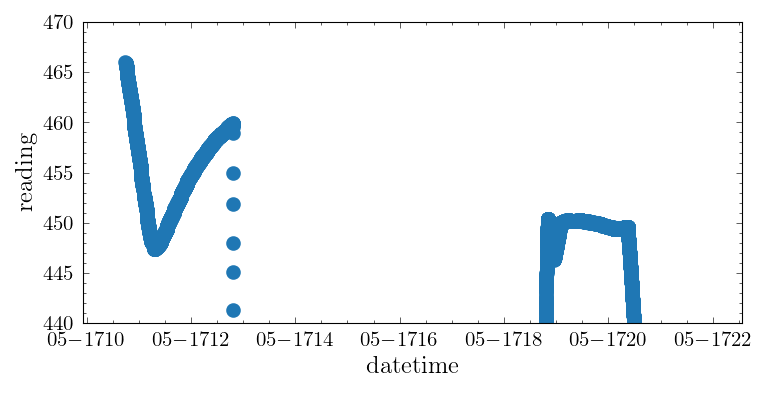

In [89]:



if [False,True][1]:


    # variable input
    figure_aspect_ratio = 7.5/16 # y/x (!)
    #flag_axes_visible = [False, True][0]
    #figure_scale_x = 160
    #figure_scale_y = miscfig.standard_miscfig_scale *figure_aspect_ratio



    # setting up the canvas
    figure_size_x_inch = miscfig.standard_figsize_x_inch
    fig = plt.figure(
        figsize = [figure_size_x_inch, figure_size_x_inch*figure_aspect_ratio],
        dpi = 150,
        constrained_layout = False) # setting up the canvas
    #ax1 = fig.add_axes([0,0,1,1])
    #ax1.set_xlim([0,figure_scale_x])
    #ax1.set_ylim([0,figure_scale_y])
    #if flag_axes_visible == False:
    #    ax1.set_aspect('equal')
    #    ax1.spines['right'].set_visible(False)
    #    ax1.spines['top'].set_visible(False)
    #    ax1.spines['left'].set_visible(False)
    #    ax1.spines['bottom'].set_visible(False)
    #    ax1.set_yticks([])
    #    ax1.set_xticks([])
    #    ax1.set_axis_off()

    datetime_list = [datetime.datetime.strptime(str(timestamp)[0:12], '%Y%m%d%H%M') for timestamp in timestamp_list]
    ax1 = fig.add_subplot()
    ax1.plot_date(
        datetime_list,
        reading_list,
        linewidth=1,
    )
    ax1.set_ylim(440,470)
    ax1.set_xlabel("datetime", fontsize=12)
    ax1.set_ylabel("reading", fontsize=12)


    ### saving
    plt.show()
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/thesis/images/miscfig/monmonxe_show_off.png")







<br>
<br>
<br>
<br>
<br>


# GeMSE collage


<br>
<br>


In [48]:

if [False,True][0]:


    # adjustable input
    filename_img = "collage_gemse_annotated.png"
    figure_aspect_ratio = 1278/3264
    annotations_edgecolor = "white"
    annotations_radius = 4
    annotations_textsize = 12
    annotations_circlecolor = miscfig.uni_blue
    flag_axes_visible = False
    photographs_dict = {
        "gemse_collage" : { # identifier, not used in code belwo
            "filename" : "collage_gemse.png", # filename of the photograph, without abspath
            "zoom" : 0.125, # size of the photograph, unknown unit
            "x" : 0.50, # x-coordinate of photograph center, relative in x-axis scale
            "y" : 0.50, # y-coordinate of photograph center, relative in y-axis scale
        },
    }
    annotations_dict = {
        "scintillator_panels" : { # identifier, not used in code below
            "num" : "1", # annotation to be printed onto the canvas
            "x" : 0.515, # x-coordinate of photograph center, relative in x-axis scale
            "y" : (0.91-0.5)/0.5, # y-coordinate of photograph center, relative in y-axis scale
            "num_offset_x" : 0.003, # x offset of the number within its circle, relative in x-axis scale
            "num_offset_y" : -0.001, # y offset of the number within its circle, relative in y-axis scale
        },
        "crystal_cylinder" : {
            "num" : "2",
            "x" : 0.787,
            "y" : (0.673-0.5)/0.52,
            "num_offset_x" : 0.002,
            "num_offset_y" : -0.002,
        },
        "ln2_dwar" : {
            "num" : "3",
            "x" : 0.265,
            "y" : (0.722-0.5)/0.5,
            "num_offset_x" : 0.001,
            "num_offset_y" : -0.002,
        },
        "copper_shield" : {
            "num" : "4",
            "x" : 0.935,
            "y" : (0.845-0.5)/0.5,
            "num_offset_x" : 0,
            "num_offset_y" : -0.002,
        },
        "lead_shield" : {
            "num" : "5",
            "x" : 0.95,
            "y" : (0.933-0.5)/0.5,
            "num_offset_x" : 0.0018,
            "num_offset_y" : -0.002,
        },
        "ptfe_cuboids" : {
            "num" : "6",
            "x" : 0.77,
            "y" : (0.80-0.5)/0.5,
            "num_offset_x" : 0.001,
            "num_offset_y" : -0.004,
        },
        "ante_chamber" : {
            "num" : "7",
            "x" : 0.59,
            "y" : (0.752-0.5)/0.5,
            "num_offset_x" : 0.002,
            "num_offset_y" : -0.002,
        },
        "glove_box" : {
            "num" : "8",
            "x" : 0.474,
            "y" : (0.752-0.5)/0.5,
            "num_offset_x" : 0.001,
            "num_offset_y" : -0.001,
        },
        "gn2_dewar" : {
            "num" : "9",
            "x" : 0.06,
            "y" : (0.58-0.5)/0.5,
            "num_offset_x" : 0.001,
            "num_offset_y" : -0.001,
        },
    }


    # setting up the canvas
    figure_scale_x = miscfig.standard_miscfig_scale
    figure_size_x_inch = miscfig.standard_figsize_x_inch
    fig = plt.figure(figsize=[figure_size_x_inch, figure_size_x_inch*figure_aspect_ratio], dpi=150, constrained_layout=False) # setting up the canvas
    ax1 = fig.add_axes([0,0,1,1])
    ax1.set_xlim([0,figure_scale_x])
    ax1.set_ylim([0,figure_scale_x*figure_aspect_ratio])
    if flag_axes_visible == False:
        ax1.set_aspect('equal')
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.set_yticks([])
        ax1.set_xticks([])
        ax1.set_axis_off()


    # adding the photographs
    for photograph in [*photographs_dict]:
        miscfig.image_onto_plot(
            filestring = photographs_dict[photograph]["filename"],
            ax = ax1,
            position = [photographs_dict[photograph]["x"]*figure_scale_x,photographs_dict[photograph]["y"]*figure_scale_x*figure_aspect_ratio],
            pathstring = "./input/",
            zoom = photographs_dict[photograph]["zoom"],
            zorder = 20)


    # plotting the zoombox
    ul_left = [0.38*figure_scale_x, ((0.63-0.5)/0.5)*figure_scale_x*figure_aspect_ratio] # upper left corner of the left box
    lr_left = [0.55*figure_scale_x, ((0.52-0.5)/0.5)*figure_scale_x*figure_aspect_ratio] # lower right corner of the right box
    ul_right = [0.674*figure_scale_x, 0.98*figure_scale_x*figure_aspect_ratio] # upper left corner of the right box
    lr_right = [0.991*figure_scale_x, 0.02*figure_scale_x*figure_aspect_ratio] # lower right corner of the right box
    left = [ul_left, lr_left]
    right = [ul_right, lr_right]
    for box in [left, right]:
        ax1.plot(# beginning from upper left, clock-wise
            [box[0][0], box[1][0], box[1][0], box[0][0], box[0][0]],
            [box[0][1], box[0][1], box[1][1], box[1][1], box[0][1]],
            color = miscfig.uni_blue,
            zorder = 199,
            linewidth = 2)
    ax1.plot(
        [lr_left[0], ul_right[0]],
        [ul_left[1], ul_right[1]],
        color = miscfig.uni_blue,
        zorder = 21,
        linewidth = 1.0)
    ax1.plot(
        [lr_left[0], ul_right[0]],
        [lr_left[1], lr_right[1]],
        color = miscfig.uni_blue,
        zorder = 21,
        linewidth = 1.0)
    
    
    
    # adding the annotations
    for annotation in [*annotations_dict]:
        miscfig.draw_circled_number(
            ax = ax1,
            r = [annotations_dict[annotation]["x"]*figure_scale_x, annotations_dict[annotation]["y"]*figure_scale_x*figure_aspect_ratio],
            radius = annotations_radius,
            num = annotations_dict[annotation]["num"],
            textsize = annotations_textsize,
            circlecolor = annotations_circlecolor,
            edgecolor = annotations_edgecolor,
            num_offset = [annotations_dict[annotation]["num_offset_x"]*figure_scale_x,annotations_dict[annotation]["num_offset_y"]*figure_scale_x*figure_aspect_ratio],
            )


    ### saving
    plt.show()
    for abspath in default_output_abspath_list:
        fig.savefig(abspath +filename_img)


#### GeMSE sample spectrum

In [49]:


import uproot


if [False,True][0]:


    # variable input
    figure_aspect_ratio = 1/2.64 # y/x (!)
    abspath_sample_root_spectrum = "/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/input/powder_08_flsls__final_calibrated_added_spectrum.root"
    abspath_sample_analysis_dict = "/home/daniel/Desktop/arbeitsstuff/ptfesc/data/gemse/cuboid_08_flsls__analysis_summary.json"
    abspath_background_root_spectrum = "/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/input/background_combined.root"
    measurement_time_days_bkg = 109.7/2.9
    #abspath_background_root_spectrum = "/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/input/2020-02-05_background_closedShielding_N2_2000sccm_MV_ch000.txt.root_spectrum_calibrated_0-1119537s.root"
    plot_ylim = [5*10**(-3),6*10**(0)]


    # canvas
    figure_size_x_inch = miscfig.standard_figsize_x_inch
    fig = plt.figure(
        figsize = [figure_size_x_inch, figure_size_x_inch*figure_aspect_ratio],
        dpi = 150,
        constrained_layout = True)


    # retrieving spectrum data
    root_spectrum = uproot.open(abspath_sample_root_spectrum)
    sample_analysis_data_dict = monxeana.get_dict_from_json(abspath_sample_analysis_dict)
    hist = root_spectrum["hist"]
    bin_edges = hist.axis().edges() # aequidistant engergy bin edges
    counts = list(hist.values()) # number of counts per energy bin
    hist_list_spec = []
    for i, edge in enumerate(bin_edges[:-1]):
        for j in range(int(counts[i])):
            hist_list_spec.append(bin_edges[i] +0.5*(bin_edges[i+1]-bin_edges[i]))


    # retrieving background data
    root_spectrum = uproot.open(abspath_background_root_spectrum)
    hist = root_spectrum["hist"]
    bin_edges = hist.axis().edges() # aequidistant engergy bin edges
    counts = list(hist.values()) # number of counts per energy bin
    hist_list_bkg = []
    for i, edge in enumerate(bin_edges[:-1]):
        for j in range(int(counts[i])):
            hist_list_bkg.append(bin_edges[i] +0.5*(bin_edges[i+1]-bin_edges[i]))


    # determining number of background counts
    #    bkg_counts = 0
    #        if edge >= 100 and edge <= 2700:
    #            for j in range(int(counts[i])):
    #                bkg_counts += 1


    # axes
    ax1 = fig.add_subplot()
    ax1.set_xlabel(r"gamma energy / $\mathrm{keV}$", fontsize=11)
    ax1.set_ylabel(r"differential rate / $\mathrm{\frac{counts}{keV \cdot day}}$", fontsize=11)
    ax1.set_xlim([0,3000])
    #ax1.set_ylim([10**(-6),3*10**(-5)])
    ax1.set_ylim(plot_ylim)
    ax1.set_yscale("log")


    # plotting
    bin_edges = list(np.linspace(start=0, stop=3000, num=3001, endpoint=True))
    hist_n, hist_bins, hist_patches = ax1.hist(
        x = hist_list_spec,
        bins = bin_edges,
        histtype = ["step", "stepfilled"][1],
        linewidth = 0.2,
        weights = [1/(measurement_time_days_spec) for hl in hist_list_spec],
        label = r"sample \texttt{" +f"{str(int(sample_analysis_data_dict['sample_id'].split('_')[1]))}" +r"} ($m\approx" +f"{sample_analysis_data_dict['sample_mass_kg']:.1f}" +r"\,\mathrm{kg}$, $\Delta t_{\mathrm{meas}}\approx" +f"{sample_analysis_data_dict['measurement_time_d']:.1f}" +"\,\mathrm{d}$)",
        color = miscfig.colorstring_gemsemint)
    ax1.hist(
        x = hist_list_bkg,
        bins = bin_edges,
        histtype = ["step", "stepfilled"][0],
        linewidth = 0.2,
        weights = [1/(measurement_time_days_bkg) for hl in hist_list_bkg],
        label = r"background ($\Delta t_{\mathrm{meas}}=" +f"{measurement_time_days_bkg:.1f}" +"\,\mathrm{d}$)",
        color = "red")


    # isotope annotations
    #flag_label_peaks_mod = ["U238", "Ra228", "Ra226", "Th228", "K40"]
    flag_label_peaks_mod = [isotope for isotope in [*sample_analysis_data_dict["isotope_data"]] if sample_analysis_data_dict["isotope_data"][isotope]["upper_limit_bq"]==""]
    comment_list_results = [
        r"$" +ptfesc.conv_isotope_string_to_latex_syntax(key) +r"$: $<" +ptfesc.conv_scifloat_string_to_latex_syntax(format((float(sample_analysis_data_dict['isotope_data'][key]["upper_limit_bq"])/sample_analysis_data_dict["sample_mass_kg"]), ".2e")) +r"\,\mathrm{Bq/kg}$" 
        if sample_analysis_data_dict['isotope_data'][key]["upper_limit_bq"] != "" 
        else r"$" +ptfesc.conv_isotope_string_to_latex_syntax(key) +r"$: $(" +f"{ptfesc.match_exponents_and_precision_to_mean(sample_analysis_data_dict['isotope_data'][key]['activity_bq_per_kg'], 2, [sample_analysis_data_dict['isotope_data'][key]['activity_bq_upper_per_kg'], sample_analysis_data_dict['isotope_data'][key]['activity_bq_lower_per_kg']])[0][0]}" +r"^{+" +f"{ptfesc.match_exponents_and_precision_to_mean(sample_analysis_data_dict['isotope_data'][key]['activity_bq_per_kg'], 2, [sample_analysis_data_dict['isotope_data'][key]['activity_bq_upper_per_kg'], sample_analysis_data_dict['isotope_data'][key]['activity_bq_lower_per_kg']])[1][0]}" +r"}" +r"_{-" +f"{ptfesc.match_exponents_and_precision_to_mean(sample_analysis_data_dict['isotope_data'][key]['activity_bq_per_kg'], 2, [sample_analysis_data_dict['isotope_data'][key]['activity_bq_upper_per_kg'], sample_analysis_data_dict['isotope_data'][key]['activity_bq_lower_per_kg']])[2][0]}" +r"})\cdot 10^{" +f"{ptfesc.match_exponents_and_precision_to_mean(sample_analysis_data_dict['isotope_data'][key]['activity_bq_per_kg'], 2, [sample_analysis_data_dict['isotope_data'][key]['activity_bq_upper_per_kg'], sample_analysis_data_dict['isotope_data'][key]['activity_bq_lower_per_kg']])[0][1]}" +"}" +r"\,\mathrm{Bq/kg}$" 
        #for i,key in enumerate(sample_analysis_data_dict['isotope_data'].keys())]
        for i,key in enumerate(flag_label_peaks_mod)]
    monxeana.annotate_comments(
        comment_ax = ax1,
        comment_list = comment_list_results,
        comment_textpos = [0.98, 0.690],
        comment_textcolor = "black",
        comment_linesep = 0.1,
        comment_fontsize = 10)


    # annotating peak labels
    if [False,True][1]:
        # looping over all flagged isotopes
        for i,isotope in enumerate(flag_label_peaks_mod):
            # retrieving the gamma energies used for the individual peaks
            with open("/home/daniel/Desktop/arbeitsstuff/gemse/studies/20210505__gemseana/analysis_input_files/isotope_data/parameters_" +isotope +".txt", 'r') as isotope_file:
                flag_read = False
                peak_energy_kev_list = []
                for line in isotope_file:
                    if "# Peak Energies (keV)" in line:
                        flag_read = True
                    elif "# Background efficiency" in line:
                        flag_read = False
                    if flag_read == True and "#" not in line:
                        peak_energy_kev_list.append(float(line))
                # retrieving the peak heights
                for peak_energy in peak_energy_kev_list:
                    peak_energy_index = int(peak_energy)
                    energy_resolution_shift = 3
                    peak_energy_index_max_y_val = max([c for c in hist_n[peak_energy_index-energy_resolution_shift:peak_energy_index+energy_resolution_shift]])
                    # annotating the peak labels
                    print(f"peak_energy: {peak_energy},  peak_energy_index_max_y_val: {peak_energy_index_max_y_val}")
                    label_pos_abs = [peak_energy, peak_energy_index_max_y_val]
                    label_pos_rel = (ax1.transAxes + ax1.transData.inverted()).inverted().transform(label_pos_abs)
                    ax1.text(
                        x = label_pos_rel[0],
                        y = label_pos_rel[1] +0.025,
                        s = r"$" +ptfesc.conv_isotope_string_to_latex_syntax(isotope) +r"$",#r"\textbf{"+ key +r"}: " +doc_data_dict[key].replace("_","\_"),
                        fontsize = 4,
                        color = "black",
                        rotation = 0,
                        transform = ax1.transAxes,
                        horizontalalignment = "center",
                        verticalalignment = "center")


        # including the 511 keV photon annihilation peak
        #peak_energy_index = min(range(len(bin_centers)), key=lambda i: abs(bin_centers[i]-511))
        #energy_resolution_shift = 20
        #peak_energy_index_max_y_val = max([c for c in counts_mod[peak_energy_index-energy_resolution_shift:peak_energy_index+energy_resolution_shift]])
        #ax1.text(
        #    x = 511,
        #    y = peak_energy_index_max_y_val,
        #    s = r"$e^{+}e^{-}$",#r"\textbf{"+ key +r"}: " +doc_data_dict[key].replace("_","\_"),
        #    fontsize = 4,
        #    color = "black",
        #    rotation = 0,
        #    horizontalalignment = "center",
        #    verticalalignment = "center")


    # legend
    ax1.legend()


    ### saving
    plt.show()
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/monxe/software/miscfig/output/gemse_sample_spectrum.png")
    fig.savefig("/home/daniel/Desktop/arbeitsstuff/thesis/images/miscfig/gemse_sample_spectrum.png")

